*Contexte* :

Le Mans, 10ème de la ligue de Basket française Pro A, cherche à améliorer ses performances.
Nous avons récupérer les données des compositions d'équipe du Mans et des autres équipes de Pro A. Notre but est d'analyser ces données afin de comprendre les performances sportives du Mans et améliorer sa rentabilité, en les comparant avec les autres équipes.




*Problématique*:

**Quelle est la rentabilité des lineups du Mans en Pro A sur la saison 2024-2025 comparée aux autres équipes ?**

# I. Pré-requis

## Import des packages : numpy, panda, matplotlib, seaborn, requests, BeautifulSoup

In [ ]:
# Importation des packages Python

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## Import des fichiers Lineups


In [ ]:
# Importation du fichier Lineups Le Mans

lineups_lemans = pd.read_excel('/content/Lineups - Le Mans, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups Le Mans
lineups_lemans

Lineup Unnamed: 1 Plus/Minus  \
0    12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         LM         -4   
1                                                    -        OPP         -4   
2    12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         LM         -3   
3                                                    -        OPP         -3   
4    34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...         LM          9   
..                                                 ...        ...        ...   
187                                                  -        OPP          -   
188  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....         LM          -   
189                                                  -        OPP          -   
190  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....         LM          -   
191                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     34:01          90     78                    62               27   
1     34:01          82     82                    53               26   
2     17:16          43     37                    23               12   
3     17:16          39     40                    20               14   
4     16:55          40     49                    27               18   
..      ...         ...    ...                   ...              ...   
187   00:04           -      -                     -                -   
188   00:03           1      -                     1                -   
189   00:03           -      -                     -                -   
190   00:02           -      -                     -                -   
191   00:02           1      -                     1                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            43.5%                         40  ...                    20   
1            49.1%                         27  ...                    19   
2            52.2%                         13  ...                    14   
3              70%                         13  ...                    11   
4            66.7%                         16  ...                     7   
..             ...                        ...  ...                   ...   
187              -                          -  ...                     -   
188              -                          -  ...                     -   
189              -                          -  ...                     -   
190              -                          -  ...                     -   
191              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 17            85%       33                 14   
1                 15          78.9%       27                  8   
2                 10          71.4%        9                  3   
3                  9          81.8%        7                  -   
4                  6          85.7%       12                  3   
..               ...            ...      ...                ...   
187                -              -        -                  -   
188                -              -        -                  -   
189                -              -        -                  -   
190                -              -        -                  -   
191                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   19      18     10         9    15  
1                   19      20      5        11    17  
2                    6      10      5        10    15  
3                    7      13      4         7    11  
4                    9      12      2         4     8  
..                 ...     ...    ...       ...   ...  
187                  -       -      -         -     -  
188                  -       -      -       

In [ ]:
# Importation du fichier Lineups AS Monaco

lineups_monaco = pd.read_excel('/content/Lineups - AS Monaco Basket, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups AS Monaco

lineups_monaco

Lineup Unnamed: 1 Plus/Minus  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...        AMB         10   
1                                                    -        OPP         10   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        AMB          4   
3                                                    -        OPP          4   
4    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        AMB        -11   
..                                                 ...        ...        ...   
337                                                  -        OPP         -6   
338  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...        AMB         -2   
339                                                  -        OPP         -2   
340  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...        AMB         -2   
341                                                  -        OPP         -2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     13:00          38     27                    23               10   
1     13:00          26     17                    17                6   
2     11:48          36     21                    23                8   
3     11:48          28     17                    17                6   
4     11:02          18     13                    15                6   
..      ...         ...    ...                   ...              ...   
337   00:01           2      6                     2                2   
338   00:01           1      -                     1                -   
339   00:01           1      2                     -                -   
340   00:00           1      -                     -                -   
341   00:00           1      2                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            43.5%                         17  ...                     5   
1            35.3%                          8  ...                     5   
2            34.8%                         12  ...                     4   
3            35.3%                         10  ...                     4   
4              40%                         10  ...                     2   
..             ...                        ...  ...                   ...   
337           100%                          2  ...                     2   
338              -                          -  ...                     -   
339              -                          -  ...                     2   
340              -                          -  ...                     -   
341              -                          -  ...                     2   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                  4            80%       15                  4   
1                  3            60%        8                  1   
2                  2            50%       13                  6   
3                  4           100%       13                  4   
4                  1            50%       10                  3   
..               ...            ...      ...                ...   
337                2           100%        -                  -   
338                -              -        -                  -   
339                2           100%        1                  -   
340                -              -        -                  -   
341                2           100%        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   11       8      4         5     5  
1                    7       3      5         4     9  
2                    7       4      2         3     7  
3                    9       2      2         3     6  
4                    7       1      1         2     7  
..                 ...     ...    ...       ...   ...  
337                  -       -      -         -     1  
338                  -       -      -       

In [ ]:
# Importation du fichier Lineups ASVEL Lyon Villeurbanne

lineups_lyon = pd.read_excel('/content/Lineups - ASVEL Lyon-Villeurbanne, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups ASVEL Lyon Villeurbanne

lineups_lyon

Lineup Unnamed: 1 Plus/Minus  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         AL         -3   
1                                                    -        OPP         -3   
2    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...         AL          4   
3                                                    -        OPP          4   
4    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         AL         14   
..                                                 ...        ...        ...   
393                                                  -        OPP          -   
394  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...         AL          -   
395                                                  -        OPP          -   
396  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...         AL          -   
397                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     15:39          41     37                    22               14   
1     15:39          39     40                    28               17   
2     14:37          32     36                    21               13   
3     14:37          40     32                    25               13   
4     11:58          29     29                    19               11   
..      ...         ...    ...                   ...              ...   
393   00:03           1      -                     -                -   
394   00:02           -      -                     -                -   
395   00:02           1      -                     -                -   
396   00:02           -      -                     -                -   
397   00:02           1      -                     1                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            63.6%                         15  ...                     7   
1            60.7%                         20  ...                     4   
2            61.9%                          8  ...                     4   
3              52%                         16  ...                     7   
4            57.9%                          6  ...                     -   
..             ...                        ...  ...                   ...   
393              -                          -  ...                     -   
394              -                          -  ...                     -   
395              -                          -  ...                     -   
396              -                          -  ...                     -   
397              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                  5          71.4%        6                  1   
1                  3            75%       13                  5   
2                  4           100%        8                  2   
3                  3          42.9%       11                  5   
4                  -              -       15                  5   
..               ...            ...      ...                ...   
393                -              -        1                  -   
394                -              -        -                  -   
395                -              -        -                  -   
396                -              -        -                  -   
397                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                    5      11      3         8     7  
1                    8      11      4         5    12  
2                    6      11      -         4    12  
3                    6       8      3         2     8  
4                   10       9      1         5     3  
..                 ...     ...    ...       ...   ...  
393                  1       -      -         -     -  
394                  -       -      -       

In [ ]:
# Importation du fichier Lineups BCM Gravelines-Dunkerque

lineups_dunkerque = pd.read_excel('/content/Lineups - BCM Gravelines-Dunkerque, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups BCM Gravelines-Dunkerque

lineups_dunkerque

Lineup Unnamed: 1 Plus/Minus  \
0    5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         BG         19   
1                                                    -        OPP         19   
2    5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         BG          6   
3                                                    -        OPP          6   
4    5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...         BG        -19   
..                                                 ...        ...        ...   
131                                                  -        OPP          -   
132  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...         BG          -   
133                                                  -        OPP          -   
134  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...         BG          2   
135                                                  -        OPP          2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     50:54         114    110                    86               40   
1     50:54         116     91                    79               36   
2     29:36          72     59                    46               20   
3     29:36          73     53                    50               18   
4     23:27          52     31                    34               13   
..      ...         ...    ...                   ...              ...   
131   00:10           1      -                     -                -   
132   00:09           -      -                     -                -   
133   00:09           1      -                     1                -   
134   00:08           1      2                     -                -   
135   00:08           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            46.5%                         48  ...                    18   
1            45.6%                         44  ...                    11   
2            43.5%                         28  ...                    12   
3              36%                         26  ...                    14   
4            38.2%                         28  ...                     9   
..             ...                        ...  ...                   ...   
131              -                          -  ...                     -   
132              -                          -  ...                     -   
133              -                          -  ...                     -   
134              -                          -  ...                     2   
135              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 16          88.9%       39                 10   
1                  8          72.7%       40                 10   
2                 12           100%       21                  3   
3                  8          57.1%       28                 10   
4                  4          44.4%       14                  5   
..               ...            ...      ...                ...   
131                -              -        1                  -   
132                -              -        -                  -   
133                -              -        -                  -   
134                2           100%        -                  -   
135                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   29      25      7         7    22  
1                   30      18      4        15    25  
2                   18      12      6        11    13  
3                   18      16      5        10    18  
4                    9       4      4         9    15  
..                 ...     ...    ...       ...   ...  
131                  1       -      -         -     -  
132                  -       -      -       

In [ ]:
# Importation du fichier Lineups CSP Limoges

lineups_limoges = pd.read_excel('/content/Lineups - CSP Limoges, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups CSP Limoges

lineups_limoges

Lineup Unnamed: 1 Plus/Minus  \
0    11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....         CL        -11   
1                                                    -        OPP        -11   
2    11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...         CL        -18   
3                                                    -        OPP        -18   
4    15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         CL         -1   
..                                                 ...        ...        ...   
181                                                  -        OPP          -   
182  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         CL         -2   
183                                                  -        OPP         -2   
184  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         CL         -2   
185                                                  -        OPP         -2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     77:58         181    157                   117               60   
1     77:58         186    168                   122               59   
2     29:17          65     49                    43               19   
3     29:17          66     67                    50               28   
4     26:50          62     44                    36               14   
..      ...         ...    ...                   ...              ...   
181   00:04           1      -                     1                -   
182   00:03           -      -                     -                -   
183   00:03           1      2                     1                1   
184   00:01           -      -                     -                -   
185   00:01           1      2                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            51.3%                         63  ...                    21   
1            48.4%                         75  ...                    49   
2            44.2%                         23  ...                     7   
3              56%                         31  ...                     6   
4            38.9%                         25  ...                    14   
..             ...                        ...  ...                   ...   
181              -                          -  ...                     -   
182              -                          -  ...                     -   
183           100%                          1  ...                     -   
184              -                          -  ...                     -   
185              -                          -  ...                     2   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 12          57.1%       56                 12   
1                 34          69.4%       59                 15   
2                  3          42.9%       21                  5   
3                  5          83.3%       24                  5   
4                 12          85.7%       20                  6   
..               ...            ...      ...                ...   
181                -              -        -                  -   
182                -              -        -                  -   
183                -              -        -                  -   
184                -              -        -                  -   
185                2           100%        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   44      50     10        26    39  
1                   44      40     13        19    30  
2                   16      11      2        11     8  
3                   19      15      8         6    11  
4                   14      11      5         7    12  
..                 ...     ...    ...       ...   ...  
181                  -       -      -         -     -  
182                  -       -      -       

In [ ]:
# Importation du fichier Lineups Chalon Saone

lineups_chalons = pd.read_excel('/content/Lineups - Chalon Saone, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups Chalon Saone

lineups_chalons

Lineup Unnamed: 1 Plus/Minus  \
0    40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...         CS        -22   
1                                                    -        OPP        -22   
2    4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         CS         -2   
3                                                    -        OPP         -2   
4    4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         CS         19   
..                                                 ...        ...        ...   
187                                                  -        OPP          -   
188  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...         CS          -   
189                                                  -        OPP          -   
190  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         CS         -2   
191                                                  -        OPP         -2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     57:52         132    125                    92               49   
1     57:52         136    147                    99               53   
2     44:33         106     82                    61               26   
3     44:33         105     84                    74               32   
4     28:59          71     69                    38               23   
..      ...         ...    ...                   ...              ...   
187   00:04           -      -                     -                -   
188   00:02           -      -                     -                -   
189   00:02           1      -                     1                -   
190   00:00           -      -                     -                -   
191   00:00           1      2                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            53.3%                         54  ...                    16   
1            53.5%                         54  ...                    28   
2            42.6%                         35  ...                    27   
3            43.2%                         41  ...                    11   
4            60.5%                         21  ...                    22   
..             ...                        ...  ...                   ...   
187              -                          -  ...                     -   
188              -                          -  ...                     -   
189              -                          -  ...                     -   
190              -                          -  ...                     -   
191              -                          -  ...                     2   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 11          68.8%       34                  8   
1                 24          85.7%       47                 15   
2                 20          74.1%       34                  6   
3                  8          72.7%       38                 13   
4                 15          68.2%       21                  4   
..               ...            ...      ...                ...   
187                -              -        -                  -   
188                -              -        -                  -   
189                -              -        -                  -   
190                -              -        -                  -   
191                2           100%        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   26      34     10        17    27  
1                   32      32     10        18    21  
2                   28      19      5        13    19  
3                   25      23      7        14    26  
4                   17      18      5         9    11  
..                 ...     ...    ...       ...   ...  
187                  -       -      -         -     -  
188                  -       -      -       

In [ ]:
# Importation du fichier Lineups Cholet

lineups_cholet = pd.read_excel('/content/Lineups - Cholet Basket, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups Cholet

lineups_cholet

Lineup Unnamed: 1 Plus/Minus  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...         CB          -   
1                                                    -        OPP          -   
2    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         CB         -6   
3                                                    -        OPP         -6   
4    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         CB         10   
..                                                 ...        ...        ...   
265                                                  -        OPP          2   
266  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....         CB          -   
267                                                  -        OPP          -   
268  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...         CB          -   
269                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     48:05         116    107                    75               41   
1     48:05         115    107                    68               38   
2     39:50         103     79                    65               31   
3     39:50          96     85                    63               26   
4     17:20          34     38                    23               13   
..      ...         ...    ...                   ...              ...   
265   00:05           -      -                     -                -   
266   00:01           -      -                     -                -   
267   00:01           1      -                     -                -   
268   00:00           1      -                     -                -   
269   00:00           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            54.7%                         46  ...                    15   
1            55.9%                         42  ...                    25   
2            47.7%                         44  ...                    24   
3            41.3%                         31  ...                    25   
4            56.5%                         14  ...                     9   
..             ...                        ...  ...                   ...   
265              -                          -  ...                     -   
266              -                          -  ...                     -   
267              -                          -  ...                     -   
268              -                          -  ...                     -   
269              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 12            80%       26                  8   
1                 22            88%       32                  9   
2                 12            50%       43                 15   
3                 21            84%       26                  9   
4                  6          66.7%        9                  -   
..               ...            ...      ...                ...   
265                -              -        -                  -   
266                -              -        -                  -   
267                -              -        1                  -   
268                -              -        -                  -   
269                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   18      21      8        16    29  
1                   23      27     13        21    25  
2                   28      27      6        12    22  
3                   17      20      6        10    23  
4                    9      10      5         4    11  
..                 ...     ...    ...       ...   ...  
265                  -       -      -         -     1  
266                  -       -      -       

In [ ]:
# Importation du fichier Lineups ESSM Le Portel

lineups_leportel = pd.read_excel('/content/Lineups - ESSM Le Portel, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups ESSM Le Portel

lineups_leportel

Lineup Unnamed: 1 Plus/Minus  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....        ELP          -   
1                                                    -        OPP          -   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...        ELP         11   
3                                                    -        OPP         11   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        ELP          4   
..                                                 ...        ...        ...   
209                                                  -        OPP         -4   
210  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...        ELP          -   
211                                                  -        OPP          -   
212  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...        ELP          -   
213                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     51:54         112     95                    78               35   
1     51:54         128     95                    82               33   
2     50:51         118     99                    81               36   
3     50:51         118     88                    87               39   
4     32:37          75     60                    47               21   
..      ...         ...    ...                   ...              ...   
209   00:18           2      4                     2                2   
210   00:15           -      -                     -                -   
211   00:15           1      -                     -                -   
212   00:10           1      -                     -                -   
213   00:10           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            44.9%                         46  ...                    21   
1            40.2%                         47  ...                    22   
2            44.4%                         46  ...                    19   
3            44.8%                         65  ...                     9   
4            44.7%                         24  ...                     9   
..             ...                        ...  ...                   ...   
209           100%                          2  ...                     -   
210              -                          -  ...                     -   
211              -                          -  ...                     -   
212              -                          -  ...                     2   
213              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 18          85.7%       40                 11   
1                 18          81.8%       48                 18   
2                 17          89.5%       42                 13   
3                  1          11.1%       44                 16   
4                  9           100%       26                  6   
..               ...            ...      ...                ...   
209                -              -        -                  -   
210                -              -        -                  -   
211                -              -        1                  -   
212                -              -        -                  -   
213                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   29      21      8        14    26  
1                   30      18     10        12    25  
2                   29      21      9        14    16  
3                   28      27     12        12    24  
4                   20      15      6        10    13  
..                 ...     ...    ...       ...   ...  
209                  -       1      1         -     -  
210                  -       -      -       

In [ ]:
# Importation du fichier Lineups JDA Dijon

lineups_dijon = pd.read_excel('/content/Lineups - JDA Dijon Basket, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups JDA Dijon

lineups_dijon

Lineup Unnamed: 1 Plus/Minus  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...        JDB         -1   
1                                                    -        OPP         -1   
2    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...        JDB          6   
3                                                    -        OPP          6   
4    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...        JDB         -8   
..                                                 ...        ...        ...   
283                                                  -        OPP          -   
284  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...        JDB          -   
285                                                  -        OPP          -   
286  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...        JDB          3   
287                                                  -        OPP          3   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     26:06          64     56                    44               20   
1     26:06          65     57                    42               18   
2     22:16          45     47                    29               16   
3     22:16          57     41                    33               17   
4     10:47          26     18                    17                7   
..      ...         ...    ...                   ...              ...   
283   00:05           2      -                     1                -   
284   00:02           -      -                     -                -   
285   00:02           1      -                     -                -   
286   00:00           1      3                     1                1   
287   00:00           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            45.5%                         26  ...                    11   
1            42.9%                         26  ...                    20   
2            55.2%                         15  ...                    11   
3            51.5%                         22  ...                     4   
4            41.2%                         11  ...                     1   
..             ...                        ...  ...                   ...   
283              -                          1  ...                     -   
284              -                          -  ...                     -   
285              -                          -  ...                     -   
286           100%                          -  ...                     -   
287              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                  8          72.7%       23                  6   
1                 16            80%       21                  4   
2                  9          81.8%       11                  1   
3                  3            75%       14                  5   
4                  1           100%        8                  1   
..               ...            ...      ...                ...   
283                -              -        -                  -   
284                -              -        -                  -   
285                -              -        1                  -   
286                -              -        -                  -   
287                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   17      18      2         7    22  
1                   17      12      3         7    14  
2                   10      12      5         6    12  
3                    9       9      4         8     8  
4                    7       4      2         7     8  
..                 ...     ...    ...       ...   ...  
283                  -       -      -         -     -  
284                  -       -      -       

In [ ]:
# Importation du fichier Lineups JL Bourg en Bresse

lineups_bourg = pd.read_excel('/content/Lineups - JL Bourg-en-Bresse, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups JL Bourg en Bresse

lineups_bourg

Lineup Unnamed: 1 Plus/Minus  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...         JB          3   
1                                                    -        OPP          3   
2    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         JB         17   
3                                                    -        OPP         17   
4    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         JB         -1   
..                                                 ...        ...        ...   
219                                                  -        OPP          -   
220  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...         JB          2   
221                                                  -        OPP          2   
222  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         JB          -   
223                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     62:15         172    123                    95               34   
1     62:15         146    120                    93               44   
2     39:09          94     96                    58               34   
3     39:09          88     79                    50               27   
4     22:01          57     56                    35               19   
..      ...         ...    ...                   ...              ...   
219   00:07           1      -                     1                -   
220   00:04           1      2                     -                -   
221   00:04           2      -                     -                -   
222   00:04           -      -                     -                -   
223   00:04           1      -                     1                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            35.8%                         69  ...                    58   
1            47.3%                         57  ...                    34   
2            58.6%                         41  ...                    27   
3              54%                         25  ...                    17   
4            54.3%                         18  ...                    14   
..             ...                        ...  ...                   ...   
219              -                          -  ...                     -   
220              -                          -  ...                     2   
221              -                          -  ...                     -   
222              -                          -  ...                     -   
223              -                          1  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 46          79.3%       59                 20   
1                 19          55.9%       51                 13   
2                 21          77.8%       27                  4   
3                 14          82.4%       17                  2   
4                 10          71.4%       17                  5   
..               ...            ...      ...                ...   
219                -              -        -                  -   
220                2           100%        -                  -   
221                -              -        -                  -   
222                -              -        -                  -   
223                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   39      32     11        24    33  
1                   38      35     10        22    50  
2                   23      25      8         8    21  
3                   15      21      3        18    29  
4                   12      15      2         5    16  
..                 ...     ...    ...       ...   ...  
219                  -       -      -         -     -  
220                  -       -      -       

In [ ]:
# Importation du fichier Lineups La Rochelle Rupella

lineups_larochelle = pd.read_excel('/content/Lineups - La Rochelle Rupella, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups La Rochelle Rupella

lineups_larochelle

Lineup Unnamed: 1 Plus/Minus  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        LRR        -22   
1                                                    -        OPP        -22   
2    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...        LRR         -5   
3                                                    -        OPP         -5   
4    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...        LRR         -4   
..                                                 ...        ...        ...   
249                                                  -        OPP          3   
250  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...        LRR         -3   
251                                                  -        OPP         -3   
252  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...        LRR          2   
253                                                  -        OPP          2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     71:56         169    125                   104               44   
1     71:56         163    147                   114               51   
2     16:34          37     26                    24                9   
3     16:34          42     31                    25               10   
4     13:22          32     22                    21                8   
..      ...         ...    ...                   ...              ...   
249   00:21           -      -                     -                -   
250   00:14           -      -                     -                -   
251   00:14           1      3                     1                1   
252   00:07           1      2                     1                1   
253   00:07           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            42.3%                         59  ...                    31   
1            44.7%                         68  ...                    37   
2            37.5%                         16  ...                    10   
3              40%                         19  ...                    11   
4            38.1%                         12  ...                     7   
..             ...                        ...  ...                   ...   
249              -                          -  ...                     -   
250              -                          -  ...                     -   
251           100%                          -  ...                     -   
252           100%                          1  ...                     -   
253              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 25          80.6%       51                  7   
1                 27            73%       60                  9   
2                  6            60%       10                  1   
3                  9          81.8%       19                  4   
4                  4          57.1%        7                  3   
..               ...            ...      ...                ...   
249                -              -        -                  -   
250                -              -        -                  -   
251                -              -        -                  -   
252                -              -        -                  -   
253                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   44      31     12        24    35  
1                   51      34     11        18    39  
2                    9       8      4         5     7  
3                   15       7      1         8     9  
4                    4       6      2         2     5  
..                 ...     ...    ...       ...   ...  
249                  -       -      -         -     1  
250                  -       -      -       

In [ ]:
# Importation du fichier Lineups Nanterre 92

lineups_nanterre = pd.read_excel('/content/Lineups - Nanterre 92, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups Nanterre 92

lineups_nanterre

Lineup Unnamed: 1 Plus/Minus  \
0    7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         N9         29   
1                                                    -        OPP         29   
2    1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         N9         20   
3                                                    -        OPP         20   
4    7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         N9          4   
..                                                 ...        ...        ...   
195                                                  -        OPP          -   
196  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         N9         -2   
197                                                  -        OPP         -2   
198  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...         N9          -   
199                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     45:41         106    111                    77               46   
1     45:41         120     82                    55               30   
2     21:43          47     65                    40               25   
3     21:43          44     45                    29               14   
4     15:19          39     31                    29               12   
..      ...         ...    ...                   ...              ...   
195   00:14           2      -                     1                -   
196   00:07           -      -                     -                -   
197   00:07           1      2                     1                1   
198   00:03           -      -                     -                -   
199   00:03           1      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            59.7%                         53  ...                     7   
1            54.5%                         32  ...                    16   
2            62.5%                         24  ...                     5   
3            48.3%                         14  ...                    16   
4            41.4%                         19  ...                     7   
..             ...                        ...  ...                   ...   
195              -                          1  ...                     -   
196              -                          -  ...                     -   
197           100%                          1  ...                     -   
198              -                          -  ...                     -   
199              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                  7           100%       29                  7   
1                 13          81.3%       24                  2   
2                  5           100%       18                  3   
3                 12            75%       12                  1   
4                  7           100%       16                  6   
..               ...            ...      ...                ...   
195                -              -        -                  -   
196                -              -        -                  -   
197                -              -        -                  -   
198                -              -        -                  -   
199                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   22      31     21        20    27  
1                   22      18     14        30    13  
2                   15      20      1         3    10  
3                   11       9      2         3     5  
4                   10       6      4         4     5  
..                 ...     ...    ...       ...   ...  
195                  -       -      -         -     -  
196                  -       -      -       

In [ ]:
# Importation du fichier Lineups Paris

lineups_paris = pd.read_excel('/content/Lineups - Paris Basketball, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups Paris

lineups_paris

Lineup Unnamed: 1 Plus/Minus  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         PB         27   
1                                                    -        OPP         27   
2    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         PB         24   
3                                                    -        OPP         24   
4    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...         PB          2   
..                                                 ...        ...        ...   
215                                                  -        OPP          -   
216  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...         PB          3   
217                                                  -        OPP          3   
218  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....         PB          -   
219                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     36:03          94    100                    65               35   
1     36:03          89     73                    55               26   
2     34:56          89    104                    55               37   
3     34:56          90     80                    59               25   
4     34:48          92     78                    51               23   
..      ...         ...    ...                   ...              ...   
215   00:07           1      -                     1                -   
216   00:04           1      3                     1                1   
217   00:04           -      -                     -                -   
218   00:03           1      -                     1                -   
219   00:03           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            53.8%                         27  ...                    14   
1            47.3%                         39  ...                    25   
2            67.3%                         28  ...                    19   
3            42.4%                         28  ...                    24   
4            45.1%                         22  ...                    26   
..             ...                        ...  ...                   ...   
215              -                          1  ...                     -   
216           100%                          -  ...                     -   
217              -                          -  ...                     -   
218              -                          1  ...                     -   
219              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 11          78.6%       32                 12   
1                 16            64%       19                  6   
2                 16          84.2%       24                  9   
3                 19          79.2%       17                  9   
4                 22          84.6%       29                  8   
..               ...            ...      ...                ...   
215                -              -        -                  -   
216                -              -        -                  -   
217                -              -        -                  -   
218                -              -        -                  -   
219                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   20      21      7         9    22  
1                   13      18      7        12    18  
2                   15      25      4        13    19  
3                    8      14      6        12    22  
4                   21      14      3        14    17  
..                 ...     ...    ...       ...   ...  
215                  -       -      -         -     -  
216                  -       -      -       

In [ ]:
# Importation du fichier Lineups SIG Strasbourg

lineups_strasbourg = pd.read_excel('/content/Lineups - SIG Strasbourg, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups SIG Strasbourg

lineups_strasbourg

Lineup Unnamed: 1 Plus/Minus  \
0    10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...         SS          5   
1                                                    -        OPP          5   
2    6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...         SS        -13   
3                                                    -        OPP        -13   
4    10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...         SS          6   
..                                                 ...        ...        ...   
195                                                  -        OPP          -   
196  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...         SS          -   
197                                                  -        OPP          -   
198  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...         SS          -   
199                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     42:18         103     94                    72               34   
1     42:18          90     89                    61               34   
2     30:32          73     50                    51               19   
3     30:32          74     63                    47               21   
4     28:12          70     59                    47               23   
..      ...         ...    ...                   ...              ...   
195   00:15           1      -                     1                -   
196   00:07           -      -                     -                -   
197   00:07           1      -                     -                -   
198   00:01           1      -                     1                -   
199   00:01           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            47.2%                         37  ...                    18   
1            55.7%                         33  ...                    16   
2            37.3%                         31  ...                    14   
3            44.7%                         27  ...                    16   
4            48.9%                         24  ...                    11   
..             ...                        ...  ...                   ...   
195              -                          -  ...                     -   
196              -                          -  ...                     -   
197              -                          -  ...                     -   
198              -                          -  ...                     -   
199              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 12          66.7%       34                 10   
1                  9          56.3%       31                  6   
2                  7            50%       29                  8   
3                 13          81.3%       30                  4   
4                  7          63.6%       24                  5   
..               ...            ...      ...                ...   
195                -              -        -                  -   
196                -              -        -                  -   
197                -              -        -                  -   
198                -              -        -                  -   
199                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   24      25      5        10    17  
1                   25      25      6        12    22  
2                   21      11      4         7    21  
3                   26      15      3         9    14  
4                   19      20      1         7    12  
..                 ...     ...    ...       ...   ...  
195                  -       -      -         -     -  
196                  -       -      -       

In [ ]:
# Importation du fichier Lineups SLUC Nancy

lineups_nancy = pd.read_excel('/content/Lineups - SLUC Nancy Basket, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups SLUC Nancy

lineups_nancy

Lineup Unnamed: 1 Plus/Minus  \
0    11 I. Washington, 10 S. Thompson, 9 M. Amini, ...        SNB          -   
1                                                    -        OPP          -   
2    3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...        SNB          5   
3                                                    -        OPP          5   
4    3 C. Clemons, 11 I. Washington, 10 S. Thompson...        SNB         18   
..                                                 ...        ...        ...   
177                                                  -        OPP         -2   
178  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...        SNB         -1   
179                                                  -        OPP         -1   
180  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...        SNB          -   
181                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     52:10         123    113                    89               46   
1     52:10         131    113                    98               46   
2     25:03          63     56                    40               20   
3     25:03          58     51                    38               21   
4     22:20          54     60                    36               21   
..      ...         ...    ...                   ...              ...   
177   00:28           2      2                     1                -   
178   00:22           -      -                     -                -   
179   00:22           1      1                     -                -   
180   00:09           1      -                     1                -   
181   00:09           -      -                     -                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            51.7%                         62  ...                    16   
1            46.9%                         59  ...                    11   
2              50%                         18  ...                    10   
3            55.3%                         20  ...                     3   
4            58.3%                         20  ...                    13   
..             ...                        ...  ...                   ...   
177              -                          -  ...                     3   
178              -                          -  ...                     -   
179              -                          -  ...                     2   
180              -                          1  ...                     -   
181              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 12            75%       42                 13   
1                  9          81.8%       41                 12   
2                  7            70%       14                  6   
3                  3           100%       15                  4   
4                 10          76.9%       19                  4   
..               ...            ...      ...                ...   
177                2          66.7%        1                  -   
178                -              -        -                  -   
179                1            50%        -                  -   
180                -              -        -                  -   
181                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   29      23      8        15    18  
1                   29      32      9        11    22  
2                    8      15      8        13     9  
3                   11      13      5        12    11  
4                   15      13      1         6    13  
..                 ...     ...    ...       ...   ...  
177                  1       1      -         -     -  
178                  -       -      -       

In [ ]:
# Importation du fichier Lineups Saint-Quentin

lineups_saintquentin = pd.read_excel('/content/Lineups - Saint-Quentin, 17-Dec-2024.xlsx')

In [ ]:
# Affichage du dataframe Lineups Saint_Quentin

lineups_saintquentin

Lineup Unnamed: 1 Plus/Minus  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        SAI        -23   
1                                                    -        OPP        -23   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        SAI         14   
3                                                    -        OPP         14   
4    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        SAI          6   
..                                                 ...        ...        ...   
227                                                  -        OPP          4   
228  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...        SAI         -2   
229                                                  -        OPP         -2   
230  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...        SAI          -   
231                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     38:52          99     66                    54               21   
1     38:52          84     89                    61               34   
2     29:45          68     57                    45               22   
3     29:45          69     43                    37               16   
4     20:17          46     53                    40               23   
..      ...         ...    ...                   ...              ...   
227   00:15           -      -                     -                -   
228   00:09           -      -                     -                -   
229   00:09           1      2                     1                1   
230   00:02           -      -                     -                -   
231   00:02           1      -                     1                -   

    Field goals, % 2-pt field goals attempted  ... Free throws attempted  \
0            38.9%                         28  ...                    15   
1            55.7%                         34  ...                    12   
2            48.9%                         29  ...                    11   
3            43.2%                         25  ...                    10   
4            57.5%                         26  ...                     2   
..             ...                        ...  ...                   ...   
227              -                          -  ...                     -   
228              -                          -  ...                     -   
229           100%                          1  ...                     -   
230              -                          -  ...                     -   
231              -                          -  ...                     -   

    Free throws made Free throws, % Rebounds Offensive rebounds  \
0                 15           100%       31                  9   
1                 10          83.3%       26                  6   
2                  8          72.7%       26                  8   
3                  8            80%       17                  4   
4                  2           100%       18                  4   
..               ...            ...      ...                ...   
227                -              -        -                  -   
228                -              -        -                  -   
229                -              -        -                  -   
230                -              -        -                  -   
231                -              -        -                  -   

    Defensive rebounds Assists Steals Turnovers Fouls  
0                   22      12      8        21    16  
1                   20      31     10        13    17  
2                   18      14      5         9    18  
3                   13      13      5        11    12  
4                   14      10      3         3    11  
..                 ...     ...    ...       ...   ...  
227                  -       -      -         -     1  
228                  -       -      -       

## Import du fichier Players et exploration du fichier

In [ ]:
players = pd.read_excel("/content/Players - France. BETCLIC Elite - LNB Pro A, 17-Dec-2024.xlsx")
players

Jersey number                    Player                     Team  \
0                0             Aaron Wheeler            Cholet Basket   
1                1    Abdoulaye Saadi N'Doye                  Le Mans   
2                2         Admiral Schofield  ASVEL Lyon-Villeurbanne   
3                4             Adrian Nelson       JL Bourg-en-Bresse   
4                7               Ahmad Caver              Nanterre 92   
..             ...                       ...                      ...   
206              6  Yohan Theo Akofa Choupas             Chalon Saone   
207             30            Yohann Sissoko  ASVEL Lyon-Villeurbanne   
208             40           Zac Cuthbertson             Chalon Saone   
209             12           Zacharie Perrin        SLUC Nancy Basket   
210              4              Zeljko Sakic             Chalon Saone   

     Games played Minutes Points Points per player's possession  \
0               5   18:57    7.8                           0.94   
1               7   24:48    4.1                           0.44   
2               6   14:03    7.7                           1.39   
3              12   21:51    8.4                           0.99   
4              11   26:47   11.9                           0.98   
..            ...     ...    ...                            ...   
206            12   19:03      6                           0.93   
207             5   04:39    1.4                           0.97   
208            12   30:41   10.4                           1.09   
209            12   18:07      4                           0.74   
210            11   22:18     11                           1.07   

    Field goals made Field goals attempted Field goals, %  ... Rebounds  \
0                3.2                   5.8          55.2%  ...      4.2   
1                1.7                   6.6          26.1%  ...      3.9   
2                2.5                   4.5          55.6%  ...        2   
3                2.8                   6.8          40.2%  ...      4.3   
4                4.3                   9.9          43.1%  ...      2.6   
..               ...                   ...            ...  ...      ...   
206              1.8                   4.8          38.6%  ...      1.2   
207              0.2                   0.6          33.3%  ...      0.2   
208              3.2                   6.5          48.7%  ...      4.7   
209              1.7                   4.2            40%  ...      4.8   
210              3.7                   7.5            50%  ...      3.4   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Blocks  \
0                  1.8                2.4     0.8    0.6       1.8    0.6   
1                  0.9                  3     4.9    1.1       2.4    0.3   
2                    -                  2     0.7    0.2       0.5    0.3   
3                  1.2                3.2     0.7    1.1       0.8    0.2   
4                  0.9                1.7     2.6    1.7       1.2    0.4   
..                 ...                ...     ...    ...       ...    ...   
206                0.3                0.9     1.3    0.3       1.2    0.1   
207                  -                0.2       -      -       0.4      -   
208                0.7                  4     2.2      1       0.9    0.8   
209                1.4                3.3     1.1    0.3       0.8    0.3   
210                0.6                2.7     1.6    0.4       1.6      -   

    Fouls Fouls drawn Plus/Minus  
0     2.8         1.2       -3.6  
1     2.3         1.4          1  
2     2.7         1.2        3.2  
3     2.1         1.6        0.8  
4     2.7           3        2.4  
..    ...         ...        ...  
206   2.1         0.9       -0.2  
207   0.8         0.6       -0.4  
208   2.3         3.8       -3.7  
209   1.8         0.8       -7.3  
210   2.5           3        0.6  

[211 rows x 26 columns]

In [ ]:
players.shape
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Jersey number                   211 non-null    int64 
 1   Player                          211 non-null    object
 2   Team                            211 non-null    object
 3   Games played                    211 non-null    int64 
 4   Minutes                         211 non-null    object
 5   Points                          211 non-null    object
 6   Points per player's possession  211 non-null    object
 7   Field goals made                211 non-null    object
 8   Field goals attempted           211 non-null    object
 9   Field goals, %                  211 non-null    object
 10  3-pt field goals made           211 non-null    object
 11  3-pt field goals attempted      211 non-null    object
 12  3-pt field goals, %             211 non-null    ob

## Import du fichier Equipes et exploration du fichier

In [ ]:
equipes = pd.read_excel("/content/Teams - France. BETCLIC Elite - LNB Pro A, 17-Dec-2024.xlsx")
equipes

Team  Games played  Possessions  Points  \
0              Paris          12.0       1219.0  1142.0   
1           JL Bourg          12.0       1236.0  1068.0   
2              ASVEL          12.0       1166.0  1066.0   
3            Le Mans          12.0       1218.0  1020.0   
4              Nancy          12.0       1193.0  1016.0   
5       Chalon Saone          12.0       1185.0  1012.0   
6             Monaco          12.0       1179.0  1007.0   
7         Strasbourg          12.0       1163.0   997.0   
8           Nanterre          11.0       1086.0   951.0   
9      Saint-Quentin          12.0       1189.0   947.0   
10           Limoges          12.0       1169.0   933.0   
11            Cholet          11.0       1067.0   933.0   
12             Dijon          11.0       1054.0   908.0   
13         Le Portel          12.0       1094.0   859.0   
14         Dunkerque          11.0       1033.0   839.0   
15         Rochelais          12.0       1093.0   835.0   
16  Average per team          11.8       1146.5   970.8   

    Points per possession  Field goals made  Field goals attempted  \
0                    1.06             398.0                  802.0   
1                    1.00             340.0                  752.0   
2                    1.05             358.0                  705.0   
3                    0.96             351.0                  785.0   
4                    0.96             380.0                  795.0   
5                    0.97             360.0                  744.0   
6                    0.96             343.0                  752.0   
7                    0.98             350.0                  728.0   
8                    0.98             353.0                  737.0   
9                    0.92             331.0                  750.0   
10                   0.92             320.0                  750.0   
11                   1.00             341.0                  682.0   
12                   0.99             323.0                  700.0   
13                   0.89             298.0                  703.0   
14                   0.94             287.0                  657.0   
15                   0.88             296.0                  680.0   
16                   0.97             339.3                  732.6   

   Field goals, %  2-pt field goals made  2-pt field goals attempted  ...  \
0           49.6%                  242.0                       394.0  ...   
1           45.2%                  238.0                       455.0  ...   
2           50.8%                  244.0                       396.0  ...   
3           44.7%                  239.0                       460.0  ...   
4           47.8%                  277.0                       482.0  ...   
5           48.4%                  241.0                       445.0  ...   
6           45.6%                  247.0                       444.0  ...   
7           48.1%                  229.0                       409.0  ...   
8           47.9%                  269.0                       493.0  ...   
9           44.1%                  210.0                       395.0  ...   
10          42.7%                  200.0                       425.0  ...   
11            50%                  256.0                       431.0  ...   
12          46.1%                  221.0                       400.0  ...   
13          42.4%                  208.0                       423.0  ...   
14          43.7%                  204.0                       407.0  ...   
15          43.5%                  229.0                       409.0  ...   
16          46.3%                  234.6                       429.3  ...   

   Free throws, %  Rebounds  Offensive rebounds Defensive rebounds  Assists  \
0           77.9%     412.0               134.0              278.0    235.0   
1           77.9%     400.0               122.0              278.0    257.0   
2           78.4%     385.0                86.0              299.0  

In [ ]:
equipes.shape
equipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        17 non-null     object 
 1   Games played                17 non-null     float64
 2   Possessions                 17 non-null     float64
 3   Points                      17 non-null     float64
 4   Points per possession       17 non-null     float64
 5   Field goals made            17 non-null     float64
 6   Field goals attempted       17 non-null     float64
 7   Field goals, %              17 non-null     object 
 8   2-pt field goals made       17 non-null     float64
 9   2-pt field goals attempted  17 non-null     float64
 10  2-pt field goals, %         17 non-null     object 
 11  3-pt field goals made       17 non-null     float64
 12  3-pt field goals attempted  17 non-null     float64
 13  3-pt field goals, %         17 non-nu

## Webscreping et exploration

In [ ]:
# URL de la page web
url = "https://www.proballers.com/fr/basketball/ligue/1/france-betclic-elite/joueurs"

# Récupérer le contenu de la page
response = requests.get(url)
if response.status_code != 200:
    print(f"Erreur : Impossible de récupérer la page (code de statut {response.status_code})")
    exit()

# Parser le contenu HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Trouver toutes les tables
tables = soup.find_all('table')

# Vérifier s'il y a assez de tables
if len(tables) < 24:
    print(f"Avertissement : Il n'y a que {len(tables)} tables. On s'attendait à 24.")
    tables = tables[:24]  # Limiter au nombre de tables disponibles

# Initialiser une liste pour stocker les DataFrames
dataframes = []

# Traiter chaque table
for table in tables[:24]:
    # Extraire les en-têtes de colonnes
    headers = [th.text.strip() for th in table.find_all('th')]

    # Extraire les lignes de la table
    rows = table.find_all('tr')
    data = []
    for row in rows[1:]:  # Ignorer la première ligne (l'en-tête)
        cells = row.find_all('td')
        data.append([cell.text.strip() for cell in cells])

    # Créer un DataFrame à partir des données extraites
    df = pd.DataFrame(data, columns=headers)

    # Ajouter ce DataFrame à la liste
    dataframes.append(df)

# Fusionner tous les DataFrames en un seul DataFrame final
webscrap_players = pd.concat(dataframes, ignore_index=True)

In [ ]:
webscrap_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Joueur de basketball   231 non-null    object
 1   Equipes de basketball  231 non-null    object
 2   Age                    231 non-null    object
 3   Taille                 231 non-null    object
 4   Pays d'origine         231 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


In [ ]:
# On renomme la colonne "Joueur de basketball" pour qu'elle ait le même nom que la colonne du dataframe avec laquelle on veut la concaténer

webscrap_players = webscrap_players.rename(columns={"Joueur de basketball" : "Player"})
webscrap_players

Player Equipes de basketball Age Taille Pays d'origine
0         Agee Tajuan            Gravelines  27   2m06  United States
1       Ajinça Melvin            LDLC ASVEL  20   2m03         France
2      Amini Mohammad                 Nancy  19   1m98         France
3    Amsellem Vincent               Limoges  22   1m93         France
4       Artis Dominic            Strasbourg  31   1m91  United States
..                ...                   ...  ..    ...            ...
226     Wheeler Aaron         Cholet Basket  26   2m06  United States
227  Yeguete Wilfried               Le Mans  33   2m03         France
228      Zenon Elysio                 Nancy          -         France
229   Zoriks Kristers             Le Portel  26   1m95         Latvia
230    Zulemie Nathan              Nanterre  20   1m75         France

[231 rows x 5 columns]

In [ ]:
# On inverse ensuite le nom et le prénom de notre Dataframe webscrappé, afin d'avoir la colonne standardisée avec l'autre dataframe
def invert_name(name):
    parts = name.split()
    if len(parts) > 1:
        return f"{parts[-1]} {' '.join(parts[:-1])}"  # Nom de famille d'abord, suivi du reste
    return name  # S'il n'y a qu'une seule partie, on retourne tel quel

# Appliquer la fonction à la colonne "Player"
if 'Player' in webscrap_players.columns:
    webscrap_players['Player'] = webscrap_players['Player'].apply(invert_name)

# Afficher le DataFrame
webscrap_players

Player Equipes de basketball Age Taille Pays d'origine
0         Tajuan Agee            Gravelines  27   2m06  United States
1       Melvin Ajinça            LDLC ASVEL  20   2m03         France
2      Mohammad Amini                 Nancy  19   1m98         France
3    Vincent Amsellem               Limoges  22   1m93         France
4       Dominic Artis            Strasbourg  31   1m91  United States
..                ...                   ...  ..    ...            ...
226     Aaron Wheeler         Cholet Basket  26   2m06  United States
227  Wilfried Yeguete               Le Mans  33   2m03         France
228      Elysio Zenon                 Nancy          -         France
229   Kristers Zoriks             Le Portel  26   1m95         Latvia
230    Nathan Zulemie              Nanterre  20   1m75         France

[231 rows x 5 columns]

# II. Création des Lineups par équipe

## LINEUPS LE MANS

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_lemans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      192 non-null    object
 1   Unnamed: 1                  192 non-null    object
 2   Plus/Minus                  192 non-null    object
 3   Minutes                     192 non-null    object
 4   Possessions                 192 non-null    object
 5   Points                      192 non-null    object
 6   Field goals attempted       192 non-null    object
 7   Field goals made            192 non-null    object
 8   Field goals, %              192 non-null    object
 9   2-pt field goals attempted  192 non-null    object
 10  2-pt field goals made       192 non-null    object
 11  2-pt field goals, %         192 non-null    object
 12  3-pt field goals attempted  192 non-null    object
 13  3-pt field goals made       192 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_lemans.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_lemans = lineups_lemans.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_lemans

Lineup Unnamed: 1 Plus/Minus  \
0    12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         LM         -4   
1                                                    -        OPP         -4   
2    12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         LM         -3   
3                                                    -        OPP         -3   
4    34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...         LM          9   
..                                                 ...        ...        ...   
187                                                  -        OPP          -   
188  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....         LM          -   
189                                                  -        OPP          -   
190  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....         LM          -   
191                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     34:01          90     78                    62               27   
1     34:01          82     82                    53               26   
2     17:16          43     37                    23               12   
3     17:16          39     40                    20               14   
4     16:55          40     49                    27               18   
..      ...         ...    ...                   ...              ...   
187   00:04           -      -                     -                -   
188   00:03           1      -                     1                -   
189   00:03           -      -                     -                -   
190   00:02           -      -                     -                -   
191   00:02           1      -                     1                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           40                    20  ...   
1                           27                    11  ...   
2                           13                     9  ...   
3                           13                    11  ...   
4                           16                    11  ...   
..                         ...                   ...  ...   
187                          -                     -  ...   
188                          -                     -  ...   
189                          -                     -  ...   
190                          -                     -  ...   
191                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      20               17            85%       33   
1                      19               15          78.9%       27   
2                      14               10          71.4%        9   
3                      11                9          81.8%        7   
4                       7                6          85.7%       12   
..                    ...              ...            ...      ...   
187                     -                -              -        -   
188                     -                -              -        -   
189                     -                -              -        -   
190                     -                -              -        -   
191                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   14                 19      18     10         9    15  
1                    8                 19      20      5        11    17  
2                    3                  6      10      5        10    15  
3                    -                  7      13      4         7    11  
4                    3                  9      12      2         4     8  
..                 ...                ...     ...    ...       ...   ...  
187                  -                  -       -      -         -     -  
188                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_lemans_pair = lineups_lemans[lineups_lemans.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_lemans_pair = lineups_lemans_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_lemans_pair = lineups_lemans_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_lemans_pair = lineups_lemans_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_lemans_pair

Lineup Plus/Minus Minutes  \
0   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         -4   34:01   
1   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         -3   17:16   
2   34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...          9   16:55   
3   1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...         -4   16:40   
4   12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...         11   16:20   
..                                                ...        ...     ...   
91  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 1 A....          2   00:10   
92  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          -   00:08   
93  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:04   
94  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:03   
95  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....          -   00:02   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  90            78                           62   
1                  43            37                           23   
2                  40            49                           27   
3                  39            29                           29   
4                  41            39                           31   
..                ...           ...                          ...   
91                  2             2                            1   
92                  1             -                            -   
93                  1             -                            1   
94                  1             -                            1   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       27                                40   
1                       12                                13   
2                       18                                16   
3                       13                                23   
4                       15                                18   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 1   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                        50%  ...   
1                             9                      69.2%  ...   
2                            11                      68.8%  ...   
3                            12                      52.2%  ...   
4                             6                      33.3%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws attempted Equipe Free throws made Equipe Free throws, % Equipe  \
0                            20                      17                   85%   
1                            14                      10                 71.4%   
2                             7                       6                 85.7%   
3                             2                       2                  100%   
4                             -                       -                     -   
..                          ...                     ...                   ...   
91                            2                       2                  100%   
92                            -                       -                     -   
93            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_lemans_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             96 non-null     object
 1   Plus/Minus                         96 non-null     object
 2   Minutes                            96 non-null     object
 3   Possessions Equipe                 96 non-null     object
 4   Points Equipe                      96 non-null     object
 5   Field goals attempted Equipe       96 non-null     object
 6   Field goals made Equipe            96 non-null     object
 7   2-pt field goals attempted Equipe  96 non-null     object
 8   2-pt field goals made Equipe       96 non-null     object
 9   2-pt field goals, % Equipe         96 non-null     object
 10  3-pt field goals attempted Equipe  96 non-null     object
 11  3-pt field goals made Equipe       96 non-null     object
 12  3-pt field

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_lemans_impair = lineups_lemans[lineups_lemans.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_lemans_impair = lineups_lemans_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_lemans_impair = lineups_lemans_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_lemans_impair = lineups_lemans_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_lemans_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                    82              82                             53   
1                    39              40                             20   
2                    36              40                             28   
3                    40              33                             26   
4                    41              28                             26   
..                  ...             ...                            ...   
91                    -               -                              -   
92                    -               -                              -   
93                    -               -                              -   
94                    -               -                              -   
95                    1               -                              1   

   Field goals made Opposant 2-pt field goals attempted Opposant  \
0                         26                                  27   
1                         14                                  13   
2                         15                                  22   
3                         13                                  15   
4                         10                                  18   
..                       ...                                 ...   
91                         -                                   -   
92                         -                                   -   
93                         -                                   -   
94                         -                                   -   
95                         -                                   -   

   2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                              11                        40.7%   
1                              11                        84.6%   
2                              13                        59.1%   
3                              11                        73.3%   
4                               7                        38.9%   
..                            ...                          ...   
91                              -                            -   
92                              -                            -   
93                              -                            -   
94                              -                            -   
95                              -                            -   

   3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                   26                             15   
1                                    7                              3   
2                                    6                              2   
3                                   11                              2   
4                                    8                              3   
..                                 ...                            ...   
91                                   -                              -   
92                                   -                              -   
93                                   -                              -   
94                                   -                              -   
95                                   1                              -   

   3-pt field goals, % Opposant Free throws attempted Opposant  \
0                         57.7%                             19   
1                         42.9%                             11   
2                         33.3%                              8   
3                         18.2%                             11   
4                         37.5%                              6   
..                          ...                            ...   
91                            -                              -   
92                            -                              -   
93                            -  

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_lemans_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 96 non-null     object
 1   Points Opposant                      96 non-null     object
 2   Field goals attempted Opposant       96 non-null     object
 3   Field goals made Opposant            96 non-null     object
 4   2-pt field goals attempted Opposant  96 non-null     object
 5   2-pt field goals made Opposant       96 non-null     object
 6   2-pt field goals, % Opposant         96 non-null     object
 7   3-pt field goals attempted Opposant  96 non-null     object
 8   3-pt field goals made Opposant       96 non-null     object
 9   3-pt field goals, % Opposant         96 non-null     object
 10  Free throws attempted Opposant       96 non-null     object
 11  Free throws made Opposant            96 non-nul

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_lemans = pd.concat([lineups_lemans_pair,lineups_lemans_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_lemans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               96 non-null     object
 1   Plus/Minus                           96 non-null     object
 2   Minutes                              96 non-null     object
 3   Possessions Equipe                   96 non-null     object
 4   Points Equipe                        96 non-null     object
 5   Field goals attempted Equipe         96 non-null     object
 6   Field goals made Equipe              96 non-null     object
 7   2-pt field goals attempted Equipe    96 non-null     object
 8   2-pt field goals made Equipe         96 non-null     object
 9   2-pt field goals, % Equipe           96 non-null     object
 10  3-pt field goals attempted Equipe    96 non-null     object
 11  3-pt field goals made Equipe         96 non-nul

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_lemans.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_lemans

Lineup Plus/Minus Minutes  \
0   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         -4   34:01   
1   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         -3   17:16   
2   34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...          9   16:55   
3   1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...         -4   16:40   
4   12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...         11   16:20   
..                                                ...        ...     ...   
91  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 1 A....          2   00:10   
92  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          -   00:08   
93  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:04   
94  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:03   
95  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....          -   00:02   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  90            78                           62   
1                  43            37                           23   
2                  40            49                           27   
3                  39            29                           29   
4                  41            39                           31   
..                ...           ...                          ...   
91                  2             2                            1   
92                  1             -                            -   
93                  1             -                            1   
94                  1             -                            1   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       27                                40   
1                       12                                13   
2                       18                                16   
3                       13                                23   
4                       15                                18   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 1   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                        50%  ...   
1                             9                      69.2%  ...   
2                            11                      68.8%  ...   
3                            12                      52.2%  ...   
4                             6                      33.3%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws attempted Opposant Free throws made Opposant  \
0                              19                        15   
1                              11                         9   
2                               8                         8   
3                              11                         5   
4                               6                         5   
..                            ...                       ...   
91                              -                         -   
92                              -                         -   
93                              -                         -   
94                              -                         -   
95                              -                 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_lemans['Equipe'] = 'Le Mans'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_lemans

Lineup Plus/Minus Minutes  \
0   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         -4   34:01   
1   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         -3   17:16   
2   34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...          9   16:55   
3   1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...         -4   16:40   
4   12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...         11   16:20   
..                                                ...        ...     ...   
91  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 1 A....          2   00:10   
92  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          -   00:08   
93  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:04   
94  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:03   
95  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....          -   00:02   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  90            78                           62   
1                  43            37                           23   
2                  40            49                           27   
3                  39            29                           29   
4                  41            39                           31   
..                ...           ...                          ...   
91                  2             2                            1   
92                  1             -                            -   
93                  1             -                            1   
94                  1             -                            1   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       27                                40   
1                       12                                13   
2                       18                                16   
3                       13                                23   
4                       15                                18   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 1   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                        50%  ...   
1                             9                      69.2%  ...   
2                            11                      68.8%  ...   
3                            12                      52.2%  ...   
4                             6                      33.3%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                         15                   78.9%                27   
1                          9                   81.8%                 7   
2                          8                    100%                 9   
3                          5                   45.5%                14   
4                          5                   83.3%                15   
..                       ...                     ...               ...   
91                         -                       -                 -   
92                         -                       -                 -   
93                         -                       -                 -   
94 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_lemans['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_lemans

Lineup Plus/Minus Minutes  \
0   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         -4   34:01   
1   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         -3   17:16   
2   34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...          9   16:55   
3   1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...         -4   16:40   
4   12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...         11   16:20   
..                                                ...        ...     ...   
91  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 1 A....          2   00:10   
92  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          -   00:08   
93  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:04   
94  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:03   
95  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....          -   00:02   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  90            78                           62   
1                  43            37                           23   
2                  40            49                           27   
3                  39            29                           29   
4                  41            39                           31   
..                ...           ...                          ...   
91                  2             2                            1   
92                  1             -                            -   
93                  1             -                            1   
94                  1             -                            1   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       27                                40   
1                       12                                13   
2                       18                                16   
3                       13                                23   
4                       15                                18   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 1   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                        50%  ...   
1                             9                      69.2%  ...   
2                            11                      68.8%  ...   
3                            12                      52.2%  ...   
4                             6                      33.3%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                    78.9%                27                           8   
1                    81.8%                 7                           -   
2                     100%                 9                           2   
3                    45.5%                14                           4   
4                    83.3%                15                           6   
..                     ...               ...                         ...   
91                       -                 -                           -   
92                       -                 -                           -   
93                       -                 -               

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_lemans[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_lemans['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_lemans

Lineup Plus/Minus Minutes  \
0   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         -4   34:01   
1   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         -3   17:16   
2   34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...          9   16:55   
3   1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...         -4   16:40   
4   12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...         11   16:20   
..                                                ...        ...     ...   
91  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 1 A....          2   00:10   
92  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          -   00:08   
93  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:04   
94  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:03   
95  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....          -   00:02   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  90            78                           62   
1                  43            37                           23   
2                  40            49                           27   
3                  39            29                           29   
4                  41            39                           31   
..                ...           ...                          ...   
91                  2             2                            1   
92                  1             -                            -   
93                  1             -                            1   
94                  1             -                            1   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       27                                40   
1                       12                                13   
2                       18                                16   
3                       13                                23   
4                       15                                18   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 1   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                        50%  ...   
1                             9                      69.2%  ...   
2                            11                      68.8%  ...   
3                            12                      52.2%  ...   
4                             6                      33.3%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Steals Opposant Turnovers Opposant Fouls Opposant   Equipe    Championnat  \
0                5                 11             17  Le Mans  Betclic Elite   
1                4                  7             11  Le Mans  Betclic Elite   
2                3                  3              9  Le Mans  Betclic Elite   
3                4                  8              6  Le Mans  Betclic Elite   
4                3                  9              4  Le Mans  Betclic Elite   
..             ...                ...            ...      ...            ...   
91               -                  -              1  Le Mans  Betclic Elite   
92               -                  -              1  Le Mans  Betclic Elite   
93               -     

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Fonction pour extraire les initiales de l'équipe
def get_team_initials(team_name):
    """
    Extrait les initiales du nom de l'équipe.
    """
    return ''.join([word[0].upper() for word in team_name.split()])

# Fonction pour créer l'ID d'un joueur
def create_player_id(team_name, player_name):
    """
    Crée un ID joueur basé sur les initiales de l'équipe et les informations du joueur.
    """
    team_initials = get_team_initials(team_name)  # Initiales de l'équipe
    try:
        # Séparer le numéro du joueur et le nom
        number, last_name = player_name.split(' ', 1)
        # Extraire la première lettre du nom de famille
        last_name_initial = last_name.split()[-1][0].upper()
        # Combiner les informations pour créer l'ID
        return f"{team_initials}-{number}{last_name_initial}"
    except ValueError:
        # Si le format est incorrect, retourner None
        return None

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_lemans[f'Player_{i}_id'] = lineups_lemans.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_lemans

Lineup Plus/Minus Minutes  \
0   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...         -4   34:01   
1   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...         -3   17:16   
2   34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...          9   16:55   
3   1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...         -4   16:40   
4   12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...         11   16:20   
..                                                ...        ...     ...   
91  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 1 A....          2   00:10   
92  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          -   00:08   
93  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:04   
94  12 T. Hudgins, 34 D. DiLeo, 44 W. Narace, 2 T....          -   00:03   
95  35 T. Thomas, 15 W. Yeguete, 93 N. Penda, 2 T....          -   00:02   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  90            78                           62   
1                  43            37                           23   
2                  40            49                           27   
3                  39            29                           29   
4                  41            39                           31   
..                ...           ...                          ...   
91                  2             2                            1   
92                  1             -                            -   
93                  1             -                            1   
94                  1             -                            1   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       27                                40   
1                       12                                13   
2                       18                                16   
3                       13                                23   
4                       15                                18   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 1   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                        50%  ...   
1                             9                      69.2%  ...   
2                            11                      68.8%  ...   
3                            12                      52.2%  ...   
4                             6                      33.3%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

    Player_1_name  Player_2_name  Player_3_name  Player_4_name  Player_5_name  \
0   12 T. Hudgins    34 D. DiLeo  15 W. Yeguete    93 N. Penda  9 L. Delaunay   
1   12 T. Hudgins    34 D. DiLeo   35 T. Thomas  15 W. Yeguete  9 L. Delaunay   
2     34 D. DiLeo   35 T. Thomas    93 N. Penda  2 T. Buchanan  9 L. Delaunay   
3     1 A. N'Doye  15 W. Yeguete   44 W. Narace    93 N. Penda  2 T. Buchanan   
4   12 T. Hudgins   35 T. Thomas    1 A. N'Doye  15 W. Yeguete    93 N. Penda   
..            ...            ...            ...            ...            ...   
91  12 T. Hudgins    34 D. DiLeo   35 T. Thomas    1 A. N'Doye  2 T. Buchanan   
92  12 T. Hudgins   35 T. Thomas    1 A. N'Doye  15 W. Yeguete  2 T. Buchanan   
93  12 T. Hudg

In [ ]:
lineups_lemans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               96 non-null     object
 1   Plus/Minus                           96 non-null     object
 2   Minutes                              96 non-null     object
 3   Possessions Equipe                   96 non-null     object
 4   Points Equipe                        96 non-null     object
 5   Field goals attempted Equipe         96 non-null     object
 6   Field goals made Equipe              96 non-null     object
 7   2-pt field goals attempted Equipe    96 non-null     object
 8   2-pt field goals made Equipe         96 non-null     object
 9   2-pt field goals, % Equipe           96 non-null     object
 10  3-pt field goals attempted Equipe    96 non-null     object
 11  3-pt field goals made Equipe         96 non-nul

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_lemans = lineups_lemans.replace('-',0)

<ipython-input-74-9980d465c3bf>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_lemans = lineups_lemans.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_lemans[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_lemans[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_lemans['2-pt field goals, % Equipe'] = lineups_lemans['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_lemans['2-pt field goals, % Opposant'] = lineups_lemans['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_lemans['3-pt field goals, % Equipe'] = lineups_lemans['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_lemans['3-pt field goals, % Opposant'] = lineups_lemans['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_lemans['Free throws, % Equipe'] = lineups_lemans['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_lemans['Free throws, % Opposant'] = lineups_lemans['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_lemans['2-pt field goals, % Equipe'] = lineups_lemans['2-pt field goals, % Equipe'].astype(float)
lineups_lemans['2-pt field goals, % Opposant'] = lineups_lemans['2-pt field goals, % Opposant'].astype(float)
lineups_lemans['3-pt field goals, % Equipe'] = lineups_lemans['3-pt field goals, % Equipe'].astype(float)
lineups_lemans['3-pt field goals, % Opposant'] = lineups_lemans['3-pt field goals, % Opposant'].astype(float)
lineups_lemans['Free throws, % Equipe'] = lineups_lemans['Free throws, % Equipe'].astype(float)
lineups_lemans['Free throws, % Opposant'] = lineups_lemans['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_lemans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               96 non-null     object 
 1   Plus/Minus                           96 non-null     int64  
 2   Minutes                              96 non-null     object 
 3   Possessions Equipe                   96 non-null     int64  
 4   Points Equipe                        96 non-null     int64  
 5   Field goals attempted Equipe         96 non-null     int64  
 6   Field goals made Equipe              96 non-null     int64  
 7   2-pt field goals attempted Equipe    96 non-null     int64  
 8   2-pt field goals made Equipe         96 non-null     int64  
 9   2-pt field goals, % Equipe           96 non-null     float64
 10  3-pt field goals attempted Equipe    96 non-null     int64  
 11  3-pt field goals made Equipe      

In [ ]:
# Convertion de la colonne Temps de minutes:secondes en en seconde
# Création d'une fonction permettant la convertion en secondes

def conversion_secondes(time_str):
    if isinstance(time_str, str):
      minutes, secondes = map(int, time_str.split(":"))
      return minutes * 60 + secondes
    elif isinstance(time_str, (int, float)) and time_str == 0:
      return 0
    else:
      return None

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_lemans['Secondes'] = lineups_lemans['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_lemans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               96 non-null     object 
 1   Plus/Minus                           96 non-null     int64  
 2   Minutes                              96 non-null     object 
 3   Possessions Equipe                   96 non-null     int64  
 4   Points Equipe                        96 non-null     int64  
 5   Field goals attempted Equipe         96 non-null     int64  
 6   Field goals made Equipe              96 non-null     int64  
 7   2-pt field goals attempted Equipe    96 non-null     int64  
 8   2-pt field goals made Equipe         96 non-null     int64  
 9   2-pt field goals, % Equipe           96 non-null     float64
 10  3-pt field goals attempted Equipe    96 non-null     int64  
 11  3-pt field goals made Equipe      

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_lemans = lineups_lemans.loc[lineups_lemans['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_lemans['id_lineups'] = lineups_lemans['Player_1_id']+lineups_lemans['Player_2_id']+lineups_lemans['Player_3_id']+lineups_lemans['Player_4_id']+lineups_lemans['Player_5_id']

<ipython-input-83-a9f6376311e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_lemans['id_lineups'] = lineups_lemans['Player_1_id']+lineups_lemans['Player_2_id']+lineups_lemans['Player_3_id']+lineups_lemans['Player_4_id']+lineups_lemans['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_lemans.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_lemans.columns if col != last_col]
lineups_lemans = lineups_lemans[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_lemans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 14
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           15 non-null     object 
 1   Lineup                               15 non-null     object 
 2   Plus/Minus                           15 non-null     int64  
 3   Minutes                              15 non-null     object 
 4   Possessions Equipe                   15 non-null     int64  
 5   Points Equipe                        15 non-null     int64  
 6   Field goals attempted Equipe         15 non-null     int64  
 7   Field goals made Equipe              15 non-null     int64  
 8   2-pt field goals attempted Equipe    15 non-null     int64  
 9   2-pt field goals made Equipe         15 non-null     int64  
 10  2-pt field goals, % Equipe           15 non-null     float64
 11  3-pt field goals attempted Equipe    15

## LINEUPS MONACO


**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_monaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      342 non-null    object
 1   Unnamed: 1                  342 non-null    object
 2   Plus/Minus                  342 non-null    object
 3   Minutes                     342 non-null    object
 4   Possessions                 342 non-null    object
 5   Points                      342 non-null    object
 6   Field goals attempted       342 non-null    object
 7   Field goals made            342 non-null    object
 8   Field goals, %              342 non-null    object
 9   2-pt field goals attempted  342 non-null    object
 10  2-pt field goals made       342 non-null    object
 11  2-pt field goals, %         342 non-null    object
 12  3-pt field goals attempted  342 non-null    object
 13  3-pt field goals made       342 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_monaco.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_monaco = lineups_monaco.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_monaco

Lineup Unnamed: 1 Plus/Minus  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...        AMB         10   
1                                                    -        OPP         10   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        AMB          4   
3                                                    -        OPP          4   
4    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        AMB        -11   
..                                                 ...        ...        ...   
337                                                  -        OPP         -6   
338  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...        AMB         -2   
339                                                  -        OPP         -2   
340  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...        AMB         -2   
341                                                  -        OPP         -2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     13:00          38     27                    23               10   
1     13:00          26     17                    17                6   
2     11:48          36     21                    23                8   
3     11:48          28     17                    17                6   
4     11:02          18     13                    15                6   
..      ...         ...    ...                   ...              ...   
337   00:01           2      6                     2                2   
338   00:01           1      -                     1                -   
339   00:01           1      2                     -                -   
340   00:00           1      -                     -                -   
341   00:00           1      2                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           17                     7  ...   
1                            8                     4  ...   
2                           12                     5  ...   
3                           10                     5  ...   
4                           10                     6  ...   
..                         ...                   ...  ...   
337                          2                     2  ...   
338                          -                     -  ...   
339                          -                     -  ...   
340                          -                     -  ...   
341                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                       5                4            80%       15   
1                       5                3            60%        8   
2                       4                2            50%       13   
3                       4                4           100%       13   
4                       2                1            50%       10   
..                    ...              ...            ...      ...   
337                     2                2           100%        -   
338                     -                -              -        -   
339                     2                2           100%        1   
340                     -                -              -        -   
341                     2                2           100%        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    4                 11       8      4         5     5  
1                    1                  7       3      5         4     9  
2                    6                  7       4      2         3     7  
3                    4                  9       2      2         3     6  
4                    3                  7       1      1         2     7  
..                 ...                ...     ...    ...       ...   ...  
337                  -                  -       -      -         -     1  
338                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_monaco_pair = lineups_monaco[lineups_monaco.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_monaco_pair = lineups_monaco_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_monaco_pair = lineups_monaco_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_monaco_pair = lineups_monaco_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_monaco_pair

Lineup Plus/Minus Minutes  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...         10   13:00   
1    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          4   11:48   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        -11   11:02   
3    9 G. Papagiannis, 55 M. James, 8 J. Loyd, 4 J....          6   10:41   
4    20 D. Motiejunas, 55 M. James, 8 J. Loyd, 4 J....          6   10:36   
..                                                 ...        ...     ...   
166  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          -   00:08   
167  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 22 ...          -   00:03   
168  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 14 ...         -6   00:01   
169  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...         -2   00:01   
170  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...         -2   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   38            27                           23   
1                   36            21                           23   
2                   18            13                           15   
3                   17            12                           11   
4                   24            21                           15   
..                 ...           ...                          ...   
166                  -             -                            -   
167                  1             -                            1   
168                  3             -                            -   
169                  1             -                            1   
170                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        10                                17   
1                         8                                12   
2                         6                                10   
3                         3                                 5   
4                         7                                11   
..                      ...                               ...   
166                       -                                 -   
167                       -                                 -   
168                       -                                 -   
169                       -                                 -   
170                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                              7                      41.2%  ...   
1                              5                      41.7%  ...   
2                              6                        60%  ...   
3                              -                          -  ...   
4                              7                      63.6%  ...   
..                           ...                        ...  ...   
166                            -                          -  ...   
167                            -                          -  ...   
168                            -                          -  ...   
169                            -                          -  ...   
170                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                              5                       4   
1                              4                       2   
2                              2                       1   
3                              3                       3   
4                              7                       7   
..                           ...                     ...   
166                            -                       -   
167                            -                       -   
168                            -                       -   
169                            -                       -   
170                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_monaco_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             171 non-null    object
 1   Plus/Minus                         171 non-null    object
 2   Minutes                            171 non-null    object
 3   Possessions Equipe                 171 non-null    object
 4   Points Equipe                      171 non-null    object
 5   Field goals attempted Equipe       171 non-null    object
 6   Field goals made Equipe            171 non-null    object
 7   2-pt field goals attempted Equipe  171 non-null    object
 8   2-pt field goals made Equipe       171 non-null    object
 9   2-pt field goals, % Equipe         171 non-null    object
 10  3-pt field goals attempted Equipe  171 non-null    object
 11  3-pt field goals made Equipe       171 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_monaco_impair = lineups_monaco[lineups_monaco.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_monaco_impair = lineups_monaco_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_monaco_impair = lineups_monaco_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_monaco_impair = lineups_monaco_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_monaco_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                     26              17                             17   
1                     28              17                             17   
2                     24              24                             18   
3                     17               6                             10   
4                     32              15                             19   
..                   ...             ...                            ...   
166                    1               -                              -   
167                    -               -                              -   
168                    2               6                              2   
169                    1               2                              -   
170                    1               2                              -   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                           6                                   8   
1                           6                                  10   
2                           6                                   7   
3                           1                                   8   
4                           5                                  10   
..                        ...                                 ...   
166                         -                                   -   
167                         -                                   -   
168                         2                                   2   
169                         -                                   -   
170                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                                4                          50%   
1                                5                          50%   
2                                2                        28.6%   
3                                1                        12.5%   
4                                3                          30%   
..                             ...                          ...   
166                              -                            -   
167                              -                            -   
168                              2                         100%   
169                              -                            -   
170                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                     9                              2   
1                                     7                              1   
2                                    11                              4   
3                                     2                              -   
4                                     9                              2   
..                                  ...                            ...   
166                                   -                              -   
167                                   -                              -   
168                                   -                              -   
169                                   -                              -   
170                                   -                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          22.2%                              5   
1                          14.3%                              4   
2                          36.4%                             10   
3                              -                              6   
4                          22.2%                              3   
..                           ...                            ...   
166                            -                              -   
167                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_monaco_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 171 non-null    object
 1   Points Opposant                      171 non-null    object
 2   Field goals attempted Opposant       171 non-null    object
 3   Field goals made Opposant            171 non-null    object
 4   2-pt field goals attempted Opposant  171 non-null    object
 5   2-pt field goals made Opposant       171 non-null    object
 6   2-pt field goals, % Opposant         171 non-null    object
 7   3-pt field goals attempted Opposant  171 non-null    object
 8   3-pt field goals made Opposant       171 non-null    object
 9   3-pt field goals, % Opposant         171 non-null    object
 10  Free throws attempted Opposant       171 non-null    object
 11  Free throws made Opposant            171 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_monaco = pd.concat([lineups_monaco_pair,lineups_monaco_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_monaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               171 non-null    object
 1   Plus/Minus                           171 non-null    object
 2   Minutes                              171 non-null    object
 3   Possessions Equipe                   171 non-null    object
 4   Points Equipe                        171 non-null    object
 5   Field goals attempted Equipe         171 non-null    object
 6   Field goals made Equipe              171 non-null    object
 7   2-pt field goals attempted Equipe    171 non-null    object
 8   2-pt field goals made Equipe         171 non-null    object
 9   2-pt field goals, % Equipe           171 non-null    object
 10  3-pt field goals attempted Equipe    171 non-null    object
 11  3-pt field goals made Equipe         171 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_monaco.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_monaco

Lineup Plus/Minus Minutes  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...         10   13:00   
1    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          4   11:48   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        -11   11:02   
3    9 G. Papagiannis, 55 M. James, 8 J. Loyd, 4 J....          6   10:41   
4    20 D. Motiejunas, 55 M. James, 8 J. Loyd, 4 J....          6   10:36   
..                                                 ...        ...     ...   
166  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          -   00:08   
167  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 22 ...          -   00:03   
168  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 14 ...         -6   00:01   
169  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...         -2   00:01   
170  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...         -2   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   38            27                           23   
1                   36            21                           23   
2                   18            13                           15   
3                   17            12                           11   
4                   24            21                           15   
..                 ...           ...                          ...   
166                  -             -                            -   
167                  1             -                            1   
168                  3             -                            -   
169                  1             -                            1   
170                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        10                                17   
1                         8                                12   
2                         6                                10   
3                         3                                 5   
4                         7                                11   
..                      ...                               ...   
166                       -                                 -   
167                       -                                 -   
168                       -                                 -   
169                       -                                 -   
170                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                              7                      41.2%  ...   
1                              5                      41.7%  ...   
2                              6                        60%  ...   
3                              -                          -  ...   
4                              7                      63.6%  ...   
..                           ...                        ...  ...   
166                            -                          -  ...   
167                            -                          -  ...   
168                            -                          -  ...   
169                            -                          -  ...   
170                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                                5                         3   
1                                4                         4   
2                               10                         8   
3                                6                         4   
4                                3                         3   
..                             ...                       ...   
166                              -                         -   
167                              -                         -   
168                              2                         2   
169                              2                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_monaco['Equipe'] = 'AS Monaco Basket'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_monaco

Lineup Plus/Minus Minutes  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...         10   13:00   
1    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          4   11:48   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        -11   11:02   
3    9 G. Papagiannis, 55 M. James, 8 J. Loyd, 4 J....          6   10:41   
4    20 D. Motiejunas, 55 M. James, 8 J. Loyd, 4 J....          6   10:36   
..                                                 ...        ...     ...   
166  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          -   00:08   
167  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 22 ...          -   00:03   
168  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 14 ...         -6   00:01   
169  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...         -2   00:01   
170  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...         -2   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   38            27                           23   
1                   36            21                           23   
2                   18            13                           15   
3                   17            12                           11   
4                   24            21                           15   
..                 ...           ...                          ...   
166                  -             -                            -   
167                  1             -                            1   
168                  3             -                            -   
169                  1             -                            1   
170                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        10                                17   
1                         8                                12   
2                         6                                10   
3                         3                                 5   
4                         7                                11   
..                      ...                               ...   
166                       -                                 -   
167                       -                                 -   
168                       -                                 -   
169                       -                                 -   
170                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                              7                      41.2%  ...   
1                              5                      41.7%  ...   
2                              6                        60%  ...   
3                              -                          -  ...   
4                              7                      63.6%  ...   
..                           ...                        ...  ...   
166                            -                          -  ...   
167                            -                          -  ...   
168                            -                          -  ...   
169                            -                          -  ...   
170                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                           3                     60%                 8   
1                           4                    100%                13   
2                           8                     80%                 7   
3                           4                   66.7%                 7   
4                           3                    100%                11   
..                        ...                     ...               ...   
166                         -                       -                 -   
167                         -                       -                 -   
168                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_monaco['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_monaco

Lineup Plus/Minus Minutes  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...         10   13:00   
1    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          4   11:48   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        -11   11:02   
3    9 G. Papagiannis, 55 M. James, 8 J. Loyd, 4 J....          6   10:41   
4    20 D. Motiejunas, 55 M. James, 8 J. Loyd, 4 J....          6   10:36   
..                                                 ...        ...     ...   
166  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          -   00:08   
167  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 22 ...          -   00:03   
168  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 14 ...         -6   00:01   
169  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...         -2   00:01   
170  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...         -2   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   38            27                           23   
1                   36            21                           23   
2                   18            13                           15   
3                   17            12                           11   
4                   24            21                           15   
..                 ...           ...                          ...   
166                  -             -                            -   
167                  1             -                            1   
168                  3             -                            -   
169                  1             -                            1   
170                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        10                                17   
1                         8                                12   
2                         6                                10   
3                         3                                 5   
4                         7                                11   
..                      ...                               ...   
166                       -                                 -   
167                       -                                 -   
168                       -                                 -   
169                       -                                 -   
170                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                              7                      41.2%  ...   
1                              5                      41.7%  ...   
2                              6                        60%  ...   
3                              -                          -  ...   
4                              7                      63.6%  ...   
..                           ...                        ...  ...   
166                            -                          -  ...   
167                            -                          -  ...   
168                            -                          -  ...   
169                            -                          -  ...   
170                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                       60%                 8                           1   
1                      100%                13                           4   
2                       80%                 7                           2   
3                     66.7%                 7                           3   
4                      100%                11                           5   
..                      ...               ...                         ...   
166                       -                 -                           -   
167                       -                 -                           -   
168

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_monaco[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_monaco['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_monaco

Lineup Plus/Minus Minutes  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...         10   13:00   
1    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          4   11:48   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        -11   11:02   
3    9 G. Papagiannis, 55 M. James, 8 J. Loyd, 4 J....          6   10:41   
4    20 D. Motiejunas, 55 M. James, 8 J. Loyd, 4 J....          6   10:36   
..                                                 ...        ...     ...   
166  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          -   00:08   
167  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 22 ...          -   00:03   
168  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 14 ...         -6   00:01   
169  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...         -2   00:01   
170  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...         -2   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   38            27                           23   
1                   36            21                           23   
2                   18            13                           15   
3                   17            12                           11   
4                   24            21                           15   
..                 ...           ...                          ...   
166                  -             -                            -   
167                  1             -                            1   
168                  3             -                            -   
169                  1             -                            1   
170                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        10                                17   
1                         8                                12   
2                         6                                10   
3                         3                                 5   
4                         7                                11   
..                      ...                               ...   
166                       -                                 -   
167                       -                                 -   
168                       -                                 -   
169                       -                                 -   
170                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                              7                      41.2%  ...   
1                              5                      41.7%  ...   
2                              6                        60%  ...   
3                              -                          -  ...   
4                              7                      63.6%  ...   
..                           ...                        ...  ...   
166                            -                          -  ...   
167                            -                          -  ...   
168                            -                          -  ...   
169                            -                          -  ...   
170                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant            Equipe  \
0                 5                  4              9  AS Monaco Basket   
1                 2                  3              6  AS Monaco Basket   
2                 1                  2              2  AS Monaco Basket   
3                 -                  3              2  AS Monaco Basket   
4                 2                  5              6  AS Monaco Basket   
..              ...                ...            ...               ...   
166               -                  1              1  AS Monaco Basket   
167               -                  -              -  AS Monaco Basket   
168               -  

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_monaco[f'Player_{i}_id'] = lineups_monaco.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_monaco

Lineup Plus/Minus Minutes  \
0    20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...         10   13:00   
1    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          4   11:48   
2    9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...        -11   11:02   
3    9 G. Papagiannis, 55 M. James, 8 J. Loyd, 4 J....          6   10:41   
4    20 D. Motiejunas, 55 M. James, 8 J. Loyd, 4 J....          6   10:36   
..                                                 ...        ...     ...   
166  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...          -   00:08   
167  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 22 ...          -   00:03   
168  55 M. James, 0 E. Okobo, 4 J. Blossomgame, 14 ...         -6   00:01   
169  55 M. James, 0 E. Okobo, 8 J. Loyd, 4 J. Bloss...         -2   00:01   
170  55 M. James, 8 J. Loyd, 4 J. Blossomgame, 22 T...         -2   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   38            27                           23   
1                   36            21                           23   
2                   18            13                           15   
3                   17            12                           11   
4                   24            21                           15   
..                 ...           ...                          ...   
166                  -             -                            -   
167                  1             -                            1   
168                  3             -                            -   
169                  1             -                            1   
170                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        10                                17   
1                         8                                12   
2                         6                                10   
3                         3                                 5   
4                         7                                11   
..                      ...                               ...   
166                       -                                 -   
167                       -                                 -   
168                       -                                 -   
169                       -                                 -   
170                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                              7                      41.2%  ...   
1                              5                      41.7%  ...   
2                              6                        60%  ...   
3                              -                          -  ...   
4                              7                      63.6%  ...   
..                           ...                        ...  ...   
166                            -                          -  ...   
167                            -                          -  ...   
168                            -                          -  ...   
169                            -                          -  ...   
170                            -                          -  ...   

        Player_1_name Player_2_name     Player_3_name     Player_4_name  \
0    20 D. Motiejunas  14 M. Jaiteh      22 T. Tarpey     23 J. Begarin   
1    9 G. Papagiannis    0 E. Okobo  4 J. Blossomgame      11 A. Diallo   
2    9 G. Papagiannis    0 E. Okobo  4 J. Blossomgame       30 V. Brown   
3    9 G. Papagiannis   55 M. James         8 J. Loyd  4 J. Blossomgame   
4    20 D. Motiejunas   55 M. James         8 J. Loyd  4 J. Blossomgame   
..                ...           ...               ...               ...   
166  9 G. Papagiannis    0 E. Okobo  4 J. Blossomgame    12 P. Cornelie   
167       55 M. James    0 E. Okobo  4 J. Blossomgame      22 T. Tarpey   
168       55 M. James

In [ ]:
lineups_monaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               171 non-null    object
 1   Plus/Minus                           171 non-null    object
 2   Minutes                              171 non-null    object
 3   Possessions Equipe                   171 non-null    object
 4   Points Equipe                        171 non-null    object
 5   Field goals attempted Equipe         171 non-null    object
 6   Field goals made Equipe              171 non-null    object
 7   2-pt field goals attempted Equipe    171 non-null    object
 8   2-pt field goals made Equipe         171 non-null    object
 9   2-pt field goals, % Equipe           171 non-null    object
 10  3-pt field goals attempted Equipe    171 non-null    object
 11  3-pt field goals made Equipe         171 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_monaco = lineups_monaco.replace('-',0)

<ipython-input-115-1bc6167fd70a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_monaco = lineups_monaco.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_monaco[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_monaco[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_monaco['2-pt field goals, % Equipe'] = lineups_monaco['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_monaco['2-pt field goals, % Opposant'] = lineups_monaco['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_monaco['3-pt field goals, % Equipe'] = lineups_monaco['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_monaco['3-pt field goals, % Opposant'] = lineups_monaco['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_monaco['Free throws, % Equipe'] = lineups_monaco['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_monaco['Free throws, % Opposant'] = lineups_monaco['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_monaco['2-pt field goals, % Equipe'] = lineups_monaco['2-pt field goals, % Equipe'].astype(float)
lineups_monaco['2-pt field goals, % Opposant'] = lineups_monaco['2-pt field goals, % Opposant'].astype(float)
lineups_monaco['3-pt field goals, % Equipe'] = lineups_monaco['3-pt field goals, % Equipe'].astype(float)
lineups_monaco['3-pt field goals, % Opposant'] = lineups_monaco['3-pt field goals, % Opposant'].astype(float)
lineups_monaco['Free throws, % Equipe'] = lineups_monaco['Free throws, % Equipe'].astype(float)
lineups_monaco['Free throws, % Opposant'] = lineups_monaco['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_monaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               171 non-null    object 
 1   Plus/Minus                           171 non-null    int64  
 2   Minutes                              171 non-null    object 
 3   Possessions Equipe                   171 non-null    int64  
 4   Points Equipe                        171 non-null    int64  
 5   Field goals attempted Equipe         171 non-null    int64  
 6   Field goals made Equipe              171 non-null    int64  
 7   2-pt field goals attempted Equipe    171 non-null    int64  
 8   2-pt field goals made Equipe         171 non-null    int64  
 9   2-pt field goals, % Equipe           171 non-null    float64
 10  3-pt field goals attempted Equipe    171 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_monaco['Secondes'] = lineups_monaco['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_monaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               171 non-null    object 
 1   Plus/Minus                           171 non-null    int64  
 2   Minutes                              171 non-null    object 
 3   Possessions Equipe                   171 non-null    int64  
 4   Points Equipe                        171 non-null    int64  
 5   Field goals attempted Equipe         171 non-null    int64  
 6   Field goals made Equipe              171 non-null    int64  
 7   2-pt field goals attempted Equipe    171 non-null    int64  
 8   2-pt field goals made Equipe         171 non-null    int64  
 9   2-pt field goals, % Equipe           171 non-null    float64
 10  3-pt field goals attempted Equipe    171 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Monaco pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_monaco = lineups_monaco.loc[lineups_monaco['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_monaco['id_lineups'] = lineups_monaco['Player_1_id']+lineups_monaco['Player_2_id']+lineups_monaco['Player_3_id']+lineups_monaco['Player_4_id']+lineups_monaco['Player_5_id']

<ipython-input-123-f15afb0d341a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_monaco['id_lineups'] = lineups_monaco['Player_1_id']+lineups_monaco['Player_2_id']+lineups_monaco['Player_3_id']+lineups_monaco['Player_4_id']+lineups_monaco['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_monaco.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_monaco.columns if col != last_col]
lineups_monaco = lineups_monaco[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_monaco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           7 non-null      object 
 1   Lineup                               7 non-null      object 
 2   Plus/Minus                           7 non-null      int64  
 3   Minutes                              7 non-null      object 
 4   Possessions Equipe                   7 non-null      int64  
 5   Points Equipe                        7 non-null      int64  
 6   Field goals attempted Equipe         7 non-null      int64  
 7   Field goals made Equipe              7 non-null      int64  
 8   2-pt field goals attempted Equipe    7 non-null      int64  
 9   2-pt field goals made Equipe         7 non-null      int64  
 10  2-pt field goals, % Equipe           7 non-null      float64
 11  3-pt field goals attempted Equipe    7 no

## LINEUPS LYON

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_lyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      398 non-null    object
 1   Unnamed: 1                  398 non-null    object
 2   Plus/Minus                  398 non-null    object
 3   Minutes                     398 non-null    object
 4   Possessions                 398 non-null    object
 5   Points                      398 non-null    object
 6   Field goals attempted       398 non-null    object
 7   Field goals made            398 non-null    object
 8   Field goals, %              398 non-null    object
 9   2-pt field goals attempted  398 non-null    object
 10  2-pt field goals made       398 non-null    object
 11  2-pt field goals, %         398 non-null    object
 12  3-pt field goals attempted  398 non-null    object
 13  3-pt field goals made       398 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_lyon.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_lyon = lineups_lyon.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_lyon

Lineup Unnamed: 1 Plus/Minus  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         AL         -3   
1                                                    -        OPP         -3   
2    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...         AL          4   
3                                                    -        OPP          4   
4    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         AL         14   
..                                                 ...        ...        ...   
393                                                  -        OPP          -   
394  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...         AL          -   
395                                                  -        OPP          -   
396  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...         AL          -   
397                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     15:39          41     37                    22               14   
1     15:39          39     40                    28               17   
2     14:37          32     36                    21               13   
3     14:37          40     32                    25               13   
4     11:58          29     29                    19               11   
..      ...         ...    ...                   ...              ...   
393   00:03           1      -                     -                -   
394   00:02           -      -                     -                -   
395   00:02           1      -                     -                -   
396   00:02           -      -                     -                -   
397   00:02           1      -                     1                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           15                    10  ...   
1                           20                    14  ...   
2                            8                     7  ...   
3                           16                    10  ...   
4                            6                     4  ...   
..                         ...                   ...  ...   
393                          -                     -  ...   
394                          -                     -  ...   
395                          -                     -  ...   
396                          -                     -  ...   
397                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                       7                5          71.4%        6   
1                       4                3            75%       13   
2                       4                4           100%        8   
3                       7                3          42.9%       11   
4                       -                -              -       15   
..                    ...              ...            ...      ...   
393                     -                -              -        1   
394                     -                -              -        -   
395                     -                -              -        -   
396                     -                -              -        -   
397                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    1                  5      11      3         8     7  
1                    5                  8      11      4         5    12  
2                    2                  6      11      -         4    12  
3                    5                  6       8      3         2     8  
4                    5                 10       9      1         5     3  
..                 ...                ...     ...    ...       ...   ...  
393                  -                  1       -      -         -     -  
394                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_lyon_pair = lineups_lyon[lineups_lyon.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_lyon_pair = lineups_lyon_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_lyon_pair = lineups_lyon_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_lyon_pair = lineups_lyon_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_lyon_pair

Lineup Plus/Minus Minutes  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         -3   15:39   
1    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...          4   14:37   
2    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         14   11:58   
3    7 J. Lauvergne, 2 A. Schofield, 6 T. Maledon, ...         10   10:28   
4    21 A. Roberson, 6 T. Maledon, 3 P. Lee, 13 N. ...         13   09:35   
..                                                 ...        ...     ...   
194  6 T. Maledon, 5 C. Kahudi, 3 P. Lee, 30 Y. Sis...          -   00:04   
195  2 A. Schofield, 6 T. Maledon, 12 N. de Colo, 1...          -   00:03   
196  21 A. Roberson, 1 S. Harrison, 6 T. Maledon, 3...          -   00:03   
197  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...          -   00:02   
198  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   41            37                           22   
1                   32            36                           21   
2                   29            29                           19   
3                   24            26                           16   
4                   22            24                           16   
..                 ...           ...                          ...   
194                  1             -                            1   
195                  1             -                            1   
196                  2             -                            1   
197                  -             -                            -   
198                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        14                                15   
1                        13                                 8   
2                        11                                 6   
3                        10                                11   
4                         8                                 8   
..                      ...                               ...   
194                       -                                 1   
195                       -                                 -   
196                       -                                 1   
197                       -                                 -   
198                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             10                      66.7%  ...   
1                              7                      87.5%  ...   
2                              4                      66.7%  ...   
3                              7                      63.6%  ...   
4                              4                        50%  ...   
..                           ...                        ...  ...   
194                            -                          -  ...   
195                            -                          -  ...   
196                            -                          -  ...   
197                            -                          -  ...   
198                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                              7                       5   
1                              4                       4   
2                              -                       -   
3                              3                       3   
4                              4                       4   
..                           ...                     ...   
194                            -                       -   
195                            -                       -   
196                            -                       -   
197                            -                       -   
198                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_lyon_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             199 non-null    object
 1   Plus/Minus                         199 non-null    object
 2   Minutes                            199 non-null    object
 3   Possessions Equipe                 199 non-null    object
 4   Points Equipe                      199 non-null    object
 5   Field goals attempted Equipe       199 non-null    object
 6   Field goals made Equipe            199 non-null    object
 7   2-pt field goals attempted Equipe  199 non-null    object
 8   2-pt field goals made Equipe       199 non-null    object
 9   2-pt field goals, % Equipe         199 non-null    object
 10  3-pt field goals attempted Equipe  199 non-null    object
 11  3-pt field goals made Equipe       199 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_lyon_impair = lineups_lyon[lineups_lyon.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_lyon_impair = lineups_lyon_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_lyon_impair = lineups_lyon_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_lyon_impair = lineups_lyon_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_lyon_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                     39              40                             28   
1                     40              32                             25   
2                     27              15                             20   
3                     21              16                             13   
4                     19              11                             15   
..                   ...             ...                            ...   
194                    -               -                              -   
195                    -               -                              -   
196                    1               -                              -   
197                    1               -                              -   
198                    1               -                              1   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          17                                  20   
1                          13                                  16   
2                           6                                  12   
3                           5                                   9   
4                           4                                  10   
..                        ...                                 ...   
194                         -                                   -   
195                         -                                   -   
196                         -                                   -   
197                         -                                   -   
198                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               14                          70%   
1                               10                        62.5%   
2                                4                        33.3%   
3                                4                        44.4%   
4                                3                          30%   
..                             ...                          ...   
194                              -                            -   
195                              -                            -   
196                              -                            -   
197                              -                            -   
198                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                     8                              3   
1                                     9                              3   
2                                     8                              2   
3                                     4                              1   
4                                     5                              1   
..                                  ...                            ...   
194                                   -                              -   
195                                   -                              -   
196                                   -                              -   
197                                   -                              -   
198                                   1                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          37.5%                              4   
1                          33.3%                              7   
2                            25%                              1   
3                            25%                             10   
4                            20%                              2   
..                           ...                            ...   
194                            -                              -   
195                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_lyon_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 199 non-null    object
 1   Points Opposant                      199 non-null    object
 2   Field goals attempted Opposant       199 non-null    object
 3   Field goals made Opposant            199 non-null    object
 4   2-pt field goals attempted Opposant  199 non-null    object
 5   2-pt field goals made Opposant       199 non-null    object
 6   2-pt field goals, % Opposant         199 non-null    object
 7   3-pt field goals attempted Opposant  199 non-null    object
 8   3-pt field goals made Opposant       199 non-null    object
 9   3-pt field goals, % Opposant         199 non-null    object
 10  Free throws attempted Opposant       199 non-null    object
 11  Free throws made Opposant            199 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_lyon = pd.concat([lineups_lyon_pair,lineups_lyon_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_lyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               199 non-null    object
 1   Plus/Minus                           199 non-null    object
 2   Minutes                              199 non-null    object
 3   Possessions Equipe                   199 non-null    object
 4   Points Equipe                        199 non-null    object
 5   Field goals attempted Equipe         199 non-null    object
 6   Field goals made Equipe              199 non-null    object
 7   2-pt field goals attempted Equipe    199 non-null    object
 8   2-pt field goals made Equipe         199 non-null    object
 9   2-pt field goals, % Equipe           199 non-null    object
 10  3-pt field goals attempted Equipe    199 non-null    object
 11  3-pt field goals made Equipe         199 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_lyon.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_lyon

Lineup Plus/Minus Minutes  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         -3   15:39   
1    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...          4   14:37   
2    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         14   11:58   
3    7 J. Lauvergne, 2 A. Schofield, 6 T. Maledon, ...         10   10:28   
4    21 A. Roberson, 6 T. Maledon, 3 P. Lee, 13 N. ...         13   09:35   
..                                                 ...        ...     ...   
194  6 T. Maledon, 5 C. Kahudi, 3 P. Lee, 30 Y. Sis...          -   00:04   
195  2 A. Schofield, 6 T. Maledon, 12 N. de Colo, 1...          -   00:03   
196  21 A. Roberson, 1 S. Harrison, 6 T. Maledon, 3...          -   00:03   
197  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...          -   00:02   
198  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   41            37                           22   
1                   32            36                           21   
2                   29            29                           19   
3                   24            26                           16   
4                   22            24                           16   
..                 ...           ...                          ...   
194                  1             -                            1   
195                  1             -                            1   
196                  2             -                            1   
197                  -             -                            -   
198                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        14                                15   
1                        13                                 8   
2                        11                                 6   
3                        10                                11   
4                         8                                 8   
..                      ...                               ...   
194                       -                                 1   
195                       -                                 -   
196                       -                                 1   
197                       -                                 -   
198                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             10                      66.7%  ...   
1                              7                      87.5%  ...   
2                              4                      66.7%  ...   
3                              7                      63.6%  ...   
4                              4                        50%  ...   
..                           ...                        ...  ...   
194                            -                          -  ...   
195                            -                          -  ...   
196                            -                          -  ...   
197                            -                          -  ...   
198                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                                4                         3   
1                                7                         3   
2                                1                         1   
3                               10                         5   
4                                2                         2   
..                             ...                       ...   
194                              -                         -   
195                              -                         -   
196                              -                         -   
197                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_lyon['Equipe'] = 'ASVEL Lyon-Villeurbanne'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_lyon

Lineup Plus/Minus Minutes  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         -3   15:39   
1    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...          4   14:37   
2    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         14   11:58   
3    7 J. Lauvergne, 2 A. Schofield, 6 T. Maledon, ...         10   10:28   
4    21 A. Roberson, 6 T. Maledon, 3 P. Lee, 13 N. ...         13   09:35   
..                                                 ...        ...     ...   
194  6 T. Maledon, 5 C. Kahudi, 3 P. Lee, 30 Y. Sis...          -   00:04   
195  2 A. Schofield, 6 T. Maledon, 12 N. de Colo, 1...          -   00:03   
196  21 A. Roberson, 1 S. Harrison, 6 T. Maledon, 3...          -   00:03   
197  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...          -   00:02   
198  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   41            37                           22   
1                   32            36                           21   
2                   29            29                           19   
3                   24            26                           16   
4                   22            24                           16   
..                 ...           ...                          ...   
194                  1             -                            1   
195                  1             -                            1   
196                  2             -                            1   
197                  -             -                            -   
198                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        14                                15   
1                        13                                 8   
2                        11                                 6   
3                        10                                11   
4                         8                                 8   
..                      ...                               ...   
194                       -                                 1   
195                       -                                 -   
196                       -                                 1   
197                       -                                 -   
198                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             10                      66.7%  ...   
1                              7                      87.5%  ...   
2                              4                      66.7%  ...   
3                              7                      63.6%  ...   
4                              4                        50%  ...   
..                           ...                        ...  ...   
194                            -                          -  ...   
195                            -                          -  ...   
196                            -                          -  ...   
197                            -                          -  ...   
198                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                           3                     75%                13   
1                           3                   42.9%                11   
2                           1                    100%                 7   
3                           5                     50%                 7   
4                           2                    100%                 8   
..                        ...                     ...               ...   
194                         -                       -                 -   
195                         -                       -                 -   
196                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_lyon['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_lyon

Lineup Plus/Minus Minutes  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         -3   15:39   
1    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...          4   14:37   
2    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         14   11:58   
3    7 J. Lauvergne, 2 A. Schofield, 6 T. Maledon, ...         10   10:28   
4    21 A. Roberson, 6 T. Maledon, 3 P. Lee, 13 N. ...         13   09:35   
..                                                 ...        ...     ...   
194  6 T. Maledon, 5 C. Kahudi, 3 P. Lee, 30 Y. Sis...          -   00:04   
195  2 A. Schofield, 6 T. Maledon, 12 N. de Colo, 1...          -   00:03   
196  21 A. Roberson, 1 S. Harrison, 6 T. Maledon, 3...          -   00:03   
197  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...          -   00:02   
198  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   41            37                           22   
1                   32            36                           21   
2                   29            29                           19   
3                   24            26                           16   
4                   22            24                           16   
..                 ...           ...                          ...   
194                  1             -                            1   
195                  1             -                            1   
196                  2             -                            1   
197                  -             -                            -   
198                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        14                                15   
1                        13                                 8   
2                        11                                 6   
3                        10                                11   
4                         8                                 8   
..                      ...                               ...   
194                       -                                 1   
195                       -                                 -   
196                       -                                 1   
197                       -                                 -   
198                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             10                      66.7%  ...   
1                              7                      87.5%  ...   
2                              4                      66.7%  ...   
3                              7                      63.6%  ...   
4                              4                        50%  ...   
..                           ...                        ...  ...   
194                            -                          -  ...   
195                            -                          -  ...   
196                            -                          -  ...   
197                            -                          -  ...   
198                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                       75%                13                           5   
1                     42.9%                11                           5   
2                      100%                 7                           4   
3                       50%                 7                           1   
4                      100%                 8                           1   
..                      ...               ...                         ...   
194                       -                 -                           -   
195                       -                 -                           -   
196

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_lyon[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_lyon['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_lyon

Lineup Plus/Minus Minutes  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         -3   15:39   
1    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...          4   14:37   
2    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         14   11:58   
3    7 J. Lauvergne, 2 A. Schofield, 6 T. Maledon, ...         10   10:28   
4    21 A. Roberson, 6 T. Maledon, 3 P. Lee, 13 N. ...         13   09:35   
..                                                 ...        ...     ...   
194  6 T. Maledon, 5 C. Kahudi, 3 P. Lee, 30 Y. Sis...          -   00:04   
195  2 A. Schofield, 6 T. Maledon, 12 N. de Colo, 1...          -   00:03   
196  21 A. Roberson, 1 S. Harrison, 6 T. Maledon, 3...          -   00:03   
197  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...          -   00:02   
198  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   41            37                           22   
1                   32            36                           21   
2                   29            29                           19   
3                   24            26                           16   
4                   22            24                           16   
..                 ...           ...                          ...   
194                  1             -                            1   
195                  1             -                            1   
196                  2             -                            1   
197                  -             -                            -   
198                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        14                                15   
1                        13                                 8   
2                        11                                 6   
3                        10                                11   
4                         8                                 8   
..                      ...                               ...   
194                       -                                 1   
195                       -                                 -   
196                       -                                 1   
197                       -                                 -   
198                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             10                      66.7%  ...   
1                              7                      87.5%  ...   
2                              4                      66.7%  ...   
3                              7                      63.6%  ...   
4                              4                        50%  ...   
..                           ...                        ...  ...   
194                            -                          -  ...   
195                            -                          -  ...   
196                            -                          -  ...   
197                            -                          -  ...   
198                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant  \
0                 4                  5             12   
1                 3                  2              8   
2                 2                  4              4   
3                 1                  2              5   
4                 -                  2              3   
..              ...                ...            ...   
194               -                  -              -   
195               -                  -              -   
196               -                  -              -   
197               -                  -              -   
198               -                  -              -   

           

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_lyon[f'Player_{i}_id'] = lineups_lyon.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_lyon

Lineup Plus/Minus Minutes  \
0    7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...         -3   15:39   
1    7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...          4   14:37   
2    1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...         14   11:58   
3    7 J. Lauvergne, 2 A. Schofield, 6 T. Maledon, ...         10   10:28   
4    21 A. Roberson, 6 T. Maledon, 3 P. Lee, 13 N. ...         13   09:35   
..                                                 ...        ...     ...   
194  6 T. Maledon, 5 C. Kahudi, 3 P. Lee, 30 Y. Sis...          -   00:04   
195  2 A. Schofield, 6 T. Maledon, 12 N. de Colo, 1...          -   00:03   
196  21 A. Roberson, 1 S. Harrison, 6 T. Maledon, 3...          -   00:03   
197  7 J. Lauvergne, 1 S. Harrison, 2 A. Schofield,...          -   00:02   
198  7 J. Lauvergne, 1 S. Harrison, 5 C. Kahudi, 11...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   41            37                           22   
1                   32            36                           21   
2                   29            29                           19   
3                   24            26                           16   
4                   22            24                           16   
..                 ...           ...                          ...   
194                  1             -                            1   
195                  1             -                            1   
196                  2             -                            1   
197                  -             -                            -   
198                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        14                                15   
1                        13                                 8   
2                        11                                 6   
3                        10                                11   
4                         8                                 8   
..                      ...                               ...   
194                       -                                 1   
195                       -                                 -   
196                       -                                 1   
197                       -                                 -   
198                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             10                      66.7%  ...   
1                              7                      87.5%  ...   
2                              4                      66.7%  ...   
3                              7                      63.6%  ...   
4                              4                        50%  ...   
..                           ...                        ...  ...   
194                            -                          -  ...   
195                            -                          -  ...   
196                            -                          -  ...   
197                            -                          -  ...   
198                            -                          -  ...   

      Player_1_name   Player_2_name   Player_3_name        Player_4_name  \
0    7 J. Lauvergne   1 S. Harrison    6 T. Maledon         23 D. Lighty   
1    7 J. Lauvergne    6 T. Maledon        3 P. Lee         23 D. Lighty   
2     1 S. Harrison   12 N. de Colo      13 N. Sako  17 M. PIerre Ajinca   
3    7 J. Lauvergne  2 A. Schofield    6 T. Maledon        11 E. Jackson   
4    21 A. Roberson    6 T. Maledon        3 P. Lee           13 N. Sako   
..              ...             ...             ...                  ...   
194    6 T. Maledon     5 C. Kahudi        3 P. Lee        30 Y. Sissoko   
195  2 A. Schofield    6 T. Maledon   12 N. de Colo        11 E. Jackson   
196  21 A. R

In [ ]:
lineups_lyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               199 non-null    object
 1   Plus/Minus                           199 non-null    object
 2   Minutes                              199 non-null    object
 3   Possessions Equipe                   199 non-null    object
 4   Points Equipe                        199 non-null    object
 5   Field goals attempted Equipe         199 non-null    object
 6   Field goals made Equipe              199 non-null    object
 7   2-pt field goals attempted Equipe    199 non-null    object
 8   2-pt field goals made Equipe         199 non-null    object
 9   2-pt field goals, % Equipe           199 non-null    object
 10  3-pt field goals attempted Equipe    199 non-null    object
 11  3-pt field goals made Equipe         199 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_lyon = lineups_lyon.replace('-',0)

<ipython-input-155-42087f14de95>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_lyon = lineups_lyon.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_lyon[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_lyon[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_lyon['2-pt field goals, % Equipe'] = lineups_lyon['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_lyon['2-pt field goals, % Opposant'] = lineups_lyon['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_lyon['3-pt field goals, % Equipe'] = lineups_lyon['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_lyon['3-pt field goals, % Opposant'] = lineups_lyon['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_lyon['Free throws, % Equipe'] = lineups_lyon['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_lyon['Free throws, % Opposant'] = lineups_lyon['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_lyon['2-pt field goals, % Equipe'] = lineups_lyon['2-pt field goals, % Equipe'].astype(float)
lineups_lyon['2-pt field goals, % Opposant'] = lineups_lyon['2-pt field goals, % Opposant'].astype(float)
lineups_lyon['3-pt field goals, % Equipe'] = lineups_lyon['3-pt field goals, % Equipe'].astype(float)
lineups_lyon['3-pt field goals, % Opposant'] = lineups_lyon['3-pt field goals, % Opposant'].astype(float)
lineups_lyon['Free throws, % Equipe'] = lineups_lyon['Free throws, % Equipe'].astype(float)
lineups_lyon['Free throws, % Opposant'] = lineups_lyon['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_lyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               199 non-null    object 
 1   Plus/Minus                           199 non-null    int64  
 2   Minutes                              199 non-null    object 
 3   Possessions Equipe                   199 non-null    int64  
 4   Points Equipe                        199 non-null    int64  
 5   Field goals attempted Equipe         199 non-null    int64  
 6   Field goals made Equipe              199 non-null    int64  
 7   2-pt field goals attempted Equipe    199 non-null    int64  
 8   2-pt field goals made Equipe         199 non-null    int64  
 9   2-pt field goals, % Equipe           199 non-null    float64
 10  3-pt field goals attempted Equipe    199 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_lyon['Secondes'] = lineups_lyon['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_lyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               199 non-null    object 
 1   Plus/Minus                           199 non-null    int64  
 2   Minutes                              199 non-null    object 
 3   Possessions Equipe                   199 non-null    int64  
 4   Points Equipe                        199 non-null    int64  
 5   Field goals attempted Equipe         199 non-null    int64  
 6   Field goals made Equipe              199 non-null    int64  
 7   2-pt field goals attempted Equipe    199 non-null    int64  
 8   2-pt field goals made Equipe         199 non-null    int64  
 9   2-pt field goals, % Equipe           199 non-null    float64
 10  3-pt field goals attempted Equipe    199 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Lyon pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_lyon = lineups_lyon.loc[lineups_lyon['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_lyon['id_lineups'] = lineups_lyon['Player_1_id']+lineups_lyon['Player_2_id']+lineups_lyon['Player_3_id']+lineups_lyon['Player_4_id']+lineups_lyon['Player_5_id']

In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_lyon.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_lyon.columns if col != last_col]
lineups_lyon = lineups_lyon[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_lyon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           4 non-null      object 
 1   Lineup                               4 non-null      object 
 2   Plus/Minus                           4 non-null      int64  
 3   Minutes                              4 non-null      object 
 4   Possessions Equipe                   4 non-null      int64  
 5   Points Equipe                        4 non-null      int64  
 6   Field goals attempted Equipe         4 non-null      int64  
 7   Field goals made Equipe              4 non-null      int64  
 8   2-pt field goals attempted Equipe    4 non-null      int64  
 9   2-pt field goals made Equipe         4 non-null      int64  
 10  2-pt field goals, % Equipe           4 non-null      float64
 11  3-pt field goals attempted Equipe    4 no

## LINEUPS DUNKERQUE

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_dunkerque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      136 non-null    object
 1   Unnamed: 1                  136 non-null    object
 2   Plus/Minus                  136 non-null    object
 3   Minutes                     136 non-null    object
 4   Possessions                 136 non-null    object
 5   Points                      136 non-null    object
 6   Field goals attempted       136 non-null    object
 7   Field goals made            136 non-null    object
 8   Field goals, %              136 non-null    object
 9   2-pt field goals attempted  136 non-null    object
 10  2-pt field goals made       136 non-null    object
 11  2-pt field goals, %         136 non-null    object
 12  3-pt field goals attempted  136 non-null    object
 13  3-pt field goals made       136 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_dunkerque.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_dunkerque = lineups_dunkerque.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_dunkerque

Lineup Unnamed: 1 Plus/Minus  \
0    5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         BG         19   
1                                                    -        OPP         19   
2    5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         BG          6   
3                                                    -        OPP          6   
4    5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...         BG        -19   
..                                                 ...        ...        ...   
131                                                  -        OPP          -   
132  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...         BG          -   
133                                                  -        OPP          -   
134  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...         BG          2   
135                                                  -        OPP          2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     50:54         114    110                    86               40   
1     50:54         116     91                    79               36   
2     29:36          72     59                    46               20   
3     29:36          73     53                    50               18   
4     23:27          52     31                    34               13   
..      ...         ...    ...                   ...              ...   
131   00:10           1      -                     -                -   
132   00:09           -      -                     -                -   
133   00:09           1      -                     1                -   
134   00:08           1      2                     -                -   
135   00:08           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           48                    26  ...   
1                           44                    25  ...   
2                           28                    13  ...   
3                           26                     9  ...   
4                           28                    12  ...   
..                         ...                   ...  ...   
131                          -                     -  ...   
132                          -                     -  ...   
133                          -                     -  ...   
134                          -                     -  ...   
135                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      18               16          88.9%       39   
1                      11                8          72.7%       40   
2                      12               12           100%       21   
3                      14                8          57.1%       28   
4                       9                4          44.4%       14   
..                    ...              ...            ...      ...   
131                     -                -              -        1   
132                     -                -              -        -   
133                     -                -              -        -   
134                     2                2           100%        -   
135                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   10                 29      25      7         7    22  
1                   10                 30      18      4        15    25  
2                    3                 18      12      6        11    13  
3                   10                 18      16      5        10    18  
4                    5                  9       4      4         9    15  
..                 ...                ...     ...    ...       ...   ...  
131                  -                  1       -      -         -     -  
132                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_dunkerque_pair = lineups_dunkerque[lineups_dunkerque.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_dunkerque_pair = lineups_dunkerque_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_dunkerque_pair = lineups_dunkerque_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_dunkerque_pair = lineups_dunkerque_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_dunkerque_pair

Lineup Plus/Minus Minutes  \
0   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         19   50:54   
1   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...          6   29:36   
2   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...        -19   23:27   
3   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         10   17:35   
4   1 R. Langford, 5 G. Watson Jr, 13 T. Agee, 97 ...        -12   16:47   
..                                                ...        ...     ...   
63  5 G. Watson Jr, 13 T. Agee, 12 V. Fofana, 45 T...          -   00:14   
64  13 T. Agee, 97 V. Chery, 45 T. Cornely, 77 R. ...          -   00:12   
65  5 G. Watson Jr, 12 V. Fofana, 45 T. Cornely, 1...          -   00:10   
66  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...          -   00:09   
67  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...          2   00:08   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 114           110                           86   
1                  72            59                           46   
2                  52            31                           34   
3                  34            39                           26   
4                  45            26                           28   
..                ...           ...                          ...   
63                  1             -                            -   
64                  -             -                            -   
65                  1             -                            1   
66                  -             -                            -   
67                  1             2                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       40                                48   
1                       20                                28   
2                       13                                28   
3                       15                                17   
4                       11                                15   
..                     ...                               ...   
63                       -                                 -   
64                       -                                 -   
65                       -                                 1   
66                       -                                 -   
67                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            26                      54.2%  ...   
1                            13                      46.4%  ...   
2                            12                      42.9%  ...   
3                            12                      70.6%  ...   
4                             9                        60%  ...   
..                          ...                        ...  ...   
63                            -                          -  ...   
64                            -                          -  ...   
65                            -                          -  ...   
66                            -                          -  ...   
67                            -                          -  ...   

   Free throws attempted Equipe Free throws made Equipe Free throws, % Equipe  \
0                            18                      16                 88.9%   
1                            12                      12                  100%   
2                             9                       4                 44.4%   
3                             7                       6                 85.7%   
4                             4                       2                   50%   
..                          ...                     ...                   ...   
63                            -                       -                     -   
64                            -                       -                     -   
65            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_dunkerque_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             68 non-null     object
 1   Plus/Minus                         68 non-null     object
 2   Minutes                            68 non-null     object
 3   Possessions Equipe                 68 non-null     object
 4   Points Equipe                      68 non-null     object
 5   Field goals attempted Equipe       68 non-null     object
 6   Field goals made Equipe            68 non-null     object
 7   2-pt field goals attempted Equipe  68 non-null     object
 8   2-pt field goals made Equipe       68 non-null     object
 9   2-pt field goals, % Equipe         68 non-null     object
 10  3-pt field goals attempted Equipe  68 non-null     object
 11  3-pt field goals made Equipe       68 non-null     object
 12  3-pt field

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_dunkerque_impair = lineups_dunkerque[lineups_dunkerque.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_dunkerque_impair = lineups_dunkerque_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_dunkerque_impair = lineups_dunkerque_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_dunkerque_impair = lineups_dunkerque_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_dunkerque_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                   116              91                             79   
1                    73              53                             50   
2                    52              50                             32   
3                    33              29                             19   
4                    37              38                             26   
..                  ...             ...                            ...   
63                    -               -                              -   
64                    1               -                              1   
65                    1               -                              -   
66                    1               -                              1   
67                    -               -                              -   

   Field goals made Opposant 2-pt field goals attempted Opposant  \
0                         36                                  44   
1                         18                                  26   
2                         19                                  23   
3                         11                                  10   
4                         13                                  13   
..                       ...                                 ...   
63                         -                                   -   
64                         -                                   -   
65                         -                                   -   
66                         -                                   -   
67                         -                                   -   

   2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                              25                        56.8%   
1                               9                        34.6%   
2                              15                        65.2%   
3                               6                          60%   
4                               7                        53.8%   
..                            ...                          ...   
63                              -                            -   
64                              -                            -   
65                              -                            -   
66                              -                            -   
67                              -                            -   

   3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                   35                             11   
1                                   24                              9   
2                                    9                              4   
3                                    9                              5   
4                                   13                              6   
..                                 ...                            ...   
63                                   -                              -   
64                                   1                              -   
65                                   -                              -   
66                                   1                              -   
67                                   -                              -   

   3-pt field goals, % Opposant Free throws attempted Opposant  \
0                         31.4%                             11   
1                         37.5%                             14   
2                         44.4%                             11   
3                         55.6%                              3   
4                         46.2%                              6   
..                          ...                            ...   
63                            -                              -   
64                            -                              -   
65                            -  

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_dunkerque_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 68 non-null     object
 1   Points Opposant                      68 non-null     object
 2   Field goals attempted Opposant       68 non-null     object
 3   Field goals made Opposant            68 non-null     object
 4   2-pt field goals attempted Opposant  68 non-null     object
 5   2-pt field goals made Opposant       68 non-null     object
 6   2-pt field goals, % Opposant         68 non-null     object
 7   3-pt field goals attempted Opposant  68 non-null     object
 8   3-pt field goals made Opposant       68 non-null     object
 9   3-pt field goals, % Opposant         68 non-null     object
 10  Free throws attempted Opposant       68 non-null     object
 11  Free throws made Opposant            68 non-nul

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_dunkerque = pd.concat([lineups_dunkerque_pair,lineups_dunkerque_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_dunkerque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               68 non-null     object
 1   Plus/Minus                           68 non-null     object
 2   Minutes                              68 non-null     object
 3   Possessions Equipe                   68 non-null     object
 4   Points Equipe                        68 non-null     object
 5   Field goals attempted Equipe         68 non-null     object
 6   Field goals made Equipe              68 non-null     object
 7   2-pt field goals attempted Equipe    68 non-null     object
 8   2-pt field goals made Equipe         68 non-null     object
 9   2-pt field goals, % Equipe           68 non-null     object
 10  3-pt field goals attempted Equipe    68 non-null     object
 11  3-pt field goals made Equipe         68 non-nul

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_dunkerque.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_dunkerque

Lineup Plus/Minus Minutes  \
0   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         19   50:54   
1   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...          6   29:36   
2   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...        -19   23:27   
3   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         10   17:35   
4   1 R. Langford, 5 G. Watson Jr, 13 T. Agee, 97 ...        -12   16:47   
..                                                ...        ...     ...   
63  5 G. Watson Jr, 13 T. Agee, 12 V. Fofana, 45 T...          -   00:14   
64  13 T. Agee, 97 V. Chery, 45 T. Cornely, 77 R. ...          -   00:12   
65  5 G. Watson Jr, 12 V. Fofana, 45 T. Cornely, 1...          -   00:10   
66  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...          -   00:09   
67  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...          2   00:08   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 114           110                           86   
1                  72            59                           46   
2                  52            31                           34   
3                  34            39                           26   
4                  45            26                           28   
..                ...           ...                          ...   
63                  1             -                            -   
64                  -             -                            -   
65                  1             -                            1   
66                  -             -                            -   
67                  1             2                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       40                                48   
1                       20                                28   
2                       13                                28   
3                       15                                17   
4                       11                                15   
..                     ...                               ...   
63                       -                                 -   
64                       -                                 -   
65                       -                                 1   
66                       -                                 -   
67                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            26                      54.2%  ...   
1                            13                      46.4%  ...   
2                            12                      42.9%  ...   
3                            12                      70.6%  ...   
4                             9                        60%  ...   
..                          ...                        ...  ...   
63                            -                          -  ...   
64                            -                          -  ...   
65                            -                          -  ...   
66                            -                          -  ...   
67                            -                          -  ...   

   Free throws attempted Opposant Free throws made Opposant  \
0                              11                         8   
1                              14                         8   
2                              11                         8   
3                               3                         2   
4                               6                         6   
..                            ...                       ...   
63                              -                         -   
64                              -                         -   
65                              -                         -   
66                              -                         -   
67                              -                 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_dunkerque['Equipe'] = 'BCM Gravelines-Dunkerque'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_dunkerque

Lineup Plus/Minus Minutes  \
0   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         19   50:54   
1   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...          6   29:36   
2   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...        -19   23:27   
3   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         10   17:35   
4   1 R. Langford, 5 G. Watson Jr, 13 T. Agee, 97 ...        -12   16:47   
..                                                ...        ...     ...   
63  5 G. Watson Jr, 13 T. Agee, 12 V. Fofana, 45 T...          -   00:14   
64  13 T. Agee, 97 V. Chery, 45 T. Cornely, 77 R. ...          -   00:12   
65  5 G. Watson Jr, 12 V. Fofana, 45 T. Cornely, 1...          -   00:10   
66  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...          -   00:09   
67  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...          2   00:08   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 114           110                           86   
1                  72            59                           46   
2                  52            31                           34   
3                  34            39                           26   
4                  45            26                           28   
..                ...           ...                          ...   
63                  1             -                            -   
64                  -             -                            -   
65                  1             -                            1   
66                  -             -                            -   
67                  1             2                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       40                                48   
1                       20                                28   
2                       13                                28   
3                       15                                17   
4                       11                                15   
..                     ...                               ...   
63                       -                                 -   
64                       -                                 -   
65                       -                                 1   
66                       -                                 -   
67                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            26                      54.2%  ...   
1                            13                      46.4%  ...   
2                            12                      42.9%  ...   
3                            12                      70.6%  ...   
4                             9                        60%  ...   
..                          ...                        ...  ...   
63                            -                          -  ...   
64                            -                          -  ...   
65                            -                          -  ...   
66                            -                          -  ...   
67                            -                          -  ...   

   Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          8                   72.7%                40   
1                          8                   57.1%                28   
2                          8                   72.7%                17   
3                          2                   66.7%                10   
4                          6                    100%                13   
..                       ...                     ...               ...   
63                         -                       -                 -   
64                         -                       -                 -   
65                         -                       -                 1   
66 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_dunkerque['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_dunkerque

Lineup Plus/Minus Minutes  \
0   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         19   50:54   
1   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...          6   29:36   
2   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...        -19   23:27   
3   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         10   17:35   
4   1 R. Langford, 5 G. Watson Jr, 13 T. Agee, 97 ...        -12   16:47   
..                                                ...        ...     ...   
63  5 G. Watson Jr, 13 T. Agee, 12 V. Fofana, 45 T...          -   00:14   
64  13 T. Agee, 97 V. Chery, 45 T. Cornely, 77 R. ...          -   00:12   
65  5 G. Watson Jr, 12 V. Fofana, 45 T. Cornely, 1...          -   00:10   
66  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...          -   00:09   
67  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...          2   00:08   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 114           110                           86   
1                  72            59                           46   
2                  52            31                           34   
3                  34            39                           26   
4                  45            26                           28   
..                ...           ...                          ...   
63                  1             -                            -   
64                  -             -                            -   
65                  1             -                            1   
66                  -             -                            -   
67                  1             2                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       40                                48   
1                       20                                28   
2                       13                                28   
3                       15                                17   
4                       11                                15   
..                     ...                               ...   
63                       -                                 -   
64                       -                                 -   
65                       -                                 1   
66                       -                                 -   
67                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            26                      54.2%  ...   
1                            13                      46.4%  ...   
2                            12                      42.9%  ...   
3                            12                      70.6%  ...   
4                             9                        60%  ...   
..                          ...                        ...  ...   
63                            -                          -  ...   
64                            -                          -  ...   
65                            -                          -  ...   
66                            -                          -  ...   
67                            -                          -  ...   

   Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                    72.7%                40                          10   
1                    57.1%                28                          10   
2                    72.7%                17                           3   
3                    66.7%                10                           -   
4                     100%                13                           2   
..                     ...               ...                         ...   
63                       -                 -                           -   
64                       -                 -                           -   
65                       -                 1               

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_dunkerque[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_dunkerque['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_dunkerque

Lineup Plus/Minus Minutes  \
0   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         19   50:54   
1   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...          6   29:36   
2   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...        -19   23:27   
3   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         10   17:35   
4   1 R. Langford, 5 G. Watson Jr, 13 T. Agee, 97 ...        -12   16:47   
..                                                ...        ...     ...   
63  5 G. Watson Jr, 13 T. Agee, 12 V. Fofana, 45 T...          -   00:14   
64  13 T. Agee, 97 V. Chery, 45 T. Cornely, 77 R. ...          -   00:12   
65  5 G. Watson Jr, 12 V. Fofana, 45 T. Cornely, 1...          -   00:10   
66  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...          -   00:09   
67  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...          2   00:08   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 114           110                           86   
1                  72            59                           46   
2                  52            31                           34   
3                  34            39                           26   
4                  45            26                           28   
..                ...           ...                          ...   
63                  1             -                            -   
64                  -             -                            -   
65                  1             -                            1   
66                  -             -                            -   
67                  1             2                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       40                                48   
1                       20                                28   
2                       13                                28   
3                       15                                17   
4                       11                                15   
..                     ...                               ...   
63                       -                                 -   
64                       -                                 -   
65                       -                                 1   
66                       -                                 -   
67                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            26                      54.2%  ...   
1                            13                      46.4%  ...   
2                            12                      42.9%  ...   
3                            12                      70.6%  ...   
4                             9                        60%  ...   
..                          ...                        ...  ...   
63                            -                          -  ...   
64                            -                          -  ...   
65                            -                          -  ...   
66                            -                          -  ...   
67                            -                          -  ...   

   Steals Opposant Turnovers Opposant Fouls Opposant  \
0                4                 15             25   
1                5                 10             18   
2                5                  7              9   
3                1                  6              6   
4                2                  5              9   
..             ...                ...            ...   
63               -                  -              -   
64               -                  -              -   
65               -                  -              -   
66               -                  -              -   
67               -                  -              1   

                      Equipe    Championnat   Player_1_name  \
0   BCM

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_dunkerque[f'Player_{i}_id'] = lineups_dunkerque.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_dunkerque

Lineup Plus/Minus Minutes  \
0   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...         19   50:54   
1   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...          6   29:36   
2   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...        -19   23:27   
3   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...         10   17:35   
4   1 R. Langford, 5 G. Watson Jr, 13 T. Agee, 97 ...        -12   16:47   
..                                                ...        ...     ...   
63  5 G. Watson Jr, 13 T. Agee, 12 V. Fofana, 45 T...          -   00:14   
64  13 T. Agee, 97 V. Chery, 45 T. Cornely, 77 R. ...          -   00:12   
65  5 G. Watson Jr, 12 V. Fofana, 45 T. Cornely, 1...          -   00:10   
66  1 R. Langford, 9 G. Bezhanishvili, 13 T. Agee,...          -   00:09   
67  12 V. Fofana, 97 V. Chery, 45 T. Cornely, 19 C...          2   00:08   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 114           110                           86   
1                  72            59                           46   
2                  52            31                           34   
3                  34            39                           26   
4                  45            26                           28   
..                ...           ...                          ...   
63                  1             -                            -   
64                  -             -                            -   
65                  1             -                            1   
66                  -             -                            -   
67                  1             2                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       40                                48   
1                       20                                28   
2                       13                                28   
3                       15                                17   
4                       11                                15   
..                     ...                               ...   
63                       -                                 -   
64                       -                                 -   
65                       -                                 1   
66                       -                                 -   
67                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            26                      54.2%  ...   
1                            13                      46.4%  ...   
2                            12                      42.9%  ...   
3                            12                      70.6%  ...   
4                             9                        60%  ...   
..                          ...                        ...  ...   
63                            -                          -  ...   
64                            -                          -  ...   
65                            -                          -  ...   
66                            -                          -  ...   
67                            -                          -  ...   

     Player_1_name       Player_2_name  Player_3_name  Player_4_name  \
0   5 G. Watson Jr          13 T. Agee    97 V. Chery   3 H. Cattoor   
1   5 G. Watson Jr  9 G. Bezhanishvili     13 T. Agee   12 V. Fofana   
2   5 G. Watson Jr  9 G. Bezhanishvili   12 V. Fofana  45 T. Cornely   
3   5 G. Watson Jr  9 G. Bezhanishvili     13 T. Agee   12 V. Fofana   
4    1 R. Langford      5 G. Watson Jr     13 T. Agee    97 V. Chery   
..             ...                 ...            ...            ...   
63  5 G. Watson Jr          13 T. Agee   12 V. Fofana  45 T. Cornely   
64      13 T. Agee         97 V. Chery  45 T. Cornely    77 R. Domon   
65  5 G. Watson Jr        12 V. Fofana  45 T. Cornely     19 C. Babb   
66   1 R. Langford  9 G

In [ ]:
lineups_dunkerque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               68 non-null     object
 1   Plus/Minus                           68 non-null     object
 2   Minutes                              68 non-null     object
 3   Possessions Equipe                   68 non-null     object
 4   Points Equipe                        68 non-null     object
 5   Field goals attempted Equipe         68 non-null     object
 6   Field goals made Equipe              68 non-null     object
 7   2-pt field goals attempted Equipe    68 non-null     object
 8   2-pt field goals made Equipe         68 non-null     object
 9   2-pt field goals, % Equipe           68 non-null     object
 10  3-pt field goals attempted Equipe    68 non-null     object
 11  3-pt field goals made Equipe         68 non-nul

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_dunkerque = lineups_dunkerque.replace('-',0)

<ipython-input-195-6451d6c08143>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_dunkerque = lineups_dunkerque.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_dunkerque[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_dunkerque[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_dunkerque['2-pt field goals, % Equipe'] = lineups_dunkerque['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_dunkerque['2-pt field goals, % Opposant'] = lineups_dunkerque['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_dunkerque['3-pt field goals, % Equipe'] = lineups_dunkerque['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_dunkerque['3-pt field goals, % Opposant'] = lineups_dunkerque['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_dunkerque['Free throws, % Equipe'] = lineups_dunkerque['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_dunkerque['Free throws, % Opposant'] = lineups_dunkerque['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_dunkerque['2-pt field goals, % Equipe'] = lineups_dunkerque['2-pt field goals, % Equipe'].astype(float)
lineups_dunkerque['2-pt field goals, % Opposant'] = lineups_dunkerque['2-pt field goals, % Opposant'].astype(float)
lineups_dunkerque['3-pt field goals, % Equipe'] = lineups_dunkerque['3-pt field goals, % Equipe'].astype(float)
lineups_dunkerque['3-pt field goals, % Opposant'] = lineups_dunkerque['3-pt field goals, % Opposant'].astype(float)
lineups_dunkerque['Free throws, % Equipe'] = lineups_dunkerque['Free throws, % Equipe'].astype(float)
lineups_dunkerque['Free throws, % Opposant'] = lineups_dunkerque['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_dunkerque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               68 non-null     object 
 1   Plus/Minus                           68 non-null     int64  
 2   Minutes                              68 non-null     object 
 3   Possessions Equipe                   68 non-null     int64  
 4   Points Equipe                        68 non-null     int64  
 5   Field goals attempted Equipe         68 non-null     int64  
 6   Field goals made Equipe              68 non-null     int64  
 7   2-pt field goals attempted Equipe    68 non-null     int64  
 8   2-pt field goals made Equipe         68 non-null     int64  
 9   2-pt field goals, % Equipe           68 non-null     float64
 10  3-pt field goals attempted Equipe    68 non-null     int64  
 11  3-pt field goals made Equipe      

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_dunkerque['Secondes'] = lineups_dunkerque['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_dunkerque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               68 non-null     object 
 1   Plus/Minus                           68 non-null     int64  
 2   Minutes                              68 non-null     object 
 3   Possessions Equipe                   68 non-null     int64  
 4   Points Equipe                        68 non-null     int64  
 5   Field goals attempted Equipe         68 non-null     int64  
 6   Field goals made Equipe              68 non-null     int64  
 7   2-pt field goals attempted Equipe    68 non-null     int64  
 8   2-pt field goals made Equipe         68 non-null     int64  
 9   2-pt field goals, % Equipe           68 non-null     float64
 10  3-pt field goals attempted Equipe    68 non-null     int64  
 11  3-pt field goals made Equipe      

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_dunkerque = lineups_dunkerque.loc[lineups_dunkerque['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_dunkerque['id_lineups'] = lineups_dunkerque['Player_1_id']+lineups_dunkerque['Player_2_id']+lineups_dunkerque['Player_3_id']+lineups_dunkerque['Player_4_id']+lineups_dunkerque['Player_5_id']

<ipython-input-203-03bb90f35bec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_dunkerque['id_lineups'] = lineups_dunkerque['Player_1_id']+lineups_dunkerque['Player_2_id']+lineups_dunkerque['Player_3_id']+lineups_dunkerque['Player_4_id']+lineups_dunkerque['Player_5_id']


In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_dunkerque.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 14
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               15 non-null     object 
 1   Plus/Minus                           15 non-null     int64  
 2   Minutes                              15 non-null     object 
 3   Possessions Equipe                   15 non-null     int64  
 4   Points Equipe                        15 non-null     int64  
 5   Field goals attempted Equipe         15 non-null     int64  
 6   Field goals made Equipe              15 non-null     int64  
 7   2-pt field goals attempted Equipe    15 non-null     int64  
 8   2-pt field goals made Equipe         15 non-null     int64  
 9   2-pt field goals, % Equipe           15 non-null     float64
 10  3-pt field goals attempted Equipe    15 non-null     int64  
 11  3-pt field goals made Equipe         15

## LINEUPS CHALON

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_chalons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      192 non-null    object
 1   Unnamed: 1                  192 non-null    object
 2   Plus/Minus                  192 non-null    object
 3   Minutes                     192 non-null    object
 4   Possessions                 192 non-null    object
 5   Points                      192 non-null    object
 6   Field goals attempted       192 non-null    object
 7   Field goals made            192 non-null    object
 8   Field goals, %              192 non-null    object
 9   2-pt field goals attempted  192 non-null    object
 10  2-pt field goals made       192 non-null    object
 11  2-pt field goals, %         192 non-null    object
 12  3-pt field goals attempted  192 non-null    object
 13  3-pt field goals made       192 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_chalons.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_chalons = lineups_chalons.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_chalons

Lineup Unnamed: 1 Plus/Minus  \
0    40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...         CS        -22   
1                                                    -        OPP        -22   
2    4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         CS         -2   
3                                                    -        OPP         -2   
4    4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         CS         19   
..                                                 ...        ...        ...   
187                                                  -        OPP          -   
188  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...         CS          -   
189                                                  -        OPP          -   
190  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         CS         -2   
191                                                  -        OPP         -2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     57:52         132    125                    92               49   
1     57:52         136    147                    99               53   
2     44:33         106     82                    61               26   
3     44:33         105     84                    74               32   
4     28:59          71     69                    38               23   
..      ...         ...    ...                   ...              ...   
187   00:04           -      -                     -                -   
188   00:02           -      -                     -                -   
189   00:02           1      -                     1                -   
190   00:00           -      -                     -                -   
191   00:00           1      2                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           54                    33  ...   
1                           54                    36  ...   
2                           35                    16  ...   
3                           41                    20  ...   
4                           21                    15  ...   
..                         ...                   ...  ...   
187                          -                     -  ...   
188                          -                     -  ...   
189                          -                     -  ...   
190                          -                     -  ...   
191                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      16               11          68.8%       34   
1                      28               24          85.7%       47   
2                      27               20          74.1%       34   
3                      11                8          72.7%       38   
4                      22               15          68.2%       21   
..                    ...              ...            ...      ...   
187                     -                -              -        -   
188                     -                -              -        -   
189                     -                -              -        -   
190                     -                -              -        -   
191                     2                2           100%        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    8                 26      34     10        17    27  
1                   15                 32      32     10        18    21  
2                    6                 28      19      5        13    19  
3                   13                 25      23      7        14    26  
4                    4                 17      18      5         9    11  
..                 ...                ...     ...    ...       ...   ...  
187                  -                  -       -      -         -     -  
188                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_chalons_pair = lineups_chalons[lineups_chalons.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_chalons_pair = lineups_chalons_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_chalons_pair = lineups_chalons_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_chalons_pair = lineups_chalons_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_chalons_pair

Lineup Plus/Minus Minutes  \
0   40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...        -22   57:52   
1   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         -2   44:33   
2   4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         19   28:59   
3   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...          4   23:31   
4   40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...         -7   18:56   
..                                                ...        ...     ...   
91  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 2...         -3   00:20   
92  4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...          2   00:06   
93  4 Z. Sakic, 40 Z. Cuthbertson, 8 J. Hill, 2 J....          -   00:04   
94  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...          -   00:02   
95  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         -2   00:00   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 132           125                           92   
1                 106            82                           61   
2                  71            69                           38   
3                  55            48                           39   
4                  43            41                           28   
..                ...           ...                          ...   
91                  -             -                            -   
92                  2             2                            -   
93                  1             -                            1   
94                  -             -                            -   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       49                                54   
1                       26                                35   
2                       23                                21   
3                       19                                25   
4                       14                                21   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 -   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            33                      61.1%  ...   
1                            16                      45.7%  ...   
2                            15                      71.4%  ...   
3                            16                        64%  ...   
4                            11                      52.4%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws attempted Equipe Free throws made Equipe Free throws, % Equipe  \
0                            16                      11                 68.8%   
1                            27                      20                 74.1%   
2                            22                      15                 68.2%   
3                            12                       7                 58.3%   
4                            15                      10                 66.7%   
..                          ...                     ...                   ...   
91                            -                       -                     -   
92                            4                       2                   50%   
93            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_chalons_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             96 non-null     object
 1   Plus/Minus                         96 non-null     object
 2   Minutes                            96 non-null     object
 3   Possessions Equipe                 96 non-null     object
 4   Points Equipe                      96 non-null     object
 5   Field goals attempted Equipe       96 non-null     object
 6   Field goals made Equipe            96 non-null     object
 7   2-pt field goals attempted Equipe  96 non-null     object
 8   2-pt field goals made Equipe       96 non-null     object
 9   2-pt field goals, % Equipe         96 non-null     object
 10  3-pt field goals attempted Equipe  96 non-null     object
 11  3-pt field goals made Equipe       96 non-null     object
 12  3-pt field

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_chalons_impair = lineups_chalons[lineups_chalons.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_chalons_impair = lineups_chalons_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_chalons_impair = lineups_chalons_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_chalons_impair = lineups_chalons_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_chalons_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                   136             147                             99   
1                   105              84                             74   
2                    60              50                             40   
3                    53              44                             36   
4                    39              48                             32   
..                  ...             ...                            ...   
91                    2               3                              1   
92                    -               -                              -   
93                    -               -                              -   
94                    1               -                              1   
95                    1               2                              -   

   Field goals made Opposant 2-pt field goals attempted Opposant  \
0                         53                                  54   
1                         32                                  41   
2                         20                                  18   
3                         15                                  17   
4                         19                                  17   
..                       ...                                 ...   
91                         1                                   1   
92                         -                                   -   
93                         -                                   -   
94                         -                                   -   
95                         -                                   -   

   2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                              36                        66.7%   
1                              20                        48.8%   
2                              12                        66.7%   
3                               9                        52.9%   
4                              12                        70.6%   
..                            ...                          ...   
91                              1                         100%   
92                              -                            -   
93                              -                            -   
94                              -                            -   
95                              -                            -   

   3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                   45                             17   
1                                   33                             12   
2                                   22                              8   
3                                   19                              6   
4                                   15                              7   
..                                 ...                            ...   
91                                   -                              -   
92                                   -                              -   
93                                   -                              -   
94                                   1                              -   
95                                   -                              -   

   3-pt field goals, % Opposant Free throws attempted Opposant  \
0                         37.8%                             28   
1                         36.4%                             11   
2                         36.4%                              2   
3                         31.6%                              9   
4                         46.7%                              4   
..                          ...                            ...   
91                            -                              1   
92                            -                              -   
93                            -  

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_chalons_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 96 non-null     object
 1   Points Opposant                      96 non-null     object
 2   Field goals attempted Opposant       96 non-null     object
 3   Field goals made Opposant            96 non-null     object
 4   2-pt field goals attempted Opposant  96 non-null     object
 5   2-pt field goals made Opposant       96 non-null     object
 6   2-pt field goals, % Opposant         96 non-null     object
 7   3-pt field goals attempted Opposant  96 non-null     object
 8   3-pt field goals made Opposant       96 non-null     object
 9   3-pt field goals, % Opposant         96 non-null     object
 10  Free throws attempted Opposant       96 non-null     object
 11  Free throws made Opposant            96 non-nul

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_chalons = pd.concat([lineups_chalons_pair,lineups_chalons_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_chalons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               96 non-null     object
 1   Plus/Minus                           96 non-null     object
 2   Minutes                              96 non-null     object
 3   Possessions Equipe                   96 non-null     object
 4   Points Equipe                        96 non-null     object
 5   Field goals attempted Equipe         96 non-null     object
 6   Field goals made Equipe              96 non-null     object
 7   2-pt field goals attempted Equipe    96 non-null     object
 8   2-pt field goals made Equipe         96 non-null     object
 9   2-pt field goals, % Equipe           96 non-null     object
 10  3-pt field goals attempted Equipe    96 non-null     object
 11  3-pt field goals made Equipe         96 non-nul

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_chalons.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_chalons

Lineup Plus/Minus Minutes  \
0   40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...        -22   57:52   
1   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         -2   44:33   
2   4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         19   28:59   
3   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...          4   23:31   
4   40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...         -7   18:56   
..                                                ...        ...     ...   
91  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 2...         -3   00:20   
92  4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...          2   00:06   
93  4 Z. Sakic, 40 Z. Cuthbertson, 8 J. Hill, 2 J....          -   00:04   
94  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...          -   00:02   
95  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         -2   00:00   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 132           125                           92   
1                 106            82                           61   
2                  71            69                           38   
3                  55            48                           39   
4                  43            41                           28   
..                ...           ...                          ...   
91                  -             -                            -   
92                  2             2                            -   
93                  1             -                            1   
94                  -             -                            -   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       49                                54   
1                       26                                35   
2                       23                                21   
3                       19                                25   
4                       14                                21   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 -   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            33                      61.1%  ...   
1                            16                      45.7%  ...   
2                            15                      71.4%  ...   
3                            16                        64%  ...   
4                            11                      52.4%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws attempted Opposant Free throws made Opposant  \
0                              28                        24   
1                              11                         8   
2                               2                         2   
3                               9                         8   
4                               4                         3   
..                            ...                       ...   
91                              1                         1   
92                              -                         -   
93                              -                         -   
94                              -                         -   
95                              2                 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_chalons['Equipe'] = 'Chalon Saone'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_chalons

Lineup Plus/Minus Minutes  \
0   40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...        -22   57:52   
1   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         -2   44:33   
2   4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         19   28:59   
3   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...          4   23:31   
4   40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...         -7   18:56   
..                                                ...        ...     ...   
91  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 2...         -3   00:20   
92  4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...          2   00:06   
93  4 Z. Sakic, 40 Z. Cuthbertson, 8 J. Hill, 2 J....          -   00:04   
94  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...          -   00:02   
95  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         -2   00:00   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 132           125                           92   
1                 106            82                           61   
2                  71            69                           38   
3                  55            48                           39   
4                  43            41                           28   
..                ...           ...                          ...   
91                  -             -                            -   
92                  2             2                            -   
93                  1             -                            1   
94                  -             -                            -   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       49                                54   
1                       26                                35   
2                       23                                21   
3                       19                                25   
4                       14                                21   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 -   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            33                      61.1%  ...   
1                            16                      45.7%  ...   
2                            15                      71.4%  ...   
3                            16                        64%  ...   
4                            11                      52.4%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                         24                   85.7%                47   
1                          8                   72.7%                38   
2                          2                    100%                12   
3                          8                   88.9%                18   
4                          3                     75%                 9   
..                       ...                     ...               ...   
91                         1                    100%                 1   
92                         -                       -                 -   
93                         -                       -                 -   
94 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_chalons['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_chalons

Lineup Plus/Minus Minutes  \
0   40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...        -22   57:52   
1   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         -2   44:33   
2   4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         19   28:59   
3   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...          4   23:31   
4   40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...         -7   18:56   
..                                                ...        ...     ...   
91  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 2...         -3   00:20   
92  4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...          2   00:06   
93  4 Z. Sakic, 40 Z. Cuthbertson, 8 J. Hill, 2 J....          -   00:04   
94  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...          -   00:02   
95  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         -2   00:00   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 132           125                           92   
1                 106            82                           61   
2                  71            69                           38   
3                  55            48                           39   
4                  43            41                           28   
..                ...           ...                          ...   
91                  -             -                            -   
92                  2             2                            -   
93                  1             -                            1   
94                  -             -                            -   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       49                                54   
1                       26                                35   
2                       23                                21   
3                       19                                25   
4                       14                                21   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 -   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            33                      61.1%  ...   
1                            16                      45.7%  ...   
2                            15                      71.4%  ...   
3                            16                        64%  ...   
4                            11                      52.4%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                    85.7%                47                          15   
1                    72.7%                38                          13   
2                     100%                12                           1   
3                    88.9%                18                           6   
4                      75%                 9                           3   
..                     ...               ...                         ...   
91                    100%                 1                           -   
92                       -                 -                           -   
93                       -                 -               

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_chalons[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_chalons['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_chalons

Lineup Plus/Minus Minutes  \
0   40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...        -22   57:52   
1   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         -2   44:33   
2   4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         19   28:59   
3   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...          4   23:31   
4   40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...         -7   18:56   
..                                                ...        ...     ...   
91  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 2...         -3   00:20   
92  4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...          2   00:06   
93  4 Z. Sakic, 40 Z. Cuthbertson, 8 J. Hill, 2 J....          -   00:04   
94  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...          -   00:02   
95  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         -2   00:00   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 132           125                           92   
1                 106            82                           61   
2                  71            69                           38   
3                  55            48                           39   
4                  43            41                           28   
..                ...           ...                          ...   
91                  -             -                            -   
92                  2             2                            -   
93                  1             -                            1   
94                  -             -                            -   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       49                                54   
1                       26                                35   
2                       23                                21   
3                       19                                25   
4                       14                                21   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 -   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            33                      61.1%  ...   
1                            16                      45.7%  ...   
2                            15                      71.4%  ...   
3                            16                        64%  ...   
4                            11                      52.4%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

   Steals Opposant Turnovers Opposant Fouls Opposant        Equipe  \
0               10                 18             21  Chalon Saone   
1                7                 14             26  Chalon Saone   
2                7                 10             21  Chalon Saone   
3                1                  3             12  Chalon Saone   
4                1                  3             14  Chalon Saone   
..             ...                ...            ...           ...   
91               -                  -              -  Chalon Saone   
92               -                  -              2  Chalon Saone   
93               -                  -              -  Chalon Saone   
94               -                  -      

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_chalons[f'Player_{i}_id'] = lineups_chalons.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_chalons

Lineup Plus/Minus Minutes  \
0   40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...        -22   57:52   
1   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...         -2   44:33   
2   4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...         19   28:59   
3   4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...          4   23:31   
4   40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...         -7   18:56   
..                                                ...        ...     ...   
91  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 2...         -3   00:20   
92  4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...          2   00:06   
93  4 Z. Sakic, 40 Z. Cuthbertson, 8 J. Hill, 2 J....          -   00:04   
94  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 6...          -   00:02   
95  40 Z. Cuthbertson, 21 M. Stockton, 8 J. Hill, ...         -2   00:00   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 132           125                           92   
1                 106            82                           61   
2                  71            69                           38   
3                  55            48                           39   
4                  43            41                           28   
..                ...           ...                          ...   
91                  -             -                            -   
92                  2             2                            -   
93                  1             -                            1   
94                  -             -                            -   
95                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       49                                54   
1                       26                                35   
2                       23                                21   
3                       19                                25   
4                       14                                21   
..                     ...                               ...   
91                       -                                 -   
92                       -                                 -   
93                       -                                 -   
94                       -                                 -   
95                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            33                      61.1%  ...   
1                            16                      45.7%  ...   
2                            15                      71.4%  ...   
3                            16                        64%  ...   
4                            11                      52.4%  ...   
..                          ...                        ...  ...   
91                            -                          -  ...   
92                            -                          -  ...   
93                            -                          -  ...   
94                            -                          -  ...   
95                            -                          -  ...   

        Player_1_name      Player_2_name   Player_3_name  Player_4_name  \
0   40 Z. Cuthbertson       14 D. Ristic       8 J. Hill    2 J. Morris   
1          4 Z. Sakic  40 Z. Cuthbertson    14 D. Ristic      8 J. Hill   
2          4 Z. Sakic  40 Z. Cuthbertson  21 M. Stockton      8 J. Hill   
3          4 Z. Sakic  40 Z. Cuthbertson    14 D. Ristic      8 J. Hill   
4   40 Z. Cuthbertson       14 D. Ristic   20 N. Nenadic    2 J. Morris   
..                ...                ...             ...            ...   
91         4 Z. Sakic  40 Z. Cuthbertson    14 D. Ristic  20 N. Nenadic   
92         4 Z. Sakic  40 Z. Cuthbertson  21 M. Stockton   14 D. Ristic   
93         4 Z. Sakic  40 Z. Cuthbertson       8 J. Hill    2 J. Mor

In [ ]:
lineups_chalons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               96 non-null     object
 1   Plus/Minus                           96 non-null     object
 2   Minutes                              96 non-null     object
 3   Possessions Equipe                   96 non-null     object
 4   Points Equipe                        96 non-null     object
 5   Field goals attempted Equipe         96 non-null     object
 6   Field goals made Equipe              96 non-null     object
 7   2-pt field goals attempted Equipe    96 non-null     object
 8   2-pt field goals made Equipe         96 non-null     object
 9   2-pt field goals, % Equipe           96 non-null     object
 10  3-pt field goals attempted Equipe    96 non-null     object
 11  3-pt field goals made Equipe         96 non-nul

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_chalons = lineups_chalons.replace('-',0)

<ipython-input-234-660a901bc5ca>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_chalons = lineups_chalons.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_chalons[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_chalons[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_chalons['2-pt field goals, % Equipe'] = lineups_chalons['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_chalons['2-pt field goals, % Opposant'] = lineups_chalons['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_chalons['3-pt field goals, % Equipe'] = lineups_chalons['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_chalons['3-pt field goals, % Opposant'] = lineups_chalons['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_chalons['Free throws, % Equipe'] = lineups_chalons['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_chalons['Free throws, % Opposant'] = lineups_chalons['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_chalons['2-pt field goals, % Equipe'] = lineups_chalons['2-pt field goals, % Equipe'].astype(float)
lineups_chalons['2-pt field goals, % Opposant'] = lineups_chalons['2-pt field goals, % Opposant'].astype(float)
lineups_chalons['3-pt field goals, % Equipe'] = lineups_chalons['3-pt field goals, % Equipe'].astype(float)
lineups_chalons['3-pt field goals, % Opposant'] = lineups_chalons['3-pt field goals, % Opposant'].astype(float)
lineups_chalons['Free throws, % Equipe'] = lineups_chalons['Free throws, % Equipe'].astype(float)
lineups_chalons['Free throws, % Opposant'] = lineups_chalons['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_chalons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               96 non-null     object 
 1   Plus/Minus                           96 non-null     int64  
 2   Minutes                              96 non-null     object 
 3   Possessions Equipe                   96 non-null     int64  
 4   Points Equipe                        96 non-null     int64  
 5   Field goals attempted Equipe         96 non-null     int64  
 6   Field goals made Equipe              96 non-null     int64  
 7   2-pt field goals attempted Equipe    96 non-null     int64  
 8   2-pt field goals made Equipe         96 non-null     int64  
 9   2-pt field goals, % Equipe           96 non-null     float64
 10  3-pt field goals attempted Equipe    96 non-null     int64  
 11  3-pt field goals made Equipe      

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_chalons['Secondes'] = lineups_chalons['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_chalons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               96 non-null     object 
 1   Plus/Minus                           96 non-null     int64  
 2   Minutes                              96 non-null     object 
 3   Possessions Equipe                   96 non-null     int64  
 4   Points Equipe                        96 non-null     int64  
 5   Field goals attempted Equipe         96 non-null     int64  
 6   Field goals made Equipe              96 non-null     int64  
 7   2-pt field goals attempted Equipe    96 non-null     int64  
 8   2-pt field goals made Equipe         96 non-null     int64  
 9   2-pt field goals, % Equipe           96 non-null     float64
 10  3-pt field goals attempted Equipe    96 non-null     int64  
 11  3-pt field goals made Equipe      

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_chalons = lineups_chalons.loc[lineups_chalons['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_chalons['id_lineups'] = lineups_chalons['Player_1_id']+lineups_chalons['Player_2_id']+lineups_chalons['Player_3_id']+lineups_chalons['Player_4_id']+lineups_chalons['Player_5_id']

<ipython-input-242-3e7a68507702>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_chalons['id_lineups'] = lineups_chalons['Player_1_id']+lineups_chalons['Player_2_id']+lineups_chalons['Player_3_id']+lineups_chalons['Player_4_id']+lineups_chalons['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_chalons.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_chalons.columns if col != last_col]
lineups_chalons = lineups_chalons[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_chalons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           10 non-null     object 
 1   Lineup                               10 non-null     object 
 2   Plus/Minus                           10 non-null     int64  
 3   Minutes                              10 non-null     object 
 4   Possessions Equipe                   10 non-null     int64  
 5   Points Equipe                        10 non-null     int64  
 6   Field goals attempted Equipe         10 non-null     int64  
 7   Field goals made Equipe              10 non-null     int64  
 8   2-pt field goals attempted Equipe    10 non-null     int64  
 9   2-pt field goals made Equipe         10 non-null     int64  
 10  2-pt field goals, % Equipe           10 non-null     float64
 11  3-pt field goals attempted Equipe    10 

## LINEUPS CHOLET

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_cholet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      270 non-null    object
 1   Unnamed: 1                  270 non-null    object
 2   Plus/Minus                  270 non-null    object
 3   Minutes                     270 non-null    object
 4   Possessions                 270 non-null    object
 5   Points                      270 non-null    object
 6   Field goals attempted       270 non-null    object
 7   Field goals made            270 non-null    object
 8   Field goals, %              270 non-null    object
 9   2-pt field goals attempted  270 non-null    object
 10  2-pt field goals made       270 non-null    object
 11  2-pt field goals, %         270 non-null    object
 12  3-pt field goals attempted  270 non-null    object
 13  3-pt field goals made       270 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_cholet.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_cholet = lineups_cholet.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_cholet

Lineup Unnamed: 1 Plus/Minus  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...         CB          -   
1                                                    -        OPP          -   
2    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         CB         -6   
3                                                    -        OPP         -6   
4    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         CB         10   
..                                                 ...        ...        ...   
265                                                  -        OPP          2   
266  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....         CB          -   
267                                                  -        OPP          -   
268  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...         CB          -   
269                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     48:05         116    107                    75               41   
1     48:05         115    107                    68               38   
2     39:50         103     79                    65               31   
3     39:50          96     85                    63               26   
4     17:20          34     38                    23               13   
..      ...         ...    ...                   ...              ...   
265   00:05           -      -                     -                -   
266   00:01           -      -                     -                -   
267   00:01           1      -                     -                -   
268   00:00           1      -                     -                -   
269   00:00           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           46                    28  ...   
1                           42                    29  ...   
2                           44                    26  ...   
3                           31                    14  ...   
4                           14                     7  ...   
..                         ...                   ...  ...   
265                          -                     -  ...   
266                          -                     -  ...   
267                          -                     -  ...   
268                          -                     -  ...   
269                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      15               12            80%       26   
1                      25               22            88%       32   
2                      24               12            50%       43   
3                      25               21            84%       26   
4                       9                6          66.7%        9   
..                    ...              ...            ...      ...   
265                     -                -              -        -   
266                     -                -              -        -   
267                     -                -              -        1   
268                     -                -              -        -   
269                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    8                 18      21      8        16    29  
1                    9                 23      27     13        21    25  
2                   15                 28      27      6        12    22  
3                    9                 17      20      6        10    23  
4                    -                  9      10      5         4    11  
..                 ...                ...     ...    ...       ...   ...  
265                  -                  -       -      -         -     1  
266                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_cholet_pair = lineups_cholet[lineups_cholet.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_cholet_pair = lineups_cholet_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_cholet_pair = lineups_cholet_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_cholet_pair = lineups_cholet_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_cholet_pair

Lineup Plus/Minus Minutes  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...          -   48:05   
1    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         -6   39:50   
2    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         10   17:20   
3    2 C. Melvin III, 5 T. Campbell, 11 G. Ayayi, 3...          8   12:47   
4    25 C. Ndow, 2 C. Melvin III, 32 B. Vautier, 7 ...        -10   11:57   
..                                                 ...        ...     ...   
130  25 C. Ndow, 11 G. Ayayi, 32 B. Vautier, 7 N. D...          -   00:12   
131  25 C. Ndow, 2 C. Melvin III, 0 A. Wheeler, 11 ...          -   00:07   
132  21 A. Roberson, 11 G. Ayayi, 32 B. Vautier, 7 ...          2   00:05   
133  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....          -   00:01   
134  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...          -   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  116           107                           75   
1                  103            79                           65   
2                   34            38                           23   
3                   26            25                           18   
4                   21            17                           13   
..                 ...           ...                          ...   
130                  1             -                            1   
131                  1             -                            1   
132                  1             2                            -   
133                  -             -                            -   
134                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        41                                46   
1                        31                                44   
2                        13                                14   
3                        10                                10   
4                         7                                 8   
..                      ...                               ...   
130                       -                                 1   
131                       -                                 -   
132                       -                                 -   
133                       -                                 -   
134                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      59.1%  ...   
2                              7                        50%  ...   
3                              8                        80%  ...   
4                              6                        75%  ...   
..                           ...                        ...  ...   
130                            -                          -  ...   
131                            -                          -  ...   
132                            -                          -  ...   
133                            -                          -  ...   
134                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                             15                      12   
1                             24                      12   
2                              9                       6   
3                              4                       3   
4                              2                       2   
..                           ...                     ...   
130                            -                       -   
131                            -                       -   
132                            2                       2   
133                            -                       -   
134                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_cholet_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             135 non-null    object
 1   Plus/Minus                         135 non-null    object
 2   Minutes                            135 non-null    object
 3   Possessions Equipe                 135 non-null    object
 4   Points Equipe                      135 non-null    object
 5   Field goals attempted Equipe       135 non-null    object
 6   Field goals made Equipe            135 non-null    object
 7   2-pt field goals attempted Equipe  135 non-null    object
 8   2-pt field goals made Equipe       135 non-null    object
 9   2-pt field goals, % Equipe         135 non-null    object
 10  3-pt field goals attempted Equipe  135 non-null    object
 11  3-pt field goals made Equipe       135 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_cholet_impair = lineups_cholet[lineups_cholet.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_cholet_impair = lineups_cholet_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_cholet_impair = lineups_cholet_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_cholet_impair = lineups_cholet_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_cholet_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                    115             107                             68   
1                     96              85                             63   
2                     51              28                             24   
3                     33              17                             19   
4                     32              27                             19   
..                   ...             ...                            ...   
130                    1               -                              1   
131                    1               -                              -   
132                    -               -                              -   
133                    1               -                              -   
134                    -               -                              -   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          38                                  42   
1                          26                                  31   
2                           9                                  15   
3                           5                                  10   
4                          12                                  11   
..                        ...                                 ...   
130                         -                                   -   
131                         -                                   -   
132                         -                                   -   
133                         -                                   -   
134                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               29                          69%   
1                               14                        45.2%   
2                                6                          40%   
3                                2                          20%   
4                                9                        81.8%   
..                             ...                          ...   
130                              -                            -   
131                              -                            -   
132                              -                            -   
133                              -                            -   
134                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                    26                              9   
1                                    32                             12   
2                                     9                              3   
3                                     9                              3   
4                                     8                              3   
..                                  ...                            ...   
130                                   1                              -   
131                                   -                              -   
132                                   -                              -   
133                                   -                              -   
134                                   -                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          34.6%                             25   
1                          37.5%                             25   
2                          33.3%                              9   
3                          33.3%                              4   
4                          37.5%                              2   
..                           ...                            ...   
130                            -                              -   
131                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_cholet_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 135 non-null    object
 1   Points Opposant                      135 non-null    object
 2   Field goals attempted Opposant       135 non-null    object
 3   Field goals made Opposant            135 non-null    object
 4   2-pt field goals attempted Opposant  135 non-null    object
 5   2-pt field goals made Opposant       135 non-null    object
 6   2-pt field goals, % Opposant         135 non-null    object
 7   3-pt field goals attempted Opposant  135 non-null    object
 8   3-pt field goals made Opposant       135 non-null    object
 9   3-pt field goals, % Opposant         135 non-null    object
 10  Free throws attempted Opposant       135 non-null    object
 11  Free throws made Opposant            135 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_cholet = pd.concat([lineups_cholet_pair,lineups_cholet_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_cholet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               135 non-null    object
 1   Plus/Minus                           135 non-null    object
 2   Minutes                              135 non-null    object
 3   Possessions Equipe                   135 non-null    object
 4   Points Equipe                        135 non-null    object
 5   Field goals attempted Equipe         135 non-null    object
 6   Field goals made Equipe              135 non-null    object
 7   2-pt field goals attempted Equipe    135 non-null    object
 8   2-pt field goals made Equipe         135 non-null    object
 9   2-pt field goals, % Equipe           135 non-null    object
 10  3-pt field goals attempted Equipe    135 non-null    object
 11  3-pt field goals made Equipe         135 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_cholet.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_cholet

Lineup Plus/Minus Minutes  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...          -   48:05   
1    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         -6   39:50   
2    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         10   17:20   
3    2 C. Melvin III, 5 T. Campbell, 11 G. Ayayi, 3...          8   12:47   
4    25 C. Ndow, 2 C. Melvin III, 32 B. Vautier, 7 ...        -10   11:57   
..                                                 ...        ...     ...   
130  25 C. Ndow, 11 G. Ayayi, 32 B. Vautier, 7 N. D...          -   00:12   
131  25 C. Ndow, 2 C. Melvin III, 0 A. Wheeler, 11 ...          -   00:07   
132  21 A. Roberson, 11 G. Ayayi, 32 B. Vautier, 7 ...          2   00:05   
133  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....          -   00:01   
134  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...          -   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  116           107                           75   
1                  103            79                           65   
2                   34            38                           23   
3                   26            25                           18   
4                   21            17                           13   
..                 ...           ...                          ...   
130                  1             -                            1   
131                  1             -                            1   
132                  1             2                            -   
133                  -             -                            -   
134                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        41                                46   
1                        31                                44   
2                        13                                14   
3                        10                                10   
4                         7                                 8   
..                      ...                               ...   
130                       -                                 1   
131                       -                                 -   
132                       -                                 -   
133                       -                                 -   
134                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      59.1%  ...   
2                              7                        50%  ...   
3                              8                        80%  ...   
4                              6                        75%  ...   
..                           ...                        ...  ...   
130                            -                          -  ...   
131                            -                          -  ...   
132                            -                          -  ...   
133                            -                          -  ...   
134                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                               25                        22   
1                               25                        21   
2                                9                         7   
3                                4                         4   
4                                2                         -   
..                             ...                       ...   
130                              -                         -   
131                              -                         -   
132                              -                         -   
133                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_cholet['Equipe'] = 'Cholet Basket'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_cholet

Lineup Plus/Minus Minutes  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...          -   48:05   
1    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         -6   39:50   
2    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         10   17:20   
3    2 C. Melvin III, 5 T. Campbell, 11 G. Ayayi, 3...          8   12:47   
4    25 C. Ndow, 2 C. Melvin III, 32 B. Vautier, 7 ...        -10   11:57   
..                                                 ...        ...     ...   
130  25 C. Ndow, 11 G. Ayayi, 32 B. Vautier, 7 N. D...          -   00:12   
131  25 C. Ndow, 2 C. Melvin III, 0 A. Wheeler, 11 ...          -   00:07   
132  21 A. Roberson, 11 G. Ayayi, 32 B. Vautier, 7 ...          2   00:05   
133  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....          -   00:01   
134  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...          -   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  116           107                           75   
1                  103            79                           65   
2                   34            38                           23   
3                   26            25                           18   
4                   21            17                           13   
..                 ...           ...                          ...   
130                  1             -                            1   
131                  1             -                            1   
132                  1             2                            -   
133                  -             -                            -   
134                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        41                                46   
1                        31                                44   
2                        13                                14   
3                        10                                10   
4                         7                                 8   
..                      ...                               ...   
130                       -                                 1   
131                       -                                 -   
132                       -                                 -   
133                       -                                 -   
134                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      59.1%  ...   
2                              7                        50%  ...   
3                              8                        80%  ...   
4                              6                        75%  ...   
..                           ...                        ...  ...   
130                            -                          -  ...   
131                            -                          -  ...   
132                            -                          -  ...   
133                            -                          -  ...   
134                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          22                     88%                32   
1                          21                     84%                26   
2                           7                   77.8%                12   
3                           4                    100%                10   
4                           -                       -                10   
..                        ...                     ...               ...   
130                         -                       -                 1   
131                         -                       -                 -   
132                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_cholet['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_cholet

Lineup Plus/Minus Minutes  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...          -   48:05   
1    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         -6   39:50   
2    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         10   17:20   
3    2 C. Melvin III, 5 T. Campbell, 11 G. Ayayi, 3...          8   12:47   
4    25 C. Ndow, 2 C. Melvin III, 32 B. Vautier, 7 ...        -10   11:57   
..                                                 ...        ...     ...   
130  25 C. Ndow, 11 G. Ayayi, 32 B. Vautier, 7 N. D...          -   00:12   
131  25 C. Ndow, 2 C. Melvin III, 0 A. Wheeler, 11 ...          -   00:07   
132  21 A. Roberson, 11 G. Ayayi, 32 B. Vautier, 7 ...          2   00:05   
133  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....          -   00:01   
134  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...          -   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  116           107                           75   
1                  103            79                           65   
2                   34            38                           23   
3                   26            25                           18   
4                   21            17                           13   
..                 ...           ...                          ...   
130                  1             -                            1   
131                  1             -                            1   
132                  1             2                            -   
133                  -             -                            -   
134                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        41                                46   
1                        31                                44   
2                        13                                14   
3                        10                                10   
4                         7                                 8   
..                      ...                               ...   
130                       -                                 1   
131                       -                                 -   
132                       -                                 -   
133                       -                                 -   
134                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      59.1%  ...   
2                              7                        50%  ...   
3                              8                        80%  ...   
4                              6                        75%  ...   
..                           ...                        ...  ...   
130                            -                          -  ...   
131                            -                          -  ...   
132                            -                          -  ...   
133                            -                          -  ...   
134                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                       88%                32                           9   
1                       84%                26                           9   
2                     77.8%                12                           4   
3                      100%                10                           3   
4                         -                10                           4   
..                      ...               ...                         ...   
130                       -                 1                           -   
131                       -                 -                           -   
132

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_cholet[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_cholet['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_cholet

Lineup Plus/Minus Minutes  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...          -   48:05   
1    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         -6   39:50   
2    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         10   17:20   
3    2 C. Melvin III, 5 T. Campbell, 11 G. Ayayi, 3...          8   12:47   
4    25 C. Ndow, 2 C. Melvin III, 32 B. Vautier, 7 ...        -10   11:57   
..                                                 ...        ...     ...   
130  25 C. Ndow, 11 G. Ayayi, 32 B. Vautier, 7 N. D...          -   00:12   
131  25 C. Ndow, 2 C. Melvin III, 0 A. Wheeler, 11 ...          -   00:07   
132  21 A. Roberson, 11 G. Ayayi, 32 B. Vautier, 7 ...          2   00:05   
133  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....          -   00:01   
134  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...          -   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  116           107                           75   
1                  103            79                           65   
2                   34            38                           23   
3                   26            25                           18   
4                   21            17                           13   
..                 ...           ...                          ...   
130                  1             -                            1   
131                  1             -                            1   
132                  1             2                            -   
133                  -             -                            -   
134                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        41                                46   
1                        31                                44   
2                        13                                14   
3                        10                                10   
4                         7                                 8   
..                      ...                               ...   
130                       -                                 1   
131                       -                                 -   
132                       -                                 -   
133                       -                                 -   
134                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      59.1%  ...   
2                              7                        50%  ...   
3                              8                        80%  ...   
4                              6                        75%  ...   
..                           ...                        ...  ...   
130                            -                          -  ...   
131                            -                          -  ...   
132                            -                          -  ...   
133                            -                          -  ...   
134                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant         Equipe  \
0                13                 21             25  Cholet Basket   
1                 6                 10             23  Cholet Basket   
2                 3                 12             12  Cholet Basket   
3                 2                  6              3  Cholet Basket   
4                 3                  7              3  Cholet Basket   
..              ...                ...            ...            ...   
130               -                  -              -  Cholet Basket   
131               -                  1              1  Cholet Basket   
132               -                  -          

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_cholet[f'Player_{i}_id'] = lineups_cholet.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_cholet

Lineup Plus/Minus Minutes  \
0    25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...          -   48:05   
1    25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...         -6   39:50   
2    21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...         10   17:20   
3    2 C. Melvin III, 5 T. Campbell, 11 G. Ayayi, 3...          8   12:47   
4    25 C. Ndow, 2 C. Melvin III, 32 B. Vautier, 7 ...        -10   11:57   
..                                                 ...        ...     ...   
130  25 C. Ndow, 11 G. Ayayi, 32 B. Vautier, 7 N. D...          -   00:12   
131  25 C. Ndow, 2 C. Melvin III, 0 A. Wheeler, 11 ...          -   00:07   
132  21 A. Roberson, 11 G. Ayayi, 32 B. Vautier, 7 ...          2   00:05   
133  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 7 N....          -   00:01   
134  77 B. Dallo, 0 A. Wheeler, 11 G. Ayayi, 8 J. M...          -   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  116           107                           75   
1                  103            79                           65   
2                   34            38                           23   
3                   26            25                           18   
4                   21            17                           13   
..                 ...           ...                          ...   
130                  1             -                            1   
131                  1             -                            1   
132                  1             2                            -   
133                  -             -                            -   
134                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        41                                46   
1                        31                                44   
2                        13                                14   
3                        10                                10   
4                         7                                 8   
..                      ...                               ...   
130                       -                                 1   
131                       -                                 -   
132                       -                                 -   
133                       -                                 -   
134                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      59.1%  ...   
2                              7                        50%  ...   
3                              8                        80%  ...   
4                              6                        75%  ...   
..                           ...                        ...  ...   
130                            -                          -  ...   
131                            -                          -  ...   
132                            -                          -  ...   
133                            -                          -  ...   
134                            -                          -  ...   

       Player_1_name    Player_2_name  Player_3_name  Player_4_name  \
0         25 C. Ndow  2 C. Melvin III  5 T. Campbell    11 G. Ayayi   
1         25 C. Ndow  2 C. Melvin III    11 G. Ayayi  32 B. Vautier   
2     21 A. Roberson     8 J. McNeace  7 N. De Sousa  12 M. Diawara   
3    2 C. Melvin III    5 T. Campbell    11 G. Ayayi  32 B. Vautier   
4         25 C. Ndow  2 C. Melvin III  32 B. Vautier  7 N. De Sousa   
..               ...              ...            ...            ...   
130       25 C. Ndow      11 G. Ayayi  32 B. Vautier  7 N. De Sousa   
131       25 C. Ndow  2 C. Melvin III   0 A. Wheeler    11 G. Ayayi   
132   21 A. Roberson      11 G. Ayayi  32 B. Vautier  7 N

In [ ]:
lineups_cholet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               135 non-null    object
 1   Plus/Minus                           135 non-null    object
 2   Minutes                              135 non-null    object
 3   Possessions Equipe                   135 non-null    object
 4   Points Equipe                        135 non-null    object
 5   Field goals attempted Equipe         135 non-null    object
 6   Field goals made Equipe              135 non-null    object
 7   2-pt field goals attempted Equipe    135 non-null    object
 8   2-pt field goals made Equipe         135 non-null    object
 9   2-pt field goals, % Equipe           135 non-null    object
 10  3-pt field goals attempted Equipe    135 non-null    object
 11  3-pt field goals made Equipe         135 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_cholet = lineups_cholet.replace('-',0)

<ipython-input-274-16d1afbb3337>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_cholet = lineups_cholet.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_cholet[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_cholet[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_cholet['2-pt field goals, % Equipe'] = lineups_cholet['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_cholet['2-pt field goals, % Opposant'] = lineups_cholet['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_cholet['3-pt field goals, % Equipe'] = lineups_cholet['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_cholet['3-pt field goals, % Opposant'] = lineups_cholet['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_cholet['Free throws, % Equipe'] = lineups_cholet['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_cholet['Free throws, % Opposant'] = lineups_cholet['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_cholet['2-pt field goals, % Equipe'] = lineups_cholet['2-pt field goals, % Equipe'].astype(float)
lineups_cholet['2-pt field goals, % Opposant'] = lineups_cholet['2-pt field goals, % Opposant'].astype(float)
lineups_cholet['3-pt field goals, % Equipe'] = lineups_cholet['3-pt field goals, % Equipe'].astype(float)
lineups_cholet['3-pt field goals, % Opposant'] = lineups_cholet['3-pt field goals, % Opposant'].astype(float)
lineups_cholet['Free throws, % Equipe'] = lineups_cholet['Free throws, % Equipe'].astype(float)
lineups_cholet['Free throws, % Opposant'] = lineups_cholet['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_cholet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               135 non-null    object 
 1   Plus/Minus                           135 non-null    int64  
 2   Minutes                              135 non-null    object 
 3   Possessions Equipe                   135 non-null    int64  
 4   Points Equipe                        135 non-null    int64  
 5   Field goals attempted Equipe         135 non-null    int64  
 6   Field goals made Equipe              135 non-null    int64  
 7   2-pt field goals attempted Equipe    135 non-null    int64  
 8   2-pt field goals made Equipe         135 non-null    int64  
 9   2-pt field goals, % Equipe           135 non-null    float64
 10  3-pt field goals attempted Equipe    135 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_cholet['Secondes'] = lineups_cholet['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_cholet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               135 non-null    object 
 1   Plus/Minus                           135 non-null    int64  
 2   Minutes                              135 non-null    object 
 3   Possessions Equipe                   135 non-null    int64  
 4   Points Equipe                        135 non-null    int64  
 5   Field goals attempted Equipe         135 non-null    int64  
 6   Field goals made Equipe              135 non-null    int64  
 7   2-pt field goals attempted Equipe    135 non-null    int64  
 8   2-pt field goals made Equipe         135 non-null    int64  
 9   2-pt field goals, % Equipe           135 non-null    float64
 10  3-pt field goals attempted Equipe    135 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_cholet = lineups_cholet.loc[lineups_cholet['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_cholet['id_lineups'] = lineups_cholet['Player_1_id']+lineups_cholet['Player_2_id']+lineups_cholet['Player_3_id']+lineups_cholet['Player_4_id']+lineups_cholet['Player_5_id']

In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_cholet.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_cholet.columns if col != last_col]
lineups_cholet = lineups_cholet[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_cholet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           8 non-null      object 
 1   Lineup                               8 non-null      object 
 2   Plus/Minus                           8 non-null      int64  
 3   Minutes                              8 non-null      object 
 4   Possessions Equipe                   8 non-null      int64  
 5   Points Equipe                        8 non-null      int64  
 6   Field goals attempted Equipe         8 non-null      int64  
 7   Field goals made Equipe              8 non-null      int64  
 8   2-pt field goals attempted Equipe    8 non-null      int64  
 9   2-pt field goals made Equipe         8 non-null      int64  
 10  2-pt field goals, % Equipe           8 non-null      float64
 11  3-pt field goals attempted Equipe    8 no

## LINEUPS LE PORTEL

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_leportel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      214 non-null    object
 1   Unnamed: 1                  214 non-null    object
 2   Plus/Minus                  214 non-null    object
 3   Minutes                     214 non-null    object
 4   Possessions                 214 non-null    object
 5   Points                      214 non-null    object
 6   Field goals attempted       214 non-null    object
 7   Field goals made            214 non-null    object
 8   Field goals, %              214 non-null    object
 9   2-pt field goals attempted  214 non-null    object
 10  2-pt field goals made       214 non-null    object
 11  2-pt field goals, %         214 non-null    object
 12  3-pt field goals attempted  214 non-null    object
 13  3-pt field goals made       214 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_leportel.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_leportel = lineups_leportel.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_leportel

Lineup Unnamed: 1 Plus/Minus  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....        ELP          -   
1                                                    -        OPP          -   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...        ELP         11   
3                                                    -        OPP         11   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        ELP          4   
..                                                 ...        ...        ...   
209                                                  -        OPP         -4   
210  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...        ELP          -   
211                                                  -        OPP          -   
212  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...        ELP          -   
213                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     51:54         112     95                    78               35   
1     51:54         128     95                    82               33   
2     50:51         118     99                    81               36   
3     50:51         118     88                    87               39   
4     32:37          75     60                    47               21   
..      ...         ...    ...                   ...              ...   
209   00:18           2      4                     2                2   
210   00:15           -      -                     -                -   
211   00:15           1      -                     -                -   
212   00:10           1      -                     -                -   
213   00:10           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           46                    28  ...   
1                           47                    22  ...   
2                           46                    26  ...   
3                           65                    30  ...   
4                           24                    12  ...   
..                         ...                   ...  ...   
209                          2                     2  ...   
210                          -                     -  ...   
211                          -                     -  ...   
212                          -                     -  ...   
213                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      21               18          85.7%       40   
1                      22               18          81.8%       48   
2                      19               17          89.5%       42   
3                       9                1          11.1%       44   
4                       9                9           100%       26   
..                    ...              ...            ...      ...   
209                     -                -              -        -   
210                     -                -              -        -   
211                     -                -              -        1   
212                     2                -              -        -   
213                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   11                 29      21      8        14    26  
1                   18                 30      18     10        12    25  
2                   13                 29      21      9        14    16  
3                   16                 28      27     12        12    24  
4                    6                 20      15      6        10    13  
..                 ...                ...     ...    ...       ...   ...  
209                  -                  -       1      1         -     -  
210                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_leportel_pair = lineups_leportel[lineups_leportel.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_leportel_pair = lineups_leportel_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_leportel_pair = lineups_leportel_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_leportel_pair = lineups_leportel_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_leportel_pair

Lineup Plus/Minus Minutes  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....          -   51:54   
1    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...         11   50:51   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....          4   32:37   
3    4 D. Gholston, 66 K. Zoriks, 7 D. Diawara, 23 ...         -4   22:20   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        -15   20:15   
..                                                 ...        ...     ...   
102  5 L. Konate, 66 K. Zoriks, 11 M. Boyer, 9 G. M...         -2   00:22   
103  4 D. Gholston, 7 D. Diawara, 23 I. Fevrier, 2 ...          1   00:21   
104  5 L. Konate, 15 C. Kelly, 66 K. Zoriks, 7 D. D...         -4   00:18   
105  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...          -   00:15   
106  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...          -   00:10   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  112            95                           78   
1                  118            99                           81   
2                   75            60                           47   
3                   43            37                           29   
4                   46            30                           29   
..                 ...           ...                          ...   
102                  1             -                            -   
103                  1             1                            -   
104                  1             -                            -   
105                  -             -                            -   
106                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                46   
1                        36                                46   
2                        21                                24   
3                        13                                14   
4                        10                                18   
..                      ...                               ...   
102                       -                                 -   
103                       -                                 -   
104                       -                                 -   
105                       -                                 -   
106                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      56.5%  ...   
2                             12                        50%  ...   
3                              7                        50%  ...   
4                              6                      33.3%  ...   
..                           ...                        ...  ...   
102                            -                          -  ...   
103                            -                          -  ...   
104                            -                          -  ...   
105                            -                          -  ...   
106                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                             21                      18   
1                             19                      17   
2                              9                       9   
3                              6                       5   
4                              6                       6   
..                           ...                     ...   
102                            -                       -   
103                            1                       1   
104                            -                       -   
105                            -                       -   
106                            2    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_leportel_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             107 non-null    object
 1   Plus/Minus                         107 non-null    object
 2   Minutes                            107 non-null    object
 3   Possessions Equipe                 107 non-null    object
 4   Points Equipe                      107 non-null    object
 5   Field goals attempted Equipe       107 non-null    object
 6   Field goals made Equipe            107 non-null    object
 7   2-pt field goals attempted Equipe  107 non-null    object
 8   2-pt field goals made Equipe       107 non-null    object
 9   2-pt field goals, % Equipe         107 non-null    object
 10  3-pt field goals attempted Equipe  107 non-null    object
 11  3-pt field goals made Equipe       107 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_leportel_impair = lineups_leportel[lineups_leportel.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_leportel_impair = lineups_leportel_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_leportel_impair = lineups_leportel_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_leportel_impair = lineups_leportel_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_leportel_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                    128              95                             82   
1                    118              88                             87   
2                     70              56                             47   
3                     45              41                             32   
4                     60              45                             40   
..                   ...             ...                            ...   
102                    1               2                              -   
103                    -               -                              -   
104                    2               4                              2   
105                    1               -                              -   
106                    -               -                              -   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          33                                  47   
1                          39                                  65   
2                          20                                  25   
3                          14                                  18   
4                          18                                  28   
..                        ...                                 ...   
102                         -                                   -   
103                         -                                   -   
104                         2                                   2   
105                         -                                   -   
106                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               22                        46.8%   
1                               30                        46.2%   
2                               13                          52%   
3                                9                          50%   
4                               15                        53.6%   
..                             ...                          ...   
102                              -                            -   
103                              -                            -   
104                              2                         100%   
105                              -                            -   
106                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                    35                             11   
1                                    22                              9   
2                                    22                              7   
3                                    14                              5   
4                                    12                              3   
..                                  ...                            ...   
102                                   -                              -   
103                                   -                              -   
104                                   -                              -   
105                                   -                              -   
106                                   -                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          31.4%                             22   
1                          40.9%                              9   
2                          31.8%                             12   
3                          35.7%                             13   
4                            25%                             11   
..                           ...                            ...   
102                            -                              2   
103                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_leportel_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 107 non-null    object
 1   Points Opposant                      107 non-null    object
 2   Field goals attempted Opposant       107 non-null    object
 3   Field goals made Opposant            107 non-null    object
 4   2-pt field goals attempted Opposant  107 non-null    object
 5   2-pt field goals made Opposant       107 non-null    object
 6   2-pt field goals, % Opposant         107 non-null    object
 7   3-pt field goals attempted Opposant  107 non-null    object
 8   3-pt field goals made Opposant       107 non-null    object
 9   3-pt field goals, % Opposant         107 non-null    object
 10  Free throws attempted Opposant       107 non-null    object
 11  Free throws made Opposant            107 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_leportel = pd.concat([lineups_leportel_pair,lineups_leportel_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_leportel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               107 non-null    object
 1   Plus/Minus                           107 non-null    object
 2   Minutes                              107 non-null    object
 3   Possessions Equipe                   107 non-null    object
 4   Points Equipe                        107 non-null    object
 5   Field goals attempted Equipe         107 non-null    object
 6   Field goals made Equipe              107 non-null    object
 7   2-pt field goals attempted Equipe    107 non-null    object
 8   2-pt field goals made Equipe         107 non-null    object
 9   2-pt field goals, % Equipe           107 non-null    object
 10  3-pt field goals attempted Equipe    107 non-null    object
 11  3-pt field goals made Equipe         107 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_leportel.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_leportel

Lineup Plus/Minus Minutes  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....          -   51:54   
1    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...         11   50:51   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....          4   32:37   
3    4 D. Gholston, 66 K. Zoriks, 7 D. Diawara, 23 ...         -4   22:20   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        -15   20:15   
..                                                 ...        ...     ...   
102  5 L. Konate, 66 K. Zoriks, 11 M. Boyer, 9 G. M...         -2   00:22   
103  4 D. Gholston, 7 D. Diawara, 23 I. Fevrier, 2 ...          1   00:21   
104  5 L. Konate, 15 C. Kelly, 66 K. Zoriks, 7 D. D...         -4   00:18   
105  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...          -   00:15   
106  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...          -   00:10   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  112            95                           78   
1                  118            99                           81   
2                   75            60                           47   
3                   43            37                           29   
4                   46            30                           29   
..                 ...           ...                          ...   
102                  1             -                            -   
103                  1             1                            -   
104                  1             -                            -   
105                  -             -                            -   
106                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                46   
1                        36                                46   
2                        21                                24   
3                        13                                14   
4                        10                                18   
..                      ...                               ...   
102                       -                                 -   
103                       -                                 -   
104                       -                                 -   
105                       -                                 -   
106                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      56.5%  ...   
2                             12                        50%  ...   
3                              7                        50%  ...   
4                              6                      33.3%  ...   
..                           ...                        ...  ...   
102                            -                          -  ...   
103                            -                          -  ...   
104                            -                          -  ...   
105                            -                          -  ...   
106                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                               22                        18   
1                                9                         1   
2                               12                         9   
3                               13                         8   
4                               11                         6   
..                             ...                       ...   
102                              2                         2   
103                              -                         -   
104                              -                         -   
105                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_leportel['Equipe'] = 'ESSM Le Portel'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_leportel

Lineup Plus/Minus Minutes  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....          -   51:54   
1    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...         11   50:51   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....          4   32:37   
3    4 D. Gholston, 66 K. Zoriks, 7 D. Diawara, 23 ...         -4   22:20   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        -15   20:15   
..                                                 ...        ...     ...   
102  5 L. Konate, 66 K. Zoriks, 11 M. Boyer, 9 G. M...         -2   00:22   
103  4 D. Gholston, 7 D. Diawara, 23 I. Fevrier, 2 ...          1   00:21   
104  5 L. Konate, 15 C. Kelly, 66 K. Zoriks, 7 D. D...         -4   00:18   
105  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...          -   00:15   
106  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...          -   00:10   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  112            95                           78   
1                  118            99                           81   
2                   75            60                           47   
3                   43            37                           29   
4                   46            30                           29   
..                 ...           ...                          ...   
102                  1             -                            -   
103                  1             1                            -   
104                  1             -                            -   
105                  -             -                            -   
106                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                46   
1                        36                                46   
2                        21                                24   
3                        13                                14   
4                        10                                18   
..                      ...                               ...   
102                       -                                 -   
103                       -                                 -   
104                       -                                 -   
105                       -                                 -   
106                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      56.5%  ...   
2                             12                        50%  ...   
3                              7                        50%  ...   
4                              6                      33.3%  ...   
..                           ...                        ...  ...   
102                            -                          -  ...   
103                            -                          -  ...   
104                            -                          -  ...   
105                            -                          -  ...   
106                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          18                   81.8%                48   
1                           1                   11.1%                44   
2                           9                     75%                25   
3                           8                   61.5%                20   
4                           6                   54.5%                27   
..                        ...                     ...               ...   
102                         2                    100%                 -   
103                         -                       -                 -   
104                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_leportel['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_leportel

Lineup Plus/Minus Minutes  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....          -   51:54   
1    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...         11   50:51   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....          4   32:37   
3    4 D. Gholston, 66 K. Zoriks, 7 D. Diawara, 23 ...         -4   22:20   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        -15   20:15   
..                                                 ...        ...     ...   
102  5 L. Konate, 66 K. Zoriks, 11 M. Boyer, 9 G. M...         -2   00:22   
103  4 D. Gholston, 7 D. Diawara, 23 I. Fevrier, 2 ...          1   00:21   
104  5 L. Konate, 15 C. Kelly, 66 K. Zoriks, 7 D. D...         -4   00:18   
105  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...          -   00:15   
106  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...          -   00:10   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  112            95                           78   
1                  118            99                           81   
2                   75            60                           47   
3                   43            37                           29   
4                   46            30                           29   
..                 ...           ...                          ...   
102                  1             -                            -   
103                  1             1                            -   
104                  1             -                            -   
105                  -             -                            -   
106                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                46   
1                        36                                46   
2                        21                                24   
3                        13                                14   
4                        10                                18   
..                      ...                               ...   
102                       -                                 -   
103                       -                                 -   
104                       -                                 -   
105                       -                                 -   
106                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      56.5%  ...   
2                             12                        50%  ...   
3                              7                        50%  ...   
4                              6                      33.3%  ...   
..                           ...                        ...  ...   
102                            -                          -  ...   
103                            -                          -  ...   
104                            -                          -  ...   
105                            -                          -  ...   
106                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                     81.8%                48                          18   
1                     11.1%                44                          16   
2                       75%                25                           7   
3                     61.5%                20                           3   
4                     54.5%                27                          12   
..                      ...               ...                         ...   
102                    100%                 -                           -   
103                       -                 -                           -   
104

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_leportel[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_leportel['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_leportel

Lineup Plus/Minus Minutes  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....          -   51:54   
1    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...         11   50:51   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....          4   32:37   
3    4 D. Gholston, 66 K. Zoriks, 7 D. Diawara, 23 ...         -4   22:20   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        -15   20:15   
..                                                 ...        ...     ...   
102  5 L. Konate, 66 K. Zoriks, 11 M. Boyer, 9 G. M...         -2   00:22   
103  4 D. Gholston, 7 D. Diawara, 23 I. Fevrier, 2 ...          1   00:21   
104  5 L. Konate, 15 C. Kelly, 66 K. Zoriks, 7 D. D...         -4   00:18   
105  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...          -   00:15   
106  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...          -   00:10   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  112            95                           78   
1                  118            99                           81   
2                   75            60                           47   
3                   43            37                           29   
4                   46            30                           29   
..                 ...           ...                          ...   
102                  1             -                            -   
103                  1             1                            -   
104                  1             -                            -   
105                  -             -                            -   
106                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                46   
1                        36                                46   
2                        21                                24   
3                        13                                14   
4                        10                                18   
..                      ...                               ...   
102                       -                                 -   
103                       -                                 -   
104                       -                                 -   
105                       -                                 -   
106                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      56.5%  ...   
2                             12                        50%  ...   
3                              7                        50%  ...   
4                              6                      33.3%  ...   
..                           ...                        ...  ...   
102                            -                          -  ...   
103                            -                          -  ...   
104                            -                          -  ...   
105                            -                          -  ...   
106                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant          Equipe  \
0                10                 12             25  ESSM Le Portel   
1                12                 12             24  ESSM Le Portel   
2                 3                  9             15  ESSM Le Portel   
3                 2                  5              9  ESSM Le Portel   
4                 6                  5              5  ESSM Le Portel   
..              ...                ...            ...             ...   
102               -                  -              -  ESSM Le Portel   
103               -                  -              -  ESSM Le Portel   
104               1                  - 

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_leportel[f'Player_{i}_id'] = lineups_leportel.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_leportel

Lineup Plus/Minus Minutes  \
0    5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....          -   51:54   
1    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...         11   50:51   
2    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....          4   32:37   
3    4 D. Gholston, 66 K. Zoriks, 7 D. Diawara, 23 ...         -4   22:20   
4    5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....        -15   20:15   
..                                                 ...        ...     ...   
102  5 L. Konate, 66 K. Zoriks, 11 M. Boyer, 9 G. M...         -2   00:22   
103  4 D. Gholston, 7 D. Diawara, 23 I. Fevrier, 2 ...          1   00:21   
104  5 L. Konate, 15 C. Kelly, 66 K. Zoriks, 7 D. D...         -4   00:18   
105  5 L. Konate, 4 D. Gholston, 9 G. Meyniel, 23 I...          -   00:15   
106  5 L. Konate, 9 G. Meyniel, 3 I. Ba, 7 D. Diawa...          -   00:10   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  112            95                           78   
1                  118            99                           81   
2                   75            60                           47   
3                   43            37                           29   
4                   46            30                           29   
..                 ...           ...                          ...   
102                  1             -                            -   
103                  1             1                            -   
104                  1             -                            -   
105                  -             -                            -   
106                  1             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                46   
1                        36                                46   
2                        21                                24   
3                        13                                14   
4                        10                                18   
..                      ...                               ...   
102                       -                                 -   
103                       -                                 -   
104                       -                                 -   
105                       -                                 -   
106                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             28                      60.9%  ...   
1                             26                      56.5%  ...   
2                             12                        50%  ...   
3                              7                        50%  ...   
4                              6                      33.3%  ...   
..                           ...                        ...  ...   
102                            -                          -  ...   
103                            -                          -  ...   
104                            -                          -  ...   
105                            -                          -  ...   
106                            -                          -  ...   

     Player_1_name  Player_2_name  Player_3_name     Player_4_name  \
0      5 L. Konate   66 K. Zoriks   7 D. Diawara     23 I. Fevrier   
1      5 L. Konate  4 D. Gholston   66 K. Zoriks     23 I. Fevrier   
2      5 L. Konate  4 D. Gholston   66 K. Zoriks      7 D. Diawara   
3    4 D. Gholston   66 K. Zoriks   7 D. Diawara     23 I. Fevrier   
4      5 L. Konate  4 D. Gholston   66 K. Zoriks      7 D. Diawara   
..             ...            ...            ...               ...   
102    5 L. Konate   66 K. Zoriks    11 M. Boyer      9 G. Meyniel   
103  4 D. Gholston   7 D. Diawara  23 I. Fevrier  2 C. Ebunangombe   
104    5 L. Konate    15 C. Kelly   66 K. Zoriks      7 D. Diawara

In [ ]:
lineups_leportel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               107 non-null    object
 1   Plus/Minus                           107 non-null    object
 2   Minutes                              107 non-null    object
 3   Possessions Equipe                   107 non-null    object
 4   Points Equipe                        107 non-null    object
 5   Field goals attempted Equipe         107 non-null    object
 6   Field goals made Equipe              107 non-null    object
 7   2-pt field goals attempted Equipe    107 non-null    object
 8   2-pt field goals made Equipe         107 non-null    object
 9   2-pt field goals, % Equipe           107 non-null    object
 10  3-pt field goals attempted Equipe    107 non-null    object
 11  3-pt field goals made Equipe         107 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_leportel = lineups_leportel.replace('-',0)

<ipython-input-314-8ba5d3c2f133>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_leportel = lineups_leportel.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_leportel[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_leportel[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_leportel['2-pt field goals, % Equipe'] = lineups_leportel['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_leportel['2-pt field goals, % Opposant'] = lineups_leportel['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_leportel['3-pt field goals, % Equipe'] = lineups_leportel['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_leportel['3-pt field goals, % Opposant'] = lineups_leportel['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_leportel['Free throws, % Equipe'] = lineups_leportel['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_leportel['Free throws, % Opposant'] = lineups_leportel['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_leportel['2-pt field goals, % Equipe'] = lineups_leportel['2-pt field goals, % Equipe'].astype(float)
lineups_leportel['2-pt field goals, % Opposant'] = lineups_leportel['2-pt field goals, % Opposant'].astype(float)
lineups_leportel['3-pt field goals, % Equipe'] = lineups_leportel['3-pt field goals, % Equipe'].astype(float)
lineups_leportel['3-pt field goals, % Opposant'] = lineups_leportel['3-pt field goals, % Opposant'].astype(float)
lineups_leportel['Free throws, % Equipe'] = lineups_leportel['Free throws, % Equipe'].astype(float)
lineups_leportel['Free throws, % Opposant'] = lineups_leportel['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_leportel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               107 non-null    object 
 1   Plus/Minus                           107 non-null    int64  
 2   Minutes                              107 non-null    object 
 3   Possessions Equipe                   107 non-null    int64  
 4   Points Equipe                        107 non-null    int64  
 5   Field goals attempted Equipe         107 non-null    int64  
 6   Field goals made Equipe              107 non-null    int64  
 7   2-pt field goals attempted Equipe    107 non-null    int64  
 8   2-pt field goals made Equipe         107 non-null    int64  
 9   2-pt field goals, % Equipe           107 non-null    float64
 10  3-pt field goals attempted Equipe    107 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_leportel['Secondes'] = lineups_leportel['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_leportel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               107 non-null    object 
 1   Plus/Minus                           107 non-null    int64  
 2   Minutes                              107 non-null    object 
 3   Possessions Equipe                   107 non-null    int64  
 4   Points Equipe                        107 non-null    int64  
 5   Field goals attempted Equipe         107 non-null    int64  
 6   Field goals made Equipe              107 non-null    int64  
 7   2-pt field goals attempted Equipe    107 non-null    int64  
 8   2-pt field goals made Equipe         107 non-null    int64  
 9   2-pt field goals, % Equipe           107 non-null    float64
 10  3-pt field goals attempted Equipe    107 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_leportel = lineups_leportel.loc[lineups_leportel['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_leportel['id_lineups'] = lineups_leportel['Player_1_id']+lineups_leportel['Player_2_id']+lineups_leportel['Player_3_id']+lineups_leportel['Player_4_id']+lineups_leportel['Player_5_id']

<ipython-input-322-a842ff793d5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_leportel['id_lineups'] = lineups_leportel['Player_1_id']+lineups_leportel['Player_2_id']+lineups_leportel['Player_3_id']+lineups_leportel['Player_4_id']+lineups_leportel['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_leportel.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_leportel.columns if col != last_col]
lineups_leportel = lineups_leportel[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_leportel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           8 non-null      object 
 1   Lineup                               8 non-null      object 
 2   Plus/Minus                           8 non-null      int64  
 3   Minutes                              8 non-null      object 
 4   Possessions Equipe                   8 non-null      int64  
 5   Points Equipe                        8 non-null      int64  
 6   Field goals attempted Equipe         8 non-null      int64  
 7   Field goals made Equipe              8 non-null      int64  
 8   2-pt field goals attempted Equipe    8 non-null      int64  
 9   2-pt field goals made Equipe         8 non-null      int64  
 10  2-pt field goals, % Equipe           8 non-null      float64
 11  3-pt field goals attempted Equipe    8 no

## LINEUPS DIJON

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_dijon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      288 non-null    object
 1   Unnamed: 1                  288 non-null    object
 2   Plus/Minus                  288 non-null    object
 3   Minutes                     288 non-null    object
 4   Possessions                 288 non-null    object
 5   Points                      288 non-null    object
 6   Field goals attempted       288 non-null    object
 7   Field goals made            288 non-null    object
 8   Field goals, %              288 non-null    object
 9   2-pt field goals attempted  288 non-null    object
 10  2-pt field goals made       288 non-null    object
 11  2-pt field goals, %         288 non-null    object
 12  3-pt field goals attempted  288 non-null    object
 13  3-pt field goals made       288 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_dijon.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_dijon = lineups_dijon.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_dijon

Lineup Unnamed: 1 Plus/Minus  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...        JDB         -1   
1                                                    -        OPP         -1   
2    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...        JDB          6   
3                                                    -        OPP          6   
4    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...        JDB         -8   
..                                                 ...        ...        ...   
283                                                  -        OPP          -   
284  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...        JDB          -   
285                                                  -        OPP          -   
286  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...        JDB          3   
287                                                  -        OPP          3   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     26:06          64     56                    44               20   
1     26:06          65     57                    42               18   
2     22:16          45     47                    29               16   
3     22:16          57     41                    33               17   
4     10:47          26     18                    17                7   
..      ...         ...    ...                   ...              ...   
283   00:05           2      -                     1                -   
284   00:02           -      -                     -                -   
285   00:02           1      -                     -                -   
286   00:00           1      3                     1                1   
287   00:00           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           26                    12  ...   
1                           26                    13  ...   
2                           15                    10  ...   
3                           22                    13  ...   
4                           11                     4  ...   
..                         ...                   ...  ...   
283                          1                     -  ...   
284                          -                     -  ...   
285                          -                     -  ...   
286                          -                     -  ...   
287                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      11                8          72.7%       23   
1                      20               16            80%       21   
2                      11                9          81.8%       11   
3                       4                3            75%       14   
4                       1                1           100%        8   
..                    ...              ...            ...      ...   
283                     -                -              -        -   
284                     -                -              -        -   
285                     -                -              -        1   
286                     -                -              -        -   
287                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    6                 17      18      2         7    22  
1                    4                 17      12      3         7    14  
2                    1                 10      12      5         6    12  
3                    5                  9       9      4         8     8  
4                    1                  7       4      2         7     8  
..                 ...                ...     ...    ...       ...   ...  
283                  -                  -       -      -         -     -  
284                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_dijon_pair = lineups_dijon[lineups_dijon.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_dijon_pair = lineups_dijon_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_dijon_pair = lineups_dijon_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_dijon_pair = lineups_dijon_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_dijon_pair

Lineup Plus/Minus Minutes  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...         -1   26:06   
1    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...          6   22:16   
2    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...         -8   10:47   
3    43 C. Sengfelder, 1 M. McDuffie, 7 K. Edwards,...         -5   10:36   
4    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...          2   10:30   
..                                                 ...        ...     ...   
139  43 C. Sengfelder, 0 P. Booth, 83 A. Jean Julie...          -   00:11   
140  15 G. Hrovat, 83 A. Jean Julien, 20 G. Ware, 9...         -2   00:05   
141  83 A. Jean Julien, 6 R. Ducote, 9 I. Kamardine...          -   00:05   
142  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...          -   00:02   
143  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...          3   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   64            56                           44   
1                   45            47                           29   
2                   26            18                           17   
3                   28            20                           19   
4                   27            23                           17   
..                 ...           ...                          ...   
139                  -             -                            -   
140                  -             -                            -   
141                  -             -                            -   
142                  -             -                            -   
143                  1             3                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        20                                26   
1                        16                                15   
2                         7                                11   
3                         7                                11   
4                         7                                 7   
..                      ...                               ...   
139                       -                                 -   
140                       -                                 -   
141                       -                                 -   
142                       -                                 -   
143                       1                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      46.2%  ...   
1                             10                      66.7%  ...   
2                              4                      36.4%  ...   
3                              4                      36.4%  ...   
4                              5                      71.4%  ...   
..                           ...                        ...  ...   
139                            -                          -  ...   
140                            -                          -  ...   
141                            -                          -  ...   
142                            -                          -  ...   
143                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                             11                       8   
1                             11                       9   
2                              1                       1   
3                              3                       3   
4                              7                       7   
..                           ...                     ...   
139                            -                       -   
140                            -                       -   
141                            -                       -   
142                            -                       -   
143                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_dijon_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             144 non-null    object
 1   Plus/Minus                         144 non-null    object
 2   Minutes                            144 non-null    object
 3   Possessions Equipe                 144 non-null    object
 4   Points Equipe                      144 non-null    object
 5   Field goals attempted Equipe       144 non-null    object
 6   Field goals made Equipe            144 non-null    object
 7   2-pt field goals attempted Equipe  144 non-null    object
 8   2-pt field goals made Equipe       144 non-null    object
 9   2-pt field goals, % Equipe         144 non-null    object
 10  3-pt field goals attempted Equipe  144 non-null    object
 11  3-pt field goals made Equipe       144 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_dijon_impair = lineups_dijon[lineups_dijon.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_dijon_impair = lineups_dijon_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_dijon_impair = lineups_dijon_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_dijon_impair = lineups_dijon_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_dijon_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                     65              57                             42   
1                     57              41                             33   
2                     31              26                             17   
3                     22              25                             17   
4                     29              21                             17   
..                   ...             ...                            ...   
139                    1               -                              -   
140                    1               2                              -   
141                    2               -                              1   
142                    1               -                              -   
143                    -               -                              -   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          18                                  26   
1                          17                                  22   
2                           9                                  11   
3                           9                                  13   
4                           8                                   9   
..                        ...                                 ...   
139                         -                                   -   
140                         -                                   -   
141                         -                                   1   
142                         -                                   -   
143                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               13                          50%   
1                               13                        59.1%   
2                                9                        81.8%   
3                                7                        53.8%   
4                                5                        55.6%   
..                             ...                          ...   
139                              -                            -   
140                              -                            -   
141                              -                            -   
142                              -                            -   
143                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                    16                              5   
1                                    11                              4   
2                                     6                              -   
3                                     4                              2   
4                                     8                              3   
..                                  ...                            ...   
139                                   -                              -   
140                                   -                              -   
141                                   -                              -   
142                                   -                              -   
143                                   -                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          31.3%                             20   
1                          36.4%                              4   
2                              -                             11   
3                            50%                              6   
4                          37.5%                              3   
..                           ...                            ...   
139                            -                              -   
140                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_dijon_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 144 non-null    object
 1   Points Opposant                      144 non-null    object
 2   Field goals attempted Opposant       144 non-null    object
 3   Field goals made Opposant            144 non-null    object
 4   2-pt field goals attempted Opposant  144 non-null    object
 5   2-pt field goals made Opposant       144 non-null    object
 6   2-pt field goals, % Opposant         144 non-null    object
 7   3-pt field goals attempted Opposant  144 non-null    object
 8   3-pt field goals made Opposant       144 non-null    object
 9   3-pt field goals, % Opposant         144 non-null    object
 10  Free throws attempted Opposant       144 non-null    object
 11  Free throws made Opposant            144 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_dijon = pd.concat([lineups_dijon_pair,lineups_dijon_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_dijon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               144 non-null    object
 1   Plus/Minus                           144 non-null    object
 2   Minutes                              144 non-null    object
 3   Possessions Equipe                   144 non-null    object
 4   Points Equipe                        144 non-null    object
 5   Field goals attempted Equipe         144 non-null    object
 6   Field goals made Equipe              144 non-null    object
 7   2-pt field goals attempted Equipe    144 non-null    object
 8   2-pt field goals made Equipe         144 non-null    object
 9   2-pt field goals, % Equipe           144 non-null    object
 10  3-pt field goals attempted Equipe    144 non-null    object
 11  3-pt field goals made Equipe         144 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_dijon.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_dijon

Lineup Plus/Minus Minutes  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...         -1   26:06   
1    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...          6   22:16   
2    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...         -8   10:47   
3    43 C. Sengfelder, 1 M. McDuffie, 7 K. Edwards,...         -5   10:36   
4    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...          2   10:30   
..                                                 ...        ...     ...   
139  43 C. Sengfelder, 0 P. Booth, 83 A. Jean Julie...          -   00:11   
140  15 G. Hrovat, 83 A. Jean Julien, 20 G. Ware, 9...         -2   00:05   
141  83 A. Jean Julien, 6 R. Ducote, 9 I. Kamardine...          -   00:05   
142  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...          -   00:02   
143  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...          3   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   64            56                           44   
1                   45            47                           29   
2                   26            18                           17   
3                   28            20                           19   
4                   27            23                           17   
..                 ...           ...                          ...   
139                  -             -                            -   
140                  -             -                            -   
141                  -             -                            -   
142                  -             -                            -   
143                  1             3                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        20                                26   
1                        16                                15   
2                         7                                11   
3                         7                                11   
4                         7                                 7   
..                      ...                               ...   
139                       -                                 -   
140                       -                                 -   
141                       -                                 -   
142                       -                                 -   
143                       1                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      46.2%  ...   
1                             10                      66.7%  ...   
2                              4                      36.4%  ...   
3                              4                      36.4%  ...   
4                              5                      71.4%  ...   
..                           ...                        ...  ...   
139                            -                          -  ...   
140                            -                          -  ...   
141                            -                          -  ...   
142                            -                          -  ...   
143                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                               20                        16   
1                                4                         3   
2                               11                         8   
3                                6                         5   
4                                3                         2   
..                             ...                       ...   
139                              -                         -   
140                              2                         2   
141                              -                         -   
142                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_dijon['Equipe'] = 'JDA Dijon Basket'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_dijon

Lineup Plus/Minus Minutes  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...         -1   26:06   
1    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...          6   22:16   
2    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...         -8   10:47   
3    43 C. Sengfelder, 1 M. McDuffie, 7 K. Edwards,...         -5   10:36   
4    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...          2   10:30   
..                                                 ...        ...     ...   
139  43 C. Sengfelder, 0 P. Booth, 83 A. Jean Julie...          -   00:11   
140  15 G. Hrovat, 83 A. Jean Julien, 20 G. Ware, 9...         -2   00:05   
141  83 A. Jean Julien, 6 R. Ducote, 9 I. Kamardine...          -   00:05   
142  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...          -   00:02   
143  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...          3   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   64            56                           44   
1                   45            47                           29   
2                   26            18                           17   
3                   28            20                           19   
4                   27            23                           17   
..                 ...           ...                          ...   
139                  -             -                            -   
140                  -             -                            -   
141                  -             -                            -   
142                  -             -                            -   
143                  1             3                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        20                                26   
1                        16                                15   
2                         7                                11   
3                         7                                11   
4                         7                                 7   
..                      ...                               ...   
139                       -                                 -   
140                       -                                 -   
141                       -                                 -   
142                       -                                 -   
143                       1                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      46.2%  ...   
1                             10                      66.7%  ...   
2                              4                      36.4%  ...   
3                              4                      36.4%  ...   
4                              5                      71.4%  ...   
..                           ...                        ...  ...   
139                            -                          -  ...   
140                            -                          -  ...   
141                            -                          -  ...   
142                            -                          -  ...   
143                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          16                     80%                21   
1                           3                     75%                14   
2                           8                   72.7%                 9   
3                           5                   83.3%                11   
4                           2                   66.7%                12   
..                        ...                     ...               ...   
139                         -                       -                 -   
140                         2                    100%                 -   
141                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_dijon['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_dijon

Lineup Plus/Minus Minutes  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...         -1   26:06   
1    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...          6   22:16   
2    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...         -8   10:47   
3    43 C. Sengfelder, 1 M. McDuffie, 7 K. Edwards,...         -5   10:36   
4    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...          2   10:30   
..                                                 ...        ...     ...   
139  43 C. Sengfelder, 0 P. Booth, 83 A. Jean Julie...          -   00:11   
140  15 G. Hrovat, 83 A. Jean Julien, 20 G. Ware, 9...         -2   00:05   
141  83 A. Jean Julien, 6 R. Ducote, 9 I. Kamardine...          -   00:05   
142  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...          -   00:02   
143  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...          3   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   64            56                           44   
1                   45            47                           29   
2                   26            18                           17   
3                   28            20                           19   
4                   27            23                           17   
..                 ...           ...                          ...   
139                  -             -                            -   
140                  -             -                            -   
141                  -             -                            -   
142                  -             -                            -   
143                  1             3                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        20                                26   
1                        16                                15   
2                         7                                11   
3                         7                                11   
4                         7                                 7   
..                      ...                               ...   
139                       -                                 -   
140                       -                                 -   
141                       -                                 -   
142                       -                                 -   
143                       1                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      46.2%  ...   
1                             10                      66.7%  ...   
2                              4                      36.4%  ...   
3                              4                      36.4%  ...   
4                              5                      71.4%  ...   
..                           ...                        ...  ...   
139                            -                          -  ...   
140                            -                          -  ...   
141                            -                          -  ...   
142                            -                          -  ...   
143                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                       80%                21                           4   
1                       75%                14                           5   
2                     72.7%                 9                           1   
3                     83.3%                11                           2   
4                     66.7%                12                           3   
..                      ...               ...                         ...   
139                       -                 -                           -   
140                    100%                 -                           -   
141

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_dijon[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_dijon['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_dijon

Lineup Plus/Minus Minutes  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...         -1   26:06   
1    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...          6   22:16   
2    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...         -8   10:47   
3    43 C. Sengfelder, 1 M. McDuffie, 7 K. Edwards,...         -5   10:36   
4    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...          2   10:30   
..                                                 ...        ...     ...   
139  43 C. Sengfelder, 0 P. Booth, 83 A. Jean Julie...          -   00:11   
140  15 G. Hrovat, 83 A. Jean Julien, 20 G. Ware, 9...         -2   00:05   
141  83 A. Jean Julien, 6 R. Ducote, 9 I. Kamardine...          -   00:05   
142  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...          -   00:02   
143  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...          3   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   64            56                           44   
1                   45            47                           29   
2                   26            18                           17   
3                   28            20                           19   
4                   27            23                           17   
..                 ...           ...                          ...   
139                  -             -                            -   
140                  -             -                            -   
141                  -             -                            -   
142                  -             -                            -   
143                  1             3                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        20                                26   
1                        16                                15   
2                         7                                11   
3                         7                                11   
4                         7                                 7   
..                      ...                               ...   
139                       -                                 -   
140                       -                                 -   
141                       -                                 -   
142                       -                                 -   
143                       1                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      46.2%  ...   
1                             10                      66.7%  ...   
2                              4                      36.4%  ...   
3                              4                      36.4%  ...   
4                              5                      71.4%  ...   
..                           ...                        ...  ...   
139                            -                          -  ...   
140                            -                          -  ...   
141                            -                          -  ...   
142                            -                          -  ...   
143                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant            Equipe  \
0                 3                  7             14  JDA Dijon Basket   
1                 4                  8              8  JDA Dijon Basket   
2                 4                  5              4  JDA Dijon Basket   
3                 1                  3              6  JDA Dijon Basket   
4                 1                  3             10  JDA Dijon Basket   
..              ...                ...            ...               ...   
139               -                  -              -  JDA Dijon Basket   
140               -                  -              -  JDA Dijon Basket   
141               -  

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_dijon[f'Player_{i}_id'] = lineups_dijon.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_dijon

Lineup Plus/Minus Minutes  \
0    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...         -1   26:06   
1    43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...          6   22:16   
2    1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...         -8   10:47   
3    43 C. Sengfelder, 1 M. McDuffie, 7 K. Edwards,...         -5   10:36   
4    43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...          2   10:30   
..                                                 ...        ...     ...   
139  43 C. Sengfelder, 0 P. Booth, 83 A. Jean Julie...          -   00:11   
140  15 G. Hrovat, 83 A. Jean Julien, 20 G. Ware, 9...         -2   00:05   
141  83 A. Jean Julien, 6 R. Ducote, 9 I. Kamardine...          -   00:05   
142  7 K. Edwards, 11 D. Holston, 6 R. Ducote, 77 J...          -   00:02   
143  83 A. Jean Julien, 7 K. Edwards, 11 D. Holston...          3   00:00   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   64            56                           44   
1                   45            47                           29   
2                   26            18                           17   
3                   28            20                           19   
4                   27            23                           17   
..                 ...           ...                          ...   
139                  -             -                            -   
140                  -             -                            -   
141                  -             -                            -   
142                  -             -                            -   
143                  1             3                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        20                                26   
1                        16                                15   
2                         7                                11   
3                         7                                11   
4                         7                                 7   
..                      ...                               ...   
139                       -                                 -   
140                       -                                 -   
141                       -                                 -   
142                       -                                 -   
143                       1                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      46.2%  ...   
1                             10                      66.7%  ...   
2                              4                      36.4%  ...   
3                              4                      36.4%  ...   
4                              5                      71.4%  ...   
..                           ...                        ...  ...   
139                            -                          -  ...   
140                            -                          -  ...   
141                            -                          -  ...   
142                            -                          -  ...   
143                            -                          -  ...   

         Player_1_name      Player_2_name      Player_3_name   Player_4_name  \
0     43 C. Sengfelder      1 M. McDuffie  83 A. Jean Julien    7 K. Edwards   
1     43 C. Sengfelder      1 M. McDuffie       15 G. Hrovat   11 D. Holston   
2        1 M. McDuffie  83 A. Jean Julien       7 K. Edwards   11 D. Holston   
3     43 C. Sengfelder      1 M. McDuffie       7 K. Edwards    8 J. Obiesie   
4     43 C. Sengfelder      1 M. McDuffie  83 A. Jean Julien    7 K. Edwards   
..                 ...                ...                ...             ...   
139   43 C. Sengfelder         0 P. Booth  83 A. Jean Julien  9 I. Kamardine   
140       15 G. Hrovat  83 A. Jean Julien         20 G. 

In [ ]:
lineups_dijon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               144 non-null    object
 1   Plus/Minus                           144 non-null    object
 2   Minutes                              144 non-null    object
 3   Possessions Equipe                   144 non-null    object
 4   Points Equipe                        144 non-null    object
 5   Field goals attempted Equipe         144 non-null    object
 6   Field goals made Equipe              144 non-null    object
 7   2-pt field goals attempted Equipe    144 non-null    object
 8   2-pt field goals made Equipe         144 non-null    object
 9   2-pt field goals, % Equipe           144 non-null    object
 10  3-pt field goals attempted Equipe    144 non-null    object
 11  3-pt field goals made Equipe         144 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_dijon = lineups_dijon.replace('-',0)

<ipython-input-354-1c905314fc3d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_dijon = lineups_dijon.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_dijon[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_dijon[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_dijon['2-pt field goals, % Equipe'] = lineups_dijon['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_dijon['2-pt field goals, % Opposant'] = lineups_dijon['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_dijon['3-pt field goals, % Equipe'] = lineups_dijon['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_dijon['3-pt field goals, % Opposant'] = lineups_dijon['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_dijon['Free throws, % Equipe'] = lineups_dijon['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_dijon['Free throws, % Opposant'] = lineups_dijon['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_dijon['2-pt field goals, % Equipe'] = lineups_dijon['2-pt field goals, % Equipe'].astype(float)
lineups_dijon['2-pt field goals, % Opposant'] = lineups_dijon['2-pt field goals, % Opposant'].astype(float)
lineups_dijon['3-pt field goals, % Equipe'] = lineups_dijon['3-pt field goals, % Equipe'].astype(float)
lineups_dijon['3-pt field goals, % Opposant'] = lineups_dijon['3-pt field goals, % Opposant'].astype(float)
lineups_dijon['Free throws, % Equipe'] = lineups_dijon['Free throws, % Equipe'].astype(float)
lineups_dijon['Free throws, % Opposant'] = lineups_dijon['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_dijon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               144 non-null    object 
 1   Plus/Minus                           144 non-null    int64  
 2   Minutes                              144 non-null    object 
 3   Possessions Equipe                   144 non-null    int64  
 4   Points Equipe                        144 non-null    int64  
 5   Field goals attempted Equipe         144 non-null    int64  
 6   Field goals made Equipe              144 non-null    int64  
 7   2-pt field goals attempted Equipe    144 non-null    int64  
 8   2-pt field goals made Equipe         144 non-null    int64  
 9   2-pt field goals, % Equipe           144 non-null    float64
 10  3-pt field goals attempted Equipe    144 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_dijon['Secondes'] = lineups_dijon['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_dijon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               144 non-null    object 
 1   Plus/Minus                           144 non-null    int64  
 2   Minutes                              144 non-null    object 
 3   Possessions Equipe                   144 non-null    int64  
 4   Points Equipe                        144 non-null    int64  
 5   Field goals attempted Equipe         144 non-null    int64  
 6   Field goals made Equipe              144 non-null    int64  
 7   2-pt field goals attempted Equipe    144 non-null    int64  
 8   2-pt field goals made Equipe         144 non-null    int64  
 9   2-pt field goals, % Equipe           144 non-null    float64
 10  3-pt field goals attempted Equipe    144 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_dijon = lineups_dijon.loc[lineups_dijon['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_dijon['id_lineups'] = lineups_dijon['Player_1_id']+lineups_dijon['Player_2_id']+lineups_dijon['Player_3_id']+lineups_dijon['Player_4_id']+lineups_dijon['Player_5_id']

In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_dijon.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_dijon.columns if col != last_col]
lineups_dijon = lineups_dijon[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_dijon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           6 non-null      object 
 1   Lineup                               6 non-null      object 
 2   Plus/Minus                           6 non-null      int64  
 3   Minutes                              6 non-null      object 
 4   Possessions Equipe                   6 non-null      int64  
 5   Points Equipe                        6 non-null      int64  
 6   Field goals attempted Equipe         6 non-null      int64  
 7   Field goals made Equipe              6 non-null      int64  
 8   2-pt field goals attempted Equipe    6 non-null      int64  
 9   2-pt field goals made Equipe         6 non-null      int64  
 10  2-pt field goals, % Equipe           6 non-null      float64
 11  3-pt field goals attempted Equipe    6 no

## LINEUPS BOURG EN BRESSE

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_bourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      224 non-null    object
 1   Unnamed: 1                  224 non-null    object
 2   Plus/Minus                  224 non-null    object
 3   Minutes                     224 non-null    object
 4   Possessions                 224 non-null    object
 5   Points                      224 non-null    object
 6   Field goals attempted       224 non-null    object
 7   Field goals made            224 non-null    object
 8   Field goals, %              224 non-null    object
 9   2-pt field goals attempted  224 non-null    object
 10  2-pt field goals made       224 non-null    object
 11  2-pt field goals, %         224 non-null    object
 12  3-pt field goals attempted  224 non-null    object
 13  3-pt field goals made       224 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_bourg.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_bourg = lineups_bourg.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_bourg

Lineup Unnamed: 1 Plus/Minus  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...         JB          3   
1                                                    -        OPP          3   
2    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         JB         17   
3                                                    -        OPP         17   
4    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         JB         -1   
..                                                 ...        ...        ...   
219                                                  -        OPP          -   
220  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...         JB          2   
221                                                  -        OPP          2   
222  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         JB          -   
223                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     62:15         172    123                    95               34   
1     62:15         146    120                    93               44   
2     39:09          94     96                    58               34   
3     39:09          88     79                    50               27   
4     22:01          57     56                    35               19   
..      ...         ...    ...                   ...              ...   
219   00:07           1      -                     1                -   
220   00:04           1      2                     -                -   
221   00:04           2      -                     -                -   
222   00:04           -      -                     -                -   
223   00:04           1      -                     1                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           69                    25  ...   
1                           57                    31  ...   
2                           41                    27  ...   
3                           25                    16  ...   
4                           18                    11  ...   
..                         ...                   ...  ...   
219                          -                     -  ...   
220                          -                     -  ...   
221                          -                     -  ...   
222                          -                     -  ...   
223                          1                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      58               46          79.3%       59   
1                      34               19          55.9%       51   
2                      27               21          77.8%       27   
3                      17               14          82.4%       17   
4                      14               10          71.4%       17   
..                    ...              ...            ...      ...   
219                     -                -              -        -   
220                     2                2           100%        -   
221                     -                -              -        -   
222                     -                -              -        -   
223                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   20                 39      32     11        24    33  
1                   13                 38      35     10        22    50  
2                    4                 23      25      8         8    21  
3                    2                 15      21      3        18    29  
4                    5                 12      15      2         5    16  
..                 ...                ...     ...    ...       ...   ...  
219                  -                  -       -      -         -     -  
220                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_bourg_pair = lineups_bourg[lineups_bourg.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_bourg_pair = lineups_bourg_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_bourg_pair = lineups_bourg_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_bourg_pair = lineups_bourg_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_bourg_pair

Lineup Plus/Minus Minutes  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...          3   62:15   
1    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         17   39:09   
2    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         -1   22:01   
3    11 J. Ayayi, 27 J. Pansa, 10 M. Ngouama, 33 B....          -   21:09   
4    8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         -6   16:15   
..                                                 ...        ...     ...   
107  11 J. Ayayi, 7 M. Courby, 5 H. Benitez, 13 X. ...          -   00:15   
108  3 M. Salash, 27 J. Pansa, 8 J. Usher, 7 M. Cou...          -   00:11   
109  3 M. Salash, 8 J. Usher, 10 M. Ngouama, 33 B. ...          -   00:07   
110  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...          2   00:04   
111  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...          -   00:04   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  172           123                           95   
1                   94            96                           58   
2                   57            56                           35   
3                   56            36                           32   
4                   38            35                           22   
..                 ...           ...                          ...   
107                  1             -                            -   
108                  1             -                            1   
109                  -             -                            -   
110                  1             2                            -   
111                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        34                                69   
1                        34                                41   
2                        19                                18   
3                        12                                23   
4                        10                                14   
..                      ...                               ...   
107                       -                                 -   
108                       -                                 -   
109                       -                                 -   
110                       -                                 -   
111                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             25                      36.2%  ...   
1                             27                      65.9%  ...   
2                             11                      61.1%  ...   
3                             11                      47.8%  ...   
4                              8                      57.1%  ...   
..                           ...                        ...  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   
110                            -                          -  ...   
111                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                             58                      46   
1                             27                      21   
2                             14                      10   
3                             16                      11   
4                             15                      13   
..                           ...                     ...   
107                            -                       -   
108                            -                       -   
109                            -                       -   
110                            2                       2   
111                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_bourg_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             112 non-null    object
 1   Plus/Minus                         112 non-null    object
 2   Minutes                            112 non-null    object
 3   Possessions Equipe                 112 non-null    object
 4   Points Equipe                      112 non-null    object
 5   Field goals attempted Equipe       112 non-null    object
 6   Field goals made Equipe            112 non-null    object
 7   2-pt field goals attempted Equipe  112 non-null    object
 8   2-pt field goals made Equipe       112 non-null    object
 9   2-pt field goals, % Equipe         112 non-null    object
 10  3-pt field goals attempted Equipe  112 non-null    object
 11  3-pt field goals made Equipe       112 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_bourg_impair = lineups_bourg[lineups_bourg.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_bourg_impair = lineups_bourg_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_bourg_impair = lineups_bourg_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_bourg_impair = lineups_bourg_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_bourg_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                    146             120                             93   
1                     88              79                             50   
2                     55              57                             38   
3                     53              36                             37   
4                     41              41                             23   
..                   ...             ...                            ...   
107                    1               -                              1   
108                    -               -                              -   
109                    1               -                              1   
110                    2               -                              -   
111                    1               -                              1   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          44                                  57   
1                          27                                  25   
2                          20                                  27   
3                          14                                  24   
4                          13                                  13   
..                        ...                                 ...   
107                         -                                   1   
108                         -                                   -   
109                         -                                   -   
110                         -                                   -   
111                         -                                   1   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               31                        54.4%   
1                               16                          64%   
2                               16                        59.3%   
3                               10                        41.7%   
4                                9                        69.2%   
..                             ...                          ...   
107                              -                            -   
108                              -                            -   
109                              -                            -   
110                              -                            -   
111                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                    36                             13   
1                                    25                             11   
2                                    11                              4   
3                                    13                              4   
4                                    10                              4   
..                                  ...                            ...   
107                                   -                              -   
108                                   -                              -   
109                                   1                              -   
110                                   -                              -   
111                                   -                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          36.1%                             34   
1                            44%                             17   
2                          36.4%                             19   
3                          30.8%                              6   
4                            40%                             16   
..                           ...                            ...   
107                            -                              -   
108                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_bourg_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 112 non-null    object
 1   Points Opposant                      112 non-null    object
 2   Field goals attempted Opposant       112 non-null    object
 3   Field goals made Opposant            112 non-null    object
 4   2-pt field goals attempted Opposant  112 non-null    object
 5   2-pt field goals made Opposant       112 non-null    object
 6   2-pt field goals, % Opposant         112 non-null    object
 7   3-pt field goals attempted Opposant  112 non-null    object
 8   3-pt field goals made Opposant       112 non-null    object
 9   3-pt field goals, % Opposant         112 non-null    object
 10  Free throws attempted Opposant       112 non-null    object
 11  Free throws made Opposant            112 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_bourg = pd.concat([lineups_bourg_pair,lineups_bourg_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_bourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               112 non-null    object
 1   Plus/Minus                           112 non-null    object
 2   Minutes                              112 non-null    object
 3   Possessions Equipe                   112 non-null    object
 4   Points Equipe                        112 non-null    object
 5   Field goals attempted Equipe         112 non-null    object
 6   Field goals made Equipe              112 non-null    object
 7   2-pt field goals attempted Equipe    112 non-null    object
 8   2-pt field goals made Equipe         112 non-null    object
 9   2-pt field goals, % Equipe           112 non-null    object
 10  3-pt field goals attempted Equipe    112 non-null    object
 11  3-pt field goals made Equipe         112 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_bourg.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_bourg

Lineup Plus/Minus Minutes  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...          3   62:15   
1    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         17   39:09   
2    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         -1   22:01   
3    11 J. Ayayi, 27 J. Pansa, 10 M. Ngouama, 33 B....          -   21:09   
4    8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         -6   16:15   
..                                                 ...        ...     ...   
107  11 J. Ayayi, 7 M. Courby, 5 H. Benitez, 13 X. ...          -   00:15   
108  3 M. Salash, 27 J. Pansa, 8 J. Usher, 7 M. Cou...          -   00:11   
109  3 M. Salash, 8 J. Usher, 10 M. Ngouama, 33 B. ...          -   00:07   
110  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...          2   00:04   
111  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...          -   00:04   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  172           123                           95   
1                   94            96                           58   
2                   57            56                           35   
3                   56            36                           32   
4                   38            35                           22   
..                 ...           ...                          ...   
107                  1             -                            -   
108                  1             -                            1   
109                  -             -                            -   
110                  1             2                            -   
111                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        34                                69   
1                        34                                41   
2                        19                                18   
3                        12                                23   
4                        10                                14   
..                      ...                               ...   
107                       -                                 -   
108                       -                                 -   
109                       -                                 -   
110                       -                                 -   
111                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             25                      36.2%  ...   
1                             27                      65.9%  ...   
2                             11                      61.1%  ...   
3                             11                      47.8%  ...   
4                              8                      57.1%  ...   
..                           ...                        ...  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   
110                            -                          -  ...   
111                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                               34                        19   
1                               17                        14   
2                               19                        13   
3                                6                         4   
4                               16                        11   
..                             ...                       ...   
107                              -                         -   
108                              -                         -   
109                              -                         -   
110                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_bourg['Equipe'] = 'JL Bourg-en-Bresse'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_bourg

Lineup Plus/Minus Minutes  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...          3   62:15   
1    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         17   39:09   
2    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         -1   22:01   
3    11 J. Ayayi, 27 J. Pansa, 10 M. Ngouama, 33 B....          -   21:09   
4    8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         -6   16:15   
..                                                 ...        ...     ...   
107  11 J. Ayayi, 7 M. Courby, 5 H. Benitez, 13 X. ...          -   00:15   
108  3 M. Salash, 27 J. Pansa, 8 J. Usher, 7 M. Cou...          -   00:11   
109  3 M. Salash, 8 J. Usher, 10 M. Ngouama, 33 B. ...          -   00:07   
110  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...          2   00:04   
111  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...          -   00:04   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  172           123                           95   
1                   94            96                           58   
2                   57            56                           35   
3                   56            36                           32   
4                   38            35                           22   
..                 ...           ...                          ...   
107                  1             -                            -   
108                  1             -                            1   
109                  -             -                            -   
110                  1             2                            -   
111                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        34                                69   
1                        34                                41   
2                        19                                18   
3                        12                                23   
4                        10                                14   
..                      ...                               ...   
107                       -                                 -   
108                       -                                 -   
109                       -                                 -   
110                       -                                 -   
111                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             25                      36.2%  ...   
1                             27                      65.9%  ...   
2                             11                      61.1%  ...   
3                             11                      47.8%  ...   
4                              8                      57.1%  ...   
..                           ...                        ...  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   
110                            -                          -  ...   
111                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          19                   55.9%                51   
1                          14                   82.4%                17   
2                          13                   68.4%                16   
3                           4                   66.7%                13   
4                          11                   68.8%                10   
..                        ...                     ...               ...   
107                         -                       -                 -   
108                         -                       -                 -   
109                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_bourg['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_bourg

Lineup Plus/Minus Minutes  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...          3   62:15   
1    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         17   39:09   
2    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         -1   22:01   
3    11 J. Ayayi, 27 J. Pansa, 10 M. Ngouama, 33 B....          -   21:09   
4    8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         -6   16:15   
..                                                 ...        ...     ...   
107  11 J. Ayayi, 7 M. Courby, 5 H. Benitez, 13 X. ...          -   00:15   
108  3 M. Salash, 27 J. Pansa, 8 J. Usher, 7 M. Cou...          -   00:11   
109  3 M. Salash, 8 J. Usher, 10 M. Ngouama, 33 B. ...          -   00:07   
110  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...          2   00:04   
111  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...          -   00:04   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  172           123                           95   
1                   94            96                           58   
2                   57            56                           35   
3                   56            36                           32   
4                   38            35                           22   
..                 ...           ...                          ...   
107                  1             -                            -   
108                  1             -                            1   
109                  -             -                            -   
110                  1             2                            -   
111                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        34                                69   
1                        34                                41   
2                        19                                18   
3                        12                                23   
4                        10                                14   
..                      ...                               ...   
107                       -                                 -   
108                       -                                 -   
109                       -                                 -   
110                       -                                 -   
111                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             25                      36.2%  ...   
1                             27                      65.9%  ...   
2                             11                      61.1%  ...   
3                             11                      47.8%  ...   
4                              8                      57.1%  ...   
..                           ...                        ...  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   
110                            -                          -  ...   
111                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                     55.9%                51                          13   
1                     82.4%                17                           2   
2                     68.4%                16                           5   
3                     66.7%                13                           4   
4                     68.8%                10                           2   
..                      ...               ...                         ...   
107                       -                 -                           -   
108                       -                 -                           -   
109

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_bourg[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_bourg['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_bourg

Lineup Plus/Minus Minutes  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...          3   62:15   
1    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         17   39:09   
2    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         -1   22:01   
3    11 J. Ayayi, 27 J. Pansa, 10 M. Ngouama, 33 B....          -   21:09   
4    8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         -6   16:15   
..                                                 ...        ...     ...   
107  11 J. Ayayi, 7 M. Courby, 5 H. Benitez, 13 X. ...          -   00:15   
108  3 M. Salash, 27 J. Pansa, 8 J. Usher, 7 M. Cou...          -   00:11   
109  3 M. Salash, 8 J. Usher, 10 M. Ngouama, 33 B. ...          -   00:07   
110  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...          2   00:04   
111  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...          -   00:04   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  172           123                           95   
1                   94            96                           58   
2                   57            56                           35   
3                   56            36                           32   
4                   38            35                           22   
..                 ...           ...                          ...   
107                  1             -                            -   
108                  1             -                            1   
109                  -             -                            -   
110                  1             2                            -   
111                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        34                                69   
1                        34                                41   
2                        19                                18   
3                        12                                23   
4                        10                                14   
..                      ...                               ...   
107                       -                                 -   
108                       -                                 -   
109                       -                                 -   
110                       -                                 -   
111                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             25                      36.2%  ...   
1                             27                      65.9%  ...   
2                             11                      61.1%  ...   
3                             11                      47.8%  ...   
4                              8                      57.1%  ...   
..                           ...                        ...  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   
110                            -                          -  ...   
111                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant              Equipe  \
0                10                 22             50  JL Bourg-en-Bresse   
1                 3                 18             29  JL Bourg-en-Bresse   
2                 2                  4             11  JL Bourg-en-Bresse   
3                 7                  6             15  JL Bourg-en-Bresse   
4                 -                  7             14  JL Bourg-en-Bresse   
..              ...                ...            ...                 ...   
107               -                  -              -  JL Bourg-en-Bresse   
108               -                  -              -  JL Bourg-en-Bresse   
109

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_bourg[f'Player_{i}_id'] = lineups_bourg.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_bourg

Lineup Plus/Minus Minutes  \
0    3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...          3   62:15   
1    11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...         17   39:09   
2    11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...         -1   22:01   
3    11 J. Ayayi, 27 J. Pansa, 10 M. Ngouama, 33 B....          -   21:09   
4    8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...         -6   16:15   
..                                                 ...        ...     ...   
107  11 J. Ayayi, 7 M. Courby, 5 H. Benitez, 13 X. ...          -   00:15   
108  3 M. Salash, 27 J. Pansa, 8 J. Usher, 7 M. Cou...          -   00:11   
109  3 M. Salash, 8 J. Usher, 10 M. Ngouama, 33 B. ...          -   00:07   
110  11 J. Ayayi, 3 M. Salash, 34 K. Kokila, 5 H. B...          2   00:04   
111  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...          -   00:04   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  172           123                           95   
1                   94            96                           58   
2                   57            56                           35   
3                   56            36                           32   
4                   38            35                           22   
..                 ...           ...                          ...   
107                  1             -                            -   
108                  1             -                            1   
109                  -             -                            -   
110                  1             2                            -   
111                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        34                                69   
1                        34                                41   
2                        19                                18   
3                        12                                23   
4                        10                                14   
..                      ...                               ...   
107                       -                                 -   
108                       -                                 -   
109                       -                                 -   
110                       -                                 -   
111                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             25                      36.2%  ...   
1                             27                      65.9%  ...   
2                             11                      61.1%  ...   
3                             11                      47.8%  ...   
4                              8                      57.1%  ...   
..                           ...                        ...  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   
110                            -                          -  ...   
111                            -                          -  ...   

    Player_1_name Player_2_name  Player_3_name    Player_4_name  \
0     3 M. Salash    8 J. Usher   34 K. Kokila     5 H. Benitez   
1     11 J. Ayayi   3 M. Salash     8 J. Usher     34 K. Kokila   
2     11 J. Ayayi    8 J. Usher   34 K. Kokila  13 X. Castaneda   
3     11 J. Ayayi   27 J. Pansa  10 M. Ngouama       33 B. Paul   
4      8 J. Usher  34 K. Kokila   5 H. Benitez  13 X. Castaneda   
..            ...           ...            ...              ...   
107   11 J. Ayayi   7 M. Courby   5 H. Benitez  13 X. Castaneda   
108   3 M. Salash   27 J. Pansa     8 J. Usher      7 M. Courby   
109   3 M. Salash    8 J. Usher  10 M. Ngouama       33 B. Paul   
110   11 J. Ayayi   3 M. S

In [ ]:
lineups_bourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               112 non-null    object
 1   Plus/Minus                           112 non-null    object
 2   Minutes                              112 non-null    object
 3   Possessions Equipe                   112 non-null    object
 4   Points Equipe                        112 non-null    object
 5   Field goals attempted Equipe         112 non-null    object
 6   Field goals made Equipe              112 non-null    object
 7   2-pt field goals attempted Equipe    112 non-null    object
 8   2-pt field goals made Equipe         112 non-null    object
 9   2-pt field goals, % Equipe           112 non-null    object
 10  3-pt field goals attempted Equipe    112 non-null    object
 11  3-pt field goals made Equipe         112 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_bourg = lineups_bourg.replace('-',0)

<ipython-input-394-a03cc64e2f05>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_bourg = lineups_bourg.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_bourg[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_bourg[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_bourg['2-pt field goals, % Equipe'] = lineups_bourg['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_bourg['2-pt field goals, % Opposant'] = lineups_bourg['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_bourg['3-pt field goals, % Equipe'] = lineups_bourg['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_bourg['3-pt field goals, % Opposant'] = lineups_bourg['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_bourg['Free throws, % Equipe'] = lineups_bourg['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_bourg['Free throws, % Opposant'] = lineups_bourg['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_bourg['2-pt field goals, % Equipe'] = lineups_bourg['2-pt field goals, % Equipe'].astype(float)
lineups_bourg['2-pt field goals, % Opposant'] = lineups_bourg['2-pt field goals, % Opposant'].astype(float)
lineups_bourg['3-pt field goals, % Equipe'] = lineups_bourg['3-pt field goals, % Equipe'].astype(float)
lineups_bourg['3-pt field goals, % Opposant'] = lineups_bourg['3-pt field goals, % Opposant'].astype(float)
lineups_bourg['Free throws, % Equipe'] = lineups_bourg['Free throws, % Equipe'].astype(float)
lineups_bourg['Free throws, % Opposant'] = lineups_bourg['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_bourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               112 non-null    object 
 1   Plus/Minus                           112 non-null    int64  
 2   Minutes                              112 non-null    object 
 3   Possessions Equipe                   112 non-null    int64  
 4   Points Equipe                        112 non-null    int64  
 5   Field goals attempted Equipe         112 non-null    int64  
 6   Field goals made Equipe              112 non-null    int64  
 7   2-pt field goals attempted Equipe    112 non-null    int64  
 8   2-pt field goals made Equipe         112 non-null    int64  
 9   2-pt field goals, % Equipe           112 non-null    float64
 10  3-pt field goals attempted Equipe    112 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_bourg['Secondes'] = lineups_bourg['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_bourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               112 non-null    object 
 1   Plus/Minus                           112 non-null    int64  
 2   Minutes                              112 non-null    object 
 3   Possessions Equipe                   112 non-null    int64  
 4   Points Equipe                        112 non-null    int64  
 5   Field goals attempted Equipe         112 non-null    int64  
 6   Field goals made Equipe              112 non-null    int64  
 7   2-pt field goals attempted Equipe    112 non-null    int64  
 8   2-pt field goals made Equipe         112 non-null    int64  
 9   2-pt field goals, % Equipe           112 non-null    float64
 10  3-pt field goals attempted Equipe    112 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_bourg = lineups_bourg.loc[lineups_bourg['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_bourg['id_lineups'] = lineups_bourg['Player_1_id']+lineups_bourg['Player_2_id']+lineups_bourg['Player_3_id']+lineups_bourg['Player_4_id']+lineups_bourg['Player_5_id']

<ipython-input-402-3590ddeefc1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_bourg['id_lineups'] = lineups_bourg['Player_1_id']+lineups_bourg['Player_2_id']+lineups_bourg['Player_3_id']+lineups_bourg['Player_4_id']+lineups_bourg['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_bourg.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_bourg.columns if col != last_col]
lineups_bourg = lineups_bourg[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_bourg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           9 non-null      object 
 1   Lineup                               9 non-null      object 
 2   Plus/Minus                           9 non-null      int64  
 3   Minutes                              9 non-null      object 
 4   Possessions Equipe                   9 non-null      int64  
 5   Points Equipe                        9 non-null      int64  
 6   Field goals attempted Equipe         9 non-null      int64  
 7   Field goals made Equipe              9 non-null      int64  
 8   2-pt field goals attempted Equipe    9 non-null      int64  
 9   2-pt field goals made Equipe         9 non-null      int64  
 10  2-pt field goals, % Equipe           9 non-null      float64
 11  3-pt field goals attempted Equipe    9 no

## LINEUPS LA ROCHELLE

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_larochelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      254 non-null    object
 1   Unnamed: 1                  254 non-null    object
 2   Plus/Minus                  254 non-null    object
 3   Minutes                     254 non-null    object
 4   Possessions                 254 non-null    object
 5   Points                      254 non-null    object
 6   Field goals attempted       254 non-null    object
 7   Field goals made            254 non-null    object
 8   Field goals, %              254 non-null    object
 9   2-pt field goals attempted  254 non-null    object
 10  2-pt field goals made       254 non-null    object
 11  2-pt field goals, %         254 non-null    object
 12  3-pt field goals attempted  254 non-null    object
 13  3-pt field goals made       254 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_larochelle.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_larochelle = lineups_larochelle.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_larochelle

Lineup Unnamed: 1 Plus/Minus  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        LRR        -22   
1                                                    -        OPP        -22   
2    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...        LRR         -5   
3                                                    -        OPP         -5   
4    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...        LRR         -4   
..                                                 ...        ...        ...   
249                                                  -        OPP          3   
250  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...        LRR         -3   
251                                                  -        OPP         -3   
252  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...        LRR          2   
253                                                  -        OPP          2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     71:56         169    125                   104               44   
1     71:56         163    147                   114               51   
2     16:34          37     26                    24                9   
3     16:34          42     31                    25               10   
4     13:22          32     22                    21                8   
..      ...         ...    ...                   ...              ...   
249   00:21           -      -                     -                -   
250   00:14           -      -                     -                -   
251   00:14           1      3                     1                1   
252   00:07           1      2                     1                1   
253   00:07           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           59                    32  ...   
1                           68                    33  ...   
2                           16                     7  ...   
3                           19                     8  ...   
4                           12                     6  ...   
..                         ...                   ...  ...   
249                          -                     -  ...   
250                          -                     -  ...   
251                          -                     -  ...   
252                          1                     1  ...   
253                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      31               25          80.6%       51   
1                      37               27            73%       60   
2                      10                6            60%       10   
3                      11                9          81.8%       19   
4                       7                4          57.1%        7   
..                    ...              ...            ...      ...   
249                     -                -              -        -   
250                     -                -              -        -   
251                     -                -              -        -   
252                     -                -              -        -   
253                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    7                 44      31     12        24    35  
1                    9                 51      34     11        18    39  
2                    1                  9       8      4         5     7  
3                    4                 15       7      1         8     9  
4                    3                  4       6      2         2     5  
..                 ...                ...     ...    ...       ...   ...  
249                  -                  -       -      -         -     1  
250                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_larochelle_pair = lineups_larochelle[lineups_larochelle.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_larochelle_pair = lineups_larochelle_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_larochelle_pair = lineups_larochelle_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_larochelle_pair = lineups_larochelle_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_larochelle_pair

Lineup Plus/Minus Minutes  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        -22   71:56   
1    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...         -5   16:34   
2    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...         -4   13:22   
3    20 M. Leray, 21 C. Moore, 69 L. Hergott, 13 J....          7   13:15   
4    33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 13 J...        -17   12:17   
..                                                 ...        ...     ...   
122  33 R. Hawkins, 10 G. Clerc, 21 C. Moore, 4 T. ...          -   00:27   
123  20 M. Leray, 10 G. Clerc, 21 C. Moore, 5 J. Sa...         -6   00:21   
124  33 R. Hawkins, 10 G. Clerc, 4 T. Cheese, 13 J....          3   00:21   
125  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...         -3   00:14   
126  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...          2   00:07   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  169           125                          104   
1                   37            26                           24   
2                   32            22                           21   
3                   34            29                           21   
4                   28            18                           19   
..                 ...           ...                          ...   
122                  -             -                            -   
123                  2             -                            1   
124                  2             3                            2   
125                  -             -                            -   
126                  1             2                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        44                                59   
1                         9                                16   
2                         8                                12   
3                        12                                15   
4                         8                                12   
..                      ...                               ...   
122                       -                                 -   
123                       -                                 -   
124                       1                                 2   
125                       -                                 -   
126                       1                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             32                      54.2%  ...   
1                              7                      43.8%  ...   
2                              6                        50%  ...   
3                             11                      73.3%  ...   
4                              8                      66.7%  ...   
..                           ...                        ...  ...   
122                            -                          -  ...   
123                            -                          -  ...   
124                            1                        50%  ...   
125                            -                          -  ...   
126                            1                       100%  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                             31                      25   
1                             10                       6   
2                              7                       4   
3                              5                       4   
4                              2                       2   
..                           ...                     ...   
122                            -                       -   
123                            -                       -   
124                            1                       1   
125                            -                       -   
126                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_larochelle_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             127 non-null    object
 1   Plus/Minus                         127 non-null    object
 2   Minutes                            127 non-null    object
 3   Possessions Equipe                 127 non-null    object
 4   Points Equipe                      127 non-null    object
 5   Field goals attempted Equipe       127 non-null    object
 6   Field goals made Equipe            127 non-null    object
 7   2-pt field goals attempted Equipe  127 non-null    object
 8   2-pt field goals made Equipe       127 non-null    object
 9   2-pt field goals, % Equipe         127 non-null    object
 10  3-pt field goals attempted Equipe  127 non-null    object
 11  3-pt field goals made Equipe       127 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_larochelle_impair = lineups_larochelle[lineups_larochelle.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_larochelle_impair = lineups_larochelle_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_larochelle_impair = lineups_larochelle_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_larochelle_impair = lineups_larochelle_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_larochelle_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                    163             147                            114   
1                     42              31                             25   
2                     32              26                             21   
3                     34              22                             22   
4                     31              35                             23   
..                   ...             ...                            ...   
122                    2               -                              1   
123                    5               6                              3   
124                    -               -                              -   
125                    1               3                              1   
126                    -               -                              -   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          51                                  68   
1                          10                                  19   
2                          11                                  11   
3                           8                                  11   
4                          13                                  12   
..                        ...                                 ...   
122                         -                                   -   
123                         3                                   3   
124                         -                                   -   
125                         1                                   -   
126                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               33                        48.5%   
1                                8                        42.1%   
2                                7                        63.6%   
3                                4                        36.4%   
4                                6                          50%   
..                             ...                          ...   
122                              -                            -   
123                              3                         100%   
124                              -                            -   
125                              -                            -   
126                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                    46                             18   
1                                     6                              2   
2                                    10                              4   
3                                    11                              4   
4                                    11                              7   
..                                  ...                            ...   
122                                   1                              -   
123                                   -                              -   
124                                   -                              -   
125                                   1                              1   
126                                   -                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          39.1%                             37   
1                          33.3%                             11   
2                            40%                              -   
3                          36.4%                              2   
4                          63.6%                              3   
..                           ...                            ...   
122                            -                              -   
123                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_larochelle_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 127 non-null    object
 1   Points Opposant                      127 non-null    object
 2   Field goals attempted Opposant       127 non-null    object
 3   Field goals made Opposant            127 non-null    object
 4   2-pt field goals attempted Opposant  127 non-null    object
 5   2-pt field goals made Opposant       127 non-null    object
 6   2-pt field goals, % Opposant         127 non-null    object
 7   3-pt field goals attempted Opposant  127 non-null    object
 8   3-pt field goals made Opposant       127 non-null    object
 9   3-pt field goals, % Opposant         127 non-null    object
 10  Free throws attempted Opposant       127 non-null    object
 11  Free throws made Opposant            127 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_larochelle = pd.concat([lineups_larochelle_pair,lineups_larochelle_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_larochelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               127 non-null    object
 1   Plus/Minus                           127 non-null    object
 2   Minutes                              127 non-null    object
 3   Possessions Equipe                   127 non-null    object
 4   Points Equipe                        127 non-null    object
 5   Field goals attempted Equipe         127 non-null    object
 6   Field goals made Equipe              127 non-null    object
 7   2-pt field goals attempted Equipe    127 non-null    object
 8   2-pt field goals made Equipe         127 non-null    object
 9   2-pt field goals, % Equipe           127 non-null    object
 10  3-pt field goals attempted Equipe    127 non-null    object
 11  3-pt field goals made Equipe         127 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_larochelle.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_larochelle

Lineup Plus/Minus Minutes  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        -22   71:56   
1    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...         -5   16:34   
2    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...         -4   13:22   
3    20 M. Leray, 21 C. Moore, 69 L. Hergott, 13 J....          7   13:15   
4    33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 13 J...        -17   12:17   
..                                                 ...        ...     ...   
122  33 R. Hawkins, 10 G. Clerc, 21 C. Moore, 4 T. ...          -   00:27   
123  20 M. Leray, 10 G. Clerc, 21 C. Moore, 5 J. Sa...         -6   00:21   
124  33 R. Hawkins, 10 G. Clerc, 4 T. Cheese, 13 J....          3   00:21   
125  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...         -3   00:14   
126  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...          2   00:07   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  169           125                          104   
1                   37            26                           24   
2                   32            22                           21   
3                   34            29                           21   
4                   28            18                           19   
..                 ...           ...                          ...   
122                  -             -                            -   
123                  2             -                            1   
124                  2             3                            2   
125                  -             -                            -   
126                  1             2                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        44                                59   
1                         9                                16   
2                         8                                12   
3                        12                                15   
4                         8                                12   
..                      ...                               ...   
122                       -                                 -   
123                       -                                 -   
124                       1                                 2   
125                       -                                 -   
126                       1                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             32                      54.2%  ...   
1                              7                      43.8%  ...   
2                              6                        50%  ...   
3                             11                      73.3%  ...   
4                              8                      66.7%  ...   
..                           ...                        ...  ...   
122                            -                          -  ...   
123                            -                          -  ...   
124                            1                        50%  ...   
125                            -                          -  ...   
126                            1                       100%  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                               37                        27   
1                               11                         9   
2                                -                         -   
3                                2                         2   
4                                3                         2   
..                             ...                       ...   
122                              -                         -   
123                              -                         -   
124                              -                         -   
125                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_larochelle['Equipe'] = 'La Rochelle Rupella'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_larochelle

Lineup Plus/Minus Minutes  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        -22   71:56   
1    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...         -5   16:34   
2    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...         -4   13:22   
3    20 M. Leray, 21 C. Moore, 69 L. Hergott, 13 J....          7   13:15   
4    33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 13 J...        -17   12:17   
..                                                 ...        ...     ...   
122  33 R. Hawkins, 10 G. Clerc, 21 C. Moore, 4 T. ...          -   00:27   
123  20 M. Leray, 10 G. Clerc, 21 C. Moore, 5 J. Sa...         -6   00:21   
124  33 R. Hawkins, 10 G. Clerc, 4 T. Cheese, 13 J....          3   00:21   
125  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...         -3   00:14   
126  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...          2   00:07   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  169           125                          104   
1                   37            26                           24   
2                   32            22                           21   
3                   34            29                           21   
4                   28            18                           19   
..                 ...           ...                          ...   
122                  -             -                            -   
123                  2             -                            1   
124                  2             3                            2   
125                  -             -                            -   
126                  1             2                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        44                                59   
1                         9                                16   
2                         8                                12   
3                        12                                15   
4                         8                                12   
..                      ...                               ...   
122                       -                                 -   
123                       -                                 -   
124                       1                                 2   
125                       -                                 -   
126                       1                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             32                      54.2%  ...   
1                              7                      43.8%  ...   
2                              6                        50%  ...   
3                             11                      73.3%  ...   
4                              8                      66.7%  ...   
..                           ...                        ...  ...   
122                            -                          -  ...   
123                            -                          -  ...   
124                            1                        50%  ...   
125                            -                          -  ...   
126                            1                       100%  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          27                     73%                60   
1                           9                   81.8%                19   
2                           -                       -                12   
3                           2                    100%                11   
4                           2                   66.7%                15   
..                        ...                     ...               ...   
122                         -                       -                 1   
123                         -                       -                 -   
124                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_larochelle['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_larochelle

Lineup Plus/Minus Minutes  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        -22   71:56   
1    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...         -5   16:34   
2    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...         -4   13:22   
3    20 M. Leray, 21 C. Moore, 69 L. Hergott, 13 J....          7   13:15   
4    33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 13 J...        -17   12:17   
..                                                 ...        ...     ...   
122  33 R. Hawkins, 10 G. Clerc, 21 C. Moore, 4 T. ...          -   00:27   
123  20 M. Leray, 10 G. Clerc, 21 C. Moore, 5 J. Sa...         -6   00:21   
124  33 R. Hawkins, 10 G. Clerc, 4 T. Cheese, 13 J....          3   00:21   
125  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...         -3   00:14   
126  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...          2   00:07   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  169           125                          104   
1                   37            26                           24   
2                   32            22                           21   
3                   34            29                           21   
4                   28            18                           19   
..                 ...           ...                          ...   
122                  -             -                            -   
123                  2             -                            1   
124                  2             3                            2   
125                  -             -                            -   
126                  1             2                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        44                                59   
1                         9                                16   
2                         8                                12   
3                        12                                15   
4                         8                                12   
..                      ...                               ...   
122                       -                                 -   
123                       -                                 -   
124                       1                                 2   
125                       -                                 -   
126                       1                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             32                      54.2%  ...   
1                              7                      43.8%  ...   
2                              6                        50%  ...   
3                             11                      73.3%  ...   
4                              8                      66.7%  ...   
..                           ...                        ...  ...   
122                            -                          -  ...   
123                            -                          -  ...   
124                            1                        50%  ...   
125                            -                          -  ...   
126                            1                       100%  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                       73%                60                           9   
1                     81.8%                19                           4   
2                         -                12                           5   
3                      100%                11                           2   
4                     66.7%                15                           4   
..                      ...               ...                         ...   
122                       -                 1                           1   
123                       -                 -                           -   
124

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_larochelle[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_larochelle['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_larochelle

Lineup Plus/Minus Minutes  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        -22   71:56   
1    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...         -5   16:34   
2    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...         -4   13:22   
3    20 M. Leray, 21 C. Moore, 69 L. Hergott, 13 J....          7   13:15   
4    33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 13 J...        -17   12:17   
..                                                 ...        ...     ...   
122  33 R. Hawkins, 10 G. Clerc, 21 C. Moore, 4 T. ...          -   00:27   
123  20 M. Leray, 10 G. Clerc, 21 C. Moore, 5 J. Sa...         -6   00:21   
124  33 R. Hawkins, 10 G. Clerc, 4 T. Cheese, 13 J....          3   00:21   
125  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...         -3   00:14   
126  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...          2   00:07   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  169           125                          104   
1                   37            26                           24   
2                   32            22                           21   
3                   34            29                           21   
4                   28            18                           19   
..                 ...           ...                          ...   
122                  -             -                            -   
123                  2             -                            1   
124                  2             3                            2   
125                  -             -                            -   
126                  1             2                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        44                                59   
1                         9                                16   
2                         8                                12   
3                        12                                15   
4                         8                                12   
..                      ...                               ...   
122                       -                                 -   
123                       -                                 -   
124                       1                                 2   
125                       -                                 -   
126                       1                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             32                      54.2%  ...   
1                              7                      43.8%  ...   
2                              6                        50%  ...   
3                             11                      73.3%  ...   
4                              8                      66.7%  ...   
..                           ...                        ...  ...   
122                            -                          -  ...   
123                            -                          -  ...   
124                            1                        50%  ...   
125                            -                          -  ...   
126                            1                       100%  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant               Equipe  \
0                11                 18             39  La Rochelle Rupella   
1                 1                  8              9  La Rochelle Rupella   
2                 2                  4              7  La Rochelle Rupella   
3                 4                  7              7  La Rochelle Rupella   
4                 1                  3              5  La Rochelle Rupella   
..              ...                ...            ...                  ...   
122               -                  -              -  La Rochelle Rupella   
123               -                  -              -  La Rochelle Rupel

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_larochelle[f'Player_{i}_id'] = lineups_larochelle.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_larochelle

Lineup Plus/Minus Minutes  \
0    33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...        -22   71:56   
1    35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...         -5   16:34   
2    33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...         -4   13:22   
3    20 M. Leray, 21 C. Moore, 69 L. Hergott, 13 J....          7   13:15   
4    33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 13 J...        -17   12:17   
..                                                 ...        ...     ...   
122  33 R. Hawkins, 10 G. Clerc, 21 C. Moore, 4 T. ...          -   00:27   
123  20 M. Leray, 10 G. Clerc, 21 C. Moore, 5 J. Sa...         -6   00:21   
124  33 R. Hawkins, 10 G. Clerc, 4 T. Cheese, 13 J....          3   00:21   
125  1 J. Saibou, 20 M. Leray, 21 C. Moore, 5 J. Sa...         -3   00:14   
126  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 69 L. ...          2   00:07   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                  169           125                          104   
1                   37            26                           24   
2                   32            22                           21   
3                   34            29                           21   
4                   28            18                           19   
..                 ...           ...                          ...   
122                  -             -                            -   
123                  2             -                            1   
124                  2             3                            2   
125                  -             -                            -   
126                  1             2                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        44                                59   
1                         9                                16   
2                         8                                12   
3                        12                                15   
4                         8                                12   
..                      ...                               ...   
122                       -                                 -   
123                       -                                 -   
124                       1                                 2   
125                       -                                 -   
126                       1                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             32                      54.2%  ...   
1                              7                      43.8%  ...   
2                              6                        50%  ...   
3                             11                      73.3%  ...   
4                              8                      66.7%  ...   
..                           ...                        ...  ...   
122                            -                          -  ...   
123                            -                          -  ...   
124                            1                        50%  ...   
125                            -                          -  ...   
126                            1                       100%  ...   

     Player_1_name Player_2_name  Player_3_name      Player_4_name  \
0    33 R. Hawkins  35 J. Niziol  69 L. Hergott  13 J. Belo-Osagie   
1     35 J. Niziol   20 M. Leray    10 G. Clerc        21 C. Moore   
2    33 R. Hawkins  35 J. Niziol    4 T. Cheese  13 J. Belo-Osagie   
3      20 M. Leray   21 C. Moore  69 L. Hergott  13 J. Belo-Osagie   
4    33 R. Hawkins  35 J. Niziol    20 M. Leray  13 J. Belo-Osagie   
..             ...           ...            ...                ...   
122  33 R. Hawkins   10 G. Clerc    21 C. Moore        4 T. Cheese   
123    20 M. Leray   10 G. Clerc    21 C. Moore       5 J. Sanchez   
124  33 R. Hawkins   10 G. Clerc    4 T. Cheese  13 J. Belo-Osagie

In [ ]:
lineups_larochelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               127 non-null    object
 1   Plus/Minus                           127 non-null    object
 2   Minutes                              127 non-null    object
 3   Possessions Equipe                   127 non-null    object
 4   Points Equipe                        127 non-null    object
 5   Field goals attempted Equipe         127 non-null    object
 6   Field goals made Equipe              127 non-null    object
 7   2-pt field goals attempted Equipe    127 non-null    object
 8   2-pt field goals made Equipe         127 non-null    object
 9   2-pt field goals, % Equipe           127 non-null    object
 10  3-pt field goals attempted Equipe    127 non-null    object
 11  3-pt field goals made Equipe         127 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_larochelle = lineups_larochelle.replace('-',0)

<ipython-input-434-9430820985ed>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_larochelle = lineups_larochelle.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_larochelle[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_larochelle[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_larochelle['2-pt field goals, % Equipe'] = lineups_larochelle['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_larochelle['2-pt field goals, % Opposant'] = lineups_larochelle['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_larochelle['3-pt field goals, % Equipe'] = lineups_larochelle['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_larochelle['3-pt field goals, % Opposant'] = lineups_larochelle['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_larochelle['Free throws, % Equipe'] = lineups_larochelle['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_larochelle['Free throws, % Opposant'] = lineups_larochelle['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_larochelle['2-pt field goals, % Equipe'] = lineups_larochelle['2-pt field goals, % Equipe'].astype(float)
lineups_larochelle['2-pt field goals, % Opposant'] = lineups_larochelle['2-pt field goals, % Opposant'].astype(float)
lineups_larochelle['3-pt field goals, % Equipe'] = lineups_larochelle['3-pt field goals, % Equipe'].astype(float)
lineups_larochelle['3-pt field goals, % Opposant'] = lineups_larochelle['3-pt field goals, % Opposant'].astype(float)
lineups_larochelle['Free throws, % Equipe'] = lineups_larochelle['Free throws, % Equipe'].astype(float)
lineups_larochelle['Free throws, % Opposant'] = lineups_larochelle['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_larochelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               127 non-null    object 
 1   Plus/Minus                           127 non-null    int64  
 2   Minutes                              127 non-null    object 
 3   Possessions Equipe                   127 non-null    int64  
 4   Points Equipe                        127 non-null    int64  
 5   Field goals attempted Equipe         127 non-null    int64  
 6   Field goals made Equipe              127 non-null    int64  
 7   2-pt field goals attempted Equipe    127 non-null    int64  
 8   2-pt field goals made Equipe         127 non-null    int64  
 9   2-pt field goals, % Equipe           127 non-null    float64
 10  3-pt field goals attempted Equipe    127 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_larochelle['Secondes'] = lineups_larochelle['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_larochelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               127 non-null    object 
 1   Plus/Minus                           127 non-null    int64  
 2   Minutes                              127 non-null    object 
 3   Possessions Equipe                   127 non-null    int64  
 4   Points Equipe                        127 non-null    int64  
 5   Field goals attempted Equipe         127 non-null    int64  
 6   Field goals made Equipe              127 non-null    int64  
 7   2-pt field goals attempted Equipe    127 non-null    int64  
 8   2-pt field goals made Equipe         127 non-null    int64  
 9   2-pt field goals, % Equipe           127 non-null    float64
 10  3-pt field goals attempted Equipe    127 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_larochelle = lineups_larochelle.loc[lineups_larochelle['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_larochelle['id_lineups'] = lineups_larochelle['Player_1_id']+lineups_larochelle['Player_2_id']+lineups_larochelle['Player_3_id']+lineups_larochelle['Player_4_id']+lineups_larochelle['Player_5_id']

<ipython-input-442-6828722bbd01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_larochelle['id_lineups'] = lineups_larochelle['Player_1_id']+lineups_larochelle['Player_2_id']+lineups_larochelle['Player_3_id']+lineups_larochelle['Player_4_id']+lineups_larochelle['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_larochelle.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_larochelle.columns if col != last_col]
lineups_larochelle = lineups_larochelle[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_larochelle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           8 non-null      object 
 1   Lineup                               8 non-null      object 
 2   Plus/Minus                           8 non-null      int64  
 3   Minutes                              8 non-null      object 
 4   Possessions Equipe                   8 non-null      int64  
 5   Points Equipe                        8 non-null      int64  
 6   Field goals attempted Equipe         8 non-null      int64  
 7   Field goals made Equipe              8 non-null      int64  
 8   2-pt field goals attempted Equipe    8 non-null      int64  
 9   2-pt field goals made Equipe         8 non-null      int64  
 10  2-pt field goals, % Equipe           8 non-null      float64
 11  3-pt field goals attempted Equipe    8 no

## LINEUPS NANTERRE

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_nanterre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      200 non-null    object
 1   Unnamed: 1                  200 non-null    object
 2   Plus/Minus                  200 non-null    object
 3   Minutes                     200 non-null    object
 4   Possessions                 200 non-null    object
 5   Points                      200 non-null    object
 6   Field goals attempted       200 non-null    object
 7   Field goals made            200 non-null    object
 8   Field goals, %              200 non-null    object
 9   2-pt field goals attempted  200 non-null    object
 10  2-pt field goals made       200 non-null    object
 11  2-pt field goals, %         200 non-null    object
 12  3-pt field goals attempted  200 non-null    object
 13  3-pt field goals made       200 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_nanterre.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_nanterre = lineups_nanterre.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_nanterre

Lineup Unnamed: 1 Plus/Minus  \
0    7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         N9         29   
1                                                    -        OPP         29   
2    1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         N9         20   
3                                                    -        OPP         20   
4    7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         N9          4   
..                                                 ...        ...        ...   
195                                                  -        OPP          -   
196  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         N9         -2   
197                                                  -        OPP         -2   
198  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...         N9          -   
199                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     45:41         106    111                    77               46   
1     45:41         120     82                    55               30   
2     21:43          47     65                    40               25   
3     21:43          44     45                    29               14   
4     15:19          39     31                    29               12   
..      ...         ...    ...                   ...              ...   
195   00:14           2      -                     1                -   
196   00:07           -      -                     -                -   
197   00:07           1      2                     1                1   
198   00:03           -      -                     -                -   
199   00:03           1      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           53                    34  ...   
1                           32                    21  ...   
2                           24                    15  ...   
3                           14                     9  ...   
4                           19                    12  ...   
..                         ...                   ...  ...   
195                          1                     -  ...   
196                          -                     -  ...   
197                          1                     1  ...   
198                          -                     -  ...   
199                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                       7                7           100%       29   
1                      16               13          81.3%       24   
2                       5                5           100%       18   
3                      16               12            75%       12   
4                       7                7           100%       16   
..                    ...              ...            ...      ...   
195                     -                -              -        -   
196                     -                -              -        -   
197                     -                -              -        -   
198                     -                -              -        -   
199                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    7                 22      31     21        20    27  
1                    2                 22      18     14        30    13  
2                    3                 15      20      1         3    10  
3                    1                 11       9      2         3     5  
4                    6                 10       6      4         4     5  
..                 ...                ...     ...    ...       ...   ...  
195                  -                  -       -      -         -     -  
196                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_nanterre_pair = lineups_nanterre[lineups_nanterre.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_nanterre_pair = lineups_nanterre_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_nanterre_pair = lineups_nanterre_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_nanterre_pair = lineups_nanterre_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_nanterre_pair

Lineup Plus/Minus Minutes  \
0   7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         29   45:41   
1   1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         20   21:43   
2   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...          4   15:19   
3   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 8 B...        -15   14:22   
4   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         -6   14:10   
..                                                ...        ...     ...   
95  7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 8 ...         -3   00:25   
96  17 R. Prkacin, 23 D. Rodriguez, 6 P. Lacombe, ...          3   00:21   
97  1 J. Tillman, 23 D. Rodriguez, 22 L. Dussoulie...          -   00:14   
98  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         -2   00:07   
99  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...          -   00:03   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 106           111                           77   
1                  47            65                           40   
2                  39            31                           29   
3                  33            25                           23   
4                  34            22                           16   
..                ...           ...                          ...   
95                  1             -                            1   
96                  1             3                            1   
97                  1             -                            1   
98                  -             -                            -   
99                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                53   
1                       25                                24   
2                       12                                19   
3                       10                                16   
4                        5                                10   
..                     ...                               ...   
95                       -                                 1   
96                       1                                 -   
97                       -                                 -   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            34                      64.2%  ...   
1                            15                      62.5%  ...   
2                            12                      63.2%  ...   
3                             7                      43.8%  ...   
4                             3                        30%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws attempted Equipe Free throws made Equipe Free throws, % Equipe  \
0                             7                       7                  100%   
1                             5                       5                  100%   
2                             7                       7                  100%   
3                             3                       2                 66.7%   
4                            13                      10                 76.9%   
..                          ...                     ...                   ...   
95                            -                       -                     -   
96                            -                       -                     -   
97            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_nanterre_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             100 non-null    object
 1   Plus/Minus                         100 non-null    object
 2   Minutes                            100 non-null    object
 3   Possessions Equipe                 100 non-null    object
 4   Points Equipe                      100 non-null    object
 5   Field goals attempted Equipe       100 non-null    object
 6   Field goals made Equipe            100 non-null    object
 7   2-pt field goals attempted Equipe  100 non-null    object
 8   2-pt field goals made Equipe       100 non-null    object
 9   2-pt field goals, % Equipe         100 non-null    object
 10  3-pt field goals attempted Equipe  100 non-null    object
 11  3-pt field goals made Equipe       100 non-null    object
 12  3-pt fiel

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_nanterre_impair = lineups_nanterre[lineups_nanterre.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_nanterre_impair = lineups_nanterre_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_nanterre_impair = lineups_nanterre_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_nanterre_impair = lineups_nanterre_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_nanterre_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                   120              82                             55   
1                    44              45                             29   
2                    34              27                             20   
3                    30              40                             20   
4                    29              28                             17   
..                  ...             ...                            ...   
95                    1               3                              1   
96                    1               -                              1   
97                    2               -                              1   
98                    1               2                              1   
99                    1               -                              -   

   Field goals made Opposant 2-pt field goals attempted Opposant  \
0                         30                                  32   
1                         14                                  14   
2                         10                                  13   
3                         15                                  11   
4                          7                                   6   
..                       ...                                 ...   
95                         1                                   1   
96                         -                                   -   
97                         -                                   1   
98                         1                                   1   
99                         -                                   -   

   2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                              21                        65.6%   
1                               9                        64.3%   
2                               7                        53.8%   
3                               9                        81.8%   
4                               3                          50%   
..                            ...                          ...   
95                              1                         100%   
96                              -                            -   
97                              -                            -   
98                              1                         100%   
99                              -                            -   

   3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                   23                              9   
1                                   15                              5   
2                                    7                              3   
3                                    9                              6   
4                                   11                              4   
..                                 ...                            ...   
95                                   -                              -   
96                                   1                              -   
97                                   -                              -   
98                                   -                              -   
99                                   -                              -   

   3-pt field goals, % Opposant Free throws attempted Opposant  \
0                         39.1%                             16   
1                         33.3%                             16   
2                         42.9%                              4   
3                         66.7%                              4   
4                         36.4%                             12   
..                          ...                            ...   
95                            -                              1   
96                            -                              -   
97                            -  

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_nanterre_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 100 non-null    object
 1   Points Opposant                      100 non-null    object
 2   Field goals attempted Opposant       100 non-null    object
 3   Field goals made Opposant            100 non-null    object
 4   2-pt field goals attempted Opposant  100 non-null    object
 5   2-pt field goals made Opposant       100 non-null    object
 6   2-pt field goals, % Opposant         100 non-null    object
 7   3-pt field goals attempted Opposant  100 non-null    object
 8   3-pt field goals made Opposant       100 non-null    object
 9   3-pt field goals, % Opposant         100 non-null    object
 10  Free throws attempted Opposant       100 non-null    object
 11  Free throws made Opposant            100 non-n

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_nanterre = pd.concat([lineups_nanterre_pair,lineups_nanterre_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_nanterre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               100 non-null    object
 1   Plus/Minus                           100 non-null    object
 2   Minutes                              100 non-null    object
 3   Possessions Equipe                   100 non-null    object
 4   Points Equipe                        100 non-null    object
 5   Field goals attempted Equipe         100 non-null    object
 6   Field goals made Equipe              100 non-null    object
 7   2-pt field goals attempted Equipe    100 non-null    object
 8   2-pt field goals made Equipe         100 non-null    object
 9   2-pt field goals, % Equipe           100 non-null    object
 10  3-pt field goals attempted Equipe    100 non-null    object
 11  3-pt field goals made Equipe         100 non-n

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_nanterre.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_nanterre

Lineup Plus/Minus Minutes  \
0   7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         29   45:41   
1   1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         20   21:43   
2   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...          4   15:19   
3   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 8 B...        -15   14:22   
4   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         -6   14:10   
..                                                ...        ...     ...   
95  7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 8 ...         -3   00:25   
96  17 R. Prkacin, 23 D. Rodriguez, 6 P. Lacombe, ...          3   00:21   
97  1 J. Tillman, 23 D. Rodriguez, 22 L. Dussoulie...          -   00:14   
98  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         -2   00:07   
99  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...          -   00:03   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 106           111                           77   
1                  47            65                           40   
2                  39            31                           29   
3                  33            25                           23   
4                  34            22                           16   
..                ...           ...                          ...   
95                  1             -                            1   
96                  1             3                            1   
97                  1             -                            1   
98                  -             -                            -   
99                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                53   
1                       25                                24   
2                       12                                19   
3                       10                                16   
4                        5                                10   
..                     ...                               ...   
95                       -                                 1   
96                       1                                 -   
97                       -                                 -   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            34                      64.2%  ...   
1                            15                      62.5%  ...   
2                            12                      63.2%  ...   
3                             7                      43.8%  ...   
4                             3                        30%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws attempted Opposant Free throws made Opposant  \
0                              16                        13   
1                              16                        12   
2                               4                         4   
3                               4                         4   
4                              12                        10   
..                            ...                       ...   
95                              1                         1   
96                              -                         -   
97                              -                         -   
98                              -                         -   
99                              -                 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_nanterre['Equipe'] = 'Nanterre 92'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_nanterre

Lineup Plus/Minus Minutes  \
0   7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         29   45:41   
1   1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         20   21:43   
2   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...          4   15:19   
3   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 8 B...        -15   14:22   
4   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         -6   14:10   
..                                                ...        ...     ...   
95  7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 8 ...         -3   00:25   
96  17 R. Prkacin, 23 D. Rodriguez, 6 P. Lacombe, ...          3   00:21   
97  1 J. Tillman, 23 D. Rodriguez, 22 L. Dussoulie...          -   00:14   
98  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         -2   00:07   
99  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...          -   00:03   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 106           111                           77   
1                  47            65                           40   
2                  39            31                           29   
3                  33            25                           23   
4                  34            22                           16   
..                ...           ...                          ...   
95                  1             -                            1   
96                  1             3                            1   
97                  1             -                            1   
98                  -             -                            -   
99                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                53   
1                       25                                24   
2                       12                                19   
3                       10                                16   
4                        5                                10   
..                     ...                               ...   
95                       -                                 1   
96                       1                                 -   
97                       -                                 -   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            34                      64.2%  ...   
1                            15                      62.5%  ...   
2                            12                      63.2%  ...   
3                             7                      43.8%  ...   
4                             3                        30%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                         13                   81.3%                24   
1                         12                     75%                12   
2                          4                    100%                10   
3                          4                    100%                10   
4                         10                   83.3%                11   
..                       ...                     ...               ...   
95                         1                    100%                 1   
96                         -                       -                 -   
97                         -                       -                 -   
98 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_nanterre['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_nanterre

Lineup Plus/Minus Minutes  \
0   7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         29   45:41   
1   1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         20   21:43   
2   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...          4   15:19   
3   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 8 B...        -15   14:22   
4   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         -6   14:10   
..                                                ...        ...     ...   
95  7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 8 ...         -3   00:25   
96  17 R. Prkacin, 23 D. Rodriguez, 6 P. Lacombe, ...          3   00:21   
97  1 J. Tillman, 23 D. Rodriguez, 22 L. Dussoulie...          -   00:14   
98  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         -2   00:07   
99  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...          -   00:03   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 106           111                           77   
1                  47            65                           40   
2                  39            31                           29   
3                  33            25                           23   
4                  34            22                           16   
..                ...           ...                          ...   
95                  1             -                            1   
96                  1             3                            1   
97                  1             -                            1   
98                  -             -                            -   
99                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                53   
1                       25                                24   
2                       12                                19   
3                       10                                16   
4                        5                                10   
..                     ...                               ...   
95                       -                                 1   
96                       1                                 -   
97                       -                                 -   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            34                      64.2%  ...   
1                            15                      62.5%  ...   
2                            12                      63.2%  ...   
3                             7                      43.8%  ...   
4                             3                        30%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                    81.3%                24                           2   
1                      75%                12                           1   
2                     100%                10                           1   
3                     100%                10                           1   
4                    83.3%                11                           2   
..                     ...               ...                         ...   
95                    100%                 1                           -   
96                       -                 -                           -   
97                       -                 -               

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_nanterre[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_nanterre['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_nanterre

Lineup Plus/Minus Minutes  \
0   7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         29   45:41   
1   1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         20   21:43   
2   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...          4   15:19   
3   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 8 B...        -15   14:22   
4   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         -6   14:10   
..                                                ...        ...     ...   
95  7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 8 ...         -3   00:25   
96  17 R. Prkacin, 23 D. Rodriguez, 6 P. Lacombe, ...          3   00:21   
97  1 J. Tillman, 23 D. Rodriguez, 22 L. Dussoulie...          -   00:14   
98  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         -2   00:07   
99  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...          -   00:03   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 106           111                           77   
1                  47            65                           40   
2                  39            31                           29   
3                  33            25                           23   
4                  34            22                           16   
..                ...           ...                          ...   
95                  1             -                            1   
96                  1             3                            1   
97                  1             -                            1   
98                  -             -                            -   
99                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                53   
1                       25                                24   
2                       12                                19   
3                       10                                16   
4                        5                                10   
..                     ...                               ...   
95                       -                                 1   
96                       1                                 -   
97                       -                                 -   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            34                      64.2%  ...   
1                            15                      62.5%  ...   
2                            12                      63.2%  ...   
3                             7                      43.8%  ...   
4                             3                        30%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Steals Opposant Turnovers Opposant Fouls Opposant       Equipe  \
0               14                 30             13  Nanterre 92   
1                2                  3              5  Nanterre 92   
2                3                  9              8  Nanterre 92   
3                1                  6              8  Nanterre 92   
4                1                  4             11  Nanterre 92   
..             ...                ...            ...          ...   
95               -                  -              -  Nanterre 92   
96               -                  -              -  Nanterre 92   
97               -                  -              -  Nanterre 92   
98               -                  -              - 

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_nanterre[f'Player_{i}_id'] = lineups_nanterre.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_nanterre

Lineup Plus/Minus Minutes  \
0   7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...         29   45:41   
1   1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...         20   21:43   
2   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...          4   15:19   
3   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 8 B...        -15   14:22   
4   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...         -6   14:10   
..                                                ...        ...     ...   
95  7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 8 ...         -3   00:25   
96  17 R. Prkacin, 23 D. Rodriguez, 6 P. Lacombe, ...          3   00:21   
97  1 J. Tillman, 23 D. Rodriguez, 22 L. Dussoulie...          -   00:14   
98  7 A. Caver, 23 D. Rodriguez, 0 L. Fischer, 13 ...         -2   00:07   
99  17 R. Prkacin, 6 P. Lacombe, 8 B. Sene, 0 L. F...          -   00:03   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 106           111                           77   
1                  47            65                           40   
2                  39            31                           29   
3                  33            25                           23   
4                  34            22                           16   
..                ...           ...                          ...   
95                  1             -                            1   
96                  1             3                            1   
97                  1             -                            1   
98                  -             -                            -   
99                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                53   
1                       25                                24   
2                       12                                19   
3                       10                                16   
4                        5                                10   
..                     ...                               ...   
95                       -                                 1   
96                       1                                 -   
97                       -                                 -   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            34                      64.2%  ...   
1                            15                      62.5%  ...   
2                            12                      63.2%  ...   
3                             7                      43.8%  ...   
4                             3                        30%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

    Player_1_name    Player_2_name     Player_3_name     Player_4_name  \
0      7 A. Caver    17 R. Prkacin   23 D. Rodriguez      6 P. Lacombe   
1    1 J. Tillman     6 P. Lacombe  22 L. Dussoulier         8 B. Sene   
2      7 A. Caver  23 D. Rodriguez      6 P. Lacombe  22 L. Dussoulier   
3      7 A. Caver     1 J. Tillman   23 D. Rodriguez         8 B. Sene   
4      7 A. Caver  23 D. Rodriguez      6 P. Lacombe  22 L. Dussoulier   
..            ...              ...               ...               ...   
95     7 A. Caver    17 R. Prkacin   23 D. Rodriguez         8 B. Sene   
96  17 R. Prkacin  23 D. Rodriguez      6 P. Lacombe  22 L. Dussoulier   
97   1 J. Tillman  23 D. Rodriguez  22 L. Dussoulier      0 L. Fischer   
98 

In [ ]:
lineups_nanterre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               100 non-null    object
 1   Plus/Minus                           100 non-null    object
 2   Minutes                              100 non-null    object
 3   Possessions Equipe                   100 non-null    object
 4   Points Equipe                        100 non-null    object
 5   Field goals attempted Equipe         100 non-null    object
 6   Field goals made Equipe              100 non-null    object
 7   2-pt field goals attempted Equipe    100 non-null    object
 8   2-pt field goals made Equipe         100 non-null    object
 9   2-pt field goals, % Equipe           100 non-null    object
 10  3-pt field goals attempted Equipe    100 non-null    object
 11  3-pt field goals made Equipe         100 non-n

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_nanterre = lineups_nanterre.replace('-',0)

<ipython-input-474-6169403e9c60>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_nanterre = lineups_nanterre.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_nanterre[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_nanterre[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_nanterre['2-pt field goals, % Equipe'] = lineups_nanterre['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_nanterre['2-pt field goals, % Opposant'] = lineups_nanterre['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_nanterre['3-pt field goals, % Equipe'] = lineups_nanterre['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_nanterre['3-pt field goals, % Opposant'] = lineups_nanterre['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_nanterre['Free throws, % Equipe'] = lineups_nanterre['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_nanterre['Free throws, % Opposant'] = lineups_nanterre['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_nanterre['2-pt field goals, % Equipe'] = lineups_nanterre['2-pt field goals, % Equipe'].astype(float)
lineups_nanterre['2-pt field goals, % Opposant'] = lineups_nanterre['2-pt field goals, % Opposant'].astype(float)
lineups_nanterre['3-pt field goals, % Equipe'] = lineups_nanterre['3-pt field goals, % Equipe'].astype(float)
lineups_nanterre['3-pt field goals, % Opposant'] = lineups_nanterre['3-pt field goals, % Opposant'].astype(float)
lineups_nanterre['Free throws, % Equipe'] = lineups_nanterre['Free throws, % Equipe'].astype(float)
lineups_nanterre['Free throws, % Opposant'] = lineups_nanterre['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_nanterre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               100 non-null    object 
 1   Plus/Minus                           100 non-null    int64  
 2   Minutes                              100 non-null    object 
 3   Possessions Equipe                   100 non-null    int64  
 4   Points Equipe                        100 non-null    int64  
 5   Field goals attempted Equipe         100 non-null    int64  
 6   Field goals made Equipe              100 non-null    int64  
 7   2-pt field goals attempted Equipe    100 non-null    int64  
 8   2-pt field goals made Equipe         100 non-null    int64  
 9   2-pt field goals, % Equipe           100 non-null    float64
 10  3-pt field goals attempted Equipe    100 non-null    int64  
 11  3-pt field goals made Equipe     

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_nanterre['Secondes'] = lineups_nanterre['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_nanterre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               100 non-null    object 
 1   Plus/Minus                           100 non-null    int64  
 2   Minutes                              100 non-null    object 
 3   Possessions Equipe                   100 non-null    int64  
 4   Points Equipe                        100 non-null    int64  
 5   Field goals attempted Equipe         100 non-null    int64  
 6   Field goals made Equipe              100 non-null    int64  
 7   2-pt field goals attempted Equipe    100 non-null    int64  
 8   2-pt field goals made Equipe         100 non-null    int64  
 9   2-pt field goals, % Equipe           100 non-null    float64
 10  3-pt field goals attempted Equipe    100 non-null    int64  
 11  3-pt field goals made Equipe     

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_nanterre = lineups_nanterre.loc[lineups_nanterre['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_nanterre['id_lineups'] = lineups_nanterre['Player_1_id']+lineups_nanterre['Player_2_id']+lineups_nanterre['Player_3_id']+lineups_nanterre['Player_4_id']+lineups_nanterre['Player_5_id']

<ipython-input-482-0474c4d896c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_nanterre['id_lineups'] = lineups_nanterre['Player_1_id']+lineups_nanterre['Player_2_id']+lineups_nanterre['Player_3_id']+lineups_nanterre['Player_4_id']+lineups_nanterre['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_nanterre.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_nanterre.columns if col != last_col]
lineups_nanterre = lineups_nanterre[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_nanterre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           11 non-null     object 
 1   Lineup                               11 non-null     object 
 2   Plus/Minus                           11 non-null     int64  
 3   Minutes                              11 non-null     object 
 4   Possessions Equipe                   11 non-null     int64  
 5   Points Equipe                        11 non-null     int64  
 6   Field goals attempted Equipe         11 non-null     int64  
 7   Field goals made Equipe              11 non-null     int64  
 8   2-pt field goals attempted Equipe    11 non-null     int64  
 9   2-pt field goals made Equipe         11 non-null     int64  
 10  2-pt field goals, % Equipe           11 non-null     float64
 11  3-pt field goals attempted Equipe    11

## LINEUPS PARIS

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      220 non-null    object
 1   Unnamed: 1                  220 non-null    object
 2   Plus/Minus                  220 non-null    object
 3   Minutes                     220 non-null    object
 4   Possessions                 220 non-null    object
 5   Points                      220 non-null    object
 6   Field goals attempted       220 non-null    object
 7   Field goals made            220 non-null    object
 8   Field goals, %              220 non-null    object
 9   2-pt field goals attempted  220 non-null    object
 10  2-pt field goals made       220 non-null    object
 11  2-pt field goals, %         220 non-null    object
 12  3-pt field goals attempted  220 non-null    object
 13  3-pt field goals made       220 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_paris.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_paris = lineups_paris.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_paris

Lineup Unnamed: 1 Plus/Minus  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         PB         27   
1                                                    -        OPP         27   
2    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         PB         24   
3                                                    -        OPP         24   
4    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...         PB          2   
..                                                 ...        ...        ...   
215                                                  -        OPP          -   
216  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...         PB          3   
217                                                  -        OPP          3   
218  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....         PB          -   
219                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     36:03          94    100                    65               35   
1     36:03          89     73                    55               26   
2     34:56          89    104                    55               37   
3     34:56          90     80                    59               25   
4     34:48          92     78                    51               23   
..      ...         ...    ...                   ...              ...   
215   00:07           1      -                     1                -   
216   00:04           1      3                     1                1   
217   00:04           -      -                     -                -   
218   00:03           1      -                     1                -   
219   00:03           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           27                    16  ...   
1                           39                    21  ...   
2                           28                    23  ...   
3                           28                    14  ...   
4                           22                    13  ...   
..                         ...                   ...  ...   
215                          1                     -  ...   
216                          -                     -  ...   
217                          -                     -  ...   
218                          1                     -  ...   
219                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      14               11          78.6%       32   
1                      25               16            64%       19   
2                      19               16          84.2%       24   
3                      24               19          79.2%       17   
4                      26               22          84.6%       29   
..                    ...              ...            ...      ...   
215                     -                -              -        -   
216                     -                -              -        -   
217                     -                -              -        -   
218                     -                -              -        -   
219                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   12                 20      21      7         9    22  
1                    6                 13      18      7        12    18  
2                    9                 15      25      4        13    19  
3                    9                  8      14      6        12    22  
4                    8                 21      14      3        14    17  
..                 ...                ...     ...    ...       ...   ...  
215                  -                  -       -      -         -     -  
216                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_paris_pair = lineups_paris[lineups_paris.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_paris_pair = lineups_paris_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_paris_pair = lineups_paris_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_paris_pair = lineups_paris_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_paris_pair

Lineup Plus/Minus Minutes  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         27   36:03   
1    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         24   34:56   
2    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...          2   34:48   
3    12 M. Lo, 4 L. Cavaliere, 18 E. Shahrvin, 2 N....         24   21:07   
4    0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 2 N...         20   16:19   
..                                                 ...        ...     ...   
105  0 T. Shorts II, 4 L. Cavaliere, 6 M. Kessens, ...          -   00:09   
106  0 T. Shorts II, 3 T. Ward, 7 S. Herrera, 6 M. ...          -   00:08   
107  24 B. Ouattara, 0 T. Shorts II, 18 E. Shahrvin...          -   00:07   
108  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...          3   00:04   
109  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....          -   00:03   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   94           100                           65   
1                   89           104                           55   
2                   92            78                           51   
3                   56            68                           41   
4                   44            52                           25   
..                 ...           ...                          ...   
105                  -             -                            -   
106                  1             -                            1   
107                  -             -                            -   
108                  1             3                            1   
109                  1             -                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                27   
1                        37                                28   
2                        23                                22   
3                        24                                17   
4                        17                                14   
..                      ...                               ...   
105                       -                                 -   
106                       -                                 1   
107                       -                                 -   
108                       1                                 -   
109                       -                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             16                      59.3%  ...   
1                             23                      82.1%  ...   
2                             13                      59.1%  ...   
3                             12                      70.6%  ...   
4                             10                      71.4%  ...   
..                           ...                        ...  ...   
105                            -                          -  ...   
106                            -                          -  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                             14                      11   
1                             19                      16   
2                             26                      22   
3                             12                       8   
4                             13                      11   
..                           ...                     ...   
105                            -                       -   
106                            -                       -   
107                            -                       -   
108                            -                       -   
109                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_paris_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             110 non-null    object
 1   Plus/Minus                         110 non-null    object
 2   Minutes                            110 non-null    object
 3   Possessions Equipe                 110 non-null    object
 4   Points Equipe                      110 non-null    object
 5   Field goals attempted Equipe       110 non-null    object
 6   Field goals made Equipe            110 non-null    object
 7   2-pt field goals attempted Equipe  110 non-null    object
 8   2-pt field goals made Equipe       110 non-null    object
 9   2-pt field goals, % Equipe         110 non-null    object
 10  3-pt field goals attempted Equipe  110 non-null    object
 11  3-pt field goals made Equipe       110 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_paris_impair = lineups_paris[lineups_paris.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_paris_impair = lineups_paris_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_paris_impair = lineups_paris_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_paris_impair = lineups_paris_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_paris_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                     89              73                             55   
1                     90              80                             59   
2                     90              76                             61   
3                     54              44                             40   
4                     40              32                             26   
..                   ...             ...                            ...   
105                    1               -                              -   
106                    -               -                              -   
107                    1               -                              1   
108                    -               -                              -   
109                    -               -                              -   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          26                                  39   
1                          25                                  28   
2                          25                                  38   
3                          19                                  24   
4                          10                                  14   
..                        ...                                 ...   
105                         -                                   -   
106                         -                                   -   
107                         -                                   1   
108                         -                                   -   
109                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               21                        53.8%   
1                               14                          50%   
2                               16                        42.1%   
3                               15                        62.5%   
4                                6                        42.9%   
..                             ...                          ...   
105                              -                            -   
106                              -                            -   
107                              -                            -   
108                              -                            -   
109                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                    16                              5   
1                                    31                             11   
2                                    23                              9   
3                                    16                              4   
4                                    12                              4   
..                                  ...                            ...   
105                                   -                              -   
106                                   -                              -   
107                                   -                              -   
108                                   -                              -   
109                                   -                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          31.3%                             25   
1                          35.5%                             24   
2                          39.1%                             19   
3                            25%                              2   
4                          33.3%                              9   
..                           ...                            ...   
105                            -                              -   
106                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_paris_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 110 non-null    object
 1   Points Opposant                      110 non-null    object
 2   Field goals attempted Opposant       110 non-null    object
 3   Field goals made Opposant            110 non-null    object
 4   2-pt field goals attempted Opposant  110 non-null    object
 5   2-pt field goals made Opposant       110 non-null    object
 6   2-pt field goals, % Opposant         110 non-null    object
 7   3-pt field goals attempted Opposant  110 non-null    object
 8   3-pt field goals made Opposant       110 non-null    object
 9   3-pt field goals, % Opposant         110 non-null    object
 10  Free throws attempted Opposant       110 non-null    object
 11  Free throws made Opposant            110 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_paris = pd.concat([lineups_paris_pair,lineups_paris_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               110 non-null    object
 1   Plus/Minus                           110 non-null    object
 2   Minutes                              110 non-null    object
 3   Possessions Equipe                   110 non-null    object
 4   Points Equipe                        110 non-null    object
 5   Field goals attempted Equipe         110 non-null    object
 6   Field goals made Equipe              110 non-null    object
 7   2-pt field goals attempted Equipe    110 non-null    object
 8   2-pt field goals made Equipe         110 non-null    object
 9   2-pt field goals, % Equipe           110 non-null    object
 10  3-pt field goals attempted Equipe    110 non-null    object
 11  3-pt field goals made Equipe         110 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_paris.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_paris

Lineup Plus/Minus Minutes  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         27   36:03   
1    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         24   34:56   
2    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...          2   34:48   
3    12 M. Lo, 4 L. Cavaliere, 18 E. Shahrvin, 2 N....         24   21:07   
4    0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 2 N...         20   16:19   
..                                                 ...        ...     ...   
105  0 T. Shorts II, 4 L. Cavaliere, 6 M. Kessens, ...          -   00:09   
106  0 T. Shorts II, 3 T. Ward, 7 S. Herrera, 6 M. ...          -   00:08   
107  24 B. Ouattara, 0 T. Shorts II, 18 E. Shahrvin...          -   00:07   
108  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...          3   00:04   
109  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....          -   00:03   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   94           100                           65   
1                   89           104                           55   
2                   92            78                           51   
3                   56            68                           41   
4                   44            52                           25   
..                 ...           ...                          ...   
105                  -             -                            -   
106                  1             -                            1   
107                  -             -                            -   
108                  1             3                            1   
109                  1             -                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                27   
1                        37                                28   
2                        23                                22   
3                        24                                17   
4                        17                                14   
..                      ...                               ...   
105                       -                                 -   
106                       -                                 1   
107                       -                                 -   
108                       1                                 -   
109                       -                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             16                      59.3%  ...   
1                             23                      82.1%  ...   
2                             13                      59.1%  ...   
3                             12                      70.6%  ...   
4                             10                      71.4%  ...   
..                           ...                        ...  ...   
105                            -                          -  ...   
106                            -                          -  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                               25                        16   
1                               24                        19   
2                               19                        17   
3                                2                         2   
4                                9                         8   
..                             ...                       ...   
105                              -                         -   
106                              -                         -   
107                              -                         -   
108                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_paris['Equipe'] = 'Paris Basketball'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_paris

Lineup Plus/Minus Minutes  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         27   36:03   
1    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         24   34:56   
2    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...          2   34:48   
3    12 M. Lo, 4 L. Cavaliere, 18 E. Shahrvin, 2 N....         24   21:07   
4    0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 2 N...         20   16:19   
..                                                 ...        ...     ...   
105  0 T. Shorts II, 4 L. Cavaliere, 6 M. Kessens, ...          -   00:09   
106  0 T. Shorts II, 3 T. Ward, 7 S. Herrera, 6 M. ...          -   00:08   
107  24 B. Ouattara, 0 T. Shorts II, 18 E. Shahrvin...          -   00:07   
108  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...          3   00:04   
109  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....          -   00:03   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   94           100                           65   
1                   89           104                           55   
2                   92            78                           51   
3                   56            68                           41   
4                   44            52                           25   
..                 ...           ...                          ...   
105                  -             -                            -   
106                  1             -                            1   
107                  -             -                            -   
108                  1             3                            1   
109                  1             -                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                27   
1                        37                                28   
2                        23                                22   
3                        24                                17   
4                        17                                14   
..                      ...                               ...   
105                       -                                 -   
106                       -                                 1   
107                       -                                 -   
108                       1                                 -   
109                       -                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             16                      59.3%  ...   
1                             23                      82.1%  ...   
2                             13                      59.1%  ...   
3                             12                      70.6%  ...   
4                             10                      71.4%  ...   
..                           ...                        ...  ...   
105                            -                          -  ...   
106                            -                          -  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          16                     64%                19   
1                          19                   79.2%                17   
2                          17                   89.5%                25   
3                           2                    100%                11   
4                           8                   88.9%                 5   
..                        ...                     ...               ...   
105                         -                       -                 1   
106                         -                       -                 -   
107                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_paris['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_paris

Lineup Plus/Minus Minutes  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         27   36:03   
1    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         24   34:56   
2    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...          2   34:48   
3    12 M. Lo, 4 L. Cavaliere, 18 E. Shahrvin, 2 N....         24   21:07   
4    0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 2 N...         20   16:19   
..                                                 ...        ...     ...   
105  0 T. Shorts II, 4 L. Cavaliere, 6 M. Kessens, ...          -   00:09   
106  0 T. Shorts II, 3 T. Ward, 7 S. Herrera, 6 M. ...          -   00:08   
107  24 B. Ouattara, 0 T. Shorts II, 18 E. Shahrvin...          -   00:07   
108  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...          3   00:04   
109  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....          -   00:03   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   94           100                           65   
1                   89           104                           55   
2                   92            78                           51   
3                   56            68                           41   
4                   44            52                           25   
..                 ...           ...                          ...   
105                  -             -                            -   
106                  1             -                            1   
107                  -             -                            -   
108                  1             3                            1   
109                  1             -                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                27   
1                        37                                28   
2                        23                                22   
3                        24                                17   
4                        17                                14   
..                      ...                               ...   
105                       -                                 -   
106                       -                                 1   
107                       -                                 -   
108                       1                                 -   
109                       -                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             16                      59.3%  ...   
1                             23                      82.1%  ...   
2                             13                      59.1%  ...   
3                             12                      70.6%  ...   
4                             10                      71.4%  ...   
..                           ...                        ...  ...   
105                            -                          -  ...   
106                            -                          -  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                       64%                19                           6   
1                     79.2%                17                           9   
2                     89.5%                25                          11   
3                      100%                11                           5   
4                     88.9%                 5                           2   
..                      ...               ...                         ...   
105                       -                 1                           -   
106                       -                 -                           -   
107

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_paris[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_paris['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_paris

Lineup Plus/Minus Minutes  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         27   36:03   
1    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         24   34:56   
2    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...          2   34:48   
3    12 M. Lo, 4 L. Cavaliere, 18 E. Shahrvin, 2 N....         24   21:07   
4    0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 2 N...         20   16:19   
..                                                 ...        ...     ...   
105  0 T. Shorts II, 4 L. Cavaliere, 6 M. Kessens, ...          -   00:09   
106  0 T. Shorts II, 3 T. Ward, 7 S. Herrera, 6 M. ...          -   00:08   
107  24 B. Ouattara, 0 T. Shorts II, 18 E. Shahrvin...          -   00:07   
108  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...          3   00:04   
109  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....          -   00:03   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   94           100                           65   
1                   89           104                           55   
2                   92            78                           51   
3                   56            68                           41   
4                   44            52                           25   
..                 ...           ...                          ...   
105                  -             -                            -   
106                  1             -                            1   
107                  -             -                            -   
108                  1             3                            1   
109                  1             -                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                27   
1                        37                                28   
2                        23                                22   
3                        24                                17   
4                        17                                14   
..                      ...                               ...   
105                       -                                 -   
106                       -                                 1   
107                       -                                 -   
108                       1                                 -   
109                       -                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             16                      59.3%  ...   
1                             23                      82.1%  ...   
2                             13                      59.1%  ...   
3                             12                      70.6%  ...   
4                             10                      71.4%  ...   
..                           ...                        ...  ...   
105                            -                          -  ...   
106                            -                          -  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant            Equipe  \
0                 7                 12             18  Paris Basketball   
1                 6                 12             22  Paris Basketball   
2                 8                  9             22  Paris Basketball   
3                 5                  8              6  Paris Basketball   
4                 3                  7             11  Paris Basketball   
..              ...                ...            ...               ...   
105               -                  -              -  Paris Basketball   
106               -                  -              -  Paris Basketball   
107               -  

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_paris[f'Player_{i}_id'] = lineups_paris.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_paris

Lineup Plus/Minus Minutes  \
0    7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...         27   36:03   
1    24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...         24   34:56   
2    7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...          2   34:48   
3    12 M. Lo, 4 L. Cavaliere, 18 E. Shahrvin, 2 N....         24   21:07   
4    0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 2 N...         20   16:19   
..                                                 ...        ...     ...   
105  0 T. Shorts II, 4 L. Cavaliere, 6 M. Kessens, ...          -   00:09   
106  0 T. Shorts II, 3 T. Ward, 7 S. Herrera, 6 M. ...          -   00:08   
107  24 B. Ouattara, 0 T. Shorts II, 18 E. Shahrvin...          -   00:07   
108  12 M. Lo, 0 T. Shorts II, 3 T. Ward, 20 M. Jan...          3   00:04   
109  12 M. Lo, 0 T. Shorts II, 20 M. Jantunen, 7 S....          -   00:03   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   94           100                           65   
1                   89           104                           55   
2                   92            78                           51   
3                   56            68                           41   
4                   44            52                           25   
..                 ...           ...                          ...   
105                  -             -                            -   
106                  1             -                            1   
107                  -             -                            -   
108                  1             3                            1   
109                  1             -                            1   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        35                                27   
1                        37                                28   
2                        23                                22   
3                        24                                17   
4                        17                                14   
..                      ...                               ...   
105                       -                                 -   
106                       -                                 1   
107                       -                                 -   
108                       1                                 -   
109                       -                                 1   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             16                      59.3%  ...   
1                             23                      82.1%  ...   
2                             13                      59.1%  ...   
3                             12                      70.6%  ...   
4                             10                      71.4%  ...   
..                           ...                        ...  ...   
105                            -                          -  ...   
106                            -                          -  ...   
107                            -                          -  ...   
108                            -                          -  ...   
109                            -                          -  ...   

      Player_1_name   Player_2_name   Player_3_name   Player_4_name  \
0      7 S. Herrera  4 L. Cavaliere  18 E. Shahrvin       2 N. Hifi   
1    24 B. Ouattara  0 T. Shorts II       3 T. Ward  20 M. Jantunen   
2      7 S. Herrera  4 L. Cavaliere       2 N. Hifi    1 C. MALCOLM   
3          12 M. Lo  4 L. Cavaliere  18 E. Shahrvin       2 N. Hifi   
4    0 T. Shorts II       3 T. Ward  20 M. Jantunen       2 N. Hifi   
..              ...             ...             ...             ...   
105  0 T. Shorts II  4 L. Cavaliere    6 M. Kessens       2 N. Hifi   
106  0 T. Shorts II       3 T. Ward    7 S. Herrera    6 M. Kessens   
107  24 B. Ouattara  0 T. Shorts II  18 E. Shahrvin    1 

In [ ]:
lineups_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               110 non-null    object
 1   Plus/Minus                           110 non-null    object
 2   Minutes                              110 non-null    object
 3   Possessions Equipe                   110 non-null    object
 4   Points Equipe                        110 non-null    object
 5   Field goals attempted Equipe         110 non-null    object
 6   Field goals made Equipe              110 non-null    object
 7   2-pt field goals attempted Equipe    110 non-null    object
 8   2-pt field goals made Equipe         110 non-null    object
 9   2-pt field goals, % Equipe           110 non-null    object
 10  3-pt field goals attempted Equipe    110 non-null    object
 11  3-pt field goals made Equipe         110 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_paris = lineups_paris.replace('-',0)

<ipython-input-514-e2152b5bb8f5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_paris = lineups_paris.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_paris[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_paris[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_paris['2-pt field goals, % Equipe'] = lineups_paris['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_paris['2-pt field goals, % Opposant'] = lineups_paris['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_paris['3-pt field goals, % Equipe'] = lineups_paris['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_paris['3-pt field goals, % Opposant'] = lineups_paris['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_paris['Free throws, % Equipe'] = lineups_paris['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_paris['Free throws, % Opposant'] = lineups_paris['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_paris['2-pt field goals, % Equipe'] = lineups_paris['2-pt field goals, % Equipe'].astype(float)
lineups_paris['2-pt field goals, % Opposant'] = lineups_paris['2-pt field goals, % Opposant'].astype(float)
lineups_paris['3-pt field goals, % Equipe'] = lineups_paris['3-pt field goals, % Equipe'].astype(float)
lineups_paris['3-pt field goals, % Opposant'] = lineups_paris['3-pt field goals, % Opposant'].astype(float)
lineups_paris['Free throws, % Equipe'] = lineups_paris['Free throws, % Equipe'].astype(float)
lineups_paris['Free throws, % Opposant'] = lineups_paris['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               110 non-null    object 
 1   Plus/Minus                           110 non-null    int64  
 2   Minutes                              110 non-null    object 
 3   Possessions Equipe                   110 non-null    int64  
 4   Points Equipe                        110 non-null    int64  
 5   Field goals attempted Equipe         110 non-null    int64  
 6   Field goals made Equipe              110 non-null    int64  
 7   2-pt field goals attempted Equipe    110 non-null    int64  
 8   2-pt field goals made Equipe         110 non-null    int64  
 9   2-pt field goals, % Equipe           110 non-null    float64
 10  3-pt field goals attempted Equipe    110 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_paris['Secondes'] = lineups_paris['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               110 non-null    object 
 1   Plus/Minus                           110 non-null    int64  
 2   Minutes                              110 non-null    object 
 3   Possessions Equipe                   110 non-null    int64  
 4   Points Equipe                        110 non-null    int64  
 5   Field goals attempted Equipe         110 non-null    int64  
 6   Field goals made Equipe              110 non-null    int64  
 7   2-pt field goals attempted Equipe    110 non-null    int64  
 8   2-pt field goals made Equipe         110 non-null    int64  
 9   2-pt field goals, % Equipe           110 non-null    float64
 10  3-pt field goals attempted Equipe    110 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_paris = lineups_paris.loc[lineups_paris['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_paris['id_lineups'] = lineups_paris['Player_1_id']+lineups_paris['Player_2_id']+lineups_paris['Player_3_id']+lineups_paris['Player_4_id']+lineups_paris['Player_5_id']

<ipython-input-522-b2b750071cba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_paris['id_lineups'] = lineups_paris['Player_1_id']+lineups_paris['Player_2_id']+lineups_paris['Player_3_id']+lineups_paris['Player_4_id']+lineups_paris['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_paris.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_paris.columns if col != last_col]
lineups_paris = lineups_paris[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           12 non-null     object 
 1   Lineup                               12 non-null     object 
 2   Plus/Minus                           12 non-null     int64  
 3   Minutes                              12 non-null     object 
 4   Possessions Equipe                   12 non-null     int64  
 5   Points Equipe                        12 non-null     int64  
 6   Field goals attempted Equipe         12 non-null     int64  
 7   Field goals made Equipe              12 non-null     int64  
 8   2-pt field goals attempted Equipe    12 non-null     int64  
 9   2-pt field goals made Equipe         12 non-null     int64  
 10  2-pt field goals, % Equipe           12 non-null     float64
 11  3-pt field goals attempted Equipe    12

## LINEUPS STRASBOURG

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_strasbourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      200 non-null    object
 1   Unnamed: 1                  200 non-null    object
 2   Plus/Minus                  200 non-null    object
 3   Minutes                     200 non-null    object
 4   Possessions                 200 non-null    object
 5   Points                      200 non-null    object
 6   Field goals attempted       200 non-null    object
 7   Field goals made            200 non-null    object
 8   Field goals, %              200 non-null    object
 9   2-pt field goals attempted  200 non-null    object
 10  2-pt field goals made       200 non-null    object
 11  2-pt field goals, %         200 non-null    object
 12  3-pt field goals attempted  200 non-null    object
 13  3-pt field goals made       200 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_strasbourg.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_strasbourg = lineups_strasbourg.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_strasbourg

Lineup Unnamed: 1 Plus/Minus  \
0    10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...         SS          5   
1                                                    -        OPP          5   
2    6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...         SS        -13   
3                                                    -        OPP        -13   
4    10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...         SS          6   
..                                                 ...        ...        ...   
195                                                  -        OPP          -   
196  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...         SS          -   
197                                                  -        OPP          -   
198  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...         SS          -   
199                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     42:18         103     94                    72               34   
1     42:18          90     89                    61               34   
2     30:32          73     50                    51               19   
3     30:32          74     63                    47               21   
4     28:12          70     59                    47               23   
..      ...         ...    ...                   ...              ...   
195   00:15           1      -                     1                -   
196   00:07           -      -                     -                -   
197   00:07           1      -                     -                -   
198   00:01           1      -                     1                -   
199   00:01           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           37                    20  ...   
1                           33                    22  ...   
2                           31                    14  ...   
3                           27                    13  ...   
4                           24                    17  ...   
..                         ...                   ...  ...   
195                          -                     -  ...   
196                          -                     -  ...   
197                          -                     -  ...   
198                          -                     -  ...   
199                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      18               12          66.7%       34   
1                      16                9          56.3%       31   
2                      14                7            50%       29   
3                      16               13          81.3%       30   
4                      11                7          63.6%       24   
..                    ...              ...            ...      ...   
195                     -                -              -        -   
196                     -                -              -        -   
197                     -                -              -        -   
198                     -                -              -        -   
199                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   10                 24      25      5        10    17  
1                    6                 25      25      6        12    22  
2                    8                 21      11      4         7    21  
3                    4                 26      15      3         9    14  
4                    5                 19      20      1         7    12  
..                 ...                ...     ...    ...       ...   ...  
195                  -                  -       -      -         -     -  
196                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_strasbourg_pair = lineups_strasbourg[lineups_strasbourg.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_strasbourg_pair = lineups_strasbourg_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_strasbourg_pair = lineups_strasbourg_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_strasbourg_pair = lineups_strasbourg_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_strasbourg_pair

Lineup Plus/Minus Minutes  \
0   10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          5   42:18   
1   6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...        -13   30:32   
2   10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...          6   28:12   
3   24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...         -2   21:14   
4   24 M. Fitts, 21 E. Maxhuni, 5 D. Artis, 9 J. R...         17   20:47   
..                                                ...        ...     ...   
95  24 M. Fitts, 6 F. Kruslin, 21 E. Maxhuni, 9 J....         -2   00:20   
96  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:19   
97  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:15   
98  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...          -   00:07   
99  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...          -   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 103            94                           72   
1                  73            50                           51   
2                  70            59                           47   
3                  49            41                           40   
4                  51            55                           38   
..                ...           ...                          ...   
95                  -             -                            -   
96                  1             -                            -   
97                  2             -                            2   
98                  -             -                            -   
99                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       34                                37   
1                       19                                31   
2                       23                                24   
3                       16                                25   
4                       22                                27   
..                     ...                               ...   
95                       -                                 -   
96                       -                                 -   
97                       -                                 1   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                      54.1%  ...   
1                            14                      45.2%  ...   
2                            17                      70.8%  ...   
3                            13                        52%  ...   
4                            16                      59.3%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws attempted Equipe Free throws made Equipe Free throws, % Equipe  \
0                            18                      12                 66.7%   
1                            14                       7                   50%   
2                            11                       7                 63.6%   
3                             7                       6                 85.7%   
4                             6                       5                 83.3%   
..                          ...                     ...                   ...   
95                            -                       -                     -   
96                            -                       -                     -   
97            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_strasbourg_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             100 non-null    object
 1   Plus/Minus                         100 non-null    object
 2   Minutes                            100 non-null    object
 3   Possessions Equipe                 100 non-null    object
 4   Points Equipe                      100 non-null    object
 5   Field goals attempted Equipe       100 non-null    object
 6   Field goals made Equipe            100 non-null    object
 7   2-pt field goals attempted Equipe  100 non-null    object
 8   2-pt field goals made Equipe       100 non-null    object
 9   2-pt field goals, % Equipe         100 non-null    object
 10  3-pt field goals attempted Equipe  100 non-null    object
 11  3-pt field goals made Equipe       100 non-null    object
 12  3-pt fiel

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_strasbourg_impair = lineups_strasbourg[lineups_strasbourg.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_strasbourg_impair = lineups_strasbourg_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_strasbourg_impair = lineups_strasbourg_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_strasbourg_impair = lineups_strasbourg_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_strasbourg_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                    90              89                             61   
1                    74              63                             47   
2                    55              53                             39   
3                    46              43                             33   
4                    55              38                             38   
..                  ...             ...                            ...   
95                    2               2                              1   
96                    1               -                              -   
97                    1               -                              1   
98                    1               -                              -   
99                    -               -                              -   

   Field goals made Opposant 2-pt field goals attempted Opposant  \
0                         34                                  33   
1                         21                                  27   
2                         18                                  26   
3                         17                                  20   
4                         15                                  27   
..                       ...                                 ...   
95                         1                                   1   
96                         -                                   -   
97                         -                                   -   
98                         -                                   -   
99                         -                                   -   

   2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                              22                        66.7%   
1                              13                        48.1%   
2                              15                        57.7%   
3                              13                          65%   
4                              10                          37%   
..                            ...                          ...   
95                              1                         100%   
96                              -                            -   
97                              -                            -   
98                              -                            -   
99                              -                            -   

   3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                   28                             12   
1                                   20                              8   
2                                   13                              3   
3                                   13                              4   
4                                   11                              5   
..                                 ...                            ...   
95                                   -                              -   
96                                   -                              -   
97                                   1                              -   
98                                   -                              -   
99                                   -                              -   

   3-pt field goals, % Opposant Free throws attempted Opposant  \
0                         42.9%                             16   
1                           40%                             16   
2                         23.1%                             18   
3                         30.8%                              7   
4                         45.5%                              7   
..                          ...                            ...   
95                            -                              1   
96                            -                              2   
97                            -  

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_strasbourg_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 100 non-null    object
 1   Points Opposant                      100 non-null    object
 2   Field goals attempted Opposant       100 non-null    object
 3   Field goals made Opposant            100 non-null    object
 4   2-pt field goals attempted Opposant  100 non-null    object
 5   2-pt field goals made Opposant       100 non-null    object
 6   2-pt field goals, % Opposant         100 non-null    object
 7   3-pt field goals attempted Opposant  100 non-null    object
 8   3-pt field goals made Opposant       100 non-null    object
 9   3-pt field goals, % Opposant         100 non-null    object
 10  Free throws attempted Opposant       100 non-null    object
 11  Free throws made Opposant            100 non-n

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_strasbourg = pd.concat([lineups_strasbourg_pair,lineups_strasbourg_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_strasbourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               100 non-null    object
 1   Plus/Minus                           100 non-null    object
 2   Minutes                              100 non-null    object
 3   Possessions Equipe                   100 non-null    object
 4   Points Equipe                        100 non-null    object
 5   Field goals attempted Equipe         100 non-null    object
 6   Field goals made Equipe              100 non-null    object
 7   2-pt field goals attempted Equipe    100 non-null    object
 8   2-pt field goals made Equipe         100 non-null    object
 9   2-pt field goals, % Equipe           100 non-null    object
 10  3-pt field goals attempted Equipe    100 non-null    object
 11  3-pt field goals made Equipe         100 non-n

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_strasbourg.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_strasbourg

Lineup Plus/Minus Minutes  \
0   10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          5   42:18   
1   6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...        -13   30:32   
2   10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...          6   28:12   
3   24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...         -2   21:14   
4   24 M. Fitts, 21 E. Maxhuni, 5 D. Artis, 9 J. R...         17   20:47   
..                                                ...        ...     ...   
95  24 M. Fitts, 6 F. Kruslin, 21 E. Maxhuni, 9 J....         -2   00:20   
96  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:19   
97  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:15   
98  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...          -   00:07   
99  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...          -   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 103            94                           72   
1                  73            50                           51   
2                  70            59                           47   
3                  49            41                           40   
4                  51            55                           38   
..                ...           ...                          ...   
95                  -             -                            -   
96                  1             -                            -   
97                  2             -                            2   
98                  -             -                            -   
99                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       34                                37   
1                       19                                31   
2                       23                                24   
3                       16                                25   
4                       22                                27   
..                     ...                               ...   
95                       -                                 -   
96                       -                                 -   
97                       -                                 1   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                      54.1%  ...   
1                            14                      45.2%  ...   
2                            17                      70.8%  ...   
3                            13                        52%  ...   
4                            16                      59.3%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws attempted Opposant Free throws made Opposant  \
0                              16                         9   
1                              16                        13   
2                              18                        14   
3                               7                         5   
4                               7                         3   
..                            ...                       ...   
95                              1                         -   
96                              2                         -   
97                              -                         -   
98                              -                         -   
99                              -                 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_strasbourg['Equipe'] = 'SIG Strasbourg'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_strasbourg

Lineup Plus/Minus Minutes  \
0   10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          5   42:18   
1   6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...        -13   30:32   
2   10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...          6   28:12   
3   24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...         -2   21:14   
4   24 M. Fitts, 21 E. Maxhuni, 5 D. Artis, 9 J. R...         17   20:47   
..                                                ...        ...     ...   
95  24 M. Fitts, 6 F. Kruslin, 21 E. Maxhuni, 9 J....         -2   00:20   
96  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:19   
97  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:15   
98  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...          -   00:07   
99  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...          -   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 103            94                           72   
1                  73            50                           51   
2                  70            59                           47   
3                  49            41                           40   
4                  51            55                           38   
..                ...           ...                          ...   
95                  -             -                            -   
96                  1             -                            -   
97                  2             -                            2   
98                  -             -                            -   
99                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       34                                37   
1                       19                                31   
2                       23                                24   
3                       16                                25   
4                       22                                27   
..                     ...                               ...   
95                       -                                 -   
96                       -                                 -   
97                       -                                 1   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                      54.1%  ...   
1                            14                      45.2%  ...   
2                            17                      70.8%  ...   
3                            13                        52%  ...   
4                            16                      59.3%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          9                   56.3%                31   
1                         13                   81.3%                30   
2                         14                   77.8%                15   
3                          5                   71.4%                13   
4                          3                   42.9%                14   
..                       ...                     ...               ...   
95                         -                       -                 1   
96                         -                       -                 -   
97                         -                       -                 -   
98 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_strasbourg['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_strasbourg

Lineup Plus/Minus Minutes  \
0   10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          5   42:18   
1   6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...        -13   30:32   
2   10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...          6   28:12   
3   24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...         -2   21:14   
4   24 M. Fitts, 21 E. Maxhuni, 5 D. Artis, 9 J. R...         17   20:47   
..                                                ...        ...     ...   
95  24 M. Fitts, 6 F. Kruslin, 21 E. Maxhuni, 9 J....         -2   00:20   
96  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:19   
97  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:15   
98  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...          -   00:07   
99  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...          -   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 103            94                           72   
1                  73            50                           51   
2                  70            59                           47   
3                  49            41                           40   
4                  51            55                           38   
..                ...           ...                          ...   
95                  -             -                            -   
96                  1             -                            -   
97                  2             -                            2   
98                  -             -                            -   
99                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       34                                37   
1                       19                                31   
2                       23                                24   
3                       16                                25   
4                       22                                27   
..                     ...                               ...   
95                       -                                 -   
96                       -                                 -   
97                       -                                 1   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                      54.1%  ...   
1                            14                      45.2%  ...   
2                            17                      70.8%  ...   
3                            13                        52%  ...   
4                            16                      59.3%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                    56.3%                31                           6   
1                    81.3%                30                           4   
2                    77.8%                15                           2   
3                    71.4%                13                           2   
4                    42.9%                14                           6   
..                     ...               ...                         ...   
95                       -                 1                           1   
96                       -                 -                           -   
97                       -                 -               

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_strasbourg[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_strasbourg['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_strasbourg

Lineup Plus/Minus Minutes  \
0   10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          5   42:18   
1   6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...        -13   30:32   
2   10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...          6   28:12   
3   24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...         -2   21:14   
4   24 M. Fitts, 21 E. Maxhuni, 5 D. Artis, 9 J. R...         17   20:47   
..                                                ...        ...     ...   
95  24 M. Fitts, 6 F. Kruslin, 21 E. Maxhuni, 9 J....         -2   00:20   
96  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:19   
97  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:15   
98  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...          -   00:07   
99  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...          -   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 103            94                           72   
1                  73            50                           51   
2                  70            59                           47   
3                  49            41                           40   
4                  51            55                           38   
..                ...           ...                          ...   
95                  -             -                            -   
96                  1             -                            -   
97                  2             -                            2   
98                  -             -                            -   
99                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       34                                37   
1                       19                                31   
2                       23                                24   
3                       16                                25   
4                       22                                27   
..                     ...                               ...   
95                       -                                 -   
96                       -                                 -   
97                       -                                 1   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                      54.1%  ...   
1                            14                      45.2%  ...   
2                            17                      70.8%  ...   
3                            13                        52%  ...   
4                            16                      59.3%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

   Steals Opposant Turnovers Opposant Fouls Opposant          Equipe  \
0                6                 12             22  SIG Strasbourg   
1                3                  9             14  SIG Strasbourg   
2                5                  6             12  SIG Strasbourg   
3                3                  7             10  SIG Strasbourg   
4                4                  5              5  SIG Strasbourg   
..             ...                ...            ...             ...   
95               -                  1              -  SIG Strasbourg   
96               1                  -              -  SIG Strasbourg   
97               -                  -              -  SIG Strasbourg   
98               -     

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_strasbourg[f'Player_{i}_id'] = lineups_strasbourg.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_strasbourg

Lineup Plus/Minus Minutes  \
0   10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          5   42:18   
1   6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...        -13   30:32   
2   10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...          6   28:12   
3   24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...         -2   21:14   
4   24 M. Fitts, 21 E. Maxhuni, 5 D. Artis, 9 J. R...         17   20:47   
..                                                ...        ...     ...   
95  24 M. Fitts, 6 F. Kruslin, 21 E. Maxhuni, 9 J....         -2   00:20   
96  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:19   
97  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...          -   00:15   
98  21 E. Maxhuni, 5 D. Artis, 11 V. Chikoko, 23 J...          -   00:07   
99  24 M. Fitts, 6 F. Kruslin, 5 D. Artis, 11 V. C...          -   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 103            94                           72   
1                  73            50                           51   
2                  70            59                           47   
3                  49            41                           40   
4                  51            55                           38   
..                ...           ...                          ...   
95                  -             -                            -   
96                  1             -                            -   
97                  2             -                            2   
98                  -             -                            -   
99                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       34                                37   
1                       19                                31   
2                       23                                24   
3                       16                                25   
4                       22                                27   
..                     ...                               ...   
95                       -                                 -   
96                       -                                 -   
97                       -                                 1   
98                       -                                 -   
99                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            20                      54.1%  ...   
1                            14                      45.2%  ...   
2                            17                      70.8%  ...   
3                            13                        52%  ...   
4                            16                      59.3%  ...   
..                          ...                        ...  ...   
95                            -                          -  ...   
96                            -                          -  ...   
97                            -                          -  ...   
98                            -                          -  ...   
99                            -                          -  ...   

       Player_1_name     Player_2_name  Player_3_name  Player_4_name  \
0   10 H. Invernizzi      6 F. Kruslin  21 E. Maxhuni     5 D. Artis   
1       6 F. Kruslin     21 E. Maxhuni     5 D. Artis  9 J. Roberson   
2   10 H. Invernizzi      6 F. Kruslin     5 D. Artis  13 B. Dessert   
3        24 M. Fitts  10 H. Invernizzi  21 E. Maxhuni     5 D. Artis   
4        24 M. Fitts     21 E. Maxhuni     5 D. Artis  9 J. Roberson   
..               ...               ...            ...            ...   
95       24 M. Fitts      6 F. Kruslin  21 E. Maxhuni  9 J. Roberson   
96       24 M. Fitts  10 H. Invernizzi  21 E. Maxhuni  13 B. Dessert   
97       24 M. Fitts  10 H. Invernizzi  21 E. Maxhuni  11 V. Chikoko   
98     21 E. Maxhuni   

In [ ]:
lineups_strasbourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               100 non-null    object
 1   Plus/Minus                           100 non-null    object
 2   Minutes                              100 non-null    object
 3   Possessions Equipe                   100 non-null    object
 4   Points Equipe                        100 non-null    object
 5   Field goals attempted Equipe         100 non-null    object
 6   Field goals made Equipe              100 non-null    object
 7   2-pt field goals attempted Equipe    100 non-null    object
 8   2-pt field goals made Equipe         100 non-null    object
 9   2-pt field goals, % Equipe           100 non-null    object
 10  3-pt field goals attempted Equipe    100 non-null    object
 11  3-pt field goals made Equipe         100 non-n

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_strasbourg = lineups_strasbourg.replace('-',0)

<ipython-input-554-5cd4b7b3da59>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_strasbourg = lineups_strasbourg.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_strasbourg[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_strasbourg[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_strasbourg['2-pt field goals, % Equipe'] = lineups_strasbourg['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_strasbourg['2-pt field goals, % Opposant'] = lineups_strasbourg['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_strasbourg['3-pt field goals, % Equipe'] = lineups_strasbourg['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_strasbourg['3-pt field goals, % Opposant'] = lineups_strasbourg['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_strasbourg['Free throws, % Equipe'] = lineups_strasbourg['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_strasbourg['Free throws, % Opposant'] = lineups_strasbourg['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_strasbourg['2-pt field goals, % Equipe'] = lineups_strasbourg['2-pt field goals, % Equipe'].astype(float)
lineups_strasbourg['2-pt field goals, % Opposant'] = lineups_strasbourg['2-pt field goals, % Opposant'].astype(float)
lineups_strasbourg['3-pt field goals, % Equipe'] = lineups_strasbourg['3-pt field goals, % Equipe'].astype(float)
lineups_strasbourg['3-pt field goals, % Opposant'] = lineups_strasbourg['3-pt field goals, % Opposant'].astype(float)
lineups_strasbourg['Free throws, % Equipe'] = lineups_strasbourg['Free throws, % Equipe'].astype(float)
lineups_strasbourg['Free throws, % Opposant'] = lineups_strasbourg['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_strasbourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               100 non-null    object 
 1   Plus/Minus                           100 non-null    int64  
 2   Minutes                              100 non-null    object 
 3   Possessions Equipe                   100 non-null    int64  
 4   Points Equipe                        100 non-null    int64  
 5   Field goals attempted Equipe         100 non-null    int64  
 6   Field goals made Equipe              100 non-null    int64  
 7   2-pt field goals attempted Equipe    100 non-null    int64  
 8   2-pt field goals made Equipe         100 non-null    int64  
 9   2-pt field goals, % Equipe           100 non-null    float64
 10  3-pt field goals attempted Equipe    100 non-null    int64  
 11  3-pt field goals made Equipe     

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_strasbourg['Secondes'] = lineups_strasbourg['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_strasbourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               100 non-null    object 
 1   Plus/Minus                           100 non-null    int64  
 2   Minutes                              100 non-null    object 
 3   Possessions Equipe                   100 non-null    int64  
 4   Points Equipe                        100 non-null    int64  
 5   Field goals attempted Equipe         100 non-null    int64  
 6   Field goals made Equipe              100 non-null    int64  
 7   2-pt field goals attempted Equipe    100 non-null    int64  
 8   2-pt field goals made Equipe         100 non-null    int64  
 9   2-pt field goals, % Equipe           100 non-null    float64
 10  3-pt field goals attempted Equipe    100 non-null    int64  
 11  3-pt field goals made Equipe     

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_strasbourg = lineups_strasbourg.loc[lineups_strasbourg['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_strasbourg['id_lineups'] = lineups_strasbourg['Player_1_id']+lineups_strasbourg['Player_2_id']+lineups_strasbourg['Player_3_id']+lineups_strasbourg['Player_4_id']+lineups_strasbourg['Player_5_id']

<ipython-input-562-a985e7b72cff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_strasbourg['id_lineups'] = lineups_strasbourg['Player_1_id']+lineups_strasbourg['Player_2_id']+lineups_strasbourg['Player_3_id']+lineups_strasbourg['Player_4_id']+lineups_strasbourg['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_strasbourg.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_strasbourg.columns if col != last_col]
lineups_strasbourg = lineups_strasbourg[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_strasbourg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           10 non-null     object 
 1   Lineup                               10 non-null     object 
 2   Plus/Minus                           10 non-null     int64  
 3   Minutes                              10 non-null     object 
 4   Possessions Equipe                   10 non-null     int64  
 5   Points Equipe                        10 non-null     int64  
 6   Field goals attempted Equipe         10 non-null     int64  
 7   Field goals made Equipe              10 non-null     int64  
 8   2-pt field goals attempted Equipe    10 non-null     int64  
 9   2-pt field goals made Equipe         10 non-null     int64  
 10  2-pt field goals, % Equipe           10 non-null     float64
 11  3-pt field goals attempted Equipe    10 

## LINEUPS NANCY

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_nancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      182 non-null    object
 1   Unnamed: 1                  182 non-null    object
 2   Plus/Minus                  182 non-null    object
 3   Minutes                     182 non-null    object
 4   Possessions                 182 non-null    object
 5   Points                      182 non-null    object
 6   Field goals attempted       182 non-null    object
 7   Field goals made            182 non-null    object
 8   Field goals, %              182 non-null    object
 9   2-pt field goals attempted  182 non-null    object
 10  2-pt field goals made       182 non-null    object
 11  2-pt field goals, %         182 non-null    object
 12  3-pt field goals attempted  182 non-null    object
 13  3-pt field goals made       182 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_nancy.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_nancy = lineups_nancy.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_nancy

Lineup Unnamed: 1 Plus/Minus  \
0    11 I. Washington, 10 S. Thompson, 9 M. Amini, ...        SNB          -   
1                                                    -        OPP          -   
2    3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...        SNB          5   
3                                                    -        OPP          5   
4    3 C. Clemons, 11 I. Washington, 10 S. Thompson...        SNB         18   
..                                                 ...        ...        ...   
177                                                  -        OPP         -2   
178  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...        SNB         -1   
179                                                  -        OPP         -1   
180  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...        SNB          -   
181                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     52:10         123    113                    89               46   
1     52:10         131    113                    98               46   
2     25:03          63     56                    40               20   
3     25:03          58     51                    38               21   
4     22:20          54     60                    36               21   
..      ...         ...    ...                   ...              ...   
177   00:28           2      2                     1                -   
178   00:22           -      -                     -                -   
179   00:22           1      1                     -                -   
180   00:09           1      -                     1                -   
181   00:09           -      -                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           62                    37  ...   
1                           59                    34  ...   
2                           18                    11  ...   
3                           20                    15  ...   
4                           20                    13  ...   
..                         ...                   ...  ...   
177                          -                     -  ...   
178                          -                     -  ...   
179                          -                     -  ...   
180                          1                     -  ...   
181                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      16               12            75%       42   
1                      11                9          81.8%       41   
2                      10                7            70%       14   
3                       3                3           100%       15   
4                      13               10          76.9%       19   
..                    ...              ...            ...      ...   
177                     3                2          66.7%        1   
178                     -                -              -        -   
179                     2                1            50%        -   
180                     -                -              -        -   
181                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   13                 29      23      8        15    18  
1                   12                 29      32      9        11    22  
2                    6                  8      15      8        13     9  
3                    4                 11      13      5        12    11  
4                    4                 15      13      1         6    13  
..                 ...                ...     ...    ...       ...   ...  
177                  -                  1       1      -         -     -  
178                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_nancy_pair = lineups_nancy[lineups_nancy.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_nancy_pair = lineups_nancy_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_nancy_pair = lineups_nancy_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_nancy_pair = lineups_nancy_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_nancy_pair

Lineup Plus/Minus Minutes  \
0   11 I. Washington, 10 S. Thompson, 9 M. Amini, ...          -   52:10   
1   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...          5   25:03   
2   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         18   22:20   
3   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         -7   21:14   
4   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 2 M...          7   19:19   
..                                                ...        ...     ...   
86  3 C. Clemons, 9 M. Amini, 7 C. Frisch, 12 Z. P...          -   00:35   
87  9 M. Amini, 7 C. Frisch, 2 M. Gauzin, 5 C. Wal...         -1   00:34   
88  7 C. Frisch, 6 A. Labanca, 12 Z. Perrin, 5 C. ...         -2   00:28   
89  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...         -1   00:22   
90  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...          -   00:09   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 123           113                           89   
1                  63            56                           40   
2                  54            60                           36   
3                  53            41                           35   
4                  47            48                           37   
..                ...           ...                          ...   
86                  2             2                            2   
87                  2             2                            2   
88                  1             -                            1   
89                  -             -                            -   
90                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                62   
1                       20                                18   
2                       21                                20   
3                       14                                24   
4                       17                                29   
..                     ...                               ...   
86                       1                                 2   
87                       1                                 2   
88                       -                                 -   
89                       -                                 -   
90                       -                                 1   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            37                      59.7%  ...   
1                            11                      61.1%  ...   
2                            13                        65%  ...   
3                            13                      54.2%  ...   
4                            12                      41.4%  ...   
..                          ...                        ...  ...   
86                            1                        50%  ...   
87                            1                        50%  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   

   Free throws attempted Equipe Free throws made Equipe Free throws, % Equipe  \
0                            16                      12                   75%   
1                            10                       7                   70%   
2                            13                      10                 76.9%   
3                            16                      12                   75%   
4                            11                       9                 81.8%   
..                          ...                     ...                   ...   
86                            -                       -                     -   
87                            -                       -                     -   
88            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_nancy_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             91 non-null     object
 1   Plus/Minus                         91 non-null     object
 2   Minutes                            91 non-null     object
 3   Possessions Equipe                 91 non-null     object
 4   Points Equipe                      91 non-null     object
 5   Field goals attempted Equipe       91 non-null     object
 6   Field goals made Equipe            91 non-null     object
 7   2-pt field goals attempted Equipe  91 non-null     object
 8   2-pt field goals made Equipe       91 non-null     object
 9   2-pt field goals, % Equipe         91 non-null     object
 10  3-pt field goals attempted Equipe  91 non-null     object
 11  3-pt field goals made Equipe       91 non-null     object
 12  3-pt field

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_nancy_impair = lineups_nancy[lineups_nancy.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_nancy_impair = lineups_nancy_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_nancy_impair = lineups_nancy_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_nancy_impair = lineups_nancy_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_nancy_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                   131             113                             98   
1                    58              51                             38   
2                    54              42                             34   
3                    51              48                             39   
4                    54              41                             39   
..                  ...             ...                            ...   
86                    2               2                              -   
87                    4               3                              2   
88                    2               2                              1   
89                    1               1                              -   
90                    -               -                              -   

   Field goals made Opposant 2-pt field goals attempted Opposant  \
0                         46                                  59   
1                         21                                  20   
2                         12                                  16   
3                         19                                  24   
4                         14                                  24   
..                       ...                                 ...   
86                         -                                   -   
87                         1                                   1   
88                         -                                   -   
89                         -                                   -   
90                         -                                   -   

   2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                              34                        57.6%   
1                              15                          75%   
2                               6                        37.5%   
3                              11                        45.8%   
4                              11                        45.8%   
..                            ...                          ...   
86                              -                            -   
87                              1                         100%   
88                              -                            -   
89                              -                            -   
90                              -                            -   

   3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                   39                             12   
1                                   18                              6   
2                                   18                              6   
3                                   15                              8   
4                                   15                              3   
..                                 ...                            ...   
86                                   -                              -   
87                                   1                              -   
88                                   1                              -   
89                                   -                              -   
90                                   -                              -   

   3-pt field goals, % Opposant Free throws attempted Opposant  \
0                         30.8%                             11   
1                         33.3%                              3   
2                         33.3%                             17   
3                         53.3%                              2   
4                           20%                             11   
..                          ...                            ...   
86                            -                              2   
87                            -                              1   
88                            -  

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_nancy_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 91 non-null     object
 1   Points Opposant                      91 non-null     object
 2   Field goals attempted Opposant       91 non-null     object
 3   Field goals made Opposant            91 non-null     object
 4   2-pt field goals attempted Opposant  91 non-null     object
 5   2-pt field goals made Opposant       91 non-null     object
 6   2-pt field goals, % Opposant         91 non-null     object
 7   3-pt field goals attempted Opposant  91 non-null     object
 8   3-pt field goals made Opposant       91 non-null     object
 9   3-pt field goals, % Opposant         91 non-null     object
 10  Free throws attempted Opposant       91 non-null     object
 11  Free throws made Opposant            91 non-nul

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_nancy = pd.concat([lineups_nancy_pair,lineups_nancy_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_nancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               91 non-null     object
 1   Plus/Minus                           91 non-null     object
 2   Minutes                              91 non-null     object
 3   Possessions Equipe                   91 non-null     object
 4   Points Equipe                        91 non-null     object
 5   Field goals attempted Equipe         91 non-null     object
 6   Field goals made Equipe              91 non-null     object
 7   2-pt field goals attempted Equipe    91 non-null     object
 8   2-pt field goals made Equipe         91 non-null     object
 9   2-pt field goals, % Equipe           91 non-null     object
 10  3-pt field goals attempted Equipe    91 non-null     object
 11  3-pt field goals made Equipe         91 non-nul

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_nancy.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_nancy

Lineup Plus/Minus Minutes  \
0   11 I. Washington, 10 S. Thompson, 9 M. Amini, ...          -   52:10   
1   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...          5   25:03   
2   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         18   22:20   
3   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         -7   21:14   
4   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 2 M...          7   19:19   
..                                                ...        ...     ...   
86  3 C. Clemons, 9 M. Amini, 7 C. Frisch, 12 Z. P...          -   00:35   
87  9 M. Amini, 7 C. Frisch, 2 M. Gauzin, 5 C. Wal...         -1   00:34   
88  7 C. Frisch, 6 A. Labanca, 12 Z. Perrin, 5 C. ...         -2   00:28   
89  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...         -1   00:22   
90  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...          -   00:09   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 123           113                           89   
1                  63            56                           40   
2                  54            60                           36   
3                  53            41                           35   
4                  47            48                           37   
..                ...           ...                          ...   
86                  2             2                            2   
87                  2             2                            2   
88                  1             -                            1   
89                  -             -                            -   
90                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                62   
1                       20                                18   
2                       21                                20   
3                       14                                24   
4                       17                                29   
..                     ...                               ...   
86                       1                                 2   
87                       1                                 2   
88                       -                                 -   
89                       -                                 -   
90                       -                                 1   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            37                      59.7%  ...   
1                            11                      61.1%  ...   
2                            13                        65%  ...   
3                            13                      54.2%  ...   
4                            12                      41.4%  ...   
..                          ...                        ...  ...   
86                            1                        50%  ...   
87                            1                        50%  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   

   Free throws attempted Opposant Free throws made Opposant  \
0                              11                         9   
1                               3                         3   
2                              17                        12   
3                               2                         2   
4                              11                        10   
..                            ...                       ...   
86                              2                         2   
87                              1                         1   
88                              3                         2   
89                              2                         1   
90                              -                 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_nancy['Equipe'] = 'SLUC Nancy Basket'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_nancy

Lineup Plus/Minus Minutes  \
0   11 I. Washington, 10 S. Thompson, 9 M. Amini, ...          -   52:10   
1   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...          5   25:03   
2   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         18   22:20   
3   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         -7   21:14   
4   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 2 M...          7   19:19   
..                                                ...        ...     ...   
86  3 C. Clemons, 9 M. Amini, 7 C. Frisch, 12 Z. P...          -   00:35   
87  9 M. Amini, 7 C. Frisch, 2 M. Gauzin, 5 C. Wal...         -1   00:34   
88  7 C. Frisch, 6 A. Labanca, 12 Z. Perrin, 5 C. ...         -2   00:28   
89  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...         -1   00:22   
90  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...          -   00:09   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 123           113                           89   
1                  63            56                           40   
2                  54            60                           36   
3                  53            41                           35   
4                  47            48                           37   
..                ...           ...                          ...   
86                  2             2                            2   
87                  2             2                            2   
88                  1             -                            1   
89                  -             -                            -   
90                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                62   
1                       20                                18   
2                       21                                20   
3                       14                                24   
4                       17                                29   
..                     ...                               ...   
86                       1                                 2   
87                       1                                 2   
88                       -                                 -   
89                       -                                 -   
90                       -                                 1   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            37                      59.7%  ...   
1                            11                      61.1%  ...   
2                            13                        65%  ...   
3                            13                      54.2%  ...   
4                            12                      41.4%  ...   
..                          ...                        ...  ...   
86                            1                        50%  ...   
87                            1                        50%  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   

   Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          9                   81.8%                41   
1                          3                    100%                15   
2                         12                   70.6%                15   
3                          2                    100%                23   
4                         10                   90.9%                24   
..                       ...                     ...               ...   
86                         2                    100%                 1   
87                         1                    100%                 2   
88                         2                   66.7%                 1   
89 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_nancy['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_nancy

Lineup Plus/Minus Minutes  \
0   11 I. Washington, 10 S. Thompson, 9 M. Amini, ...          -   52:10   
1   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...          5   25:03   
2   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         18   22:20   
3   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         -7   21:14   
4   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 2 M...          7   19:19   
..                                                ...        ...     ...   
86  3 C. Clemons, 9 M. Amini, 7 C. Frisch, 12 Z. P...          -   00:35   
87  9 M. Amini, 7 C. Frisch, 2 M. Gauzin, 5 C. Wal...         -1   00:34   
88  7 C. Frisch, 6 A. Labanca, 12 Z. Perrin, 5 C. ...         -2   00:28   
89  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...         -1   00:22   
90  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...          -   00:09   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 123           113                           89   
1                  63            56                           40   
2                  54            60                           36   
3                  53            41                           35   
4                  47            48                           37   
..                ...           ...                          ...   
86                  2             2                            2   
87                  2             2                            2   
88                  1             -                            1   
89                  -             -                            -   
90                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                62   
1                       20                                18   
2                       21                                20   
3                       14                                24   
4                       17                                29   
..                     ...                               ...   
86                       1                                 2   
87                       1                                 2   
88                       -                                 -   
89                       -                                 -   
90                       -                                 1   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            37                      59.7%  ...   
1                            11                      61.1%  ...   
2                            13                        65%  ...   
3                            13                      54.2%  ...   
4                            12                      41.4%  ...   
..                          ...                        ...  ...   
86                            1                        50%  ...   
87                            1                        50%  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   

   Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                    81.8%                41                          12   
1                     100%                15                           4   
2                    70.6%                15                           4   
3                     100%                23                           5   
4                    90.9%                24                           9   
..                     ...               ...                         ...   
86                    100%                 1                           -   
87                    100%                 2                           1   
88                   66.7%                 1               

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_nancy[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_nancy['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_nancy

Lineup Plus/Minus Minutes  \
0   11 I. Washington, 10 S. Thompson, 9 M. Amini, ...          -   52:10   
1   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...          5   25:03   
2   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         18   22:20   
3   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         -7   21:14   
4   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 2 M...          7   19:19   
..                                                ...        ...     ...   
86  3 C. Clemons, 9 M. Amini, 7 C. Frisch, 12 Z. P...          -   00:35   
87  9 M. Amini, 7 C. Frisch, 2 M. Gauzin, 5 C. Wal...         -1   00:34   
88  7 C. Frisch, 6 A. Labanca, 12 Z. Perrin, 5 C. ...         -2   00:28   
89  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...         -1   00:22   
90  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...          -   00:09   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 123           113                           89   
1                  63            56                           40   
2                  54            60                           36   
3                  53            41                           35   
4                  47            48                           37   
..                ...           ...                          ...   
86                  2             2                            2   
87                  2             2                            2   
88                  1             -                            1   
89                  -             -                            -   
90                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                62   
1                       20                                18   
2                       21                                20   
3                       14                                24   
4                       17                                29   
..                     ...                               ...   
86                       1                                 2   
87                       1                                 2   
88                       -                                 -   
89                       -                                 -   
90                       -                                 1   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            37                      59.7%  ...   
1                            11                      61.1%  ...   
2                            13                        65%  ...   
3                            13                      54.2%  ...   
4                            12                      41.4%  ...   
..                          ...                        ...  ...   
86                            1                        50%  ...   
87                            1                        50%  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   

   Steals Opposant Turnovers Opposant Fouls Opposant             Equipe  \
0                9                 11             22  SLUC Nancy Basket   
1                5                 12             11  SLUC Nancy Basket   
2                2                  6             10  SLUC Nancy Basket   
3                1                  9             14  SLUC Nancy Basket   
4                2                  7             10  SLUC Nancy Basket   
..             ...                ...            ...                ...   
86               -                  -              -  SLUC Nancy Basket   
87               -                  2              -  SLUC Nancy Basket   
88               -                  -              -  SLUC Nancy Bas

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_nancy[f'Player_{i}_id'] = lineups_nancy.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_nancy

Lineup Plus/Minus Minutes  \
0   11 I. Washington, 10 S. Thompson, 9 M. Amini, ...          -   52:10   
1   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...          5   25:03   
2   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         18   22:20   
3   3 C. Clemons, 11 I. Washington, 10 S. Thompson...         -7   21:14   
4   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 2 M...          7   19:19   
..                                                ...        ...     ...   
86  3 C. Clemons, 9 M. Amini, 7 C. Frisch, 12 Z. P...          -   00:35   
87  9 M. Amini, 7 C. Frisch, 2 M. Gauzin, 5 C. Wal...         -1   00:34   
88  7 C. Frisch, 6 A. Labanca, 12 Z. Perrin, 5 C. ...         -2   00:28   
89  11 I. Washington, 9 M. Amini, 13 M. Boyer, 7 C...         -1   00:22   
90  11 I. Washington, 13 M. Boyer, 12 Z. Perrin, 5...          -   00:09   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 123           113                           89   
1                  63            56                           40   
2                  54            60                           36   
3                  53            41                           35   
4                  47            48                           37   
..                ...           ...                          ...   
86                  2             2                            2   
87                  2             2                            2   
88                  1             -                            1   
89                  -             -                            -   
90                  1             -                            1   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       46                                62   
1                       20                                18   
2                       21                                20   
3                       14                                24   
4                       17                                29   
..                     ...                               ...   
86                       1                                 2   
87                       1                                 2   
88                       -                                 -   
89                       -                                 -   
90                       -                                 1   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            37                      59.7%  ...   
1                            11                      61.1%  ...   
2                            13                        65%  ...   
3                            13                      54.2%  ...   
4                            12                      41.4%  ...   
..                          ...                        ...  ...   
86                            1                        50%  ...   
87                            1                        50%  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   

       Player_1_name     Player_2_name   Player_3_name Player_4_name  \
0   11 I. Washington    10 S. Thompson      9 M. Amini   7 C. Frisch   
1       3 C. Clemons    10 S. Thompson     7 C. Frisch  6 A. Labanca   
2       3 C. Clemons  11 I. Washington  10 S. Thompson   7 C. Frisch   
3       3 C. Clemons  11 I. Washington  10 S. Thompson   7 C. Frisch   
4       3 C. Clemons    10 S. Thompson     7 C. Frisch   2 M. Gauzin   
..               ...               ...             ...           ...   
86      3 C. Clemons        9 M. Amini     7 C. Frisch  12 Z. Perrin   
87        9 M. Amini       7 C. Frisch     2 M. Gauzin   5 C. Walker   
88       7 C. Frisch      6 A. Labanca    12 Z. Perrin   5 C. Walker   
89  11 I. Washington   

In [ ]:
lineups_nancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               91 non-null     object
 1   Plus/Minus                           91 non-null     object
 2   Minutes                              91 non-null     object
 3   Possessions Equipe                   91 non-null     object
 4   Points Equipe                        91 non-null     object
 5   Field goals attempted Equipe         91 non-null     object
 6   Field goals made Equipe              91 non-null     object
 7   2-pt field goals attempted Equipe    91 non-null     object
 8   2-pt field goals made Equipe         91 non-null     object
 9   2-pt field goals, % Equipe           91 non-null     object
 10  3-pt field goals attempted Equipe    91 non-null     object
 11  3-pt field goals made Equipe         91 non-nul

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_nancy = lineups_nancy.replace('-',0)

<ipython-input-594-8f0557d22e3c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_nancy = lineups_nancy.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_nancy[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_nancy[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_nancy['2-pt field goals, % Equipe'] = lineups_nancy['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_nancy['2-pt field goals, % Opposant'] = lineups_nancy['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_nancy['3-pt field goals, % Equipe'] = lineups_nancy['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_nancy['3-pt field goals, % Opposant'] = lineups_nancy['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_nancy['Free throws, % Equipe'] = lineups_nancy['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_nancy['Free throws, % Opposant'] = lineups_nancy['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_nancy['2-pt field goals, % Equipe'] = lineups_nancy['2-pt field goals, % Equipe'].astype(float)
lineups_nancy['2-pt field goals, % Opposant'] = lineups_nancy['2-pt field goals, % Opposant'].astype(float)
lineups_nancy['3-pt field goals, % Equipe'] = lineups_nancy['3-pt field goals, % Equipe'].astype(float)
lineups_nancy['3-pt field goals, % Opposant'] = lineups_nancy['3-pt field goals, % Opposant'].astype(float)
lineups_nancy['Free throws, % Equipe'] = lineups_nancy['Free throws, % Equipe'].astype(float)
lineups_nancy['Free throws, % Opposant'] = lineups_nancy['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_nancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               91 non-null     object 
 1   Plus/Minus                           91 non-null     int64  
 2   Minutes                              91 non-null     object 
 3   Possessions Equipe                   91 non-null     int64  
 4   Points Equipe                        91 non-null     int64  
 5   Field goals attempted Equipe         91 non-null     int64  
 6   Field goals made Equipe              91 non-null     int64  
 7   2-pt field goals attempted Equipe    91 non-null     int64  
 8   2-pt field goals made Equipe         91 non-null     int64  
 9   2-pt field goals, % Equipe           91 non-null     float64
 10  3-pt field goals attempted Equipe    91 non-null     int64  
 11  3-pt field goals made Equipe      

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_nancy['Secondes'] = lineups_nancy['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_nancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               91 non-null     object 
 1   Plus/Minus                           91 non-null     int64  
 2   Minutes                              91 non-null     object 
 3   Possessions Equipe                   91 non-null     int64  
 4   Points Equipe                        91 non-null     int64  
 5   Field goals attempted Equipe         91 non-null     int64  
 6   Field goals made Equipe              91 non-null     int64  
 7   2-pt field goals attempted Equipe    91 non-null     int64  
 8   2-pt field goals made Equipe         91 non-null     int64  
 9   2-pt field goals, % Equipe           91 non-null     float64
 10  3-pt field goals attempted Equipe    91 non-null     int64  
 11  3-pt field goals made Equipe      

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Le Mans pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_nancy = lineups_nancy.loc[lineups_nancy['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_nancy['id_lineups'] = lineups_nancy['Player_1_id']+lineups_nancy['Player_2_id']+lineups_nancy['Player_3_id']+lineups_nancy['Player_4_id']+lineups_nancy['Player_5_id']

<ipython-input-602-515803330f5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineups_nancy['id_lineups'] = lineups_nancy['Player_1_id']+lineups_nancy['Player_2_id']+lineups_nancy['Player_3_id']+lineups_nancy['Player_4_id']+lineups_nancy['Player_5_id']


In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_nancy.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_nancy.columns if col != last_col]
lineups_nancy = lineups_nancy[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_nancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           14 non-null     object 
 1   Lineup                               14 non-null     object 
 2   Plus/Minus                           14 non-null     int64  
 3   Minutes                              14 non-null     object 
 4   Possessions Equipe                   14 non-null     int64  
 5   Points Equipe                        14 non-null     int64  
 6   Field goals attempted Equipe         14 non-null     int64  
 7   Field goals made Equipe              14 non-null     int64  
 8   2-pt field goals attempted Equipe    14 non-null     int64  
 9   2-pt field goals made Equipe         14 non-null     int64  
 10  2-pt field goals, % Equipe           14 non-null     float64
 11  3-pt field goals attempted Equipe    14

## LINEUPS LIMOGES

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_limoges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      186 non-null    object
 1   Unnamed: 1                  186 non-null    object
 2   Plus/Minus                  186 non-null    object
 3   Minutes                     186 non-null    object
 4   Possessions                 186 non-null    object
 5   Points                      186 non-null    object
 6   Field goals attempted       186 non-null    object
 7   Field goals made            186 non-null    object
 8   Field goals, %              186 non-null    object
 9   2-pt field goals attempted  186 non-null    object
 10  2-pt field goals made       186 non-null    object
 11  2-pt field goals, %         186 non-null    object
 12  3-pt field goals attempted  186 non-null    object
 13  3-pt field goals made       186 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_limoges.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_limoges = lineups_limoges.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_limoges

Lineup Unnamed: 1 Plus/Minus  \
0    11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....         CL        -11   
1                                                    -        OPP        -11   
2    11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...         CL        -18   
3                                                    -        OPP        -18   
4    15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         CL         -1   
..                                                 ...        ...        ...   
181                                                  -        OPP          -   
182  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         CL         -2   
183                                                  -        OPP         -2   
184  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         CL         -2   
185                                                  -        OPP         -2   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     77:58         181    157                   117               60   
1     77:58         186    168                   122               59   
2     29:17          65     49                    43               19   
3     29:17          66     67                    50               28   
4     26:50          62     44                    36               14   
..      ...         ...    ...                   ...              ...   
181   00:04           1      -                     1                -   
182   00:03           -      -                     -                -   
183   00:03           1      2                     1                1   
184   00:01           -      -                     -                -   
185   00:01           1      2                     -                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           63                    35  ...   
1                           75                    43  ...   
2                           23                    11  ...   
3                           31                    22  ...   
4                           25                    10  ...   
..                         ...                   ...  ...   
181                          -                     -  ...   
182                          -                     -  ...   
183                          1                     1  ...   
184                          -                     -  ...   
185                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      21               12          57.1%       56   
1                      49               34          69.4%       59   
2                       7                3          42.9%       21   
3                       6                5          83.3%       24   
4                      14               12          85.7%       20   
..                    ...              ...            ...      ...   
181                     -                -              -        -   
182                     -                -              -        -   
183                     -                -              -        -   
184                     -                -              -        -   
185                     2                2           100%        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                   12                 44      50     10        26    39  
1                   15                 44      40     13        19    30  
2                    5                 16      11      2        11     8  
3                    5                 19      15      8         6    11  
4                    6                 14      11      5         7    12  
..                 ...                ...     ...    ...       ...   ...  
181                  -                  -       -      -         -     -  
182                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_limoges_pair = lineups_limoges[lineups_limoges.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_limoges_pair = lineups_limoges_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_limoges_pair = lineups_limoges_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_limoges_pair = lineups_limoges_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_limoges_pair

Lineup Plus/Minus Minutes  \
0   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....        -11   77:58   
1   11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...        -18   29:17   
2   15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         -1   26:50   
3   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 39 K...         19   26:08   
4   11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 0 S...         -5   18:51   
..                                                ...        ...     ...   
88  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 17 V....          1   00:06   
89  21 A. Bouzidi, 39 K. Baptiste, 17 V. Amsellem,...          -   00:06   
90  15 N. Lang, 5 T. Bluiett, 39 K. Baptiste, 32 M...          -   00:04   
91  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         -2   00:03   
92  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         -2   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 181           157                          117   
1                  65            49                           43   
2                  62            44                           36   
3                  63            63                           43   
4                  44            31                           32   
..                ...           ...                          ...   
88                  1             1                            -   
89                  1             -                            -   
90                  -             -                            -   
91                  -             -                            -   
92                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       60                                63   
1                       19                                23   
2                       14                                25   
3                       23                                26   
4                       13                                22   
..                     ...                               ...   
88                       -                                 -   
89                       -                                 -   
90                       -                                 -   
91                       -                                 -   
92                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            35                      55.6%  ...   
1                            11                      47.8%  ...   
2                            10                        40%  ...   
3                            16                      61.5%  ...   
4                            10                      45.5%  ...   
..                          ...                        ...  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   
91                            -                          -  ...   
92                            -                          -  ...   

   Free throws attempted Equipe Free throws made Equipe Free throws, % Equipe  \
0                            21                      12                 57.1%   
1                             7                       3                 42.9%   
2                            14                      12                 85.7%   
3                            16                      10                 62.5%   
4                             2                       2                  100%   
..                          ...                     ...                   ...   
88                            2                       1                   50%   
89                            -                       -                     -   
90            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_limoges_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             93 non-null     object
 1   Plus/Minus                         93 non-null     object
 2   Minutes                            93 non-null     object
 3   Possessions Equipe                 93 non-null     object
 4   Points Equipe                      93 non-null     object
 5   Field goals attempted Equipe       93 non-null     object
 6   Field goals made Equipe            93 non-null     object
 7   2-pt field goals attempted Equipe  93 non-null     object
 8   2-pt field goals made Equipe       93 non-null     object
 9   2-pt field goals, % Equipe         93 non-null     object
 10  3-pt field goals attempted Equipe  93 non-null     object
 11  3-pt field goals made Equipe       93 non-null     object
 12  3-pt field

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_limoges_impair = lineups_limoges[lineups_limoges.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_limoges_impair = lineups_limoges_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_limoges_impair = lineups_limoges_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_limoges_impair = lineups_limoges_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_limoges_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                   186             168                            122   
1                    66              67                             50   
2                    63              45                             45   
3                    61              44                             41   
4                    38              36                             24   
..                  ...             ...                            ...   
88                    1               -                              1   
89                    1               -                              -   
90                    1               -                              1   
91                    1               2                              1   
92                    1               2                              -   

   Field goals made Opposant 2-pt field goals attempted Opposant  \
0                         59                                  75   
1                         28                                  31   
2                         17                                  26   
3                         18                                  23   
4                         12                                  12   
..                       ...                                 ...   
88                         -                                   1   
89                         -                                   -   
90                         -                                   -   
91                         1                                   1   
92                         -                                   -   

   2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                              43                        57.3%   
1                              22                          71%   
2                              11                        42.3%   
3                              12                        52.2%   
4                               7                        58.3%   
..                            ...                          ...   
88                              -                            -   
89                              -                            -   
90                              -                            -   
91                              1                         100%   
92                              -                            -   

   3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                   47                             16   
1                                   19                              6   
2                                   19                              6   
3                                   18                              6   
4                                   12                              5   
..                                 ...                            ...   
88                                   -                              -   
89                                   -                              -   
90                                   1                              -   
91                                   -                              -   
92                                   -                              -   

   3-pt field goals, % Opposant Free throws attempted Opposant  \
0                           34%                             49   
1                         31.6%                              6   
2                         31.6%                              9   
3                         33.3%                              5   
4                         41.7%                              8   
..                          ...                            ...   
88                            -                              -   
89                            -                              -   
90                            -  

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_limoges_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 93 non-null     object
 1   Points Opposant                      93 non-null     object
 2   Field goals attempted Opposant       93 non-null     object
 3   Field goals made Opposant            93 non-null     object
 4   2-pt field goals attempted Opposant  93 non-null     object
 5   2-pt field goals made Opposant       93 non-null     object
 6   2-pt field goals, % Opposant         93 non-null     object
 7   3-pt field goals attempted Opposant  93 non-null     object
 8   3-pt field goals made Opposant       93 non-null     object
 9   3-pt field goals, % Opposant         93 non-null     object
 10  Free throws attempted Opposant       93 non-null     object
 11  Free throws made Opposant            93 non-nul

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_limoges = pd.concat([lineups_limoges_pair,lineups_limoges_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_limoges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               93 non-null     object
 1   Plus/Minus                           93 non-null     object
 2   Minutes                              93 non-null     object
 3   Possessions Equipe                   93 non-null     object
 4   Points Equipe                        93 non-null     object
 5   Field goals attempted Equipe         93 non-null     object
 6   Field goals made Equipe              93 non-null     object
 7   2-pt field goals attempted Equipe    93 non-null     object
 8   2-pt field goals made Equipe         93 non-null     object
 9   2-pt field goals, % Equipe           93 non-null     object
 10  3-pt field goals attempted Equipe    93 non-null     object
 11  3-pt field goals made Equipe         93 non-nul

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_limoges.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_limoges

Lineup Plus/Minus Minutes  \
0   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....        -11   77:58   
1   11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...        -18   29:17   
2   15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         -1   26:50   
3   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 39 K...         19   26:08   
4   11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 0 S...         -5   18:51   
..                                                ...        ...     ...   
88  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 17 V....          1   00:06   
89  21 A. Bouzidi, 39 K. Baptiste, 17 V. Amsellem,...          -   00:06   
90  15 N. Lang, 5 T. Bluiett, 39 K. Baptiste, 32 M...          -   00:04   
91  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         -2   00:03   
92  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         -2   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 181           157                          117   
1                  65            49                           43   
2                  62            44                           36   
3                  63            63                           43   
4                  44            31                           32   
..                ...           ...                          ...   
88                  1             1                            -   
89                  1             -                            -   
90                  -             -                            -   
91                  -             -                            -   
92                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       60                                63   
1                       19                                23   
2                       14                                25   
3                       23                                26   
4                       13                                22   
..                     ...                               ...   
88                       -                                 -   
89                       -                                 -   
90                       -                                 -   
91                       -                                 -   
92                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            35                      55.6%  ...   
1                            11                      47.8%  ...   
2                            10                        40%  ...   
3                            16                      61.5%  ...   
4                            10                      45.5%  ...   
..                          ...                        ...  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   
91                            -                          -  ...   
92                            -                          -  ...   

   Free throws attempted Opposant Free throws made Opposant  \
0                              49                        34   
1                               6                         5   
2                               9                         5   
3                               5                         2   
4                               8                         7   
..                            ...                       ...   
88                              -                         -   
89                              -                         -   
90                              -                         -   
91                              -                         -   
92                              2                 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_limoges['Equipe'] = 'CSP Limoges'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_limoges

Lineup Plus/Minus Minutes  \
0   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....        -11   77:58   
1   11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...        -18   29:17   
2   15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         -1   26:50   
3   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 39 K...         19   26:08   
4   11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 0 S...         -5   18:51   
..                                                ...        ...     ...   
88  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 17 V....          1   00:06   
89  21 A. Bouzidi, 39 K. Baptiste, 17 V. Amsellem,...          -   00:06   
90  15 N. Lang, 5 T. Bluiett, 39 K. Baptiste, 32 M...          -   00:04   
91  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         -2   00:03   
92  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         -2   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 181           157                          117   
1                  65            49                           43   
2                  62            44                           36   
3                  63            63                           43   
4                  44            31                           32   
..                ...           ...                          ...   
88                  1             1                            -   
89                  1             -                            -   
90                  -             -                            -   
91                  -             -                            -   
92                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       60                                63   
1                       19                                23   
2                       14                                25   
3                       23                                26   
4                       13                                22   
..                     ...                               ...   
88                       -                                 -   
89                       -                                 -   
90                       -                                 -   
91                       -                                 -   
92                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            35                      55.6%  ...   
1                            11                      47.8%  ...   
2                            10                        40%  ...   
3                            16                      61.5%  ...   
4                            10                      45.5%  ...   
..                          ...                        ...  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   
91                            -                          -  ...   
92                            -                          -  ...   

   Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                         34                   69.4%                59   
1                          5                   83.3%                24   
2                          5                   55.6%                22   
3                          2                     40%                20   
4                          7                   87.5%                14   
..                       ...                     ...               ...   
88                         -                       -                 1   
89                         -                       -                 -   
90                         -                       -                 -   
91 

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_limoges['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_limoges

Lineup Plus/Minus Minutes  \
0   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....        -11   77:58   
1   11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...        -18   29:17   
2   15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         -1   26:50   
3   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 39 K...         19   26:08   
4   11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 0 S...         -5   18:51   
..                                                ...        ...     ...   
88  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 17 V....          1   00:06   
89  21 A. Bouzidi, 39 K. Baptiste, 17 V. Amsellem,...          -   00:06   
90  15 N. Lang, 5 T. Bluiett, 39 K. Baptiste, 32 M...          -   00:04   
91  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         -2   00:03   
92  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         -2   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 181           157                          117   
1                  65            49                           43   
2                  62            44                           36   
3                  63            63                           43   
4                  44            31                           32   
..                ...           ...                          ...   
88                  1             1                            -   
89                  1             -                            -   
90                  -             -                            -   
91                  -             -                            -   
92                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       60                                63   
1                       19                                23   
2                       14                                25   
3                       23                                26   
4                       13                                22   
..                     ...                               ...   
88                       -                                 -   
89                       -                                 -   
90                       -                                 -   
91                       -                                 -   
92                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            35                      55.6%  ...   
1                            11                      47.8%  ...   
2                            10                        40%  ...   
3                            16                      61.5%  ...   
4                            10                      45.5%  ...   
..                          ...                        ...  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   
91                            -                          -  ...   
92                            -                          -  ...   

   Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                    69.4%                59                          15   
1                    83.3%                24                           5   
2                    55.6%                22                           9   
3                      40%                20                           6   
4                    87.5%                14                           -   
..                     ...               ...                         ...   
88                       -                 1                           -   
89                       -                 -                           -   
90                       -                 -               

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_limoges[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_limoges['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_limoges

Lineup Plus/Minus Minutes  \
0   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....        -11   77:58   
1   11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...        -18   29:17   
2   15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         -1   26:50   
3   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 39 K...         19   26:08   
4   11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 0 S...         -5   18:51   
..                                                ...        ...     ...   
88  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 17 V....          1   00:06   
89  21 A. Bouzidi, 39 K. Baptiste, 17 V. Amsellem,...          -   00:06   
90  15 N. Lang, 5 T. Bluiett, 39 K. Baptiste, 32 M...          -   00:04   
91  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         -2   00:03   
92  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         -2   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 181           157                          117   
1                  65            49                           43   
2                  62            44                           36   
3                  63            63                           43   
4                  44            31                           32   
..                ...           ...                          ...   
88                  1             1                            -   
89                  1             -                            -   
90                  -             -                            -   
91                  -             -                            -   
92                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       60                                63   
1                       19                                23   
2                       14                                25   
3                       23                                26   
4                       13                                22   
..                     ...                               ...   
88                       -                                 -   
89                       -                                 -   
90                       -                                 -   
91                       -                                 -   
92                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            35                      55.6%  ...   
1                            11                      47.8%  ...   
2                            10                        40%  ...   
3                            16                      61.5%  ...   
4                            10                      45.5%  ...   
..                          ...                        ...  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   
91                            -                          -  ...   
92                            -                          -  ...   

   Steals Opposant Turnovers Opposant Fouls Opposant       Equipe  \
0               13                 19             30  CSP Limoges   
1                8                  6             11  CSP Limoges   
2                4                  9             13  CSP Limoges   
3                3                  9             11  CSP Limoges   
4                1                  8              6  CSP Limoges   
..             ...                ...            ...          ...   
88               -                  -              1  CSP Limoges   
89               -                  1              -  CSP Limoges   
90               -                  -              -  CSP Limoges   
91               -                  -              - 

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_limoges[f'Player_{i}_id'] = lineups_limoges.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_limoges

Lineup Plus/Minus Minutes  \
0   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....        -11   77:58   
1   11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...        -18   29:17   
2   15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...         -1   26:50   
3   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 39 K...         19   26:08   
4   11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 0 S...         -5   18:51   
..                                                ...        ...     ...   
88  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 17 V....          1   00:06   
89  21 A. Bouzidi, 39 K. Baptiste, 17 V. Amsellem,...          -   00:06   
90  15 N. Lang, 5 T. Bluiett, 39 K. Baptiste, 32 M...          -   00:04   
91  15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....         -2   00:03   
92  11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 17 ...         -2   00:01   

   Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                 181           157                          117   
1                  65            49                           43   
2                  62            44                           36   
3                  63            63                           43   
4                  44            31                           32   
..                ...           ...                          ...   
88                  1             1                            -   
89                  1             -                            -   
90                  -             -                            -   
91                  -             -                            -   
92                  -             -                            -   

   Field goals made Equipe 2-pt field goals attempted Equipe  \
0                       60                                63   
1                       19                                23   
2                       14                                25   
3                       23                                26   
4                       13                                22   
..                     ...                               ...   
88                       -                                 -   
89                       -                                 -   
90                       -                                 -   
91                       -                                 -   
92                       -                                 -   

   2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                            35                      55.6%  ...   
1                            11                      47.8%  ...   
2                            10                        40%  ...   
3                            16                      61.5%  ...   
4                            10                      45.5%  ...   
..                          ...                        ...  ...   
88                            -                          -  ...   
89                            -                          -  ...   
90                            -                          -  ...   
91                            -                          -  ...   
92                            -                          -  ...   

     Player_1_name   Player_2_name   Player_3_name   Player_4_name  \
0   11 A. Chassang      15 N. Lang    5 T. Bluiett   2 L. Beaufort   
1   11 A. Chassang      15 N. Lang  39 K. Baptiste  17 V. Amsellem   
2       15 N. Lang    5 T. Bluiett   10 M. Osborne   2 L. Beaufort   
3   11 A. Chassang      15 N. Lang    5 T. Bluiett  39 K. Baptiste   
4   11 A. Chassang      15 N. Lang   2 L. Beaufort       0 S. Boum   
..             ...             ...             ...             ...   
88      15 N. Lang    5 T. Bluiett   2 L. Beaufort  17 V. Amsellem   
89   21 A. Bouzidi  39 K. Baptiste  17 V. Amsellem    32 M. Guisse   
90      15 N. Lang    5 T. Bluiett  39 K. Baptiste    32 M. Guisse   
91      15 N. Lang    5 T. Bluiett   2 L. B

In [ ]:
lineups_limoges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               93 non-null     object
 1   Plus/Minus                           93 non-null     object
 2   Minutes                              93 non-null     object
 3   Possessions Equipe                   93 non-null     object
 4   Points Equipe                        93 non-null     object
 5   Field goals attempted Equipe         93 non-null     object
 6   Field goals made Equipe              93 non-null     object
 7   2-pt field goals attempted Equipe    93 non-null     object
 8   2-pt field goals made Equipe         93 non-null     object
 9   2-pt field goals, % Equipe           93 non-null     object
 10  3-pt field goals attempted Equipe    93 non-null     object
 11  3-pt field goals made Equipe         93 non-nul

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_limoges = lineups_limoges.replace('-',0)

<ipython-input-634-ed5988f1dc92>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_limoges = lineups_limoges.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_limoges[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_limoges[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_limoges['2-pt field goals, % Equipe'] = lineups_limoges['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_limoges['2-pt field goals, % Opposant'] = lineups_limoges['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_limoges['3-pt field goals, % Equipe'] = lineups_limoges['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_limoges['3-pt field goals, % Opposant'] = lineups_limoges['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_limoges['Free throws, % Equipe'] = lineups_limoges['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_limoges['Free throws, % Opposant'] = lineups_limoges['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_limoges['2-pt field goals, % Equipe'] = lineups_limoges['2-pt field goals, % Equipe'].astype(float)
lineups_limoges['2-pt field goals, % Opposant'] = lineups_limoges['2-pt field goals, % Opposant'].astype(float)
lineups_limoges['3-pt field goals, % Equipe'] = lineups_limoges['3-pt field goals, % Equipe'].astype(float)
lineups_limoges['3-pt field goals, % Opposant'] = lineups_limoges['3-pt field goals, % Opposant'].astype(float)
lineups_limoges['Free throws, % Equipe'] = lineups_limoges['Free throws, % Equipe'].astype(float)
lineups_limoges['Free throws, % Opposant'] = lineups_limoges['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_limoges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               93 non-null     object 
 1   Plus/Minus                           93 non-null     int64  
 2   Minutes                              93 non-null     object 
 3   Possessions Equipe                   93 non-null     int64  
 4   Points Equipe                        93 non-null     int64  
 5   Field goals attempted Equipe         93 non-null     int64  
 6   Field goals made Equipe              93 non-null     int64  
 7   2-pt field goals attempted Equipe    93 non-null     int64  
 8   2-pt field goals made Equipe         93 non-null     int64  
 9   2-pt field goals, % Equipe           93 non-null     float64
 10  3-pt field goals attempted Equipe    93 non-null     int64  
 11  3-pt field goals made Equipe      

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_limoges['Secondes'] = lineups_limoges['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_limoges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               93 non-null     object 
 1   Plus/Minus                           93 non-null     int64  
 2   Minutes                              93 non-null     object 
 3   Possessions Equipe                   93 non-null     int64  
 4   Points Equipe                        93 non-null     int64  
 5   Field goals attempted Equipe         93 non-null     int64  
 6   Field goals made Equipe              93 non-null     int64  
 7   2-pt field goals attempted Equipe    93 non-null     int64  
 8   2-pt field goals made Equipe         93 non-null     int64  
 9   2-pt field goals, % Equipe           93 non-null     float64
 10  3-pt field goals attempted Equipe    93 non-null     int64  
 11  3-pt field goals made Equipe      

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup Limoges pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_limoges = lineups_limoges.loc[lineups_limoges['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_limoges['id_lineups'] = lineups_limoges['Player_1_id']+lineups_limoges['Player_2_id']+lineups_limoges['Player_3_id']+lineups_limoges['Player_4_id']+lineups_limoges['Player_5_id']

In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_limoges.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_limoges.columns if col != last_col]
lineups_limoges = lineups_limoges[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_limoges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           11 non-null     object 
 1   Lineup                               11 non-null     object 
 2   Plus/Minus                           11 non-null     int64  
 3   Minutes                              11 non-null     object 
 4   Possessions Equipe                   11 non-null     int64  
 5   Points Equipe                        11 non-null     int64  
 6   Field goals attempted Equipe         11 non-null     int64  
 7   Field goals made Equipe              11 non-null     int64  
 8   2-pt field goals attempted Equipe    11 non-null     int64  
 9   2-pt field goals made Equipe         11 non-null     int64  
 10  2-pt field goals, % Equipe           11 non-null     float64
 11  3-pt field goals attempted Equipe    11

## LINEUPS SAINT-QUENTIN

**Vérification des données**

Affichage des données null.

Après vérification, il n'y a pas de données manquantes. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_saintquentin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Lineup                      232 non-null    object
 1   Unnamed: 1                  232 non-null    object
 2   Plus/Minus                  232 non-null    object
 3   Minutes                     232 non-null    object
 4   Possessions                 232 non-null    object
 5   Points                      232 non-null    object
 6   Field goals attempted       232 non-null    object
 7   Field goals made            232 non-null    object
 8   Field goals, %              232 non-null    object
 9   2-pt field goals attempted  232 non-null    object
 10  2-pt field goals made       232 non-null    object
 11  2-pt field goals, %         232 non-null    object
 12  3-pt field goals attempted  232 non-null    object
 13  3-pt field goals made       232 non-null    object

**Vérification des données**

Affichage des données NaN.

Après vérification, il n'y a pas de données NaN. Il n'est donc pas nécessaire de procéder à un nettoyage de ces données

In [ ]:
# Vérification des données :
# Aucune donnée n'est manquante (pas de null)
lineups_saintquentin.isna().sum()

Lineup                        0
Unnamed: 1                    0
Plus/Minus                    0
Minutes                       0
Possessions                   0
Points                        0
Field goals attempted         0
Field goals made              0
Field goals, %                0
2-pt field goals attempted    0
2-pt field goals made         0
2-pt field goals, %           0
3-pt field goals attempted    0
3-pt field goals made         0
3-pt field goals, %           0
Free throws attempted         0
Free throws made              0
Free throws, %                0
Rebounds                      0
Offensive rebounds            0
Defensive rebounds            0
Assists                       0
Steals                        0
Turnovers                     0
Fouls                         0
dtype: int64

**Préparation de la donnée**

Nous allons retirer la colonne Field Goals percentage.
Cette colonne n'est pas utile à notre analyse car elle n'est pas pertinente. (@AZAD)

In [ ]:
# Retirer la colonne FG %
lineups_saintquentin = lineups_saintquentin.drop('Field goals, %', axis = 1)

In [ ]:
# Affichage du dataframe pour vérification de la suppression de la colonne Field Goals percentage.
lineups_saintquentin

Lineup Unnamed: 1 Plus/Minus  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        SAI        -23   
1                                                    -        OPP        -23   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        SAI         14   
3                                                    -        OPP         14   
4    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        SAI          6   
..                                                 ...        ...        ...   
227                                                  -        OPP          4   
228  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...        SAI         -2   
229                                                  -        OPP         -2   
230  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...        SAI          -   
231                                                  -        OPP          -   

    Minutes Possessions Points Field goals attempted Field goals made  \
0     38:52          99     66                    54               21   
1     38:52          84     89                    61               34   
2     29:45          68     57                    45               22   
3     29:45          69     43                    37               16   
4     20:17          46     53                    40               23   
..      ...         ...    ...                   ...              ...   
227   00:15           -      -                     -                -   
228   00:09           -      -                     -                -   
229   00:09           1      2                     1                1   
230   00:02           -      -                     -                -   
231   00:02           1      -                     1                -   

    2-pt field goals attempted 2-pt field goals made  ...  \
0                           28                    12  ...   
1                           34                    23  ...   
2                           29                    17  ...   
3                           25                    13  ...   
4                           26                    18  ...   
..                         ...                   ...  ...   
227                          -                     -  ...   
228                          -                     -  ...   
229                          1                     1  ...   
230                          -                     -  ...   
231                          -                     -  ...   

    Free throws attempted Free throws made Free throws, % Rebounds  \
0                      15               15           100%       31   
1                      12               10          83.3%       26   
2                      11                8          72.7%       26   
3                      10                8            80%       17   
4                       2                2           100%       18   
..                    ...              ...            ...      ...   
227                     -                -              -        -   
228                     -                -              -        -   
229                     -                -              -        -   
230                     -                -              -        -   
231                     -                -              -        -   

    Offensive rebounds Defensive rebounds Assists Steals Turnovers Fouls  
0                    9                 22      12      8        21    16  
1                    6                 20      31     10        13    17  
2                    8                 18      14      5         9    18  
3                    4                 13      13      5        11    12  
4                    4                 14      10      3         3    11  
..                 ...                ...     ...    ...       ...   ...  
227                  -                  -       -      -         -     1  
228                  -              

**Préparation de la donnée**

Nous allons convertir le dataframe bi dimensuel actuel en un dataframe uni-dimensionnel, afin d'avoir les informations de l'équipe et des opposants pour un même lineup sur une seule et même ligne.

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes pairs du dataframe initiales
lineups_saintquentin_pair = lineups_saintquentin[lineups_saintquentin.index % 2 == 0]

In [ ]:
# Retirer la colonne "Unnamed: 1" qui n'est pas utile
lineups_saintquentin_pair = lineups_saintquentin_pair.drop('Unnamed: 1', axis = 1)

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données de l'équipe
lineups_saintquentin_pair = lineups_saintquentin_pair.rename(columns = {'Possessions' : 'Possessions Equipe','Points' : 'Points Equipe', 'Field goals attempted' : 'Field goals attempted Equipe', 'Field goals made' : 'Field goals made Equipe',
             '2-pt field goals attempted' : '2-pt field goals attempted Equipe', '2-pt field goals made' : '2-pt field goals made Equipe','2-pt field goals, %':'2-pt field goals, % Equipe',
             '3-pt field goals attempted' : '3-pt field goals attempted Equipe', '3-pt field goals made' : '3-pt field goals made Equipe','3-pt field goals, %':'3-pt field goals, % Equipe',
             'Free throws attempted' : 'Free throws attempted Equipe', 'Free throws made' : 'Free throws made Equipe', 'Free throws, %' : 'Free throws, % Equipe',
             'Rebounds' : 'Rebounds Equipe', 'Offensive rebounds' : 'Offensive rebounds Equipe', 'Defensive rebounds' : 'Defensive rebounds Equipe',
             'Assists' : 'Assists Equipe', 'Steals' : 'Steals Equipe', 'Turnovers':'Turnovers Equipe','Fouls':'Fouls Equipe'})

In [ ]:
# Mise à jour de l'index pour le dataframe pair

lineups_saintquentin_pair = lineups_saintquentin_pair.reset_index(drop = True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_saintquentin_pair

Lineup Plus/Minus Minutes  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        -23   38:52   
1    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         14   29:45   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...          6   20:17   
3    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         -6   19:45   
4    13 D. Olejniczak, 4 G. Oniangue, 26 E. Goudou-...          5   14:14   
..                                                 ...        ...     ...   
111  9 J. Robinson, 12 K. Moore, 4 G. Oniangue, 22 ...          -   00:17   
112  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 26 ...         -3   00:16   
113  4 G. Oniangue, 26 E. Goudou-Sinha, 22 N. Kirkw...          4   00:15   
114  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...         -2   00:09   
115  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   99            66                           54   
1                   68            57                           45   
2                   46            53                           40   
3                   49            43                           32   
4                   32            31                           23   
..                 ...           ...                          ...   
111                  1             -                            -   
112                  -             -                            -   
113                  1             4                            1   
114                  -             -                            -   
115                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        21                                28   
1                        22                                29   
2                        23                                26   
3                        14                                19   
4                        11                                12   
..                      ...                               ...   
111                       -                                 -   
112                       -                                 -   
113                       1                                 -   
114                       -                                 -   
115                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      42.9%  ...   
1                             17                      58.6%  ...   
2                             18                      69.2%  ...   
3                             10                      52.6%  ...   
4                              6                        50%  ...   
..                           ...                        ...  ...   
111                            -                          -  ...   
112                            -                          -  ...   
113                            -                          -  ...   
114                            -                          -  ...   
115                            -                          -  ...   

    Free throws attempted Equipe Free throws made Equipe  \
0                             15                      15   
1                             11                       8   
2                              2                       2   
3                             11                      11   
4                              6                       4   
..                           ...                     ...   
111                            -                       -   
112                            -                       -   
113                            1                       1   
114                            -                       -   
115                            -    

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_saintquentin_pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lineup                             116 non-null    object
 1   Plus/Minus                         116 non-null    object
 2   Minutes                            116 non-null    object
 3   Possessions Equipe                 116 non-null    object
 4   Points Equipe                      116 non-null    object
 5   Field goals attempted Equipe       116 non-null    object
 6   Field goals made Equipe            116 non-null    object
 7   2-pt field goals attempted Equipe  116 non-null    object
 8   2-pt field goals made Equipe       116 non-null    object
 9   2-pt field goals, % Equipe         116 non-null    object
 10  3-pt field goals attempted Equipe  116 non-null    object
 11  3-pt field goals made Equipe       116 non-null    object
 12  3-pt fie

In [ ]:
# Séparation du dataframe Lineups en deux pour avoir l'équipe sur un dataframe et l'opposant sur un autre

# Création d'un dataframe avec toutes les lignes impairs du dataframe initiales
lineups_saintquentin_impair = lineups_saintquentin[lineups_saintquentin.index % 2 != 0]

In [ ]:
# Renommer les colonnes pour préciser que ce sont les données des opposants

lineups_saintquentin_impair = lineups_saintquentin_impair.rename(columns = {'Possessions' : 'Possessions Opposant','Points' : 'Points Opposant', 'Field goals attempted' : 'Field goals attempted Opposant', 'Field goals made' : 'Field goals made Opposant',
             '2-pt field goals attempted' : '2-pt field goals attempted Opposant', '2-pt field goals made' : '2-pt field goals made Opposant','2-pt field goals, %':'2-pt field goals, % Opposant',
             '3-pt field goals attempted' : '3-pt field goals attempted Opposant', '3-pt field goals made' : '3-pt field goals made Opposant','3-pt field goals, %':'3-pt field goals, % Opposant',
             'Free throws attempted' : 'Free throws attempted Opposant', 'Free throws made' : 'Free throws made Opposant', 'Free throws, %' : 'Free throws, % Opposant',
             'Rebounds' : 'Rebounds Opposant', 'Offensive rebounds' : 'Offensive rebounds Opposant', 'Defensive rebounds' : 'Defensive rebounds Opposant',
             'Assists' : 'Assists Opposant', 'Steals' : 'Steals Opposant', 'Turnovers':'Turnovers Opposant','Fouls':'Fouls Opposant'})

In [ ]:
# Retirer les colonnes inutiles :  "Unnamed: 1", "Plus/Minus", 'Minutes' et 'Lineup'

lineups_saintquentin_impair = lineups_saintquentin_impair.drop(['Unnamed: 1','Plus/Minus','Minutes', 'Lineup'], axis = 1)

In [ ]:
# Mise à jour de l'index pour le dataframe impair

lineups_saintquentin_impair = lineups_saintquentin_impair.reset_index(drop=True)

In [ ]:
# Affichage du dataframe pour vérification des actions précédentes.

lineups_saintquentin_impair

Possessions Opposant Points Opposant Field goals attempted Opposant  \
0                     84              89                             61   
1                     69              43                             37   
2                     48              47                             32   
3                     47              49                             35   
4                     35              26                             21   
..                   ...             ...                            ...   
111                    2               -                              2   
112                    1               3                              -   
113                    -               -                              -   
114                    1               2                              1   
115                    1               -                              1   

    Field goals made Opposant 2-pt field goals attempted Opposant  \
0                          34                                  34   
1                          16                                  25   
2                          16                                  18   
3                          19                                  24   
4                           9                                   9   
..                        ...                                 ...   
111                         -                                   1   
112                         -                                   -   
113                         -                                   -   
114                         1                                   1   
115                         -                                   -   

    2-pt field goals made Opposant 2-pt field goals, % Opposant  \
0                               23                        67.6%   
1                               13                          52%   
2                                9                          50%   
3                               13                        54.2%   
4                                4                        44.4%   
..                             ...                          ...   
111                              -                            -   
112                              -                            -   
113                              -                            -   
114                              1                         100%   
115                              -                            -   

    3-pt field goals attempted Opposant 3-pt field goals made Opposant  \
0                                    27                             11   
1                                    12                              3   
2                                    14                              7   
3                                    11                              6   
4                                    12                              5   
..                                  ...                            ...   
111                                   1                              -   
112                                   -                              -   
113                                   -                              -   
114                                   -                              -   
115                                   1                              -   

    3-pt field goals, % Opposant Free throws attempted Opposant  \
0                          40.7%                             12   
1                            25%                             10   
2                            50%                             11   
3                          54.5%                              6   
4                          41.7%                              5   
..                           ...                            ...   
111                            -                              -   
112                            -            

In [ ]:
# Affichage des informations du dataframe pour vérification des actions précédentes.

lineups_saintquentin_impair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Possessions Opposant                 116 non-null    object
 1   Points Opposant                      116 non-null    object
 2   Field goals attempted Opposant       116 non-null    object
 3   Field goals made Opposant            116 non-null    object
 4   2-pt field goals attempted Opposant  116 non-null    object
 5   2-pt field goals made Opposant       116 non-null    object
 6   2-pt field goals, % Opposant         116 non-null    object
 7   3-pt field goals attempted Opposant  116 non-null    object
 8   3-pt field goals made Opposant       116 non-null    object
 9   3-pt field goals, % Opposant         116 non-null    object
 10  Free throws attempted Opposant       116 non-null    object
 11  Free throws made Opposant            116 non-

In [ ]:
# Concatenation des deux dataframes pour avoir un seul et même tableau, et toutes les colonnes ensemble
lineups_saintquentin = pd.concat([lineups_saintquentin_pair,lineups_saintquentin_impair], axis=1)

In [ ]:
# Affichage des informations du dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_saintquentin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               116 non-null    object
 1   Plus/Minus                           116 non-null    object
 2   Minutes                              116 non-null    object
 3   Possessions Equipe                   116 non-null    object
 4   Points Equipe                        116 non-null    object
 5   Field goals attempted Equipe         116 non-null    object
 6   Field goals made Equipe              116 non-null    object
 7   2-pt field goals attempted Equipe    116 non-null    object
 8   2-pt field goals made Equipe         116 non-null    object
 9   2-pt field goals, % Equipe           116 non-null    object
 10  3-pt field goals attempted Equipe    116 non-null    object
 11  3-pt field goals made Equipe         116 non-

In [ ]:
# Vérification des données NaN du nouveau dataframe pour vérification de la concatenation des deux précédents dataframe

lineups_saintquentin.isna().sum()

Lineup                                 0
Plus/Minus                             0
Minutes                                0
Possessions Equipe                     0
Points Equipe                          0
Field goals attempted Equipe           0
Field goals made Equipe                0
2-pt field goals attempted Equipe      0
2-pt field goals made Equipe           0
2-pt field goals, % Equipe             0
3-pt field goals attempted Equipe      0
3-pt field goals made Equipe           0
3-pt field goals, % Equipe             0
Free throws attempted Equipe           0
Free throws made Equipe                0
Free throws, % Equipe                  0
Rebounds Equipe                        0
Offensive rebounds Equipe              0
Defensive rebounds Equipe              0
Assists Equipe                         0
Steals Equipe                          0
Turnovers Equipe                       0
Fouls Equipe                           0
Possessions Opposant                   0
Points Opposant                        0
Field goals attempted Opposant         0
Field goals made Opposant              0
2-pt field goals attempted Opposant    0
2-pt field goals made Opposant         0
2-pt field goals, % Opposant           0
3-pt field goals attempted Opposant    0
3-pt field goals made Opposant         0
3-pt field goals, % Opposant           0
Free throws attempted Opposant         0
Free throws made Opposant              0
Free throws, % Opposant                0
Rebounds Opposant                      0
Offensive rebounds Opposant            0
Defensive rebounds Opposant            0
Assists Opposant                       0
Steals Opposant                        0
Turnovers Opposant                     0
Fouls Opposant                         0
dtype: int64

In [ ]:
# Affichage du nouveau dataframe contenant les données de l'équipe et de ces opposants, par rapport aux lineups
lineups_saintquentin

Lineup Plus/Minus Minutes  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        -23   38:52   
1    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         14   29:45   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...          6   20:17   
3    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         -6   19:45   
4    13 D. Olejniczak, 4 G. Oniangue, 26 E. Goudou-...          5   14:14   
..                                                 ...        ...     ...   
111  9 J. Robinson, 12 K. Moore, 4 G. Oniangue, 22 ...          -   00:17   
112  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 26 ...         -3   00:16   
113  4 G. Oniangue, 26 E. Goudou-Sinha, 22 N. Kirkw...          4   00:15   
114  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...         -2   00:09   
115  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   99            66                           54   
1                   68            57                           45   
2                   46            53                           40   
3                   49            43                           32   
4                   32            31                           23   
..                 ...           ...                          ...   
111                  1             -                            -   
112                  -             -                            -   
113                  1             4                            1   
114                  -             -                            -   
115                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        21                                28   
1                        22                                29   
2                        23                                26   
3                        14                                19   
4                        11                                12   
..                      ...                               ...   
111                       -                                 -   
112                       -                                 -   
113                       1                                 -   
114                       -                                 -   
115                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      42.9%  ...   
1                             17                      58.6%  ...   
2                             18                      69.2%  ...   
3                             10                      52.6%  ...   
4                              6                        50%  ...   
..                           ...                        ...  ...   
111                            -                          -  ...   
112                            -                          -  ...   
113                            -                          -  ...   
114                            -                          -  ...   
115                            -                          -  ...   

    Free throws attempted Opposant Free throws made Opposant  \
0                               12                        10   
1                               10                         8   
2                               11                         8   
3                                6                         5   
4                                5                         3   
..                             ...                       ...   
111                              -                         -   
112                              3                         3   
113                              -                         -   
114                              -                      

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Equipe", permettant de connaître le nom de l'équipe pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Equipe

lineups_saintquentin['Equipe'] = 'Saint-Quentin'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Equipe.

lineups_saintquentin

Lineup Plus/Minus Minutes  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        -23   38:52   
1    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         14   29:45   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...          6   20:17   
3    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         -6   19:45   
4    13 D. Olejniczak, 4 G. Oniangue, 26 E. Goudou-...          5   14:14   
..                                                 ...        ...     ...   
111  9 J. Robinson, 12 K. Moore, 4 G. Oniangue, 22 ...          -   00:17   
112  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 26 ...         -3   00:16   
113  4 G. Oniangue, 26 E. Goudou-Sinha, 22 N. Kirkw...          4   00:15   
114  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...         -2   00:09   
115  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   99            66                           54   
1                   68            57                           45   
2                   46            53                           40   
3                   49            43                           32   
4                   32            31                           23   
..                 ...           ...                          ...   
111                  1             -                            -   
112                  -             -                            -   
113                  1             4                            1   
114                  -             -                            -   
115                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        21                                28   
1                        22                                29   
2                        23                                26   
3                        14                                19   
4                        11                                12   
..                      ...                               ...   
111                       -                                 -   
112                       -                                 -   
113                       1                                 -   
114                       -                                 -   
115                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      42.9%  ...   
1                             17                      58.6%  ...   
2                             18                      69.2%  ...   
3                             10                      52.6%  ...   
4                              6                        50%  ...   
..                           ...                        ...  ...   
111                            -                          -  ...   
112                            -                          -  ...   
113                            -                          -  ...   
114                            -                          -  ...   
115                            -                          -  ...   

    Free throws made Opposant Free throws, % Opposant Rebounds Opposant  \
0                          10                   83.3%                26   
1                           8                     80%                17   
2                           8                   72.7%                14   
3                           5                   83.3%                19   
4                           3                     60%                 9   
..                        ...                     ...               ...   
111                         -                       -                 -   
112                         3                    100%                 -   
113                  

**Préparation de la donnée**

Nous allons ajouter une nouvelle colonne "Championnat", permettant de connaître le nom du championnat pour chacun des Lineups.

In [ ]:
# Ajouter nouvelle colonne Championnat

lineups_saintquentin['Championnat'] = 'Betclic Elite'

In [ ]:
# Affichage du dataframe pour vérification de l'ajout de la colonne Championnat.

lineups_saintquentin

Lineup Plus/Minus Minutes  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        -23   38:52   
1    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         14   29:45   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...          6   20:17   
3    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         -6   19:45   
4    13 D. Olejniczak, 4 G. Oniangue, 26 E. Goudou-...          5   14:14   
..                                                 ...        ...     ...   
111  9 J. Robinson, 12 K. Moore, 4 G. Oniangue, 22 ...          -   00:17   
112  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 26 ...         -3   00:16   
113  4 G. Oniangue, 26 E. Goudou-Sinha, 22 N. Kirkw...          4   00:15   
114  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...         -2   00:09   
115  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   99            66                           54   
1                   68            57                           45   
2                   46            53                           40   
3                   49            43                           32   
4                   32            31                           23   
..                 ...           ...                          ...   
111                  1             -                            -   
112                  -             -                            -   
113                  1             4                            1   
114                  -             -                            -   
115                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        21                                28   
1                        22                                29   
2                        23                                26   
3                        14                                19   
4                        11                                12   
..                      ...                               ...   
111                       -                                 -   
112                       -                                 -   
113                       1                                 -   
114                       -                                 -   
115                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      42.9%  ...   
1                             17                      58.6%  ...   
2                             18                      69.2%  ...   
3                             10                      52.6%  ...   
4                              6                        50%  ...   
..                           ...                        ...  ...   
111                            -                          -  ...   
112                            -                          -  ...   
113                            -                          -  ...   
114                            -                          -  ...   
115                            -                          -  ...   

    Free throws, % Opposant Rebounds Opposant Offensive rebounds Opposant  \
0                     83.3%                26                           6   
1                       80%                17                           4   
2                     72.7%                14                           3   
3                     83.3%                19                           7   
4                       60%                 9                           3   
..                      ...               ...                         ...   
111                       -                 -                           -   
112                    100%                 -                           -   
113

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_name", permettant de connaître le nom de chacun des joueurs d'un Lineups.

In [ ]:
# Ajouter nouvelles colonnes Nom des joueurs, en séparant la colonne Lineup en 5 joueurs

lineups_saintquentin[['Player_1_name','Player_2_name','Player_3_name','Player_4_name','Player_5_name']] = lineups_saintquentin['Lineup'].str.split(', ', expand = True)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des noms des joueurs par lineups : Player_1_name, Player_2_name, Player_3_name, Player_4_name, Player_5_name.

lineups_saintquentin

Lineup Plus/Minus Minutes  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        -23   38:52   
1    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         14   29:45   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...          6   20:17   
3    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         -6   19:45   
4    13 D. Olejniczak, 4 G. Oniangue, 26 E. Goudou-...          5   14:14   
..                                                 ...        ...     ...   
111  9 J. Robinson, 12 K. Moore, 4 G. Oniangue, 22 ...          -   00:17   
112  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 26 ...         -3   00:16   
113  4 G. Oniangue, 26 E. Goudou-Sinha, 22 N. Kirkw...          4   00:15   
114  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...         -2   00:09   
115  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   99            66                           54   
1                   68            57                           45   
2                   46            53                           40   
3                   49            43                           32   
4                   32            31                           23   
..                 ...           ...                          ...   
111                  1             -                            -   
112                  -             -                            -   
113                  1             4                            1   
114                  -             -                            -   
115                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        21                                28   
1                        22                                29   
2                        23                                26   
3                        14                                19   
4                        11                                12   
..                      ...                               ...   
111                       -                                 -   
112                       -                                 -   
113                       1                                 -   
114                       -                                 -   
115                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      42.9%  ...   
1                             17                      58.6%  ...   
2                             18                      69.2%  ...   
3                             10                      52.6%  ...   
4                              6                        50%  ...   
..                           ...                        ...  ...   
111                            -                          -  ...   
112                            -                          -  ...   
113                            -                          -  ...   
114                            -                          -  ...   
115                            -                          -  ...   

    Steals Opposant Turnovers Opposant Fouls Opposant         Equipe  \
0                10                 13             17  Saint-Quentin   
1                 5                 11             12  Saint-Quentin   
2                 2                  5              4  Saint-Quentin   
3                 1                  4             12  Saint-Quentin   
4                 3                  7              9  Saint-Quentin   
..              ...                ...            ...            ...   
111               -                  -              -  Saint-Quentin   
112               -                  -              -  Saint-Quentin   
113               -                  -          

**Préparation de la donnée**

Nous allons ajouter 5 nouvelles colonnes "Player_x_id", permettant de connaître l'identifiant unique de chacun des joueurs d'un lineups.

In [ ]:
# Appliquer la logique pour chaque joueur
for i in range(1, 6):  # Itérer de Player_1 à Player_5
    lineups_saintquentin[f'Player_{i}_id'] = lineups_saintquentin.apply(lambda row: create_player_id(row['Equipe'], row[f'Player_{i}_name']), axis=1)

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_saintquentin

Lineup Plus/Minus Minutes  \
0    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...        -23   38:52   
1    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         14   29:45   
2    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...          6   20:17   
3    9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...         -6   19:45   
4    13 D. Olejniczak, 4 G. Oniangue, 26 E. Goudou-...          5   14:14   
..                                                 ...        ...     ...   
111  9 J. Robinson, 12 K. Moore, 4 G. Oniangue, 22 ...          -   00:17   
112  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 26 ...         -3   00:16   
113  4 G. Oniangue, 26 E. Goudou-Sinha, 22 N. Kirkw...          4   00:15   
114  0 L. Schwartz, 12 K. Moore, 4 G. Oniangue, 22 ...         -2   00:09   
115  12 K. Moore, 14 M. Santos-Silva, 4 G. Oniangue...          -   00:02   

    Possessions Equipe Points Equipe Field goals attempted Equipe  \
0                   99            66                           54   
1                   68            57                           45   
2                   46            53                           40   
3                   49            43                           32   
4                   32            31                           23   
..                 ...           ...                          ...   
111                  1             -                            -   
112                  -             -                            -   
113                  1             4                            1   
114                  -             -                            -   
115                  -             -                            -   

    Field goals made Equipe 2-pt field goals attempted Equipe  \
0                        21                                28   
1                        22                                29   
2                        23                                26   
3                        14                                19   
4                        11                                12   
..                      ...                               ...   
111                       -                                 -   
112                       -                                 -   
113                       1                                 -   
114                       -                                 -   
115                       -                                 -   

    2-pt field goals made Equipe 2-pt field goals, % Equipe  ...  \
0                             12                      42.9%  ...   
1                             17                      58.6%  ...   
2                             18                      69.2%  ...   
3                             10                      52.6%  ...   
4                              6                        50%  ...   
..                           ...                        ...  ...   
111                            -                          -  ...   
112                            -                          -  ...   
113                            -                          -  ...   
114                            -                          -  ...   
115                            -                          -  ...   

        Player_1_name       Player_2_name       Player_3_name  \
0       9 J. Robinson         12 K. Moore    13 D. Olejniczak   
1       9 J. Robinson         12 K. Moore    13 D. Olejniczak   
2       9 J. Robinson         12 K. Moore    13 D. Olejniczak   
3       9 J. Robinson         12 K. Moore    13 D. Olejniczak   
4    13 D. Olejniczak       4 G. Oniangue  26 E. Goudou-Sinha   
..                ...                 ...                 ...   
111     9 J. Robinson         12 K. Moore       4 G. Oniangue   
112     0 L. Schwartz         12 K. Moore       4 G. Oniangue   
113     4 G. Oniangue  26 E. Goudou-Sinha      22 N. Kirkwood   
114     0 L. Schwartz         12 K. Moore     

In [ ]:
lineups_saintquentin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Lineup                               116 non-null    object
 1   Plus/Minus                           116 non-null    object
 2   Minutes                              116 non-null    object
 3   Possessions Equipe                   116 non-null    object
 4   Points Equipe                        116 non-null    object
 5   Field goals attempted Equipe         116 non-null    object
 6   Field goals made Equipe              116 non-null    object
 7   2-pt field goals attempted Equipe    116 non-null    object
 8   2-pt field goals made Equipe         116 non-null    object
 9   2-pt field goals, % Equipe           116 non-null    object
 10  3-pt field goals attempted Equipe    116 non-null    object
 11  3-pt field goals made Equipe         116 non-

**Préparation de la donnée**

Nous avons identifié certaines valeurs '-' qui correspondent à des valeurs nulles (car pas de données, le lineup n'a pas été utilisé, etc.)

In [ ]:
# Remplacer les valeurs '-' par '0'

lineups_saintquentin = lineups_saintquentin.replace('-',0)

<ipython-input-674-761e3c80c2f0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lineups_saintquentin = lineups_saintquentin.replace('-',0)


**Préparation de la donnée**

Nous allons modifier le format de certaines données pour pouvoir les exploiter plus facilement lors de nos calculs.

In [ ]:
# Modification du format object en integer

lineups_saintquentin[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']] = lineups_saintquentin[['Plus/Minus','Possessions Equipe','Possessions Opposant','Points Equipe','Points Opposant',
                'Field goals attempted Equipe','Field goals attempted Opposant','Field goals made Equipe',
                'Field goals made Opposant','2-pt field goals attempted Equipe','2-pt field goals attempted Opposant',
                '2-pt field goals made Equipe','2-pt field goals made Opposant','3-pt field goals attempted Equipe',
                '3-pt field goals attempted Opposant','3-pt field goals made Equipe','3-pt field goals made Opposant',
                'Free throws attempted Equipe','Free throws attempted Opposant','Free throws made Equipe','Free throws made Opposant',
                'Rebounds Equipe','Rebounds Opposant','Offensive rebounds Equipe','Offensive rebounds Opposant',
                'Defensive rebounds Equipe','Defensive rebounds Opposant','Assists Equipe','Assists Opposant','Steals Equipe','Steals Opposant',
                'Turnovers Equipe','Turnovers Opposant','Fouls Equipe','Fouls Opposant']].astype(int)

In [ ]:
lineups_saintquentin['2-pt field goals, % Equipe'] = lineups_saintquentin['2-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_saintquentin['2-pt field goals, % Opposant'] = lineups_saintquentin['2-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_saintquentin['3-pt field goals, % Equipe'] = lineups_saintquentin['3-pt field goals, % Equipe'].str.replace('%', '').fillna(0)
lineups_saintquentin['3-pt field goals, % Opposant'] = lineups_saintquentin['3-pt field goals, % Opposant'].str.replace('%', '').fillna(0)
lineups_saintquentin['Free throws, % Equipe'] = lineups_saintquentin['Free throws, % Equipe'].str.replace('%', '').fillna(0)
lineups_saintquentin['Free throws, % Opposant'] = lineups_saintquentin['Free throws, % Opposant'].str.replace('%', '').fillna(0)

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

lineups_saintquentin['2-pt field goals, % Equipe'] = lineups_saintquentin['2-pt field goals, % Equipe'].astype(float)
lineups_saintquentin['2-pt field goals, % Opposant'] = lineups_saintquentin['2-pt field goals, % Opposant'].astype(float)
lineups_saintquentin['3-pt field goals, % Equipe'] = lineups_saintquentin['3-pt field goals, % Equipe'].astype(float)
lineups_saintquentin['3-pt field goals, % Opposant'] = lineups_saintquentin['3-pt field goals, % Opposant'].astype(float)
lineups_saintquentin['Free throws, % Equipe'] = lineups_saintquentin['Free throws, % Equipe'].astype(float)
lineups_saintquentin['Free throws, % Opposant'] = lineups_saintquentin['Free throws, % Opposant'].astype(float)

In [ ]:
lineups_saintquentin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               116 non-null    object 
 1   Plus/Minus                           116 non-null    int64  
 2   Minutes                              116 non-null    object 
 3   Possessions Equipe                   116 non-null    int64  
 4   Points Equipe                        116 non-null    int64  
 5   Field goals attempted Equipe         116 non-null    int64  
 6   Field goals made Equipe              116 non-null    int64  
 7   2-pt field goals attempted Equipe    116 non-null    int64  
 8   2-pt field goals made Equipe         116 non-null    int64  
 9   2-pt field goals, % Equipe           116 non-null    float64
 10  3-pt field goals attempted Equipe    116 non-null    int64  
 11  3-pt field goals made Equipe    

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

lineups_saintquentin['Secondes'] = lineups_saintquentin['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
lineups_saintquentin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lineup                               116 non-null    object 
 1   Plus/Minus                           116 non-null    int64  
 2   Minutes                              116 non-null    object 
 3   Possessions Equipe                   116 non-null    int64  
 4   Points Equipe                        116 non-null    int64  
 5   Field goals attempted Equipe         116 non-null    int64  
 6   Field goals made Equipe              116 non-null    int64  
 7   2-pt field goals attempted Equipe    116 non-null    int64  
 8   2-pt field goals made Equipe         116 non-null    int64  
 9   2-pt field goals, % Equipe           116 non-null    float64
 10  3-pt field goals attempted Equipe    116 non-null    int64  
 11  3-pt field goals made Equipe    

**Préparation de la donnée**

Nous avons défini un seuil minimum de temps de jeu pour chaque lineup afin de ne garder que les lineups ayant une durée de jeu suffisant pertinente pour pouvoir analyser les données.
Ce seuil a été défini à 10 minutes de temps de jeu sur toute la saison, soit 600 secondes.

Nous supprimons donc tous les lineups ayant la colonne des Secondes inférieure à 600.

In [ ]:
# Mise à jour du dataframe Lineup de Saint-Quentin pour ne garder que les lineups ayant une durée minimum de 600 secondes.

lineups_saintquentin = lineups_saintquentin.loc[lineups_saintquentin['Secondes'] >= 600]

**Préparation de la donnée**

Nous allons créé un ID Lineup unique pour chacun des lineups afin de définir les clés primaires des tables Lineups, et liées ces tables avec la table Rentabilité Lineups.

In [ ]:
# Création d'une nouvelle colonne dont les valeurs sont une concaténation des valeurs des players id.
# Chacun lineups étant unique, l'id du lineups sera unique.

lineups_saintquentin['id_lineups'] = lineups_saintquentin['Player_1_id']+lineups_saintquentin['Player_2_id']+lineups_saintquentin['Player_3_id']+lineups_saintquentin['Player_4_id']+lineups_saintquentin['Player_5_id']

In [ ]:
# Réorganiser les colonnes pour que la colonne des id_lineups soit la première colonne du dataframe

last_col = lineups_saintquentin.columns[-1]  # Identifier la dernière colonne
cols = [last_col] + [col for col in lineups_saintquentin.columns if col != last_col]
lineups_saintquentin = lineups_saintquentin[cols]  # Réorganiser les colonnes

In [ ]:
# Affichage du dataframe pour vérification de l'ajout des colonnes des ids des joueurs par lineups : Player_1_id, Player_2_id, Player_3_id, Player_4_id, Player_5_id.

lineups_saintquentin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id_lineups                           10 non-null     object 
 1   Lineup                               10 non-null     object 
 2   Plus/Minus                           10 non-null     int64  
 3   Minutes                              10 non-null     object 
 4   Possessions Equipe                   10 non-null     int64  
 5   Points Equipe                        10 non-null     int64  
 6   Field goals attempted Equipe         10 non-null     int64  
 7   Field goals made Equipe              10 non-null     int64  
 8   2-pt field goals attempted Equipe    10 non-null     int64  
 9   2-pt field goals made Equipe         10 non-null     int64  
 10  2-pt field goals, % Equipe           10 non-null     float64
 11  3-pt field goals attempted Equipe    10 

# III. Calcul de la rentabilité par équipe

## Rentabilité Le Mans

In [ ]:
# Calcul de la rentabilité par possession pour Le Mans

lineups_lemans['Rentabilite_possessions_equipe'] = (lineups_lemans['Points Equipe']/lineups_lemans['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants du Mans

lineups_lemans['Rentabilite_possessions_opp'] = (lineups_lemans['Points Opposant']/lineups_lemans['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_lemans['Differentiel_rentabilite_possessions'] = lineups_lemans['Rentabilite_possessions_equipe'] - lineups_lemans['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Le Mans

lineups_lemans['Rentabilite_temps_equipe'] = (lineups_lemans['Possessions Equipe']/lineups_lemans['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants du Mans

lineups_lemans['Rentabilite_temps_opp'] = (lineups_lemans['Possessions Opposant']/lineups_lemans['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_lemans['Differentiel_rentabilite_temps'] = lineups_lemans['Rentabilite_temps_equipe'] - lineups_lemans['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Le Mans, en pourcentage

lineups_lemans['True_Shooting_equipe_%'] = (lineups_lemans['Points Equipe']/(2 * (lineups_lemans['Field goals attempted Equipe'] + (0.44 * lineups_lemans['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants du Mans, en pourcentage

lineups_lemans['True_Shooting_opp_%'] = (lineups_lemans['Points Opposant']/(2 * (lineups_lemans['Field goals attempted Opposant'] + (0.44 * lineups_lemans['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting du Mans et de celui de ces opposants

lineups_lemans['Differentiel_True_Shooting_%'] = lineups_lemans['True_Shooting_equipe_%'] - lineups_lemans['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe du Mans

lineups_lemans['Pts_Tirs_Tentes_equipe'] = ((lineups_lemans['Points Equipe']/(2 * (lineups_lemans['Field goals attempted Equipe'] + (0.44 * lineups_lemans['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants du Mans

lineups_lemans['Pts_Tirs_Tentes_opp'] = ((lineups_lemans['Points Opposant']/(2 * (lineups_lemans['Field goals attempted Opposant'] + (0.44 * lineups_lemans['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_lemans['Differentiel_Pts_Tirs_Tentes'] = lineups_lemans['Pts_Tirs_Tentes_equipe'] - lineups_lemans['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_lemans[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...    2041.0   
1   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...    1036.0   
2   34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...    1015.0   
3   1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...    1000.0   
4   12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...     980.0   
5   12 T. Hudgins, 34 D. DiLeo, 1 A. N'Doye, 15 W....     959.0   
6   12 T. Hudgins, 15 W. Yeguete, 44 W. Narace, 93...     897.0   
7   12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 93 N...     867.0   
8   34 D. DiLeo, 35 T. Thomas, 44 W. Narace, 2 T. ...     828.0   
9   12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 44 ...     819.0   
10  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 93 N...     752.0   
11  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 93 N...     740.0   
12  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 44 W...     724.0   
13  34 D. DiLeo, 1 A. N'Doye, 15 W. Yeguete, 93 N....     661.0   
14  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...     661.0   

    Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                        86.666667                   100.000000   
1                        86.046512                   102.564103   
2                       122.500000                   111.111111   
3                        74.358974                    82.500000   
4                        95.121951                    68.292683   
5                        61.702128                    84.615385   
6                        47.500000                    76.666667   
7                       109.677419                    68.571429   
8                       103.125000                    80.645161   
9                       109.090909                    91.666667   
10                       90.625000                    96.551724   
11                      106.666667                    83.333333   
12                       86.363636                    70.370370   
13                       88.000000                    75.000000   
14                       72.413793                    57.142857   

    Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                             -13.333333                105.830475   
1                             -16.517591                 99.613900   
2                              11.388889                 94.581281   
3                              -8.141026                 93.600000   
4                              26.829268                100.408163   
5                             -22.913257                117.622523   
6                             -29.166667                107.023411   
7                              41.105991                 85.813149   
8                              22.479839                 92.753623   
9                              17.424242                 96.703297   
10                             -5.926724                102.127660   
11                             23.333333                 97.297297   
12                             15.993266                 72.928177   
13                             13.000000                 90.771558   
14                             15.270936                105.295008   

    Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0               96.423322                        9.407153   
1               90.347490                        9.266409   
2               85.123153                        9.458128   
3               96.000000                       -2.400000   
4              100.408163                        0.000000   
5               97.601668                       20.020855   
6               80.267559                       26.755853   
7               96.885813                      -11.072664   
8               89.855072                        2.898551   
9               70.329670                       26.373626   
10              92.553191                        9.574468   
11              97.297297                       

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_lemans[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        15 non-null     float64
 1   Rentabilite_possessions_opp           15 non-null     float64
 2   Differentiel_rentabilite_possessions  15 non-null     float64
 3   Rentabilite_temps_equipe              15 non-null     float64
 4   Rentabilite_temps_opp                 15 non-null     float64
 5   Differentiel_rentabilite_temps        15 non-null     float64
 6   True_Shooting_equipe_%                15 non-null     float64
 7   True_Shooting_opp_%                   15 non-null     float64
 8   Differentiel_True_Shooting_%          15 non-null     float64
 9   Pts_Tirs_Tentes_equipe                15 non-null     float64
 10  Pts_Tirs_Tentes_opp                   15 non-null     float64
 11  Differentiel_Pts_Tirs_Tent

In [ ]:
lineups_lemans.head(5)

id_lineups  \
0  LM-12HLM-34DLM-15YLM-93PLM-9D   
1  LM-12HLM-34DLM-35TLM-15YLM-9D   
2   LM-34DLM-35TLM-93PLM-2BLM-9D   
3   LM-1NLM-15YLM-44NLM-93PLM-2B   
4  LM-12HLM-35TLM-1NLM-15YLM-93P   

                                              Lineup  Plus/Minus Minutes  \
0  12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...          -4   34:01   
1  12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...          -3   17:16   
2  34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...           9   16:55   
3  1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...          -4   16:40   
4  12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          11   16:20   

   Possessions Equipe  Points Equipe  Field goals attempted Equipe  \
0                  90             78                            62   
1                  43             37                            23   
2                  40             49                            27   
3                  39             29                            29   
4                  41             39                            31   

   Field goals made Equipe  2-pt field goals attempted Equipe  \
0                       27                                 40   
1                       12                                 13   
2                       18                                 16   
3                       13                                 23   
4                       15                                 18   

   2-pt field goals made Equipe  ...  Differentiel_rentabilite_possessions  \
0                            20  ...                            -13.333333   
1                             9  ...                            -16.517591   
2                            11  ...                             11.388889   
3                            12  ...                             -8.141026   
4                             6  ...                             26.829268   

   Rentabilite_temps_equipe  Rentabilite_temps_opp  \
0                105.830475              96.423322   
1                 99.613900              90.347490   
2                 94.581281              85.123153   
3                 93.600000              96.000000   
4                100.408163             100.408163   

   Differentiel_rentabilite_temps  True_Shooting_equipe_%  \
0                        9.407153               55.084746   
1                        9.266409               63.443073   
2                        9.458128               81.449468   
3                       -2.400000               48.527443   
4                        0.000000               62.903226   

   True_Shooting_opp_%  Differentiel_True_Shooting_%  Pts_Tirs_Tentes_equipe  \
0            66.818774                    -11.734029              110.169492   
1            80.515298                    -17.072225              126.886145   
2            63.451777                     17.997691              162.898936   
3            53.501946                     -4.974502               97.054886   
4            48.882682                     14.020544              125.806452   

   Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0           133.637549                    -23.468057  
1           161.030596                    -34.144450  
2           126.903553                     35.995383  
3           107.003891                     -9.949005  
4            97.765363                     28.041088  

[5 rows x 69 columns]

## Rentabilité Monaco

In [ ]:
# Calcul de la rentabilité par possession pour Monaco

lineups_monaco['Rentabilite_possessions_equipe'] = (lineups_monaco['Points Equipe']/lineups_monaco['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Monaco

lineups_monaco['Rentabilite_possessions_opp'] = (lineups_monaco['Points Opposant']/lineups_monaco['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_monaco['Differentiel_rentabilite_possessions'] = lineups_monaco['Rentabilite_possessions_equipe'] - lineups_monaco['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Monaco

lineups_monaco['Rentabilite_temps_equipe'] = (lineups_monaco['Possessions Equipe']/lineups_monaco['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Monaco

lineups_monaco['Rentabilite_temps_opp'] = (lineups_monaco['Possessions Opposant']/lineups_monaco['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_monaco['Differentiel_rentabilite_temps'] = lineups_monaco['Rentabilite_temps_equipe'] - lineups_monaco['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Monaco, en pourcentage

lineups_monaco['True_Shooting_equipe_%'] = (lineups_monaco['Points Equipe']/(2 * (lineups_monaco['Field goals attempted Equipe'] + (0.44 * lineups_monaco['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Monaco, en pourcentage

lineups_monaco['True_Shooting_opp_%'] = (lineups_monaco['Points Opposant']/(2 * (lineups_monaco['Field goals attempted Opposant'] + (0.44 * lineups_monaco['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Monaco et de celui de ces opposants

lineups_monaco['Differentiel_True_Shooting_%'] = lineups_monaco['True_Shooting_equipe_%'] - lineups_monaco['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Monaco

lineups_monaco['Pts_Tirs_Tentes_equipe'] = ((lineups_monaco['Points Equipe']/(2 * (lineups_monaco['Field goals attempted Equipe'] + (0.44 * lineups_monaco['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Monaco

lineups_monaco['Pts_Tirs_Tentes_opp'] = ((lineups_monaco['Points Opposant']/(2 * (lineups_monaco['Field goals attempted Opposant'] + (0.44 * lineups_monaco['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_monaco['Differentiel_Pts_Tirs_Tentes'] = lineups_monaco['Pts_Tirs_Tentes_equipe'] - lineups_monaco['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_monaco[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  20 D. Motiejunas, 14 M. Jaiteh, 22 T. Tarpey, ...     780.0   
1  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...     708.0   
2  9 G. Papagiannis, 0 E. Okobo, 4 J. Blossomgame...     662.0   
3  9 G. Papagiannis, 55 M. James, 8 J. Loyd, 4 J....     641.0   
4  20 D. Motiejunas, 55 M. James, 8 J. Loyd, 4 J....     636.0   
5  9 G. Papagiannis, 0 E. Okobo, 11 A. Diallo, 30...     632.0   
6  20 D. Motiejunas, 0 E. Okobo, 33 N. Calathes, ...     627.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       71.052632                    65.384615   
1                       58.333333                    60.714286   
2                       72.222222                   100.000000   
3                       70.588235                    35.294118   
4                       87.500000                    46.875000   
5                       54.166667                    75.000000   
6                       73.913043                    64.000000   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                              5.668016                116.923077   
1                             -2.380952                122.033898   
2                            -27.777778                 65.256798   
3                             35.294118                 63.650546   
4                             40.625000                 90.566038   
5                            -20.833333                 91.139241   
6                              9.913043                 88.038278   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              80.000000                       36.923077   
1              94.915254                       27.118644   
2              87.009063                      -21.752266   
3              63.650546                        0.000000   
4             120.754717                      -30.188679   
5             106.329114                      -15.189873   
6              95.693780                       -7.655502   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               53.571429            44.270833                      9.300595   
1               42.407108            45.309168                     -2.902060   
2               40.931990            53.571429                    -12.639439   
3               48.701299            23.734177                     24.967121   
4               58.075221            36.909449                     21.165772   
5               36.599099            53.137652                    -16.538553   
6               41.182171            55.865922                    -14.683751   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              107.142857            88.541667                     18.601190  
1               84.814216            90.618337                     -5.804120  
2               81.863980           107.142857                    -25.278877  
3               97.402597            47.468354                     49.934243  
4              116.150442            73.818898                     42.331545  
5               73.198198           106.275304                    -33.077105  
6               82.364341           111.731844                    -29.367502

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_monaco[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        7 non-null      float64
 1   Rentabilite_possessions_opp           7 non-null      float64
 2   Differentiel_rentabilite_possessions  7 non-null      float64
 3   Rentabilite_temps_equipe              7 non-null      float64
 4   Rentabilite_temps_opp                 7 non-null      float64
 5   Differentiel_rentabilite_temps        7 non-null      float64
 6   True_Shooting_equipe_%                7 non-null      float64
 7   True_Shooting_opp_%                   7 non-null      float64
 8   Differentiel_True_Shooting_%          7 non-null      float64
 9   Pts_Tirs_Tentes_equipe                7 non-null      float64
 10  Pts_Tirs_Tentes_opp                   7 non-null      float64
 11  Differentiel_Pts_Tirs_Tentes

## Rentabilité Lyon

In [ ]:
# Calcul de la rentabilité par possession pour Lyon

lineups_lyon['Rentabilite_possessions_equipe'] = (lineups_lyon['Points Equipe']/lineups_lyon['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Lyon

lineups_lyon['Rentabilite_possessions_opp'] = (lineups_lyon['Points Opposant']/lineups_lyon['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_lyon['Differentiel_rentabilite_possessions'] = lineups_lyon['Rentabilite_possessions_equipe'] - lineups_lyon['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Lyon

lineups_lyon['Rentabilite_temps_equipe'] = (lineups_lyon['Possessions Equipe']/lineups_lyon['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Lyon

lineups_lyon['Rentabilite_temps_opp'] = (lineups_lyon['Possessions Opposant']/lineups_lyon['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_lyon['Differentiel_rentabilite_temps'] = lineups_lyon['Rentabilite_temps_equipe'] - lineups_lyon['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Lyon, en pourcentage

lineups_lyon['True_Shooting_equipe_%'] = (lineups_lyon['Points Equipe']/(2 * (lineups_lyon['Field goals attempted Equipe'] + (0.44 * lineups_lyon['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Lyon, en pourcentage

lineups_lyon['True_Shooting_opp_%'] = (lineups_lyon['Points Opposant']/(2 * (lineups_lyon['Field goals attempted Opposant'] + (0.44 * lineups_lyon['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Lyon et de celui de ces opposants

lineups_lyon['Differentiel_True_Shooting_%'] = lineups_lyon['True_Shooting_equipe_%'] - lineups_lyon['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Lyon

lineups_lyon['Pts_Tirs_Tentes_equipe'] = ((lineups_lyon['Points Equipe']/(2 * (lineups_lyon['Field goals attempted Equipe'] + (0.44 * lineups_lyon['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Lyon

lineups_lyon['Pts_Tirs_Tentes_opp'] = ((lineups_lyon['Points Opposant']/(2 * (lineups_lyon['Field goals attempted Opposant'] + (0.44 * lineups_lyon['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_lyon['Differentiel_Pts_Tirs_Tentes'] = lineups_lyon['Pts_Tirs_Tentes_equipe'] - lineups_lyon['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_lyon[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  7 J. Lauvergne, 1 S. Harrison, 6 T. Maledon, 2...     939.0   
1  7 J. Lauvergne, 6 T. Maledon, 3 P. Lee, 23 D. ...     877.0   
2  1 S. Harrison, 12 N. de Colo, 13 N. Sako, 17 M...     718.0   
3  7 J. Lauvergne, 2 A. Schofield, 6 T. Maledon, ...     628.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       90.243902                   102.564103   
1                      112.500000                    80.000000   
2                      100.000000                    55.555556   
3                      108.333333                    76.190476   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                            -12.320200                104.792332   
1                             32.500000                 87.571266   
2                             44.444444                 96.935933   
3                             32.142857                 91.719745   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              99.680511                        5.111821   
1             109.464082                      -21.892816   
2              90.250696                        6.685237   
3              80.254777                       11.464968   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               73.763955            67.204301                      6.559654   
1               79.086116            56.980057                     22.106059   
2               76.315789            36.692759                     39.623030   
3               75.057737            45.977011                     29.080725   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              147.527911           134.408602                     13.119309  
1              158.172232           113.960114                     44.212118  
2              152.631579            73.385519                     79.246060  
3              150.115473            91.954023                     58.161450

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_lyon[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        4 non-null      float64
 1   Rentabilite_possessions_opp           4 non-null      float64
 2   Differentiel_rentabilite_possessions  4 non-null      float64
 3   Rentabilite_temps_equipe              4 non-null      float64
 4   Rentabilite_temps_opp                 4 non-null      float64
 5   Differentiel_rentabilite_temps        4 non-null      float64
 6   True_Shooting_equipe_%                4 non-null      float64
 7   True_Shooting_opp_%                   4 non-null      float64
 8   Differentiel_True_Shooting_%          4 non-null      float64
 9   Pts_Tirs_Tentes_equipe                4 non-null      float64
 10  Pts_Tirs_Tentes_opp                   4 non-null      float64
 11  Differentiel_Pts_Tirs_Tentes

## Rentabilité Dunkerque

In [ ]:
# Calcul de la rentabilité par possession pour Dunkerque

lineups_dunkerque['Rentabilite_possessions_equipe'] = (lineups_dunkerque['Points Equipe']/lineups_dunkerque['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Dunkerque

lineups_dunkerque['Rentabilite_possessions_opp'] = (lineups_dunkerque['Points Opposant']/lineups_dunkerque['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_dunkerque['Differentiel_rentabilite_possessions'] = lineups_dunkerque['Rentabilite_possessions_equipe'] - lineups_dunkerque['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Dunkerque

lineups_dunkerque['Rentabilite_temps_equipe'] = (lineups_dunkerque['Possessions Equipe']/lineups_dunkerque['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Dunkerque

lineups_dunkerque['Rentabilite_temps_opp'] = (lineups_dunkerque['Possessions Opposant']/lineups_dunkerque['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_dunkerque['Differentiel_rentabilite_temps'] = lineups_dunkerque['Rentabilite_temps_equipe'] - lineups_dunkerque['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Dunkerque, en pourcentage

lineups_dunkerque['True_Shooting_equipe_%'] = (lineups_dunkerque['Points Equipe']/(2 * (lineups_dunkerque['Field goals attempted Equipe'] + (0.44 * lineups_dunkerque['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Dunkerque, en pourcentage

lineups_dunkerque['True_Shooting_opp_%'] = (lineups_dunkerque['Points Opposant']/(2 * (lineups_dunkerque['Field goals attempted Opposant'] + (0.44 * lineups_dunkerque['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Dunkerque et de celui de ces opposants

lineups_dunkerque['Differentiel_True_Shooting_%'] = lineups_dunkerque['True_Shooting_equipe_%'] - lineups_dunkerque['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Dunkerque

lineups_dunkerque['Pts_Tirs_Tentes_equipe'] = ((lineups_dunkerque['Points Equipe']/(2 * (lineups_dunkerque['Field goals attempted Equipe'] + (0.44 * lineups_dunkerque['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Dunkerque

lineups_dunkerque['Pts_Tirs_Tentes_opp'] = ((lineups_dunkerque['Points Opposant']/(2 * (lineups_dunkerque['Field goals attempted Opposant'] + (0.44 * lineups_dunkerque['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_dunkerque['Differentiel_Pts_Tirs_Tentes'] = lineups_dunkerque['Pts_Tirs_Tentes_equipe'] - lineups_dunkerque['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_dunkerque[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 3 H. ...    3054.0   
1   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...    1776.0   
2   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...    1407.0   
3   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...    1055.0   
4   1 R. Langford, 5 G. Watson Jr, 13 T. Agee, 97 ...    1007.0   
5   5 G. Watson Jr, 9 G. Bezhanishvili, 13 T. Agee...     939.0   
6   5 G. Watson Jr, 9 G. Bezhanishvili, 12 V. Fofa...     890.0   
7   5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 19 C....     795.0   
8   5 G. Watson Jr, 13 T. Agee, 12 V. Fofana, 97 V...     787.0   
9   5 G. Watson Jr, 12 V. Fofana, 97 V. Chery, 45 ...     756.0   
10  5 G. Watson Jr, 13 T. Agee, 97 V. Chery, 45 T....     739.0   
11  5 G. Watson Jr, 12 V. Fofana, 97 V. Chery, 3 H...     710.0   
12  9 G. Bezhanishvili, 12 V. Fofana, 45 T. Cornel...     630.0   
13  9 G. Bezhanishvili, 12 V. Fofana, 45 T. Cornel...     629.0   
14  9 G. Bezhanishvili, 13 T. Agee, 45 T. Cornely,...     608.0   

    Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                        96.491228                    78.448276   
1                        81.944444                    72.602740   
2                        59.615385                    96.153846   
3                       114.705882                    87.878788   
4                        57.777778                   102.702703   
5                        92.500000                    60.526316   
6                       115.625000                    93.750000   
7                        86.666667                    70.000000   
8                        53.125000                    67.741935   
9                       120.689655                    88.235294   
10                      114.285714                    91.176471   
11                       60.606061                    70.370370   
12                       66.666667                    84.000000   
13                       64.705882                   131.818182   
14                      120.689655                   103.333333   

    Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                              18.042952                 89.587426   
1                               9.341705                 97.297297   
2                             -36.538462                 88.699360   
3                              26.827094                 77.345972   
4                             -44.924925                107.249255   
5                              31.973684                102.236422   
6                              21.875000                 86.292135   
7                              16.666667                 90.566038   
8                             -14.616935                 97.585769   
9                              32.454361                 92.063492   
10                             23.109244                 90.933694   
11                             -9.764310                111.549296   
12                            -17.333333                 80.000000   
13                            -67.112299                129.729730   
14                             17.356322                114.473684   

    Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0               91.159136                       -1.571709   
1               98.648649                       -1.351351   
2               88.699360                        0.000000   
3               75.071090                        2.274882   
4               88.182721                       19.066534   
5               97.124601                        5.111821   
6               86.292135                        0.000000   
7               90.566038                        0.000000   
8               94.536213                        3.049555   
9              107.936508                      -15.873016   
10             110.419486                      -19.485792   
11              91.267606                       

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_dunkerque[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        15 non-null     float64
 1   Rentabilite_possessions_opp           15 non-null     float64
 2   Differentiel_rentabilite_possessions  15 non-null     float64
 3   Rentabilite_temps_equipe              15 non-null     float64
 4   Rentabilite_temps_opp                 15 non-null     float64
 5   Differentiel_rentabilite_temps        15 non-null     float64
 6   True_Shooting_equipe_%                15 non-null     float64
 7   True_Shooting_opp_%                   15 non-null     float64
 8   Differentiel_True_Shooting_%          15 non-null     float64
 9   Pts_Tirs_Tentes_equipe                15 non-null     float64
 10  Pts_Tirs_Tentes_opp                   15 non-null     float64
 11  Differentiel_Pts_Tirs_Tent

## Rentabilité Chalon

In [ ]:
# Calcul de la rentabilité par possession pour Chalon

lineups_chalons['Rentabilite_possessions_equipe'] = (lineups_chalons['Points Equipe']/lineups_chalons['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Chalon

lineups_chalons['Rentabilite_possessions_opp'] = (lineups_chalons['Points Opposant']/lineups_chalons['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_chalons['Differentiel_rentabilite_possessions'] = lineups_chalons['Rentabilite_possessions_equipe'] - lineups_chalons['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Chalon

lineups_chalons['Rentabilite_temps_equipe'] = (lineups_chalons['Possessions Equipe']/lineups_chalons['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Chalon

lineups_chalons['Rentabilite_temps_opp'] = (lineups_chalons['Possessions Opposant']/lineups_chalons['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_chalons['Differentiel_rentabilite_temps'] = lineups_chalons['Rentabilite_temps_equipe'] - lineups_chalons['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Chalon, en pourcentage

lineups_chalons['True_Shooting_equipe_%'] = (lineups_chalons['Points Equipe']/(2 * (lineups_chalons['Field goals attempted Equipe'] + (0.44 * lineups_chalons['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Chalon, en pourcentage

lineups_chalons['True_Shooting_opp_%'] = (lineups_chalons['Points Opposant']/(2 * (lineups_chalons['Field goals attempted Opposant'] + (0.44 * lineups_chalons['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Chalon et de celui de ces opposants

lineups_chalons['Differentiel_True_Shooting_%'] = lineups_chalons['True_Shooting_equipe_%'] - lineups_chalons['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Chalon

lineups_chalons['Pts_Tirs_Tentes_equipe'] = ((lineups_chalons['Points Equipe']/(2 * (lineups_chalons['Field goals attempted Equipe'] + (0.44 * lineups_chalons['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Chalon

lineups_chalons['Pts_Tirs_Tentes_opp'] = ((lineups_chalons['Points Opposant']/(2 * (lineups_chalons['Field goals attempted Opposant'] + (0.44 * lineups_chalons['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_chalons['Differentiel_Pts_Tirs_Tentes'] = lineups_chalons['Pts_Tirs_Tentes_equipe'] - lineups_chalons['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_chalons[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 2 ...    3472.0   
1  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...    2673.0   
2  4 Z. Sakic, 40 Z. Cuthbertson, 21 M. Stockton,...    1739.0   
3  4 Z. Sakic, 40 Z. Cuthbertson, 14 D. Ristic, 8...    1411.0   
4  40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...    1136.0   
5  40 Z. Cuthbertson, 14 D. Ristic, 8 J. Hill, 6 ...     872.0   
6  40 Z. Cuthbertson, 14 D. Ristic, 20 N. Nenadic...     815.0   
7  14 D. Ristic, 20 N. Nenadic, 8 J. Hill, 2 J. M...     759.0   
8  40 Z. Cuthbertson, 20 N. Nenadic, 6 Y. Choupas...     722.0   
9  14 D. Ristic, 8 J. Hill, 2 J. Morris, 6 Y. Cho...     681.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       94.696970                   108.088235   
1                       77.358491                    80.000000   
2                       97.183099                    83.333333   
3                       87.272727                    83.018868   
4                       95.348837                   123.076923   
5                       97.058824                    69.444444   
6                      106.451613                    90.909091   
7                      111.111111                    96.428571   
8                       57.692308                    72.413793   
9                      110.000000                    70.370370   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                            -13.391266                 91.244240   
1                             -2.641509                 95.173962   
2                             13.849765                 97.987349   
3                              4.253859                 93.550673   
4                            -27.728086                 90.845070   
5                             27.614379                 93.577982   
6                             15.542522                 91.288344   
7                             14.682540                 85.375494   
8                            -14.721485                 86.426593   
9                             39.629630                105.726872   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              94.009217                       -2.764977   
1              94.276094                        0.897868   
2              82.806210                       15.181139   
3              90.148831                        3.401843   
4              82.394366                        8.450704   
5              99.082569                       -5.504587   
6              97.177914                       -5.889571   
7              88.537549                       -3.162055   
8              96.398892                       -9.972299   
9              95.154185                       10.572687   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               63.105816            66.025871                     -2.920056   
1               56.256861            53.272451                      2.984410   
2               72.357383            61.154599                     11.202784   
3               54.200542            55.055055                     -0.854513   
4               59.248555            71.090047                    -11.841492   
5               67.845395            57.129799                     10.715596   
6               83.165323            61.174551                     21.990771   
7               59.523810            70.312500                    -10.788690   
8               54.505814            43.604651                     10.901163   
9               71.864111            50.965665                     20.898446   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              126.211632           132.051743                     -5.840111  
1              112.513721           106.544901                      5.968820  
2              144.714765           122.309198       

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_chalons[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        10 non-null     float64
 1   Rentabilite_possessions_opp           10 non-null     float64
 2   Differentiel_rentabilite_possessions  10 non-null     float64
 3   Rentabilite_temps_equipe              10 non-null     float64
 4   Rentabilite_temps_opp                 10 non-null     float64
 5   Differentiel_rentabilite_temps        10 non-null     float64
 6   True_Shooting_equipe_%                10 non-null     float64
 7   True_Shooting_opp_%                   10 non-null     float64
 8   Differentiel_True_Shooting_%          10 non-null     float64
 9   Pts_Tirs_Tentes_equipe                10 non-null     float64
 10  Pts_Tirs_Tentes_opp                   10 non-null     float64
 11  Differentiel_Pts_Tirs_Tente

## Rentabilité Cholet

In [ ]:
# Calcul de la rentabilité par possession pour Cholet

lineups_cholet['Rentabilite_possessions_equipe'] = (lineups_cholet['Points Equipe']/lineups_cholet['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Cholet

lineups_cholet['Rentabilite_possessions_opp'] = (lineups_cholet['Points Opposant']/lineups_cholet['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_cholet['Differentiel_rentabilite_possessions'] = lineups_cholet['Rentabilite_possessions_equipe'] - lineups_cholet['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Cholet

lineups_cholet['Rentabilite_temps_equipe'] = (lineups_cholet['Possessions Equipe']/lineups_cholet['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Cholet

lineups_cholet['Rentabilite_temps_opp'] = (lineups_cholet['Possessions Opposant']/lineups_cholet['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_cholet['Differentiel_rentabilite_temps'] = lineups_cholet['Rentabilite_temps_equipe'] - lineups_cholet['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Cholet, en pourcentage

lineups_cholet['True_Shooting_equipe_%'] = (lineups_cholet['Points Equipe']/(2 * (lineups_cholet['Field goals attempted Equipe'] + (0.44 * lineups_cholet['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Cholet, en pourcentage

lineups_cholet['True_Shooting_opp_%'] = (lineups_cholet['Points Opposant']/(2 * (lineups_cholet['Field goals attempted Opposant'] + (0.44 * lineups_cholet['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Cholet et de celui de ces opposants

lineups_cholet['Differentiel_True_Shooting_%'] = lineups_cholet['True_Shooting_equipe_%'] - lineups_cholet['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Cholet'

lineups_cholet['Pts_Tirs_Tentes_equipe'] = ((lineups_cholet['Points Equipe']/(2 * (lineups_cholet['Field goals attempted Equipe'] + (0.44 * lineups_cholet['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Cholet

lineups_cholet['Pts_Tirs_Tentes_opp'] = ((lineups_cholet['Points Opposant']/(2 * (lineups_cholet['Field goals attempted Opposant'] + (0.44 * lineups_cholet['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_cholet['Differentiel_Pts_Tirs_Tentes'] = lineups_cholet['Pts_Tirs_Tentes_equipe'] - lineups_cholet['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_cholet[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  25 C. Ndow, 2 C. Melvin III, 5 T. Campbell, 11...    2885.0   
1  25 C. Ndow, 2 C. Melvin III, 11 G. Ayayi, 32 B...    2390.0   
2  21 A. Roberson, 8 J. McNeace, 7 N. De Sousa, 1...    1040.0   
3  2 C. Melvin III, 5 T. Campbell, 11 G. Ayayi, 3...     767.0   
4  25 C. Ndow, 2 C. Melvin III, 32 B. Vautier, 7 ...     717.0   
5  0 A. Wheeler, 8 J. McNeace, 12 M. Diawara, 22 ...     660.0   
6  2 C. Melvin III, 8 J. McNeace, 7 N. De Sousa, ...     619.0   
7  21 A. Roberson, 32 B. Vautier, 7 N. De Sousa, ...     608.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       92.241379                    93.043478   
1                       76.699029                    88.541667   
2                      111.764706                    54.901961   
3                       96.153846                    51.515152   
4                       80.952381                    84.375000   
5                       75.000000                    77.777778   
6                       94.736842                    95.652174   
7                      115.789474                    73.076923   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                             -0.802099                 96.499133   
1                            -11.842638                103.430962   
2                             56.862745                 78.461538   
3                             44.638695                 81.355932   
4                             -3.422619                 70.292887   
5                             -2.777778                101.818182   
6                             -0.915332                 73.667205   
7                             42.712551                 75.000000   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              95.667244                        0.831889   
1              96.401674                        7.029289   
2             117.692308                      -39.230769   
3             103.259452                      -21.903520   
4             107.112971                      -36.820084   
5              98.181818                        3.636364   
6              89.176090                      -15.508885   
7             102.631579                      -27.631579   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               65.563725            67.721519                     -2.157793   
1               52.276337            57.432432                     -5.156096   
2               70.474777            50.071531                     20.403247   
3               63.259109            40.944123                     22.314986   
4               61.239193            67.907445                     -6.668252   
5               61.764706            55.614407                      6.150299   
6               53.699284            70.332481                    -16.633197   
7               80.645161            49.479167                     31.165995   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              131.127451           135.443038                     -4.315587  
1              104.552673           114.864865                    -10.312191  
2              140.949555           100.143062                     40.806493  
3              126.518219            81.888247                     44.629972  
4              122.478386           135.814889                    -13.336503  
5              123.529412           111.228814                     12.300598  
6              107.398568           140.664962                    -33.266394  
7              161.290323            98.958333                     62.331989

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_cholet[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        8 non-null      float64
 1   Rentabilite_possessions_opp           8 non-null      float64
 2   Differentiel_rentabilite_possessions  8 non-null      float64
 3   Rentabilite_temps_equipe              8 non-null      float64
 4   Rentabilite_temps_opp                 8 non-null      float64
 5   Differentiel_rentabilite_temps        8 non-null      float64
 6   True_Shooting_equipe_%                8 non-null      float64
 7   True_Shooting_opp_%                   8 non-null      float64
 8   Differentiel_True_Shooting_%          8 non-null      float64
 9   Pts_Tirs_Tentes_equipe                8 non-null      float64
 10  Pts_Tirs_Tentes_opp                   8 non-null      float64
 11  Differentiel_Pts_Tirs_Tentes

## Rentabilité Le Portel

In [ ]:
# Calcul de la rentabilité par possession pour Le Portel

lineups_leportel['Rentabilite_possessions_equipe'] = (lineups_leportel['Points Equipe']/lineups_leportel['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants du Portel

lineups_leportel['Rentabilite_possessions_opp'] = (lineups_leportel['Points Opposant']/lineups_leportel['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_leportel['Differentiel_rentabilite_possessions'] = lineups_leportel['Rentabilite_possessions_equipe'] - lineups_leportel['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Le Portel

lineups_leportel['Rentabilite_temps_equipe'] = (lineups_leportel['Possessions Equipe']/lineups_leportel['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants du Portel

lineups_leportel['Rentabilite_temps_opp'] = (lineups_leportel['Possessions Opposant']/lineups_leportel['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_leportel['Differentiel_rentabilite_temps'] = lineups_leportel['Rentabilite_temps_equipe'] - lineups_leportel['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Le Portel, en pourcentage

lineups_leportel['True_Shooting_equipe_%'] = (lineups_leportel['Points Equipe']/(2 * (lineups_leportel['Field goals attempted Equipe'] + (0.44 * lineups_leportel['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants du Portel, en pourcentage

lineups_leportel['True_Shooting_opp_%'] = (lineups_leportel['Points Opposant']/(2 * (lineups_leportel['Field goals attempted Opposant'] + (0.44 * lineups_leportel['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting du Portel et de celui de ces opposants

lineups_leportel['Differentiel_True_Shooting_%'] = lineups_leportel['True_Shooting_equipe_%'] - lineups_leportel['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe du Portel

lineups_leportel['Pts_Tirs_Tentes_equipe'] = ((lineups_leportel['Points Equipe']/(2 * (lineups_leportel['Field goals attempted Equipe'] + (0.44 * lineups_leportel['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants du Portel

lineups_leportel['Pts_Tirs_Tentes_opp'] = ((lineups_leportel['Points Opposant']/(2 * (lineups_leportel['Field goals attempted Opposant'] + (0.44 * lineups_leportel['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_leportel['Differentiel_Pts_Tirs_Tentes'] = lineups_leportel['Pts_Tirs_Tentes_equipe'] - lineups_leportel['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_leportel[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  5 L. Konate, 66 K. Zoriks, 7 D. Diawara, 23 I....    3114.0   
1  5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 23 I...    3051.0   
2  5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....    1957.0   
3  4 D. Gholston, 66 K. Zoriks, 7 D. Diawara, 23 ...    1340.0   
4  5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 7 D....    1215.0   
5  5 L. Konate, 4 D. Gholston, 66 K. Zoriks, 24 J...    1081.0   
6  4 D. Gholston, 66 K. Zoriks, 9 G. Meyniel, 23 ...     763.0   
7  5 L. Konate, 15 C. Kelly, 66 K. Zoriks, 23 I. ...     682.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       84.821429                    74.218750   
1                       83.898305                    74.576271   
2                       80.000000                    80.000000   
3                       86.046512                    91.111111   
4                       65.217391                    75.000000   
5                       47.619048                    76.744186   
6                      117.857143                    88.888889   
7                      135.000000                    96.428571   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                             10.602679                 86.319846   
1                              9.322034                 92.822026   
2                              0.000000                 91.977517   
3                             -5.064599                 77.014925   
4                             -9.782609                 90.864198   
5                            -29.125138                 93.246994   
6                             28.968254                 88.073394   
7                             38.571429                 70.381232   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              98.651252                      -12.331407   
1              92.822026                        0.000000   
2              85.845682                        6.131834   
3              80.597015                       -3.582090   
4             118.518519                      -27.654321   
5              95.467160                       -2.220167   
6              84.927916                        3.145478   
7              98.533724                      -28.152493   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               54.447501            51.810646                      2.636855   
1               55.393912            48.372911                      7.021001   
2               58.869702            53.557766                      5.311936   
3               58.470291            54.347826                      4.122465   
4               47.408344            50.178412                     -2.770068   
5               37.993921            58.016878                    -20.022957   
6               66.425121            50.761421                     15.663699   
7               73.369565            55.509868                     17.859697   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              108.895002           103.621291                      5.273711  
1              110.787825            96.745822                     14.042002  
2              117.739403           107.115532                     10.623872  
3              116.940582           108.695652                      8.244929  
4               94.816688           100.356824                     -5.540137  
5               75.987842           116.033755                    -40.045913  
6              132.850242           101.522843                     31.327399  
7              146.739130           111.019737                     35.719394

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_leportel[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        8 non-null      float64
 1   Rentabilite_possessions_opp           8 non-null      float64
 2   Differentiel_rentabilite_possessions  8 non-null      float64
 3   Rentabilite_temps_equipe              8 non-null      float64
 4   Rentabilite_temps_opp                 8 non-null      float64
 5   Differentiel_rentabilite_temps        8 non-null      float64
 6   True_Shooting_equipe_%                8 non-null      float64
 7   True_Shooting_opp_%                   8 non-null      float64
 8   Differentiel_True_Shooting_%          8 non-null      float64
 9   Pts_Tirs_Tentes_equipe                8 non-null      float64
 10  Pts_Tirs_Tentes_opp                   8 non-null      float64
 11  Differentiel_Pts_Tirs_Tentes

## Rentabilité Dijon

In [ ]:
# Calcul de la rentabilité par possession pour Dijon

lineups_dijon['Rentabilite_possessions_equipe'] = (lineups_dijon['Points Equipe']/lineups_dijon['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Dijon

lineups_dijon['Rentabilite_possessions_opp'] = (lineups_dijon['Points Opposant']/lineups_dijon['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_dijon['Differentiel_rentabilite_possessions'] = lineups_dijon['Rentabilite_possessions_equipe'] - lineups_dijon['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Dijon

lineups_dijon['Rentabilite_temps_equipe'] = (lineups_dijon['Possessions Equipe']/lineups_dijon['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Dijon

lineups_dijon['Rentabilite_temps_opp'] = (lineups_dijon['Possessions Opposant']/lineups_dijon['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_dijon['Differentiel_rentabilite_temps'] = lineups_dijon['Rentabilite_temps_equipe'] - lineups_dijon['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Dijon, en pourcentage

lineups_dijon['True_Shooting_equipe_%'] = (lineups_dijon['Points Equipe']/(2 * (lineups_dijon['Field goals attempted Equipe'] + (0.44 * lineups_dijon['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Dijon, en pourcentage

lineups_dijon['True_Shooting_opp_%'] = (lineups_dijon['Points Opposant']/(2 * (lineups_dijon['Field goals attempted Opposant'] + (0.44 * lineups_dijon['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Dijon et de celui de ces opposants

lineups_dijon['Differentiel_True_Shooting_%'] = lineups_dijon['True_Shooting_equipe_%'] - lineups_dijon['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Dijon

lineups_dijon['Pts_Tirs_Tentes_equipe'] = ((lineups_dijon['Points Equipe']/(2 * (lineups_dijon['Field goals attempted Equipe'] + (0.44 * lineups_dijon['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Dijon

lineups_dijon['Pts_Tirs_Tentes_opp'] = ((lineups_dijon['Points Opposant']/(2 * (lineups_dijon['Field goals attempted Opposant'] + (0.44 * lineups_dijon['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_dijon['Differentiel_Pts_Tirs_Tentes'] = lineups_dijon['Pts_Tirs_Tentes_equipe'] - lineups_dijon['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_dijon[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...    1566.0   
1  43 C. Sengfelder, 1 M. McDuffie, 15 G. Hrovat,...    1336.0   
2  1 M. McDuffie, 83 A. Jean Julien, 7 K. Edwards...     647.0   
3  43 C. Sengfelder, 1 M. McDuffie, 7 K. Edwards,...     636.0   
4  43 C. Sengfelder, 1 M. McDuffie, 83 A. Jean Ju...     630.0   
5  43 C. Sengfelder, 7 K. Edwards, 8 J. Obiesie, ...     615.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       87.500000                    87.692308   
1                      104.444444                    71.929825   
2                       69.230769                    83.870968   
3                       71.428571                   113.636364   
4                       85.185185                    72.413793   
5                       58.333333                    82.758621   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                             -0.192308                 98.084291   
1                             32.514620                 80.838323   
2                            -14.640199                 96.445131   
3                            -42.207792                105.660377   
4                             12.771392                102.857143   
5                            -24.425287                 93.658537   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              99.616858                       -1.532567   
1             102.395210                      -21.556886   
2             114.992272                      -18.547141   
3              83.018868                       22.641509   
4             110.476190                       -7.619048   
5             113.170732                      -19.512195   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               57.330057            56.102362                      1.227695   
1               69.444444            58.975834                     10.468610   
2               51.605505            59.523810                     -7.918305   
3               49.212598            63.645621                    -14.433023   
4               57.270916            57.314410                     -0.043494   
5               37.076271            50.505051                    -13.428779   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              114.660115           112.204724                      2.455390  
1              138.888889           117.951669                     20.937220  
2              103.211009           119.047619                    -15.836610  
3               98.425197           127.291242                    -28.866046  
4              114.541833           114.628821                     -0.086988  
5               74.152542           101.010101                    -26.857559

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_dijon[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        6 non-null      float64
 1   Rentabilite_possessions_opp           6 non-null      float64
 2   Differentiel_rentabilite_possessions  6 non-null      float64
 3   Rentabilite_temps_equipe              6 non-null      float64
 4   Rentabilite_temps_opp                 6 non-null      float64
 5   Differentiel_rentabilite_temps        6 non-null      float64
 6   True_Shooting_equipe_%                6 non-null      float64
 7   True_Shooting_opp_%                   6 non-null      float64
 8   Differentiel_True_Shooting_%          6 non-null      float64
 9   Pts_Tirs_Tentes_equipe                6 non-null      float64
 10  Pts_Tirs_Tentes_opp                   6 non-null      float64
 11  Differentiel_Pts_Tirs_Tentes

## Rentabilité Bourg en Bresse

In [ ]:
# Calcul de la rentabilité par possession pour Bourg en Bresse

lineups_bourg['Rentabilite_possessions_equipe'] = (lineups_bourg['Points Equipe']/lineups_bourg['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Bourg en Bresse

lineups_bourg['Rentabilite_possessions_opp'] = (lineups_bourg['Points Opposant']/lineups_bourg['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_bourg['Differentiel_rentabilite_possessions'] = lineups_bourg['Rentabilite_possessions_equipe'] - lineups_bourg['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Bourg en Bresse

lineups_bourg['Rentabilite_temps_equipe'] = (lineups_bourg['Possessions Equipe']/lineups_bourg['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Bourg en Bresse

lineups_bourg['Rentabilite_temps_opp'] = (lineups_bourg['Possessions Opposant']/lineups_bourg['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_bourg['Differentiel_rentabilite_temps'] = lineups_bourg['Rentabilite_temps_equipe'] - lineups_bourg['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Bourg en Bresse, en pourcentage

lineups_bourg['True_Shooting_equipe_%'] = (lineups_bourg['Points Equipe']/(2 * (lineups_bourg['Field goals attempted Equipe'] + (0.44 * lineups_bourg['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Bourg en Bresse, en pourcentage

lineups_bourg['True_Shooting_opp_%'] = (lineups_bourg['Points Opposant']/(2 * (lineups_bourg['Field goals attempted Opposant'] + (0.44 * lineups_bourg['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Bourg en Bresse et de celui de ces opposants

lineups_bourg['Differentiel_True_Shooting_%'] = lineups_bourg['True_Shooting_equipe_%'] - lineups_bourg['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Bourg en Bresse

lineups_bourg['Pts_Tirs_Tentes_equipe'] = ((lineups_bourg['Points Equipe']/(2 * (lineups_bourg['Field goals attempted Equipe'] + (0.44 * lineups_bourg['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Bourg en Bresse

lineups_bourg['Pts_Tirs_Tentes_opp'] = ((lineups_bourg['Points Opposant']/(2 * (lineups_bourg['Field goals attempted Opposant'] + (0.44 * lineups_bourg['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_bourg['Differentiel_Pts_Tirs_Tentes'] = lineups_bourg['Pts_Tirs_Tentes_equipe'] - lineups_bourg['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_bourg[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  3 M. Salash, 8 J. Usher, 34 K. Kokila, 5 H. Be...    3735.0   
1  11 J. Ayayi, 3 M. Salash, 8 J. Usher, 34 K. Ko...    2349.0   
2  11 J. Ayayi, 8 J. Usher, 34 K. Kokila, 13 X. C...    1321.0   
3  11 J. Ayayi, 27 J. Pansa, 10 M. Ngouama, 33 B....    1269.0   
4  8 J. Usher, 34 K. Kokila, 5 H. Benitez, 13 X. ...     975.0   
5  3 M. Salash, 27 J. Pansa, 8 J. Usher, 5 H. Ben...     954.0   
6  3 M. Salash, 8 J. Usher, 5 H. Benitez, 13 X. C...     922.0   
7  27 J. Pansa, 7 M. Courby, 5 H. Benitez, 33 B. ...     713.0   
8  11 J. Ayayi, 27 J. Pansa, 8 J. Usher, 13 X. Ca...     635.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       71.511628                    82.191781   
1                      102.127660                    89.772727   
2                       98.245614                   103.636364   
3                       64.285714                    67.924528   
4                       92.105263                   100.000000   
5                      102.500000                    97.674419   
6                      106.976744                    68.750000   
7                       42.424242                    90.000000   
8                      100.000000                   117.391304   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                            -10.680153                110.522088   
1                             12.354932                 96.040868   
2                             -5.390750                103.557911   
3                             -3.638814                105.910165   
4                             -7.894737                 93.538462   
5                              4.825581                100.628931   
6                             38.226744                111.930586   
7                            -47.575758                111.079944   
8                            -17.391304                102.047244   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              93.815261                       16.706827   
1              89.910600                        6.130268   
2              99.924300                        3.633611   
3             100.236407                        5.673759   
4             100.923077                       -7.384615   
5             108.176101                       -7.547170   
6              83.297180                       28.633406   
7             100.981767                       10.098177   
8              86.929134                       15.118110   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               51.028875            55.576139                     -4.547264   
1               68.689181            68.719555                     -0.030373   
2               68.027211            61.475410                      6.551801   
3               46.106557            45.408678                      0.697879   
4               61.188811            68.242344                     -7.053532   
5               58.371298            60.623557                     -2.252258   
6               68.862275            43.650794                     25.211482   
7               33.718690            65.789474                    -32.070784   
8               68.319838            88.815789                    -20.495951   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              102.057750           111.152279                     -9.094529  
1              137.378363           137.439109                     -0.060746  
2              136.054422           122.950820                     13.103602  
3               92.213115            90.817356                      1.395759  
4              122.377622           136.484687                    -14.107065  
5              116.742597           121.247113                     -4.504516  
6              137.724551            87.301587                     50.422964  

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_bourg[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        9 non-null      float64
 1   Rentabilite_possessions_opp           9 non-null      float64
 2   Differentiel_rentabilite_possessions  9 non-null      float64
 3   Rentabilite_temps_equipe              9 non-null      float64
 4   Rentabilite_temps_opp                 9 non-null      float64
 5   Differentiel_rentabilite_temps        9 non-null      float64
 6   True_Shooting_equipe_%                9 non-null      float64
 7   True_Shooting_opp_%                   9 non-null      float64
 8   Differentiel_True_Shooting_%          9 non-null      float64
 9   Pts_Tirs_Tentes_equipe                9 non-null      float64
 10  Pts_Tirs_Tentes_opp                   9 non-null      float64
 11  Differentiel_Pts_Tirs_Tentes

## Rentabilité La Rochelle

In [ ]:
# Calcul de la rentabilité par possession pour La Rochelle

lineups_larochelle['Rentabilite_possessions_equipe'] = (lineups_larochelle['Points Equipe']/lineups_larochelle['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de La Rochelle

lineups_larochelle['Rentabilite_possessions_opp'] = (lineups_larochelle['Points Opposant']/lineups_larochelle['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_larochelle['Differentiel_rentabilite_possessions'] = lineups_larochelle['Rentabilite_possessions_equipe'] - lineups_larochelle['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour La Rochelle

lineups_larochelle['Rentabilite_temps_equipe'] = (lineups_larochelle['Possessions Equipe']/lineups_larochelle['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de La Rochelle

lineups_larochelle['Rentabilite_temps_opp'] = (lineups_larochelle['Possessions Opposant']/lineups_larochelle['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_larochelle['Differentiel_rentabilite_temps'] = lineups_larochelle['Rentabilite_temps_equipe'] - lineups_larochelle['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour La Rochelle, en pourcentage

lineups_larochelle['True_Shooting_equipe_%'] = (lineups_larochelle['Points Equipe']/(2 * (lineups_larochelle['Field goals attempted Equipe'] + (0.44 * lineups_larochelle['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de La Rochelle, en pourcentage

lineups_larochelle['True_Shooting_opp_%'] = (lineups_larochelle['Points Opposant']/(2 * (lineups_larochelle['Field goals attempted Opposant'] + (0.44 * lineups_larochelle['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de La Rochelle et de celui de ces opposants

lineups_larochelle['Differentiel_True_Shooting_%'] = lineups_larochelle['True_Shooting_equipe_%'] - lineups_larochelle['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de La Rochelle

lineups_larochelle['Pts_Tirs_Tentes_equipe'] = ((lineups_larochelle['Points Equipe']/(2 * (lineups_larochelle['Field goals attempted Equipe'] + (0.44 * lineups_larochelle['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de La Rochelle

lineups_larochelle['Pts_Tirs_Tentes_opp'] = ((lineups_larochelle['Points Opposant']/(2 * (lineups_larochelle['Field goals attempted Opposant'] + (0.44 * lineups_larochelle['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_larochelle['Differentiel_Pts_Tirs_Tentes'] = lineups_larochelle['Pts_Tirs_Tentes_equipe'] - lineups_larochelle['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_larochelle[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  33 R. Hawkins, 35 J. Niziol, 69 L. Hergott, 13...    4316.0   
1  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...     994.0   
2  33 R. Hawkins, 35 J. Niziol, 4 T. Cheese, 13 J...     802.0   
3  20 M. Leray, 21 C. Moore, 69 L. Hergott, 13 J....     795.0   
4  33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 13 J...     737.0   
5  33 R. Hawkins, 69 L. Hergott, 4 T. Cheese, 13 ...     719.0   
6  35 J. Niziol, 20 M. Leray, 10 G. Clerc, 21 C. ...     657.0   
7  33 R. Hawkins, 35 J. Niziol, 20 M. Leray, 69 L...     643.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       73.964497                    90.184049   
1                       70.270270                    73.809524   
2                       68.750000                    81.250000   
3                       85.294118                    64.705882   
4                       64.285714                   112.903226   
5                       60.000000                   100.000000   
6                      103.846154                   100.000000   
7                       50.000000                    96.296296   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                            -16.219552                 93.975904   
1                             -3.539254                 89.336016   
2                            -12.500000                 95.760599   
3                             20.588235                102.641509   
4                            -48.617512                 91.180461   
5                            -40.000000                 83.449235   
6                              3.846154                 94.977169   
7                            -46.296296                 74.650078   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              90.639481                        3.336423   
1             101.408451                      -12.072435   
2              95.760599                        0.000000   
3             102.641509                        0.000000   
4             100.949796                       -9.769335   
5              93.463143                      -10.013908   
6              91.324201                        3.652968   
7             100.777605                      -26.127527   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               53.128188            56.416948                     -3.288760   
1               45.774648            51.943700                     -6.169052   
2               45.681063            61.904762                    -16.223699   
3               62.500000            48.076923                     14.423077   
4               45.271630            71.957237                    -26.685607   
5               42.517007            74.152542                    -31.635536   
6               75.167038            69.599109                      5.567929   
7               28.538813            63.976378                    -35.437565   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              106.256375           112.833896                     -6.577521  
1               91.549296           103.887399                    -12.338104  
2               91.362126           123.809524                    -32.447398  
3              125.000000            96.153846                     28.846154  
4               90.543260           143.914474                    -53.371214  
5               85.034014           148.305085                    -63.271071  
6              150.334076           139.198218                     11.135857  
7               57.077626           127.952756                    -70.875130

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_larochelle[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        8 non-null      float64
 1   Rentabilite_possessions_opp           8 non-null      float64
 2   Differentiel_rentabilite_possessions  8 non-null      float64
 3   Rentabilite_temps_equipe              8 non-null      float64
 4   Rentabilite_temps_opp                 8 non-null      float64
 5   Differentiel_rentabilite_temps        8 non-null      float64
 6   True_Shooting_equipe_%                8 non-null      float64
 7   True_Shooting_opp_%                   8 non-null      float64
 8   Differentiel_True_Shooting_%          8 non-null      float64
 9   Pts_Tirs_Tentes_equipe                8 non-null      float64
 10  Pts_Tirs_Tentes_opp                   8 non-null      float64
 11  Differentiel_Pts_Tirs_Tentes

##  Rentabilité Nanterre

In [ ]:
# Calcul de la rentabilité par possession pour Nanterre

lineups_nanterre['Rentabilite_possessions_equipe'] = (lineups_nanterre['Points Equipe']/lineups_nanterre['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Nanterre

lineups_nanterre['Rentabilite_possessions_opp'] = (lineups_nanterre['Points Opposant']/lineups_nanterre['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_nanterre['Differentiel_rentabilite_possessions'] = lineups_nanterre['Rentabilite_possessions_equipe'] - lineups_nanterre['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Nanterre

lineups_nanterre['Rentabilite_temps_equipe'] = (lineups_nanterre['Possessions Equipe']/lineups_nanterre['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Nanterre

lineups_nanterre['Rentabilite_temps_opp'] = (lineups_nanterre['Possessions Opposant']/lineups_nanterre['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_nanterre['Differentiel_rentabilite_temps'] = lineups_nanterre['Rentabilite_temps_equipe'] - lineups_nanterre['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Nanterre, en pourcentage

lineups_nanterre['True_Shooting_equipe_%'] = (lineups_nanterre['Points Equipe']/(2 * (lineups_nanterre['Field goals attempted Equipe'] + (0.44 * lineups_nanterre['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Nanterre, en pourcentage

lineups_nanterre['True_Shooting_opp_%'] = (lineups_nanterre['Points Opposant']/(2 * (lineups_nanterre['Field goals attempted Opposant'] + (0.44 * lineups_nanterre['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Nanterre et de celui de ces opposants

lineups_nanterre['Differentiel_True_Shooting_%'] = lineups_nanterre['True_Shooting_equipe_%'] - lineups_nanterre['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Nanterre

lineups_nanterre['Pts_Tirs_Tentes_equipe'] = ((lineups_nanterre['Points Equipe']/(2 * (lineups_nanterre['Field goals attempted Equipe'] + (0.44 * lineups_nanterre['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Nanterre

lineups_nanterre['Pts_Tirs_Tentes_opp'] = ((lineups_nanterre['Points Opposant']/(2 * (lineups_nanterre['Field goals attempted Opposant'] + (0.44 * lineups_nanterre['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_nanterre['Differentiel_Pts_Tirs_Tentes'] = lineups_nanterre['Pts_Tirs_Tentes_equipe'] - lineups_nanterre['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_nanterre[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0   7 A. Caver, 17 R. Prkacin, 23 D. Rodriguez, 6 ...    2741.0   
1   1 J. Tillman, 6 P. Lacombe, 22 L. Dussoulier, ...    1303.0   
2   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...     919.0   
3   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 8 B...     862.0   
4   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...     850.0   
5   23 D. Rodriguez, 6 P. Lacombe, 22 L. Dussoulie...     781.0   
6   7 A. Caver, 1 J. Tillman, 23 D. Rodriguez, 6 P...     717.0   
7   7 A. Caver, 23 D. Rodriguez, 22 L. Dussoulier,...     711.0   
8   7 A. Caver, 23 D. Rodriguez, 6 P. Lacombe, 22 ...     671.0   
9   7 A. Caver, 17 R. Prkacin, 6 P. Lacombe, 22 L....     662.0   
10  7 A. Caver, 23 D. Rodriguez, 22 L. Dussoulier,...     641.0   

    Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       104.716981                    68.333333   
1                       138.297872                   102.272727   
2                        79.487179                    79.411765   
3                        75.757576                   133.333333   
4                        64.705882                    96.551724   
5                        68.750000                    94.444444   
6                        85.714286                    71.875000   
7                       126.470588                    89.655172   
8                        53.571429                   100.000000   
9                       100.000000                    55.172414   
10                      120.000000                    73.076923   

    Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                              36.383648                 92.812842   
1                              36.025145                 86.569455   
2                               0.075415                101.849837   
3                             -57.575758                 91.879350   
4                             -31.845842                 96.000000   
5                             -25.694444                 98.335467   
6                              13.839286                 93.723849   
7                              36.815416                114.767932   
8                             -46.428571                100.149031   
9                              44.827586                 79.758308   
10                             46.923077                 93.603744   

    Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              105.071142                      -12.258300   
1               81.043745                        5.525710   
2               88.792165                       13.057671   
3               83.526682                        8.352668   
4               81.882353                       14.117647   
5              110.627401                      -12.291933   
6              107.112971                      -13.389121   
7               97.890295                       16.877637   
8               92.995529                        7.153502   
9              105.135952                      -25.377644   
10              97.347894                       -3.744150   

    True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0                69.305694            66.086396                      3.219298   
1                77.014218            62.430633                     14.583585   
2                48.316708            62.040441                    -13.723733   
3                51.398026            91.911765                    -40.513738   
4                50.644567            62.836625                    -12.192058   
5                46.768707            70.951586                    -24.182878   
6                69.767442            52.849265                     16.918177   
7                71.762350            58.035714                     13.726636   
8                36.909449            69.296375                    -32.386926   
9                67.401961            48.076923      

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_nanterre[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        11 non-null     float64
 1   Rentabilite_possessions_opp           11 non-null     float64
 2   Differentiel_rentabilite_possessions  11 non-null     float64
 3   Rentabilite_temps_equipe              11 non-null     float64
 4   Rentabilite_temps_opp                 11 non-null     float64
 5   Differentiel_rentabilite_temps        11 non-null     float64
 6   True_Shooting_equipe_%                11 non-null     float64
 7   True_Shooting_opp_%                   11 non-null     float64
 8   Differentiel_True_Shooting_%          11 non-null     float64
 9   Pts_Tirs_Tentes_equipe                11 non-null     float64
 10  Pts_Tirs_Tentes_opp                   11 non-null     float64
 11  Differentiel_Pts_Tirs_Tent

## Rentabilité Paris

In [ ]:
# Calcul de la rentabilité par possession pour Paris

lineups_paris['Rentabilite_possessions_equipe'] = (lineups_paris['Points Equipe']/lineups_paris['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Paris

lineups_paris['Rentabilite_possessions_opp'] = (lineups_paris['Points Opposant']/lineups_paris['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_paris['Differentiel_rentabilite_possessions'] = lineups_paris['Rentabilite_possessions_equipe'] - lineups_paris['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Paris

lineups_paris['Rentabilite_temps_equipe'] = (lineups_paris['Possessions Equipe']/lineups_paris['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Paris

lineups_paris['Rentabilite_temps_opp'] = (lineups_paris['Possessions Opposant']/lineups_paris['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_paris['Differentiel_rentabilite_temps'] = lineups_paris['Rentabilite_temps_equipe'] - lineups_paris['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Paris, en pourcentage

lineups_paris['True_Shooting_equipe_%'] = (lineups_paris['Points Equipe']/(2 * (lineups_paris['Field goals attempted Equipe'] + (0.44 * lineups_paris['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Paris, en pourcentage

lineups_paris['True_Shooting_opp_%'] = (lineups_paris['Points Opposant']/(2 * (lineups_paris['Field goals attempted Opposant'] + (0.44 * lineups_paris['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Paris et de celui de ces opposants

lineups_paris['Differentiel_True_Shooting_%'] = lineups_paris['True_Shooting_equipe_%'] - lineups_paris['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Paris

lineups_paris['Pts_Tirs_Tentes_equipe'] = ((lineups_paris['Points Equipe']/(2 * (lineups_paris['Field goals attempted Equipe'] + (0.44 * lineups_paris['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Paris

lineups_paris['Pts_Tirs_Tentes_opp'] = ((lineups_paris['Points Opposant']/(2 * (lineups_paris['Field goals attempted Opposant'] + (0.44 * lineups_paris['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_paris['Differentiel_Pts_Tirs_Tentes'] = lineups_paris['Pts_Tirs_Tentes_equipe'] - lineups_paris['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_paris[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0   7 S. Herrera, 4 L. Cavaliere, 18 E. Shahrvin, ...    2163.0   
1   24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 20 ...    2096.0   
2   7 S. Herrera, 4 L. Cavaliere, 2 N. Hifi, 1 C. ...    2088.0   
3   12 M. Lo, 4 L. Cavaliere, 18 E. Shahrvin, 2 N....    1267.0   
4   0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 2 N...     979.0   
5   24 B. Ouattara, 4 L. Cavaliere, 2 N. Hifi, 1 C...     912.0   
6   0 T. Shorts II, 3 T. Ward, 20 M. Jantunen, 7 S...     882.0   
7   12 M. Lo, 3 T. Ward, 20 M. Jantunen, 7 S. Herr...     831.0   
8   12 M. Lo, 24 B. Ouattara, 0 T. Shorts II, 20 M...     706.0   
9   12 M. Lo, 24 B. Ouattara, 3 T. Ward, 20 M. Jan...     670.0   
10  24 B. Ouattara, 0 T. Shorts II, 3 T. Ward, 5 B...     646.0   
11  8 L. Kratzer, 24 B. Ouattara, 0 T. Shorts II, ...     602.0   

    Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       106.382979                    82.022472   
1                       116.853933                    88.888889   
2                        84.782609                    84.444444   
3                       121.428571                    81.481481   
4                       118.181818                    80.000000   
5                        75.609756                    89.189189   
6                        80.952381                    72.916667   
7                        87.878788                    80.000000   
8                        70.000000                   109.375000   
9                        88.461538                    37.931034   
10                       92.857143                    72.413793   
11                       69.230769                    80.769231   

    Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                              24.360507                104.299584   
1                              27.965044                101.908397   
2                               0.338164                105.747126   
3                              39.947090                106.077348   
4                              38.181818                107.865169   
5                             -13.579433                107.894737   
6                               8.035714                114.285714   
7                               7.878788                 95.306859   
8                             -39.375000                101.983003   
9                              50.530504                 93.134328   
10                             20.443350                104.024768   
11                            -11.538462                103.654485   

    Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0               98.751734                        5.547850   
1              103.053435                       -1.145038   
2              103.448276                        2.298851   
3              102.288871                        3.788477   
4               98.059244                        9.805924   
5               97.368421                       10.526316   
6              130.612245                      -16.326531   
7               86.642599                        8.664260   
8              108.781870                       -6.798867   
9              103.880597                      -10.746269   
10             107.739938                       -3.715170   
11             103.654485                        0.000000   

    True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0                70.264193            55.303030                     14.961163   
1                82.070707            57.504313                     24.566394   
2                62.459962            54.786621                      7.673341   
3                73.465860            53.816047                     19.649813   
4                84.635417            53.404539                     31.230877   
5                53.082192            66.639742                    -13.557550   
6                58.459422     

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_paris[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        12 non-null     float64
 1   Rentabilite_possessions_opp           12 non-null     float64
 2   Differentiel_rentabilite_possessions  12 non-null     float64
 3   Rentabilite_temps_equipe              12 non-null     float64
 4   Rentabilite_temps_opp                 12 non-null     float64
 5   Differentiel_rentabilite_temps        12 non-null     float64
 6   True_Shooting_equipe_%                12 non-null     float64
 7   True_Shooting_opp_%                   12 non-null     float64
 8   Differentiel_True_Shooting_%          12 non-null     float64
 9   Pts_Tirs_Tentes_equipe                12 non-null     float64
 10  Pts_Tirs_Tentes_opp                   12 non-null     float64
 11  Differentiel_Pts_Tirs_Tent

## Rentabilité Strasbourg

In [ ]:
# Calcul de la rentabilité par possession pour Strasbourg

lineups_strasbourg['Rentabilite_possessions_equipe'] = (lineups_strasbourg['Points Equipe']/lineups_strasbourg['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Strasbourg

lineups_strasbourg['Rentabilite_possessions_opp'] = (lineups_strasbourg['Points Opposant']/lineups_strasbourg['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_strasbourg['Differentiel_rentabilite_possessions'] = lineups_strasbourg['Rentabilite_possessions_equipe'] - lineups_strasbourg['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Strasbourg

lineups_strasbourg['Rentabilite_temps_equipe'] = (lineups_strasbourg['Possessions Equipe']/lineups_strasbourg['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Strasbourg

lineups_strasbourg['Rentabilite_temps_opp'] = (lineups_strasbourg['Possessions Opposant']/lineups_strasbourg['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_strasbourg['Differentiel_rentabilite_temps'] = lineups_strasbourg['Rentabilite_temps_equipe'] - lineups_strasbourg['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Strasbourg, en pourcentage

lineups_strasbourg['True_Shooting_equipe_%'] = (lineups_strasbourg['Points Equipe']/(2 * (lineups_strasbourg['Field goals attempted Equipe'] + (0.44 * lineups_strasbourg['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Strasbourg, en pourcentage

lineups_strasbourg['True_Shooting_opp_%'] = (lineups_strasbourg['Points Opposant']/(2 * (lineups_strasbourg['Field goals attempted Opposant'] + (0.44 * lineups_strasbourg['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Strasbourg et de celui de ces opposants

lineups_strasbourg['Differentiel_True_Shooting_%'] = lineups_strasbourg['True_Shooting_equipe_%'] - lineups_strasbourg['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Strasbourg

lineups_strasbourg['Pts_Tirs_Tentes_equipe'] = ((lineups_strasbourg['Points Equipe']/(2 * (lineups_strasbourg['Field goals attempted Equipe'] + (0.44 * lineups_strasbourg['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Strasbourg

lineups_strasbourg['Pts_Tirs_Tentes_opp'] = ((lineups_strasbourg['Points Opposant']/(2 * (lineups_strasbourg['Field goals attempted Opposant'] + (0.44 * lineups_strasbourg['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_strasbourg['Differentiel_Pts_Tirs_Tentes'] = lineups_strasbourg['Pts_Tirs_Tentes_equipe'] - lineups_strasbourg['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_strasbourg[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...    2538.0   
1  6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 9 J. ...    1832.0   
2  10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 13...    1692.0   
3  24 M. Fitts, 10 H. Invernizzi, 21 E. Maxhuni, ...    1274.0   
4  24 M. Fitts, 21 E. Maxhuni, 5 D. Artis, 9 J. R...    1247.0   
5  10 H. Invernizzi, 6 F. Kruslin, 11 V. Chikoko,...    1242.0   
6  10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...    1134.0   
7  10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 11...    1051.0   
8  6 F. Kruslin, 5 D. Artis, 9 J. Roberson, 13 B....     882.0   
9  6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 11 V....     669.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       91.262136                    98.888889   
1                       68.493151                    85.135135   
2                       84.285714                    96.363636   
3                       83.673469                    93.478261   
4                      107.843137                    69.090909   
5                      116.000000                    57.692308   
6                       93.181818                    68.888889   
7                       95.000000                    85.106383   
8                       71.428571                    72.972973   
9                       75.000000                    45.454545   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                             -7.626753                 97.399527   
1                            -16.641984                 95.633188   
2                            -12.077922                 99.290780   
3                             -9.804791                 92.307692   
4                             38.752228                 98.155573   
5                             58.307692                 96.618357   
6                             24.292929                 93.121693   
7                              9.893617                 91.341579   
8                             -1.544402                 95.238095   
9                             29.545455                100.448430   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              85.106383                       12.293144   
1              96.943231                       -1.310044   
2              78.014184                       21.276596   
3              86.656201                        5.651491   
4             105.854050                       -7.698476   
5             100.483092                       -3.864734   
6              95.238095                       -2.116402   
7             107.326356                      -15.984776   
8             100.680272                       -5.442177   
9             118.385650                      -17.937220   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               58.808809            65.402704                     -6.593895   
1               43.736879            58.290155                    -14.553277   
2               56.905864            56.479113                      0.426751   
3               47.585887            59.589800                    -12.003914   
4               67.667323            46.251217                     21.416106   
5               77.789700            40.983607                     36.806093   
6               72.489392            50.259403                     22.229988   
7               78.253707            57.208238                     21.045469   
8               56.612319            43.774319                     12.838000   
9               58.724832            36.909449                     21.815383   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              117.617618           130.805409                    -13.187791  
1               87.473758           116.580311                    -29.106553  
2              113.811728           112.958227       

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_strasbourg[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        10 non-null     float64
 1   Rentabilite_possessions_opp           10 non-null     float64
 2   Differentiel_rentabilite_possessions  10 non-null     float64
 3   Rentabilite_temps_equipe              10 non-null     float64
 4   Rentabilite_temps_opp                 10 non-null     float64
 5   Differentiel_rentabilite_temps        10 non-null     float64
 6   True_Shooting_equipe_%                10 non-null     float64
 7   True_Shooting_opp_%                   10 non-null     float64
 8   Differentiel_True_Shooting_%          10 non-null     float64
 9   Pts_Tirs_Tentes_equipe                10 non-null     float64
 10  Pts_Tirs_Tentes_opp                   10 non-null     float64
 11  Differentiel_Pts_Tirs_Tente

## Rentabilité Nancy

In [ ]:
# Calcul de la rentabilité par possession pour Nancy

lineups_nancy['Rentabilite_possessions_equipe'] = (lineups_nancy['Points Equipe']/lineups_nancy['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Nancy

lineups_nancy['Rentabilite_possessions_opp'] = (lineups_nancy['Points Opposant']/lineups_nancy['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_nancy['Differentiel_rentabilite_possessions'] = lineups_nancy['Rentabilite_possessions_equipe'] - lineups_nancy['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Nancy

lineups_nancy['Rentabilite_temps_equipe'] = (lineups_nancy['Possessions Equipe']/lineups_nancy['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Nancy

lineups_nancy['Rentabilite_temps_opp'] = (lineups_nancy['Possessions Opposant']/lineups_nancy['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_nancy['Differentiel_rentabilite_temps'] = lineups_nancy['Rentabilite_temps_equipe'] - lineups_nancy['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Nancy, en pourcentage

lineups_nancy['True_Shooting_equipe_%'] = (lineups_nancy['Points Equipe']/(2 * (lineups_nancy['Field goals attempted Equipe'] + (0.44 * lineups_nancy['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Nancy, en pourcentage

lineups_nancy['True_Shooting_opp_%'] = (lineups_nancy['Points Opposant']/(2 * (lineups_nancy['Field goals attempted Opposant'] + (0.44 * lineups_nancy['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Nancy et de celui de ces opposants

lineups_nancy['Differentiel_True_Shooting_%'] = lineups_nancy['True_Shooting_equipe_%'] - lineups_nancy['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Nancy

lineups_nancy['Pts_Tirs_Tentes_equipe'] = ((lineups_nancy['Points Equipe']/(2 * (lineups_nancy['Field goals attempted Equipe'] + (0.44 * lineups_nancy['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Nancy

lineups_nancy['Pts_Tirs_Tentes_opp'] = ((lineups_nancy['Points Opposant']/(2 * (lineups_nancy['Field goals attempted Opposant'] + (0.44 * lineups_nancy['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_nancy['Differentiel_Pts_Tirs_Tentes'] = lineups_nancy['Pts_Tirs_Tentes_equipe'] - lineups_nancy['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_nancy[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0   11 I. Washington, 10 S. Thompson, 9 M. Amini, ...    3130.0   
1   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...    1503.0   
2   3 C. Clemons, 11 I. Washington, 10 S. Thompson...    1340.0   
3   3 C. Clemons, 11 I. Washington, 10 S. Thompson...    1274.0   
4   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 2 M...    1159.0   
5   3 C. Clemons, 10 S. Thompson, 9 M. Amini, 7 C....    1090.0   
6   10 S. Thompson, 7 C. Frisch, 6 A. Labanca, 2 M...     976.0   
7   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 12 ...     942.0   
8   11 I. Washington, 10 S. Thompson, 7 C. Frisch,...     785.0   
9   3 C. Clemons, 10 S. Thompson, 7 C. Frisch, 6 A...     766.0   
10  3 C. Clemons, 11 I. Washington, 10 S. Thompson...     740.0   
11  3 C. Clemons, 10 S. Thompson, 2 M. Gauzin, 12 ...     732.0   
12  3 C. Clemons, 10 S. Thompson, 9 M. Amini, 12 Z...     614.0   
13  3 C. Clemons, 10 S. Thompson, 6 A. Labanca, 12...     606.0   

    Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                        91.869919                    86.259542   
1                        88.888889                    87.931034   
2                       111.111111                    77.777778   
3                        77.358491                    94.117647   
4                       102.127660                    75.925926   
5                        93.181818                    68.000000   
6                        97.619048                    91.428571   
7                        83.720930                    90.000000   
8                        82.758621                    88.888889   
9                        71.875000                    75.000000   
10                      114.814815                    77.419355   
11                       93.103448                    96.551724   
12                       74.074074                    60.000000   
13                      120.000000                   113.636364   

    Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                               5.610377                 94.313099   
1                               0.957854                100.598802   
2                              33.333333                 96.716418   
3                             -16.759156                 99.843014   
4                              26.201734                 97.325280   
5                              25.181818                 96.880734   
6                               6.190476                103.278689   
7                              -6.279070                109.554140   
8                              -6.130268                 88.662420   
9                              -3.125000                100.261097   
10                             37.395460                 87.567568   
11                             -3.448276                 95.081967   
12                             14.074074                105.537459   
13                              6.363636                 79.207921   

    Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              100.447284                       -6.134185   
1               92.614770                        7.984032   
2               96.716418                        0.000000   
3               96.075353                        3.767661   
4              111.820535                      -14.495255   
5              110.091743                      -13.211009   
6               86.065574                       17.213115   
7              101.910828                        7.643312   
8              110.063694                      -21.401274   
9              100.261097                        0.000000   
10             100.540541                      -12.972973   
11              95.081967                        0.000000   
12              97.719870                        7.817590   
13              87.128713                       -7.920792   

    True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_S

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_nancy[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        14 non-null     float64
 1   Rentabilite_possessions_opp           14 non-null     float64
 2   Differentiel_rentabilite_possessions  14 non-null     float64
 3   Rentabilite_temps_equipe              14 non-null     float64
 4   Rentabilite_temps_opp                 14 non-null     float64
 5   Differentiel_rentabilite_temps        14 non-null     float64
 6   True_Shooting_equipe_%                14 non-null     float64
 7   True_Shooting_opp_%                   14 non-null     float64
 8   Differentiel_True_Shooting_%          14 non-null     float64
 9   Pts_Tirs_Tentes_equipe                14 non-null     float64
 10  Pts_Tirs_Tentes_opp                   14 non-null     float64
 11  Differentiel_Pts_Tirs_Tent

## Rentabilité Limoges

In [ ]:
# Calcul de la rentabilité par possession pour Limoges

lineups_limoges['Rentabilite_possessions_equipe'] = (lineups_limoges['Points Equipe']/lineups_limoges['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Limoges

lineups_limoges['Rentabilite_possessions_opp'] = (lineups_limoges['Points Opposant']/lineups_limoges['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_limoges['Differentiel_rentabilite_possessions'] = lineups_limoges['Rentabilite_possessions_equipe'] - lineups_limoges['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Limoges

lineups_limoges['Rentabilite_temps_equipe'] = (lineups_limoges['Possessions Equipe']/lineups_limoges['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Limoges

lineups_limoges['Rentabilite_temps_opp'] = (lineups_limoges['Possessions Opposant']/lineups_limoges['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_limoges['Differentiel_rentabilite_temps'] = lineups_limoges['Rentabilite_temps_equipe'] - lineups_limoges['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Limoges, en pourcentage

lineups_limoges['True_Shooting_equipe_%'] = (lineups_limoges['Points Equipe']/(2 * (lineups_limoges['Field goals attempted Equipe'] + (0.44 * lineups_limoges['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Limoges, en pourcentage

lineups_limoges['True_Shooting_opp_%'] = (lineups_limoges['Points Opposant']/(2 * (lineups_limoges['Field goals attempted Opposant'] + (0.44 * lineups_limoges['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Limoges et de celui de ces opposants

lineups_limoges['Differentiel_True_Shooting_%'] = lineups_limoges['True_Shooting_equipe_%'] - lineups_limoges['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Limoges

lineups_limoges['Pts_Tirs_Tentes_equipe'] = ((lineups_limoges['Points Equipe']/(2 * (lineups_limoges['Field goals attempted Equipe'] + (0.44 * lineups_limoges['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Limoges

lineups_limoges['Pts_Tirs_Tentes_opp'] = ((lineups_limoges['Points Opposant']/(2 * (lineups_limoges['Field goals attempted Opposant'] + (0.44 * lineups_limoges['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_limoges['Differentiel_Pts_Tirs_Tentes'] = lineups_limoges['Pts_Tirs_Tentes_equipe'] - lineups_limoges['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_limoges[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 2 L....    4678.0   
1   11 A. Chassang, 15 N. Lang, 39 K. Baptiste, 17...    1757.0   
2   15 N. Lang, 5 T. Bluiett, 10 M. Osborne, 2 L. ...    1610.0   
3   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 39 K...    1568.0   
4   11 A. Chassang, 15 N. Lang, 2 L. Beaufort, 0 S...    1131.0   
5   15 N. Lang, 5 T. Bluiett, 2 L. Beaufort, 39 K....    1058.0   
6   0 T. Terry, 11 A. Chassang, 15 N. Lang, 5 T. B...    1006.0   
7   15 N. Lang, 5 T. Bluiett, 39 K. Baptiste, 17 V...     945.0   
8   11 A. Chassang, 15 N. Lang, 5 T. Bluiett, 0 S....     910.0   
9   5 T. Bluiett, 10 M. Osborne, 17 V. Amsellem, 3...     833.0   
10  15 N. Lang, 5 T. Bluiett, 0 S. Boum, 39 K. Bap...     770.0   

    Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                        86.740331                    90.322581   
1                        75.384615                   101.515152   
2                        70.967742                    71.428571   
3                       100.000000                    72.131148   
4                        70.454545                    94.736842   
5                       109.523810                    84.444444   
6                        82.926829                   115.625000   
7                        76.923077                    69.230769   
8                        76.470588                    62.857143   
9                        64.705882                    66.666667   
10                       80.000000                    75.000000   

    Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                              -3.582249                 92.860197   
1                             -26.130536                 88.787706   
2                              -0.460829                 92.422360   
3                              27.868852                 96.428571   
4                             -24.282297                 93.368700   
5                              25.079365                 95.274102   
6                             -32.698171                 97.813121   
7                               7.692308                 99.047619   
8                              13.613445                 89.670330   
9                              -1.960784                 97.959184   
10                              5.000000                 93.506494   

    Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0               95.425395                       -2.565199   
1               90.153671                       -1.365965   
2               93.913043                       -1.490683   
3               93.367347                        3.061224   
4               80.636605                       12.732095   
5              102.079395                       -6.805293   
6               76.341948                       21.471173   
7               99.047619                        0.000000   
8               92.307692                       -2.637363   
9              103.721489                       -5.762305   
10              87.272727                        6.233766   

    True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0                62.183143            58.512120                      3.671023   
1                53.168403            63.639818                    -10.471415   
2                52.182163            45.955882                      6.226281   
3                62.949640            50.925926                     12.023714   
4                47.141119            65.406977                    -18.265858   
5                64.174107            55.620609                      8.553498   
6                58.945908            70.935583                    -11.989674   
7                55.147059            48.631124                      6.515935   
8                56.325823            43.443918                     12.881905   
9                45.081967            51.546392      

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_limoges[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        11 non-null     float64
 1   Rentabilite_possessions_opp           11 non-null     float64
 2   Differentiel_rentabilite_possessions  11 non-null     float64
 3   Rentabilite_temps_equipe              11 non-null     float64
 4   Rentabilite_temps_opp                 11 non-null     float64
 5   Differentiel_rentabilite_temps        11 non-null     float64
 6   True_Shooting_equipe_%                11 non-null     float64
 7   True_Shooting_opp_%                   11 non-null     float64
 8   Differentiel_True_Shooting_%          11 non-null     float64
 9   Pts_Tirs_Tentes_equipe                11 non-null     float64
 10  Pts_Tirs_Tentes_opp                   11 non-null     float64
 11  Differentiel_Pts_Tirs_Tent

## Rentabilité Saint-Quentin

In [ ]:
# Calcul de la rentabilité par possession pour Saint-Quentin

lineups_saintquentin['Rentabilite_possessions_equipe'] = (lineups_saintquentin['Points Equipe']/lineups_saintquentin['Possessions Equipe'])*100

In [ ]:
# Calcul de la rentabilité par possession pour les opposants de Saint-Quentin

lineups_saintquentin['Rentabilite_possessions_opp'] = (lineups_saintquentin['Points Opposant']/lineups_saintquentin['Possessions Opposant'])*100

In [ ]:
# Calcul du differentiel entre la rentabilité par possession de l'équipe et les opposants

lineups_saintquentin['Differentiel_rentabilite_possessions'] = lineups_saintquentin['Rentabilite_possessions_equipe'] - lineups_saintquentin['Rentabilite_possessions_opp']

In [ ]:
# Calcul de la rentabilité du temps pour Saint-Quentin

lineups_saintquentin['Rentabilite_temps_equipe'] = (lineups_saintquentin['Possessions Equipe']/lineups_saintquentin['Secondes'])*2400

In [ ]:
# Calcul de la rentabilité du temps pour les opposants de Saint-Quentin

lineups_saintquentin['Rentabilite_temps_opp'] = (lineups_saintquentin['Possessions Opposant']/lineups_saintquentin['Secondes'])*2400

In [ ]:
# Calcul du differentiel entre la rentabilité du temps pour l'équipe et les opposants

lineups_saintquentin['Differentiel_rentabilite_temps'] = lineups_saintquentin['Rentabilite_temps_equipe'] - lineups_saintquentin['Rentabilite_temps_opp']

In [ ]:
# Calcul du True Shooting pour Saint-Quentin, en pourcentage

lineups_saintquentin['True_Shooting_equipe_%'] = (lineups_saintquentin['Points Equipe']/(2 * (lineups_saintquentin['Field goals attempted Equipe'] + (0.44 * lineups_saintquentin['Free throws attempted Equipe']))))*100

In [ ]:
# Calcul du True Shooting pour les opposants de Saint-Quentin, en pourcentage

lineups_saintquentin['True_Shooting_opp_%'] = (lineups_saintquentin['Points Opposant']/(2 * (lineups_saintquentin['Field goals attempted Opposant'] + (0.44 * lineups_saintquentin['Free throws attempted Opposant']))))*100

In [ ]:
# Calcul du differentiel entre le True Shooting de Saint-Quentin et de celui de ces opposants

lineups_saintquentin['Differentiel_True_Shooting_%'] = lineups_saintquentin['True_Shooting_equipe_%'] - lineups_saintquentin['True_Shooting_opp_%']

In [ ]:
# Calcul des points par tirs tentés pour l'équipe de Saint-Quentin

lineups_saintquentin['Pts_Tirs_Tentes_equipe'] = ((lineups_saintquentin['Points Equipe']/(2 * (lineups_saintquentin['Field goals attempted Equipe'] + (0.44 * lineups_saintquentin['Free throws attempted Equipe']))))*100)*2

In [ ]:
# Calcul des points par tirs tentés pour les opposants de Saint-Quentin

lineups_saintquentin['Pts_Tirs_Tentes_opp'] = ((lineups_saintquentin['Points Opposant']/(2 * (lineups_saintquentin['Field goals attempted Opposant'] + (0.44 * lineups_saintquentin['Free throws attempted Opposant']))))*100)*2

In [ ]:
# Calcul du differentiel entre les points par tirs tentés de l'équipe et de celui de ces opposants

lineups_saintquentin['Differentiel_Pts_Tirs_Tentes'] = lineups_saintquentin['Pts_Tirs_Tentes_equipe'] - lineups_saintquentin['Pts_Tirs_Tentes_opp']

In [ ]:
# Affichage des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_saintquentin[['Lineup','Secondes','Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']]

Lineup  Secondes  \
0  9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...    2332.0   
1  9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...    1785.0   
2  9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...    1217.0   
3  9 J. Robinson, 12 K. Moore, 13 D. Olejniczak, ...    1185.0   
4  13 D. Olejniczak, 4 G. Oniangue, 26 E. Goudou-...     854.0   
5  14 M. Santos-Silva, 4 G. Oniangue, 26 E. Goudo...     723.0   
6  9 J. Robinson, 13 D. Olejniczak, 26 E. Goudou-...     702.0   
7  14 M. Santos-Silva, 4 G. Oniangue, 26 E. Goudo...     667.0   
8  9 J. Robinson, 13 D. Olejniczak, 4 G. Oniangue...     655.0   
9  9 J. Robinson, 13 D. Olejniczak, 4 G. Oniangue...     600.0   

   Rentabilite_possessions_equipe  Rentabilite_possessions_opp  \
0                       66.666667                   105.952381   
1                       83.823529                    62.318841   
2                      115.217391                    97.916667   
3                       87.755102                   104.255319   
4                       96.875000                    74.285714   
5                       22.857143                    91.666667   
6                       69.696970                    91.666667   
7                       60.000000                    88.888889   
8                       76.923077                    64.000000   
9                       76.666667                    95.454545   

   Differentiel_rentabilite_possessions  Rentabilite_temps_equipe  \
0                            -39.285714                101.886792   
1                             21.504689                 91.428571   
2                             17.300725                 90.714873   
3                            -16.500217                 99.240506   
4                             22.589286                 89.929742   
5                            -68.809524                116.182573   
6                            -21.969697                112.820513   
7                            -28.888889                107.946027   
8                             12.923077                 95.267176   
9                            -18.787879                120.000000   

   Rentabilite_temps_opp  Differentiel_rentabilite_temps  \
0              86.449400                       15.437393   
1              92.773109                       -1.344538   
2              94.658998                       -3.944125   
3              95.189873                        4.050633   
4              98.360656                       -8.430913   
5              79.668050                       36.514523   
6              82.051282                       30.769231   
7              97.151424                       10.794603   
8              91.603053                        3.664122   
9              88.000000                       32.000000   

   True_Shooting_equipe_%  True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0               54.455446            67.139409                    -12.683963   
1               57.182986            51.932367                      5.250618   
2               64.823875            63.789359                      1.034515   
3               58.360478            65.090329                     -6.729852   
4               60.452418            56.034483                      4.417935   
5               19.157088            69.796954                    -50.639866   
6               46.672078            65.632458                    -18.960380   
7               45.824847            56.390977                    -10.566130   
8               45.955882            48.076923                     -2.121041   
9               53.939962            72.314050                    -18.374087   

   Pts_Tirs_Tentes_equipe  Pts_Tirs_Tentes_opp  Differentiel_Pts_Tirs_Tentes  
0              108.910891           134.278817                    -25.367926  
1              114.365971           103.864734                     10.501237  
2              129.647750           127.578719       

In [ ]:
# Affichage des informations des nouvelles colonnes créées pour vérifier les calculs précédents

lineups_saintquentin[['Rentabilite_possessions_equipe','Rentabilite_possessions_opp','Differentiel_rentabilite_possessions','Rentabilite_temps_equipe','Rentabilite_temps_opp','Differentiel_rentabilite_temps','True_Shooting_equipe_%','True_Shooting_opp_%','Differentiel_True_Shooting_%','Pts_Tirs_Tentes_equipe','Pts_Tirs_Tentes_opp','Differentiel_Pts_Tirs_Tentes']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rentabilite_possessions_equipe        10 non-null     float64
 1   Rentabilite_possessions_opp           10 non-null     float64
 2   Differentiel_rentabilite_possessions  10 non-null     float64
 3   Rentabilite_temps_equipe              10 non-null     float64
 4   Rentabilite_temps_opp                 10 non-null     float64
 5   Differentiel_rentabilite_temps        10 non-null     float64
 6   True_Shooting_equipe_%                10 non-null     float64
 7   True_Shooting_opp_%                   10 non-null     float64
 8   Differentiel_True_Shooting_%          10 non-null     float64
 9   Pts_Tirs_Tentes_equipe                10 non-null     float64
 10  Pts_Tirs_Tentes_opp                   10 non-null     float64
 11  Differentiel_Pts_Tirs_Tente

In [ ]:
lineups_saintquentin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 69 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_lineups                            10 non-null     object 
 1   Lineup                                10 non-null     object 
 2   Plus/Minus                            10 non-null     int64  
 3   Minutes                               10 non-null     object 
 4   Possessions Equipe                    10 non-null     int64  
 5   Points Equipe                         10 non-null     int64  
 6   Field goals attempted Equipe          10 non-null     int64  
 7   Field goals made Equipe               10 non-null     int64  
 8   2-pt field goals attempted Equipe     10 non-null     int64  
 9   2-pt field goals made Equipe          10 non-null     int64  
 10  2-pt field goals, % Equipe            10 non-null     float64
 11  3-pt field goals attempted 

# IV. Création Table Rentabilité des lineups

In [ ]:
# Création d'une variable permettant de lister tous les dataframes de lineups que l'on va souhaiter fusionner.
dataframes = [lineups_lemans, lineups_bourg, lineups_chalons, lineups_cholet, lineups_dunkerque, lineups_dijon, lineups_larochelle, lineups_limoges, lineups_leportel, lineups_lyon, lineups_monaco, lineups_nancy, lineups_nanterre, lineups_paris, lineups_saintquentin, lineups_strasbourg]

# Création de la nouvelle table Lineups Rentabilité qui concatene toutes les informations de toutes les équipes
lineups_rentabilite = pd.concat(dataframes, axis = 0, ignore_index = False)

In [ ]:
lineups_rentabilite = lineups_rentabilite.reset_index(drop = True)

In [ ]:
#Afin de mieux comprendre chacune des métrics créées, et de les
#remettre dans leur contexte, on a ajouté la notion de centile
#pour chaque colonne en float - ainsi, on comprend mieux la valeur
#relative de chacun de nos chiffres.

# Calculer le rang centile pour chaque valeur de la colonne
#et changer le type integer aux colonnes centiles

for column in lineups_rentabilite.select_dtypes(include=['float64']).columns:
    centile_column_name = f"centile_{column}"
    if column.endswith('_opp'):
        # On inverse aussi les centiles pour les colonnes des adversaires
        lineups_rentabilite[centile_column_name] = ((1 - lineups_rentabilite[column].rank(pct=True)) * 100).astype(int)
    else:
        lineups_rentabilite[centile_column_name] = (lineups_rentabilite[column].rank(pct=True) * 100).astype(int)

# Réorganiser les colonnes pour placer les colonnes de centiles à côté de leurs colonnes d'origine
column_order = []
for column in lineups_rentabilite.columns:
    if column.startswith('centile_'):
        continue
    column_order.append(column)
    centile_column_name = f"centile_{column}"
    if centile_column_name in lineups_rentabilite.columns:
        column_order.append(centile_column_name)

#on met à jour le data frame avec le nouvel ordre, et on affiche de data frame
lineups_rentabilite = lineups_rentabilite[column_order]
lineups_rentabilite

id_lineups  \
0    LM-12HLM-34DLM-15YLM-93PLM-9D   
1    LM-12HLM-34DLM-35TLM-15YLM-9D   
2     LM-34DLM-35TLM-93PLM-2BLM-9D   
3     LM-1NLM-15YLM-44NLM-93PLM-2B   
4    LM-12HLM-35TLM-1NLM-15YLM-93P   
..                             ...   
153  SS-10ISS-6KSS-11CSS-23MSS-30P   
154   SS-10ISS-6KSS-21MSS-5ASS-13D   
155   SS-10ISS-6KSS-5ASS-11CSS-23M   
156    SS-6KSS-5ASS-9RSS-13DSS-23M   
157    SS-6KSS-21MSS-5ASS-11CSS-9R   

                                                Lineup  Plus/Minus Minutes  \
0    12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...          -4   34:01   
1    12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...          -3   17:16   
2    34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...           9   16:55   
3    1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...          -4   16:40   
4    12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          11   16:20   
..                                                 ...         ...     ...   
153  10 H. Invernizzi, 6 F. Kruslin, 11 V. Chikoko,...          28   20:42   
154  10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          10   18:54   
155  10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 11...          -2   17:31   
156  6 F. Kruslin, 5 D. Artis, 9 J. Roberson, 13 B....          -2   14:42   
157  6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 11 V....           6   11:09   

     Possessions Equipe  Points Equipe  Field goals attempted Equipe  \
0                    90             78                            62   
1                    43             37                            23   
2                    40             49                            27   
3                    39             29                            29   
4                    41             39                            31   
..                  ...            ...                           ...   
153                  50             58                            32   
154                  44             41                            23   
155                  40             38                            19   
156                  35             25                            19   
157                  28             21                            17   

     Field goals made Equipe  2-pt field goals attempted Equipe  \
0                         27                                 40   
1                         12                                 13   
2                         18                                 16   
3                         13                                 23   
4                         15                                 18   
..                       ...                                ...   
153                       20                                 17   
154                       13                                  9   
155                       12                                  9   
156                        9                                 11   
157                        8                                  8   

     2-pt field goals made Equipe  ...  True_Shooting_opp_%  \
0                              20  ...            66.818774   
1                               9  ...            80.515298   
2                              11  ...            63.451777   
3                              12  ...            53.501946   
4                               6  ...            48.882682   
..                            ...  ...                  ...   
153                            13  ...            40.983607   
154                             8  ...            50.259403   
155                             7  ...            57.208238   
156                             7  ...            43.774319   
157                             4  ...            36.909449   

     centile_True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0                             82                    -11.734029   
1                             98                    -17.072225   
2    

In [ ]:
lineups_rentabilite

id_lineups  \
0    LM-12HLM-34DLM-15YLM-93PLM-9D   
1    LM-12HLM-34DLM-35TLM-15YLM-9D   
2     LM-34DLM-35TLM-93PLM-2BLM-9D   
3     LM-1NLM-15YLM-44NLM-93PLM-2B   
4    LM-12HLM-35TLM-1NLM-15YLM-93P   
..                             ...   
153  SS-10ISS-6KSS-11CSS-23MSS-30P   
154   SS-10ISS-6KSS-21MSS-5ASS-13D   
155   SS-10ISS-6KSS-5ASS-11CSS-23M   
156    SS-6KSS-5ASS-9RSS-13DSS-23M   
157    SS-6KSS-21MSS-5ASS-11CSS-9R   

                                                Lineup  Plus/Minus Minutes  \
0    12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...          -4   34:01   
1    12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...          -3   17:16   
2    34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...           9   16:55   
3    1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...          -4   16:40   
4    12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          11   16:20   
..                                                 ...         ...     ...   
153  10 H. Invernizzi, 6 F. Kruslin, 11 V. Chikoko,...          28   20:42   
154  10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          10   18:54   
155  10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 11...          -2   17:31   
156  6 F. Kruslin, 5 D. Artis, 9 J. Roberson, 13 B....          -2   14:42   
157  6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 11 V....           6   11:09   

     Possessions Equipe  Points Equipe  Field goals attempted Equipe  \
0                    90             78                            62   
1                    43             37                            23   
2                    40             49                            27   
3                    39             29                            29   
4                    41             39                            31   
..                  ...            ...                           ...   
153                  50             58                            32   
154                  44             41                            23   
155                  40             38                            19   
156                  35             25                            19   
157                  28             21                            17   

     Field goals made Equipe  2-pt field goals attempted Equipe  \
0                         27                                 40   
1                         12                                 13   
2                         18                                 16   
3                         13                                 23   
4                         15                                 18   
..                       ...                                ...   
153                       20                                 17   
154                       13                                  9   
155                       12                                  9   
156                        9                                 11   
157                        8                                  8   

     2-pt field goals made Equipe  ...  True_Shooting_opp_%  \
0                              20  ...            66.818774   
1                               9  ...            80.515298   
2                              11  ...            63.451777   
3                              12  ...            53.501946   
4                               6  ...            48.882682   
..                            ...  ...                  ...   
153                            13  ...            40.983607   
154                             8  ...            50.259403   
155                             7  ...            57.208238   
156                             7  ...            43.774319   
157                             4  ...            36.909449   

     centile_True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0                             82                    -11.734029   
1                             98                    -17.072225   
2    

In [ ]:
# Affichage des informations de la nouvelle table pour vérifier toutes les concaténations précédentes

lineups_rentabilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 88 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id_lineups                                    158 non-null    object 
 1   Lineup                                        158 non-null    object 
 2   Plus/Minus                                    158 non-null    int64  
 3   Minutes                                       158 non-null    object 
 4   Possessions Equipe                            158 non-null    int64  
 5   Points Equipe                                 158 non-null    int64  
 6   Field goals attempted Equipe                  158 non-null    int64  
 7   Field goals made Equipe                       158 non-null    int64  
 8   2-pt field goals attempted Equipe             158 non-null    int64  
 9   2-pt field goals made Equipe                  158 non-null    int

In [ ]:
# Affichage des NaN de la nouvelle table pour vérifier toutes les concaténations précédentes

lineups_rentabilite.isna().sum

<bound method DataFrame.sum of      id_lineups  Lineup  Plus/Minus  Minutes  Possessions Equipe  \
0         False   False       False    False               False   
1         False   False       False    False               False   
2         False   False       False    False               False   
3         False   False       False    False               False   
4         False   False       False    False               False   
..          ...     ...         ...      ...                 ...   
153       False   False       False    False               False   
154       False   False       False    False               False   
155       False   False       False    False               False   
156       False   False       False    False               False   
157       False   False       False    False               False   

     Points Equipe  Field goals attempted Equipe  Field goals made Equipe  \
0            False                         False                    False   
1            False                         False                    False   
2            False                         False                    False   
3            False                         False                    False   
4            False                         False                    False   
..             ...                           ...                      ...   
153          False                         False                    False   
154          False                         False                    False   
155          False                         False                    False   
156          False                         False                    False   
157          False                         False                    False   

     2-pt field goals attempted Equipe  2-pt field goals made Equipe  ...  \
0                                False                         False  ...   
1                                False                         False  ...   
2                                False                         False  ...   
3                                False                         False  ...   
4                                False                         False  ...   
..                                 ...                           ...  ...   
153                              False                         False  ...   
154                              False                         False  ...   
155                              False                         False  ...   
156                              False                         False  ...   
157                              False                         False  ...   

     True_Shooting_opp_%  centile_True_Shooting_opp_%  \
0                  False                        False   
1                  False                        False   
2                  False                        False   
3                  False                        False   
4                  False                        False   
..                   ...                          ...   
153                False                        False   
154                False                        False   
155                False                        False   
156                False                        False   
157                False                        False   

     Differentiel_True_Shooting_%  centile_Differentiel_True_Shooting_%  \
0                           False                                 False   
1                           False                                 False   
2                           False                                 False   
3                           False                                 False   
4                           False                                 False   
..                            ...                                   ...   
153                         False                                 False   
154              

In [ ]:
# Affichage de la nouvelle table pour vérifier toutes les concaténations précédentes

lineups_rentabilite

id_lineups  \
0    LM-12HLM-34DLM-15YLM-93PLM-9D   
1    LM-12HLM-34DLM-35TLM-15YLM-9D   
2     LM-34DLM-35TLM-93PLM-2BLM-9D   
3     LM-1NLM-15YLM-44NLM-93PLM-2B   
4    LM-12HLM-35TLM-1NLM-15YLM-93P   
..                             ...   
153  SS-10ISS-6KSS-11CSS-23MSS-30P   
154   SS-10ISS-6KSS-21MSS-5ASS-13D   
155   SS-10ISS-6KSS-5ASS-11CSS-23M   
156    SS-6KSS-5ASS-9RSS-13DSS-23M   
157    SS-6KSS-21MSS-5ASS-11CSS-9R   

                                                Lineup  Plus/Minus Minutes  \
0    12 T. Hudgins, 34 D. DiLeo, 15 W. Yeguete, 93 ...          -4   34:01   
1    12 T. Hudgins, 34 D. DiLeo, 35 T. Thomas, 15 W...          -3   17:16   
2    34 D. DiLeo, 35 T. Thomas, 93 N. Penda, 2 T. B...           9   16:55   
3    1 A. N'Doye, 15 W. Yeguete, 44 W. Narace, 93 N...          -4   16:40   
4    12 T. Hudgins, 35 T. Thomas, 1 A. N'Doye, 15 W...          11   16:20   
..                                                 ...         ...     ...   
153  10 H. Invernizzi, 6 F. Kruslin, 11 V. Chikoko,...          28   20:42   
154  10 H. Invernizzi, 6 F. Kruslin, 21 E. Maxhuni,...          10   18:54   
155  10 H. Invernizzi, 6 F. Kruslin, 5 D. Artis, 11...          -2   17:31   
156  6 F. Kruslin, 5 D. Artis, 9 J. Roberson, 13 B....          -2   14:42   
157  6 F. Kruslin, 21 E. Maxhuni, 5 D. Artis, 11 V....           6   11:09   

     Possessions Equipe  Points Equipe  Field goals attempted Equipe  \
0                    90             78                            62   
1                    43             37                            23   
2                    40             49                            27   
3                    39             29                            29   
4                    41             39                            31   
..                  ...            ...                           ...   
153                  50             58                            32   
154                  44             41                            23   
155                  40             38                            19   
156                  35             25                            19   
157                  28             21                            17   

     Field goals made Equipe  2-pt field goals attempted Equipe  \
0                         27                                 40   
1                         12                                 13   
2                         18                                 16   
3                         13                                 23   
4                         15                                 18   
..                       ...                                ...   
153                       20                                 17   
154                       13                                  9   
155                       12                                  9   
156                        9                                 11   
157                        8                                  8   

     2-pt field goals made Equipe  ...  True_Shooting_opp_%  \
0                              20  ...            66.818774   
1                               9  ...            80.515298   
2                              11  ...            63.451777   
3                              12  ...            53.501946   
4                               6  ...            48.882682   
..                            ...  ...                  ...   
153                            13  ...            40.983607   
154                             8  ...            50.259403   
155                             7  ...            57.208238   
156                             7  ...            43.774319   
157                             4  ...            36.909449   

     centile_True_Shooting_opp_%  Differentiel_True_Shooting_%  \
0                             82                    -11.734029   
1                             98                    -17.072225   
2    

# V. Création de la table Players

## Merge et exploration des deux jeux de données Players

In [ ]:
players = players.merge(webscrap_players, how='left', on='Player')

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Jersey number                   211 non-null    int64 
 1   Player                          211 non-null    object
 2   Team                            211 non-null    object
 3   Games played                    211 non-null    int64 
 4   Minutes                         211 non-null    object
 5   Points                          211 non-null    object
 6   Points per player's possession  211 non-null    object
 7   Field goals made                211 non-null    object
 8   Field goals attempted           211 non-null    object
 9   Field goals, %                  211 non-null    object
 10  3-pt field goals made           211 non-null    object
 11  3-pt field goals attempted      211 non-null    object
 12  3-pt field goals, %             211 non-null    ob

In [ ]:
players.head()

Jersey number                  Player                     Team  \
0              0           Aaron Wheeler            Cholet Basket   
1              1  Abdoulaye Saadi N'Doye                  Le Mans   
2              2       Admiral Schofield  ASVEL Lyon-Villeurbanne   
3              4           Adrian Nelson       JL Bourg-en-Bresse   
4              7             Ahmad Caver              Nanterre 92   

   Games played Minutes Points Points per player's possession  \
0             5   18:57    7.8                           0.94   
1             7   24:48    4.1                           0.44   
2             6   14:03    7.7                           1.39   
3            12   21:51    8.4                           0.99   
4            11   26:47   11.9                           0.98   

  Field goals made Field goals attempted Field goals, %  ... Steals Turnovers  \
0              3.2                   5.8          55.2%  ...    0.6       1.8   
1              1.7                   6.6          26.1%  ...    1.1       2.4   
2              2.5                   4.5          55.6%  ...    0.2       0.5   
3              2.8                   6.8          40.2%  ...    1.1       0.8   
4              4.3                   9.9          43.1%  ...    1.7       1.2   

  Blocks Fouls Fouls drawn Plus/Minus Equipes de basketball  Age Taille  \
0    0.6   2.8         1.2       -3.6         Cholet Basket   26   2m06   
1    0.3   2.3         1.4          1                   NaN  NaN    NaN   
2    0.3   2.7         1.2        3.2            LDLC ASVEL   27   1m97   
3    0.2   2.1         1.6        0.8       Bourg-en-Bresse   24   1m98   
4    0.4   2.7           3        2.4              Nanterre   28   1m88   

  Pays d'origine  
0  United States  
1            NaN  
2  United States  
3  United States  
4  United States  

[5 rows x 30 columns]

## Identification des NaN et Nettoyage de la table Players

In [ ]:
lignes_avec_nan = players[players.isna().any(axis=1)]
print(lignes_avec_nan)

     Jersey number                           Player                      Team  \
1                1           Abdoulaye Saadi N'Doye                   Le Mans   
7               11  Alexandre Pierre Louis Chassang               CSP Limoges   
12              83        Axel Philippe Jean Julien          JDA Dijon Basket   
16              24            Billy Yakuba Ouattara          Paris Basketball   
23               5           Charles Lombahe Kahudi   ASVEL Lyon-Villeurbanne   
29               7        Clarence Fondeur-Massamba          AS Monaco Basket   
31               2      Cleveland Hubert Melvin III             Cholet Basket   
33               1                   Collin MALCOLM          Paris Basketball   
34              34                      David DiLeo                   Le Mans   
37               1                  Deandra Pinkney            ESSM Le Portel   
63               5                  Glynn Watson Jr  BCM Gravelines-Dunkerque   
70              19          

**Nous avons décidé de nettoyer les NaN manuellement (directement sur un fichier Excel), après avoir identifié qu'ils étaient dus à des différences d'écriture des noms des joueurs sur 'seulement' 28 lignes.**

In [ ]:
players = pd.read_excel('/content/dataframe_all_player_stats_plus_size.xlsx')

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      210 non-null    int64 
 1   Jersey number                   210 non-null    int64 
 2   Player                          210 non-null    object
 3   Team                            210 non-null    object
 4   Games played                    210 non-null    int64 
 5   Minutes                         210 non-null    object
 6   Points                          210 non-null    object
 7   Points per player's possession  210 non-null    object
 8   Field goals made                210 non-null    object
 9   Field goals attempted           210 non-null    object
 10  Field goals, %                  210 non-null    object
 11  3-pt field goals made           210 non-null    object
 12  3-pt field goals attempted      210 non-null    ob

In [ ]:
# On enlève la colonne inutile 'Unnamed: 0'

players.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
players.head()

Jersey number                  Player                     Team  \
0              0           Aaron Wheeler            Cholet Basket   
1              1  Abdoulaye Saadi N'Doye                  Le Mans   
2              2       Admiral Schofield  ASVEL Lyon-Villeurbanne   
3              4           Adrian Nelson       JL Bourg-en-Bresse   
4              7             Ahmad Caver              Nanterre 92   

   Games played Minutes Points Points per player's possession  \
0             4   17:54    7.5                           0.94   
1             7   24:48    4.1                           0.44   
2             6   14:03    7.7                           1.39   
3            11   21:41    8.3                           0.97   
4            11   26:47   11.9                           0.98   

  Field goals made Field goals attempted Field goals, %  ... Steals Turnovers  \
0                3                   5.5          54.6%  ...    0.5       1.8   
1              1.7                   6.6          26.1%  ...    1.1       2.4   
2              2.5                   4.5          55.6%  ...    0.2       0.5   
3              2.7                   6.9          39.5%  ...      1       0.7   
4              4.3                   9.9          43.1%  ...    1.7       1.2   

  Blocks Fouls Fouls drawn Plus/Minus Equipes de basketball Age Taille  \
0    0.8   2.5         1.3          1         Cholet Basket  26   2m06   
1    0.3   2.3         1.4          1               Le Mans  26   1m95   
2    0.3   2.7         1.2        3.2            LDLC ASVEL  27   1m97   
3    0.2   2.1         1.6       -0.7       Bourg-en-Bresse  24   1m98   
4    0.4   2.7           3        2.4              Nanterre  28   1m88   

  Pays d'origine  
0  United States  
1         France  
2  United States  
3  United States  
4  United States  

[5 rows x 30 columns]

In [ ]:
# Application de la fonction de conversion du temps en seconde, en créant une nouvelle colonne
# Modification du format object en float

players['Seconds'] = players['Minutes'].apply(conversion_secondes).astype(float)

In [ ]:
# Remplacement des tous les '-' en '0' dans nos colonnes

players[['Field goals, %', '3-pt field goals, %', 'Free throws, %']] = (
players[['Field goals, %', '3-pt field goals, %', 'Free throws, %']].replace('-', 0) )

In [ ]:
# Suppression du caractère % pour les colonnes % (étape préliminaire)
# Modification du format object en float.

players['Field goals, %'] = players['Field goals, %'].str.replace('%','').astype(float)
players['3-pt field goals, %'] = players['3-pt field goals, %'].str.replace('%','').astype(float)
players['Free throws, %'] = players['Free throws, %'].str.replace('%','').astype(float)

In [ ]:
# Modification des types de colonnes en format "string"

players[['Player', 'Team', 'Equipes de basketball', 'Pays d\'origine', 'Minutes', 'Age']] = (
players[['Player', 'Team', 'Equipes de basketball', 'Pays d\'origine', 'Minutes', 'Age']].astype("string") )

In [ ]:
# Modification des types de colonnes en format "float" avec remplacement de tous les '-' en '0'

players[['Points', 'Points per player\'s possession', 'Field goals made', 'Field goals attempted',
              '3-pt field goals made', '3-pt field goals attempted', 'Free throws made', 'Free throws attempted',
              'Rebounds', 'Offensive rebounds', 'Defensive rebounds', 'Assists', 'Steals', 'Turnovers', 'Blocks',
              'Fouls', 'Fouls drawn', 'Plus/Minus']] = (
players[['Points', 'Points per player\'s possession', 'Field goals made', 'Field goals attempted',
                '3-pt field goals made', '3-pt field goals attempted', 'Free throws made', 'Free throws attempted',
                'Rebounds', 'Offensive rebounds', 'Defensive rebounds', 'Assists', 'Steals', 'Turnovers', 'Blocks',
                'Fouls', 'Fouls drawn', 'Plus/Minus']].replace('-', 0).astype(float) )

<ipython-input-930-23d5c1f821f8>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'Fouls', 'Fouls drawn', 'Plus/Minus']].replace('-', 0).astype(float) )


In [ ]:
# Passer la taille de 'm' en 'cm'
# Puis remplacer le nom de la colonne

players['Taille'] = players['Taille'].str.replace('m','')
players = players.rename(columns={'Taille': 'Taille en cm'})

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jersey number                   210 non-null    int64  
 1   Player                          210 non-null    string 
 2   Team                            210 non-null    string 
 3   Games played                    210 non-null    int64  
 4   Minutes                         210 non-null    string 
 5   Points                          210 non-null    float64
 6   Points per player's possession  210 non-null    float64
 7   Field goals made                210 non-null    float64
 8   Field goals attempted           210 non-null    float64
 9   Field goals, %                  192 non-null    float64
 10  3-pt field goals made           210 non-null    float64
 11  3-pt field goals attempted      210 non-null    float64
 12  3-pt field goals, %             157 

In [ ]:
#On a deux colonnes avec le nom des équipes, on va donc en supprimer une pour éviter toute confusion

players = players.drop(columns=['Equipes de basketball'])

In [ ]:
#La colonne "Taille en cm" a pour type "object" - on veut pouvoir faire des calculs avec cette colonne, on va donc la passer en integer

players['Taille en cm'] = players['Taille en cm'].astype("int64")

In [ ]:
#La colonne "Age" a pour type "string" - on veut pouvoir faire des calculs avec cette colonne, on va donc la passer en integer

players['Age'] = players['Age'].astype("int64")

In [ ]:
#Afin de lier les joueurs de cette table avec les joueurs dans la table lineup, nous allons devoir créer un ID pour les joueurs avec la même logique.
#Pour rappel, l'ID des joueurs dans la table lineup est composé de la manière suivante :" Team Initial-Jersey Number+Last Name First letter".
#Comme on a rencontré les problèmes des noms des joueurs, le nom de l'équipe nous assure une meilleure qualité de donnée.
#Autre problème: on a rencontré 4 cas où deux joueurs ont le même maillot pour la même équipe.
#On commence par une fonction pour générer l'ID joueur

def create_player_id_webscrap(row):
    """
    Génère un ID joueur basé sur les initiales de l'équipe, le numéro de maillot et la première lettre du nom de famille.
    """
    # Récupérer les initiales de l'équipe
    team_initials = ''.join([word[0].upper() for word in row['Team'].split()])
    # Récupérer la première lettre du nom de famille
    last_name_initial = row['Player'].split()[-1][0].upper()
    # Combiner les initiales de l'équipe, le numéro de maillot et la première lettre du nom de famille
    return f"{team_initials}-{row['Jersey number']}{last_name_initial}"

In [ ]:
# On applique ensuite la fonction sur chaque ligne du DataFrame
players['Player_id'] = players.apply(create_player_id_webscrap, axis=1)

In [ ]:
# On vérifie qu'il n'y a pas de duplicata dans les Player_id

duplicate_ids = players[players['Player_id'].duplicated(keep=False)]
duplicate_ids

Empty DataFrame
Columns: [Jersey number, Player, Team, Games played, Minutes, Points, Points per player's possession, Field goals made, Field goals attempted, Field goals, %, 3-pt field goals made, 3-pt field goals attempted, 3-pt field goals, %, Free throws made, Free throws attempted, Free throws, %, Rebounds, Offensive rebounds, Defensive rebounds, Assists, Steals, Turnovers, Blocks, Fouls, Fouls drawn, Plus/Minus, Age, Taille en cm, Pays d'origine, Seconds, Player_id]
Index: []

[0 rows x 31 columns]

In [ ]:
# Afin de vérifier comment ressort les Player_id en fonction de notre code, on affiche la table suivante:

players[["Jersey number","Player","Player_id","Team"]]

Jersey number                    Player Player_id  \
0                0             Aaron Wheeler     CB-0W   
1                1    Abdoulaye Saadi N'Doye     LM-1N   
2                2         Admiral Schofield     AL-2S   
3                4             Adrian Nelson     JB-4N   
4                7               Ahmad Caver     N9-7C   
..             ...                       ...       ...   
205              6  Yohan Theo Akofa Choupas     CS-6C   
206             30            Yohann Sissoko    AL-30S   
207             40           Zac Cuthbertson    CS-40C   
208             12           Zacharie Perrin   SNB-12P   
209              4              Zeljko Sakic     CS-4S   

                        Team  
0              Cholet Basket  
1                    Le Mans  
2    ASVEL Lyon-Villeurbanne  
3         JL Bourg-en-Bresse  
4                Nanterre 92  
..                       ...  
205             Chalon Saone  
206  ASVEL Lyon-Villeurbanne  
207             Chalon Saone  
208        SLUC Nancy Basket  
209             Chalon Saone  

[210 rows x 4 columns]

In [ ]:
# On passe la colonne 'Player_id' d'obect à string


players['Player_id'] = players['Player_id'].astype('string')

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jersey number                   210 non-null    int64  
 1   Player                          210 non-null    string 
 2   Team                            210 non-null    string 
 3   Games played                    210 non-null    int64  
 4   Minutes                         210 non-null    string 
 5   Points                          210 non-null    float64
 6   Points per player's possession  210 non-null    float64
 7   Field goals made                210 non-null    float64
 8   Field goals attempted           210 non-null    float64
 9   Field goals, %                  192 non-null    float64
 10  3-pt field goals made           210 non-null    float64
 11  3-pt field goals attempted      210 non-null    float64
 12  3-pt field goals, %             157 

In [ ]:
players

Jersey number                    Player                     Team  \
0                0             Aaron Wheeler            Cholet Basket   
1                1    Abdoulaye Saadi N'Doye                  Le Mans   
2                2         Admiral Schofield  ASVEL Lyon-Villeurbanne   
3                4             Adrian Nelson       JL Bourg-en-Bresse   
4                7               Ahmad Caver              Nanterre 92   
..             ...                       ...                      ...   
205              6  Yohan Theo Akofa Choupas             Chalon Saone   
206             30            Yohann Sissoko  ASVEL Lyon-Villeurbanne   
207             40           Zac Cuthbertson             Chalon Saone   
208             12           Zacharie Perrin        SLUC Nancy Basket   
209              4              Zeljko Sakic             Chalon Saone   

     Games played Minutes  Points  Points per player's possession  \
0               4   17:54     7.5                            0.94   
1               7   24:48     4.1                            0.44   
2               6   14:03     7.7                            1.39   
3              11   21:41     8.3                            0.97   
4              11   26:47    11.9                            0.98   
..            ...     ...     ...                             ...   
205            11   19:04     5.6                            0.89   
206             4   05:34     1.8                            0.97   
207            11   30:31    10.3                            1.08   
208            11   18:48     4.2                            0.74   
209            10   21:16    10.7                            1.13   

     Field goals made  Field goals attempted  Field goals, %  ...  Turnovers  \
0                 3.0                    5.5            54.6  ...        1.8   
1                 1.7                    6.6            26.1  ...        2.4   
2                 2.5                    4.5            55.6  ...        0.5   
3                 2.7                    6.9            39.5  ...        0.7   
4                 4.3                    9.9            43.1  ...        1.2   
..                ...                    ...             ...  ...        ...   
205               1.7                    4.6            38.0  ...        1.3   
206               0.3                    0.8            33.3  ...        0.5   
207               3.0                    6.4            47.1  ...        1.0   
208               1.8                    4.5            40.8  ...        0.7   
209               3.6                    6.7            53.7  ...        1.5   

     Blocks  Fouls  Fouls drawn  Plus/Minus  Age  Taille en cm  \
0       0.8    2.5          1.3         1.0   26           206   
1       0.3    2.3          1.4         1.0   26           195   
2       0.3    2.7          1.2         3.2   27           197   
3       0.2    2.1          1.6        -0.7   24           198   
4       0.4    2.7          3.0         2.4   28           188   
..      ...    ...          ...         ...  ...           ...   
205     0.1    2.2          0.9        -1.1   24           193   
206     0.0    1.0          0.8         0.0   18           188   
207     0.8    2.4          3.6        -3.8   27           201   
208     0.4    1.7          0.8        -7.0   20           208   
209     0.0    2.6          3.0         0.2   36           203   

     Pays d'origine  Seconds  Player_id  
0     United States   1074.0      CB-0W  
1            France   1488.0      LM-1N  
2     United States    843.0      AL-2S  
3     United States   1301.0      JB-4N  
4     United States   1607.0      N9-7C  
..              ...      ...        ...  
205          France   1144.0      CS-6C  
206          France    334.0     AL-30S  
207   United States   1831.0     CS-40C  
208          France   1128.0    SNB-12P  
209         Croatia   1276.0      CS-4S  

[210 rows x 31 columns]

# VI. Création de la table Equipes

In [ ]:
# On change le noms des équipes pour armoniser la data avec la table lineup

equipes = equipes.replace({"Monaco":"AS Monaco Basket","ASVEL":"ASVEL Lyon-Villeurbanne","Dunkerque":"BCM Gravelines-Dunkerque","Cholet":"Cholet Basket","Limoges":"CSP Limoges","Le Portel":"ESSM Le Portel","Dijon":"JDA Dijon Basket","JL Bourg":"JL Bourg-en-Bresse","Rochelais":"La Rochelle Rupella","Nanterre":"Nanterre 92","Paris":"Paris Basketball","Strasbourg":"SIG Strasbourg","Nancy":"SLUC Nancy Basket"})

In [ ]:
# On renomme les colonne pour armoniser la table avec celle des lineups

equipes = equipes.rename(columns={"Points per possession": "Rentabilite_possessions_equipe"})

In [ ]:
equipes = equipes.rename(columns={"Team": "Equipe"})

In [ ]:
# On drop la ligne "Average per team" car elle représente aucune équipe

equipes = equipes.drop(16)

In [ ]:
#On veut ajouter le classement des équipes à notre table equipes, pour ça, on fait donc un peu de webscrapping sur le site de l'équipe

classement_equipes = pd.read_html('https://www.lequipe.fr/Basket/CLA_PROA.html')[0]

In [ ]:
classement_equipes = classement_equipes.drop(columns=['Unnamed: 0', 'Unnamed: 1','J.','G.-P.'])

In [ ]:
classement_equipes = classement_equipes.rename(columns={'Unnamed: 2': 'Equipe'})

In [ ]:
nouvelle_colonne = pd.Series(range(1, 17))
classement_equipes['Ranking'] = nouvelle_colonne
classement_equipes.insert(2, 'Ranking', classement_equipes.pop('Ranking'))

In [ ]:
# On change les noms pour armoniser la data de toutes les tables et faire la jointure

classement_equipes['Equipe'] = classement_equipes['Equipe'].replace({'Asvel':'ASVEL Lyon-Villeurbanne','Cholet': 'Cholet Basket',
'Paris': 'Paris Basketball', 'Bourg-en-Bresse': 'JL Bourg-en-Bresse',
'Monaco': 'AS Monaco Basket', 'Gravelines-Dunkerque': 'BCM Gravelines-Dunkerque',
'Strasbourg': 'SIG Strasbourg', 'Nancy': 'SLUC Nancy Basket', 'Limoges CSP': 'CSP Limoges',
'Dijon': 'JDA Dijon Basket', 'Nanterre': 'Nanterre 92', 'Le Portel': 'ESSM Le Portel',
'Chalon-sur-Saône': 'Chalon Saone', 'La Rochelle': 'La Rochelle Rupella'})
classement_equipes

Equipe % vict.  Ranking Dom. Ext.
0              Cholet Basket   83.3%        1  6-1  4-1
1           Paris Basketball     75%        2  5-0  4-3
2    ASVEL Lyon-Villeurbanne     75%        3  5-1  4-2
3         JL Bourg-en-Bresse   66.7%        4  2-4  6-0
4              Saint-Quentin   58.3%        5  3-3  4-2
5           AS Monaco Basket   58.3%        6  5-1  3-3
6   BCM Gravelines-Dunkerque     50%        7  3-4  3-2
7                    Le Mans     50%        8  4-2  2-4
8             SIG Strasbourg     50%        9  4-3  2-3
9                Nanterre 92   41.7%       10  3-3  2-4
10               CSP Limoges   41.7%       11  5-1  0-6
11         SLUC Nancy Basket   41.7%       12  4-2  1-5
12              Chalon Saone   33.3%       13  3-2  1-6
13          JDA Dijon Basket   33.3%       14  1-4  3-4
14            ESSM Le Portel     25%       15  2-4  1-5
15       La Rochelle Rupella    8.3%       16  0-6  1-5

In [ ]:
equipes = pd.merge(equipes, classement_equipes, on="Equipe")
equipes

Equipe  Games played  Possessions  Points  \
0           Paris Basketball          12.0       1219.0  1142.0   
1         JL Bourg-en-Bresse          12.0       1236.0  1068.0   
2    ASVEL Lyon-Villeurbanne          12.0       1166.0  1066.0   
3                    Le Mans          12.0       1218.0  1020.0   
4          SLUC Nancy Basket          12.0       1193.0  1016.0   
5               Chalon Saone          12.0       1185.0  1012.0   
6           AS Monaco Basket          12.0       1179.0  1007.0   
7             SIG Strasbourg          12.0       1163.0   997.0   
8                Nanterre 92          11.0       1086.0   951.0   
9              Saint-Quentin          12.0       1189.0   947.0   
10               CSP Limoges          12.0       1169.0   933.0   
11             Cholet Basket          11.0       1067.0   933.0   
12          JDA Dijon Basket          11.0       1054.0   908.0   
13            ESSM Le Portel          12.0       1094.0   859.0   
14  BCM Gravelines-Dunkerque          11.0       1033.0   839.0   
15       La Rochelle Rupella          12.0       1093.0   835.0   

    Rentabilite_possessions_equipe  Field goals made  Field goals attempted  \
0                             1.06             398.0                  802.0   
1                             1.00             340.0                  752.0   
2                             1.05             358.0                  705.0   
3                             0.96             351.0                  785.0   
4                             0.96             380.0                  795.0   
5                             0.97             360.0                  744.0   
6                             0.96             343.0                  752.0   
7                             0.98             350.0                  728.0   
8                             0.98             353.0                  737.0   
9                             0.92             331.0                  750.0   
10                            0.92             320.0                  750.0   
11                            1.00             341.0                  682.0   
12                            0.99             323.0                  700.0   
13                            0.89             298.0                  703.0   
14                            0.94             287.0                  657.0   
15                            0.88             296.0                  680.0   

   Field goals, %  2-pt field goals made  2-pt field goals attempted  ...  \
0           49.6%                  242.0                       394.0  ...   
1           45.2%                  238.0                       455.0  ...   
2           50.8%                  244.0                       396.0  ...   
3           44.7%                  239.0                       460.0  ...   
4           47.8%                  277.0                       482.0  ...   
5           48.4%                  241.0                       445.0  ...   
6           45.6%                  247.0                       444.0  ...   
7           48.1%                  229.0                       409.0  ...   
8           47.9%                  269.0                       493.0  ...   
9           44.1%                  210.0                       395.0  ...   
10          42.7%                  200.0                       425.0  ...   
11            50%                  256.0                       431.0  ...   
12          46.1%                  221.0                       400.0  ...   
13          42.4%                  208.0                       423.0  ...   
14          43.7%                  204.0                       407.0  ...   
15          43.5%                  229.0                       409.0  ...   

   Assists  Steals  Turnovers Blocks  Fouls  Fouls drawn % vict.  Ranking  \
0    235.0    72.0      168.0   42.0  246.0        237.0     75%        2   
1    257.0   100.0      156.0   31.0  286.0        304.0   66.7%        4 

In [ ]:
# Calcul de la rentabilité du temps pour Le Mans

equipes['Rentabilite_temps_equipe'] = (equipes['Possessions']/(equipes['Games played']))

In [ ]:
# Calcul du True Shooting pour toutes les équipes, en pourcentage

equipes['True_Shooting_equipe_%'] = (equipes['Points']/(2 * (equipes['Field goals attempted'] + (0.44 * equipes['Free throws attempted']))))*100

In [ ]:
# Calcul des points par tirs tentés pour toutes les équipes

equipes['Points_par_tirs_equipe'] = (equipes['Points']/(2 * ((equipes['Field goals attempted'] + (0.44 * equipes['Free throws attempted']))))*100)*2

# VII. Graphiques

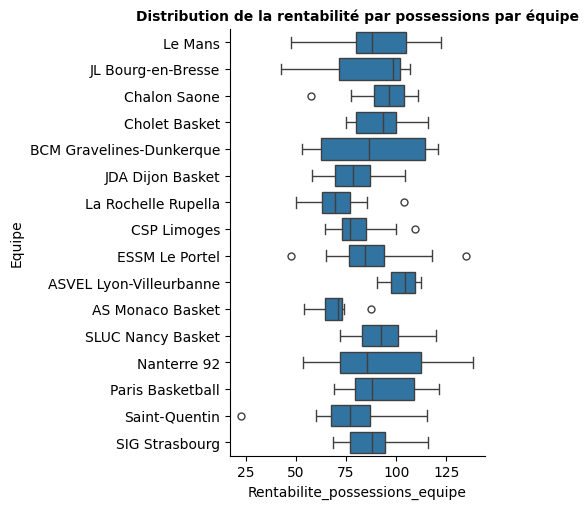

In [ ]:
# Création d'un schéma en boite à moustache pour comprendre la distribution de la rentabilité par possession
# pour chacune des équipes, et identifier les valeurs abérrantes.

sns.catplot(data = lineups_rentabilite, x='Rentabilite_possessions_equipe', y='Equipe', kind='box')

# Ajout d'un titre et affichage du graphique
plt.title('Distribution de la rentabilité par possessions par équipe',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**  

Afin de chercher des valeurs aberrantes, on a commencé par faire des
parcelles catégorielles (categorical plots).
La première ci-dessous concerne la rentabilité par équipe (point par 100 possessions par équipe).
On regarde, par équipe, la rentabilité pour chacune des lineups.
On constate notamment une valeur aberrante parmi les lineups du CSP Limoge.

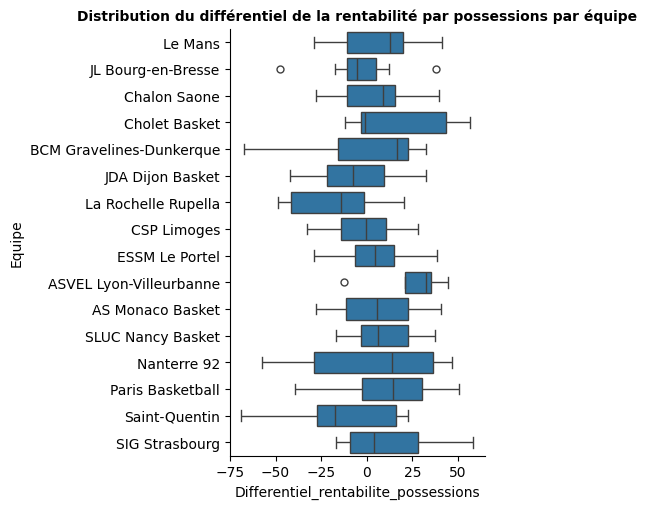

In [ ]:
# Création d'un schéma en boite à moustache pour comprendre la distribution du differentiel de rentabilité par possession
# pour chacune des équipes, et identifier les valeurs abérrantes.

sns.catplot(data = lineups_rentabilite, x='Differentiel_rentabilite_possessions', y='Equipe', kind='box')

# Ajout d'un titre et affichage du graphique
plt.title('Distribution du différentiel de la rentabilité par possessions par équipe',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**

Une autre parcelle catégorielle (categorical plots) avec cette fois le différentiel entre la rentabilité par équipe et la rentabilité des adversaires.
On retrouve une nouvelle fois une valeur aberrante parmi les lineups du CSP Limoge. Comme c’est un différentiel entre deux rentabilités, c’est logique de retrouver la même lineup que sur le graph précédent.

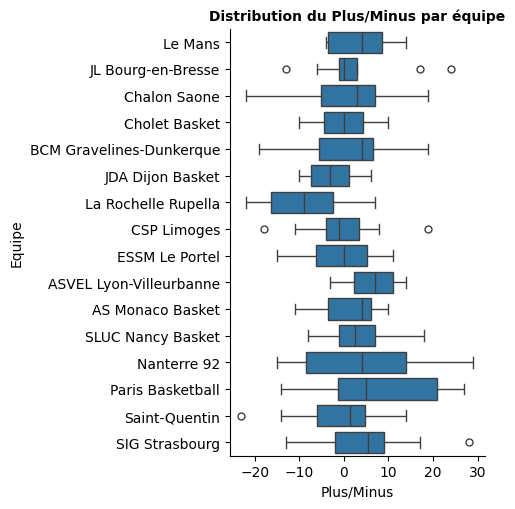

In [ ]:
# Création d'un schéma en boite à moustache pour comprendre la distribution du Plus/Minus
# pour chacune des équipes, et identifier les valeurs abérrantes.

sns.catplot(data = lineups_rentabilite, x='Plus/Minus', y='Equipe', kind='box')

# Ajout d'un titre et affichage du graphique
plt.title('Distribution du Plus/Minus par équipe',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**

Dernier graph de ce style ici pour vérifier qu’il n’y ai pas trop de valeurs aberrantes dans les Plus/Minus. Pour rappel, le Plus/Minus est le différentiel entre le nombre de points marqués et le nombre de points encaissés.
On constate seulement deux valeurs aberrantes.

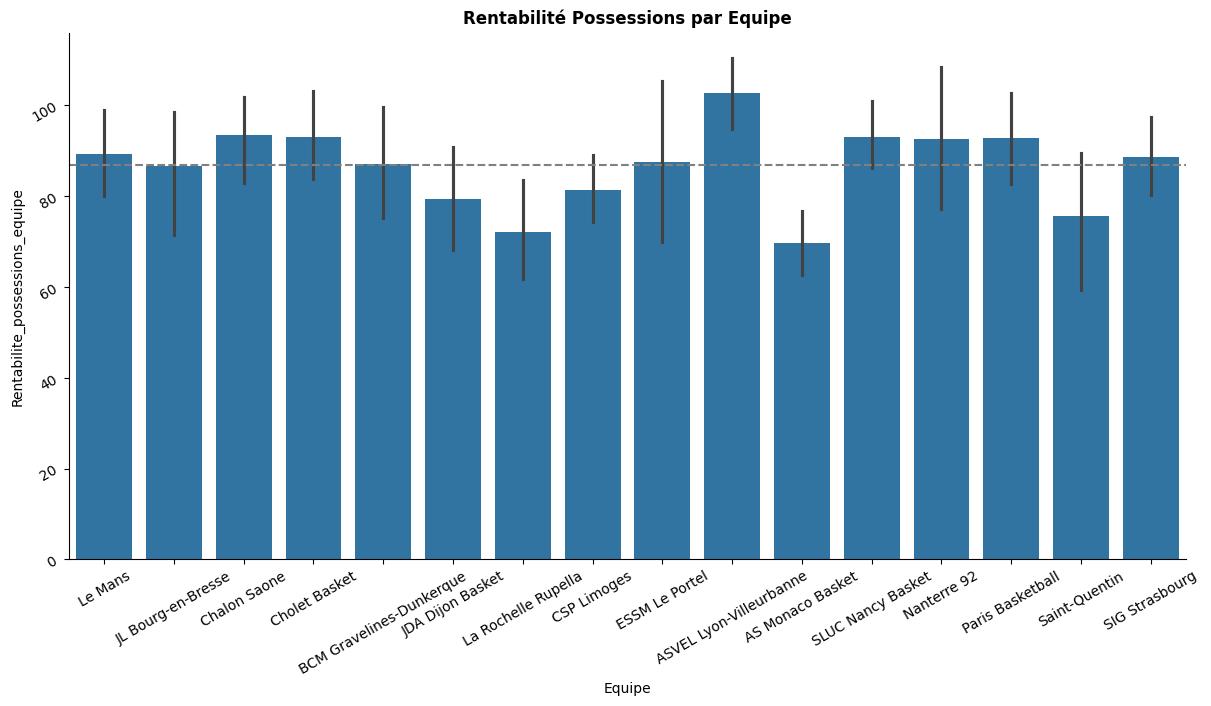

In [ ]:
# Création d'un diagramme en barres pour afficher la rentabilité par possessions des lineups
# de chacune des équipes, et les comparer avec la rentabilité par possessions moyennes des équipes.

# Calcul de la moyenne des rentabilités par possessions des équipes pour tous les lineups (toutes les équipes)
rpe_avg = lineups_rentabilite['Rentabilite_possessions_equipe'].mean()

sns.catplot(data=lineups_rentabilite, x='Equipe', y='Rentabilite_possessions_equipe', kind="bar", height=6, aspect=2)

# Ajout des lignes de références sur le graphique
plt.axhline(y=rpe_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Rentabilite possession equipe Avg: {rpe_avg:.2f}')

# Rotation des valeurs pour les axes des abscisses et des ordonnées pour permettre plus de lisibilité.
plt.xticks(rotation=30)
plt.yticks(rotation=30)

# Ajout d'un titre et affichage du graphique
plt.title('Rentabilité Possessions par Equipe',  fontweight='bold', fontsize=12, color = 'black')
plt.show()

**Explications :**

Avant d’aller plus loin dans l’analyse, on a voulu constater la différence d’une équipe à une autre sur la rentabilité par possessions. La ligne en pointillé représente la moyenne de la ligue sur cette rentabilité.

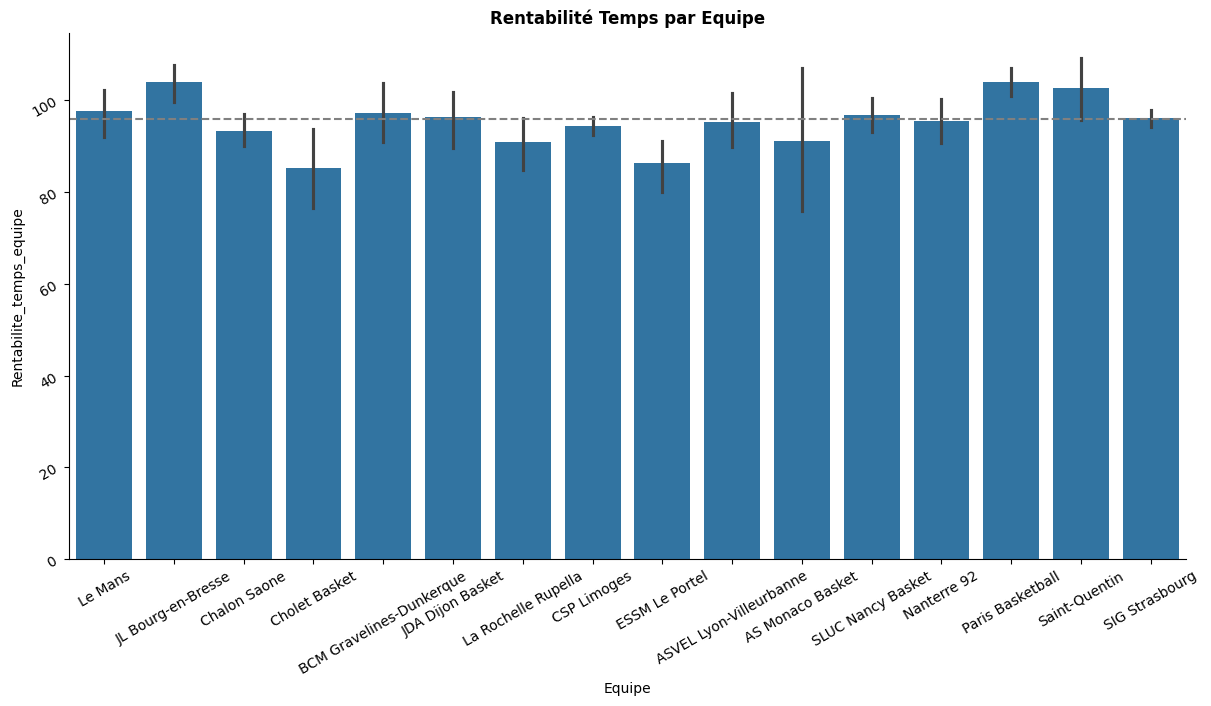

In [ ]:
# Création d'un diagramme en barres pour afficher la rentabilité temps des lineups
# de chacune des équipes, et les comparer avec la rentabilité temps moyennes des équipes.

# Calcul de la moyenne des rentabilités temps des équipes pour tous les lineups (toutes les équipes)
rte_avg = lineups_rentabilite['Rentabilite_temps_equipe'].mean()

sns.catplot(data=lineups_rentabilite, x='Equipe', y='Rentabilite_temps_equipe', kind="bar", height=6, aspect=2)

# Ajout des lignes de références sur le graphique
plt.axhline(y=rte_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Rentabilite temps equipe Avg: {rpe_avg:.2f}')

# Rotation des valeurs pour les axes des abscisses et des ordonnées pour permettre plus de lisibilité.
plt.xticks(rotation=30)
plt.yticks(rotation=30)

# Ajout d'un titre et affichage du graphique
plt.title('Rentabilité Temps par Equipe',  fontweight='bold', fontsize=12, color = 'black')
plt.show()

**Explications :**

Même analyse ici pour la rentabilité par temps.

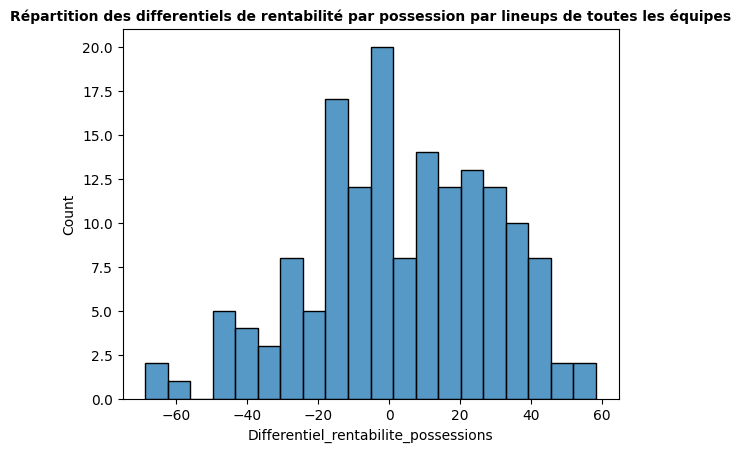

In [ ]:
# Création d'un histogramme afin de constater la répartition du différentiel des rentabilités de possessions des lineups de toutes les équipes
sns.histplot(lineups_rentabilite['Differentiel_rentabilite_possessions'], bins=20)

# Ajout d'un titre et affichage du graphique
plt.title('Répartition des differentiels de rentabilité par possession par lineups de toutes les équipes',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**

Afin de voir la distribution des différentiels des différentes rentabilités calculées, on a fait trois différents histogrammes - Notre pressentiment était qu’on allait constater un rassemblement de lineup avec un différentiel autour de 0.
C’est ce qu’on a constaté pour les trois différentiels. Ici, d’abord l’histogramme des différentiels de rentabilité par possessions. Les différentiels se regroupent autour de la valeur nulles. Difficile de dire à l'oeil nu si la balance est plutôt négative ou positive.

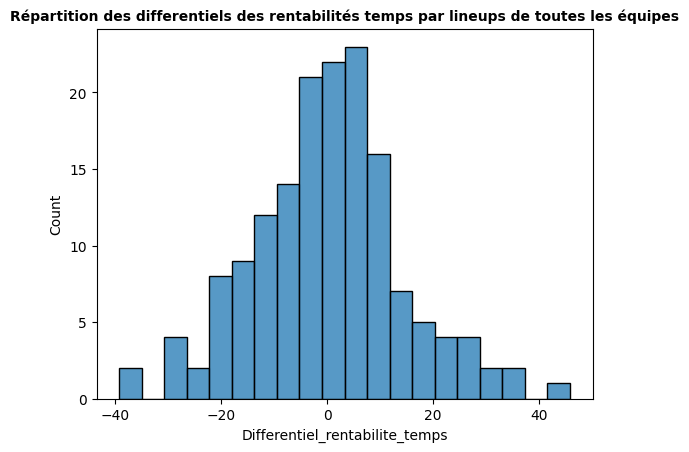

In [ ]:
# Création d'un histogramme afin de constater la répartition du différentiel des rentabilités temps des lineups de toutes les équipes
sns.histplot(lineups_rentabilite['Differentiel_rentabilite_temps'], bins=20)

# Ajout d'un titre et affichage du graphique
plt.title('Répartition des differentiels des rentabilités temps par lineups de toutes les équipes',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**

Ensuite, l’histogramme des différentiels de rentabilité de temps. Pour ce différentiels aussi, les valeurs se regroupent autour de la valeur nulles. C'est logique de retrouver le plus d'équipe autour de 0 car on fait la soustractions de la rentabilité de l'équipe par la rentabilité des adversaires.

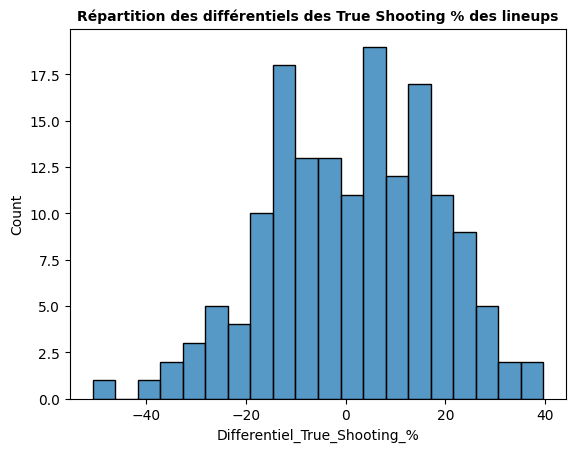

In [ ]:
# Création d'un histogramme afin de constater la répartition du différentiel de True Shooting % des lineups de toutes les équipes
sns.histplot(lineups_rentabilite['Differentiel_True_Shooting_%'], bins=20)

# Ajout d'un titre et affichage du graphique
plt.title('Répartition des différentiels des True Shooting % des lineups',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**

Pour finir, l’histogramme des différentiels de True Shooting % (l’efficacité au tir). Même logique que pour les histogrammes précédents, la majorité des différentiels sont autour de 0 - Les lineups qu'on trouvent le plus à gauche sont donc celle qui arrivent à avoir une bien meilleure rentabilité au tir que leur adversaire, et l'inverse pour les équipes tout à droite.

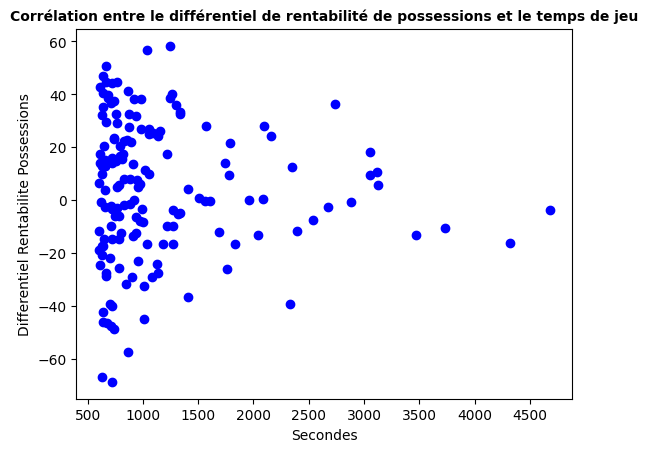

In [ ]:
# Création d'un graphique en nuage de points afin d'identifier (ou non) une corrélation entre
# le différentiel de rentabilité de possessions de chaque lineups de chaque équipe
# et leurs temps de jeu sur toute la saison (en secondes)
plt.plot(lineups_rentabilite['Secondes'],lineups_rentabilite['Differentiel_rentabilite_possessions'],"ob") # ob = type de points "o" ronds, "b" bleus

# Définition des labels des axes
plt.ylabel('Differentiel Rentabilite Possessions')
plt.xlabel('Secondes')

# Ajout d'un titre et affichage du graphique
plt.title('Corrélation entre le différentiel de rentabilité de possessions et le temps de jeu',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**

Ensuite, on a voulu mettre en avant l’impact de la taille de l’échantillon sur la répartition des valeurs de différentiel.
On a vu précédemment qu’on avait des valeurs aberrantes sur certains différentiels. Sur les nuages de points (scatter plot) ci-dessous, nous allons prouver que, plus la taille de l'échantillon est grande, plus les différentiels se rapprochent de zéro, et les valeurs sont donc plus cohérentes.
Premier exemple ici avec le différentiel de rentabilité par possessions.

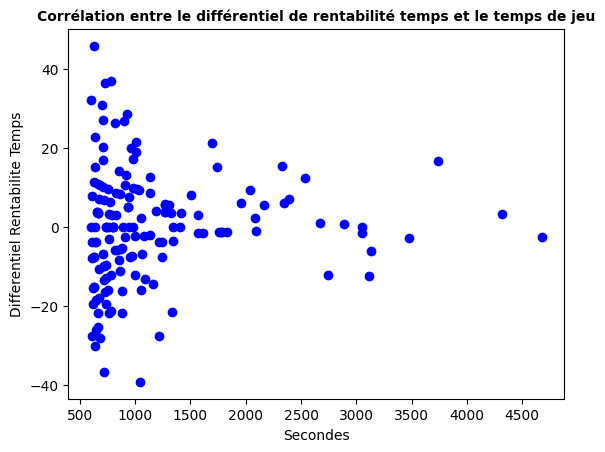

In [ ]:
# Création d'un graphique en nuage de points afin d'identifier (ou non) une corrélation entre
# le différentiel de rentabilité temps de chaque lineups de chaque équipe
# et leurs temps de jeu sur toute la saison (en secondes)

plt.plot(lineups_rentabilite['Secondes'],lineups_rentabilite['Differentiel_rentabilite_temps'],"ob") # ob = type de points "o" ronds, "b" bleus

# Définition des labels des axes
plt.ylabel('Differentiel Rentabilite Temps')
plt.xlabel('Secondes')

# Ajout d'un titre et affichage du graphique
plt.title('Corrélation entre le différentiel de rentabilité temps et le temps de jeu',  fontweight='bold', fontsize=10, color = 'black')
plt.show()

**Explications :**

Deuxième exemple ici avec le différentiel de rentabilité de temps, où on constate aussi que plus l’échantillon est grand, plus la valeur est cohérente.

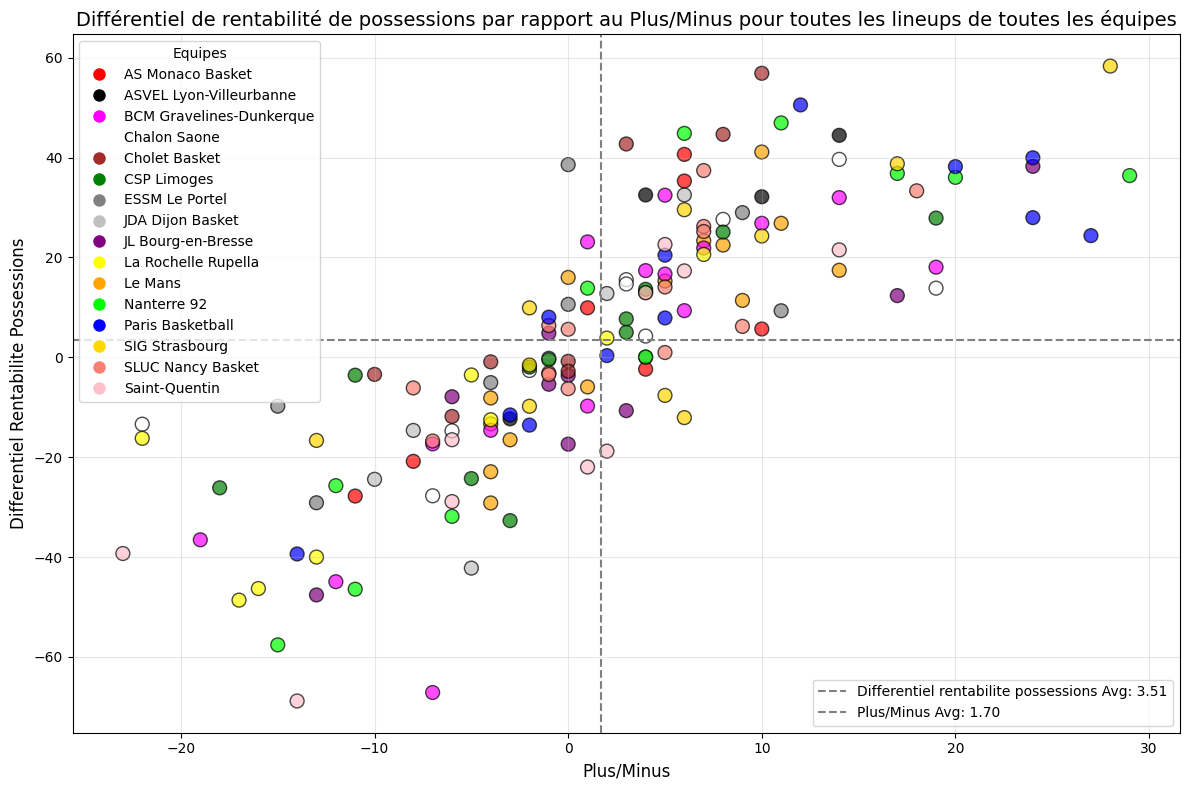

In [ ]:
# Création d'un scatter plot afin de constater la corrélation de chacune des lineups des équipes
# entre le Plus/Minus et le différentiel de rentabilité de possessions.

# Calcul des moyennes du Plus/Minus et du Differentiel de rentabilité de possessions pour toutes les équipes
pm_avg = lineups_rentabilite['Plus/Minus'].mean()
drp_avg = lineups_rentabilite['Differentiel_rentabilite_possessions'].mean()

# Definition d'un mapping de couleurs pour chacune des équipes
color_mapping = {
    'AS Monaco Basket': 'red',
    'ASVEL Lyon-Villeurbanne': 'black',
    'BCM Gravelines-Dunkerque': 'magenta',
    'Chalon Saone': 'white',
    'Cholet Basket': 'brown',
    'CSP Limoges': 'green',
    'ESSM Le Portel': 'grey',
    'JDA Dijon Basket': 'silver',
    'JL Bourg-en-Bresse': 'purple',
    'La Rochelle Rupella': 'yellow',
    'Le Mans': 'orange',
    'Nanterre 92': 'lime',
    'Paris Basketball': 'blue',
    'SIG Strasbourg': 'gold',
    'SLUC Nancy Basket': 'salmon',
    'Saint-Quentin' : 'pink'
}
lineups_rentabilite['Color'] = lineups_rentabilite['Equipe'].map(color_mapping)

# Création du Scatter plot (nuage de points)
plt.figure(figsize=(12, 8))
plt.scatter(lineups_rentabilite['Plus/Minus'], lineups_rentabilite['Differentiel_rentabilite_possessions'], c=lineups_rentabilite['Color'], alpha=0.7, s=100, edgecolor='black')

# Création des références pour les lignes des moyennes
plt.axhline(y=drp_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Differentiel rentabilite possessions Avg: {drp_avg:.2f}')
plt.axvline(x=pm_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Plus/Minus Avg: {pm_avg:.2f}')

# Création des titres et des labels
plt.xlabel('Plus/Minus', fontsize=12)
plt.ylabel('Differentiel Rentabilite Possessions', fontsize=12)
plt.title('Différentiel de rentabilité de possessions par rapport au Plus/Minus pour toutes les lineups de toutes les équipes', fontsize=14)

# Affichage d'une grille de fond
plt.grid(alpha=0.3)

# Positionnement de la légende dans le graphique
legend_labels = list(color_mapping.keys())
legend_colors = list(color_mapping.values())
position_legend = plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
             for color in legend_colors],
    labels=legend_labels, title='Equipes', loc='upper left'
)

# Ajout de la légende pour les lignes des moyennes
plt.legend(loc='lower right')
plt.gca().add_artist(position_legend)  # Add position legend back

# Display the plot
plt.tight_layout()
plt.show()

**Explications :**

On passe maintenant à d’autres nuages de points. Avec les trois prochains graphs on va vouloir trouver des corrélations visuelles entre les rentabilités qu’on a calculées.
On a séparé les équipes par couleur, et on a ajouté deux lignes de références pour mettre en avant la moyenne de la ligue pour chacune des metrics.
Sur ce premier exemple, on affiche toutes les lineups en fonction de leur différentiel de rentabilité par possessions avec le Plus/Minus. Visuellement, on constate une corrélation entre les deux metrics.

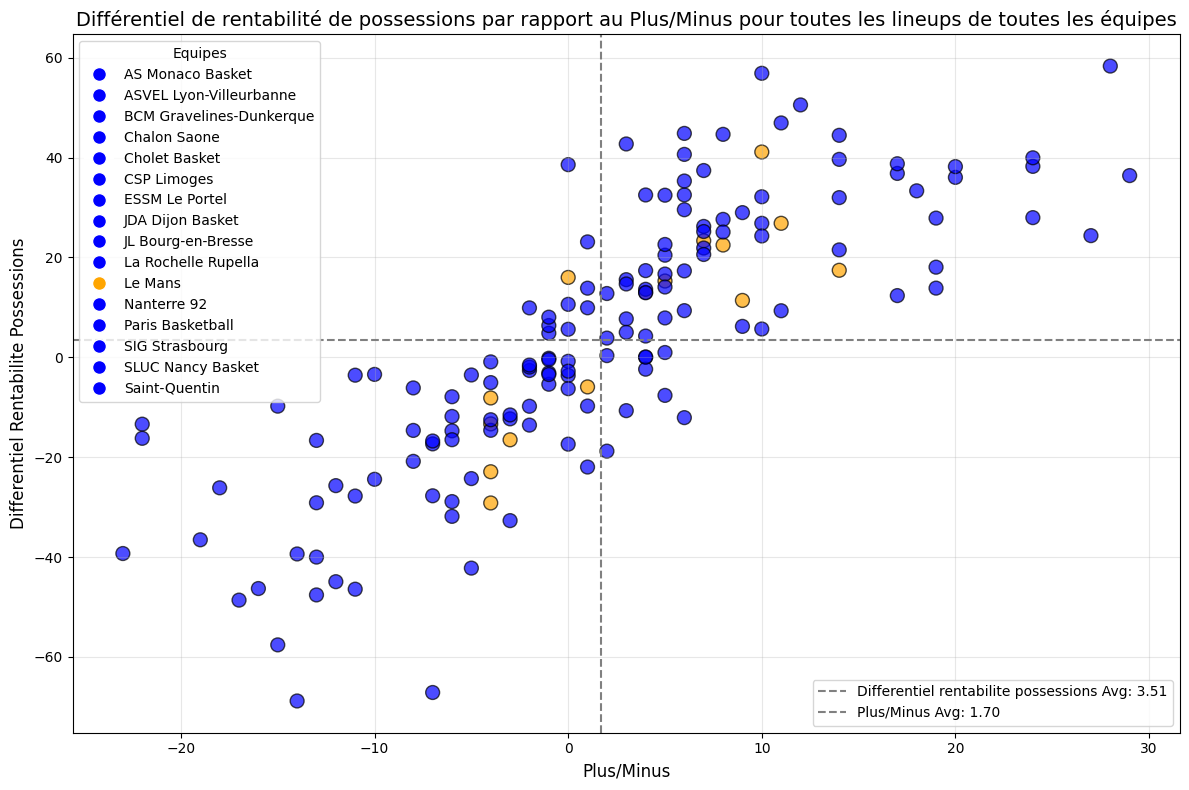

In [ ]:
# Création d'un scatter plot afin de constater la corrélation de chacune des lineups des équipes
# entre le Plus/Minus et le différentiel de rentabilité de possessions
# en mettant en avant les lineups du Mans par rapport aux lineups des autres équipes

# Calcul des moyennes du Plus/Minus et du Differentiel de rentabilité de possessions pour toutes les équipes
pm_avg = lineups_rentabilite['Plus/Minus'].mean()
drp_avg = lineups_rentabilite['Differentiel_rentabilite_possessions'].mean()

# Definition d'un mapping de couleurs pour chacune des équipes
color_mapping = {
    'AS Monaco Basket': 'blue',
    'ASVEL Lyon-Villeurbanne': 'blue',
    'BCM Gravelines-Dunkerque': 'blue',
    'Chalon Saone': 'blue',
    'Cholet Basket': 'blue',
    'CSP Limoges': 'blue',
    'ESSM Le Portel': 'blue',
    'JDA Dijon Basket': 'blue',
    'JL Bourg-en-Bresse': 'blue',
    'La Rochelle Rupella': 'blue',
    'Le Mans': 'orange',
    'Nanterre 92': 'blue',
    'Paris Basketball': 'blue',
    'SIG Strasbourg': 'blue',
    'SLUC Nancy Basket': 'blue',
    'Saint-Quentin' : 'blue'
}
lineups_rentabilite['Color'] = lineups_rentabilite['Equipe'].map(color_mapping)

# Création du Scatter plot (nuage de points)
plt.figure(figsize=(12, 8))
plt.scatter(lineups_rentabilite['Plus/Minus'], lineups_rentabilite['Differentiel_rentabilite_possessions'], c=lineups_rentabilite['Color'], alpha=0.7, s=100, edgecolor='black')

# Création des références pour les lignes des moyennes
plt.axhline(y=drp_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Differentiel rentabilite possessions Avg: {drp_avg:.2f}')
plt.axvline(x=pm_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Plus/Minus Avg: {pm_avg:.2f}')

# Création des titres et des labels
plt.xlabel('Plus/Minus', fontsize=12)
plt.ylabel('Differentiel Rentabilite Possessions', fontsize=12)
plt.title('Différentiel de rentabilité de possessions par rapport au Plus/Minus pour toutes les lineups de toutes les équipes', fontsize=14)

# Affichage d'une grille de fond
plt.grid(alpha=0.3)

# Positionnement de la légende dans le graphique
legend_labels = list(color_mapping.keys())
legend_colors = list(color_mapping.values())
position_legend = plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
             for color in legend_colors],
    labels=legend_labels, title='Equipes', loc='upper left'
)

# Ajout de la légende pour les lignes des moyennes
plt.legend(loc='lower right')
plt.gca().add_artist(position_legend)  # Add position legend back

# Display the plot
plt.tight_layout()
plt.show()

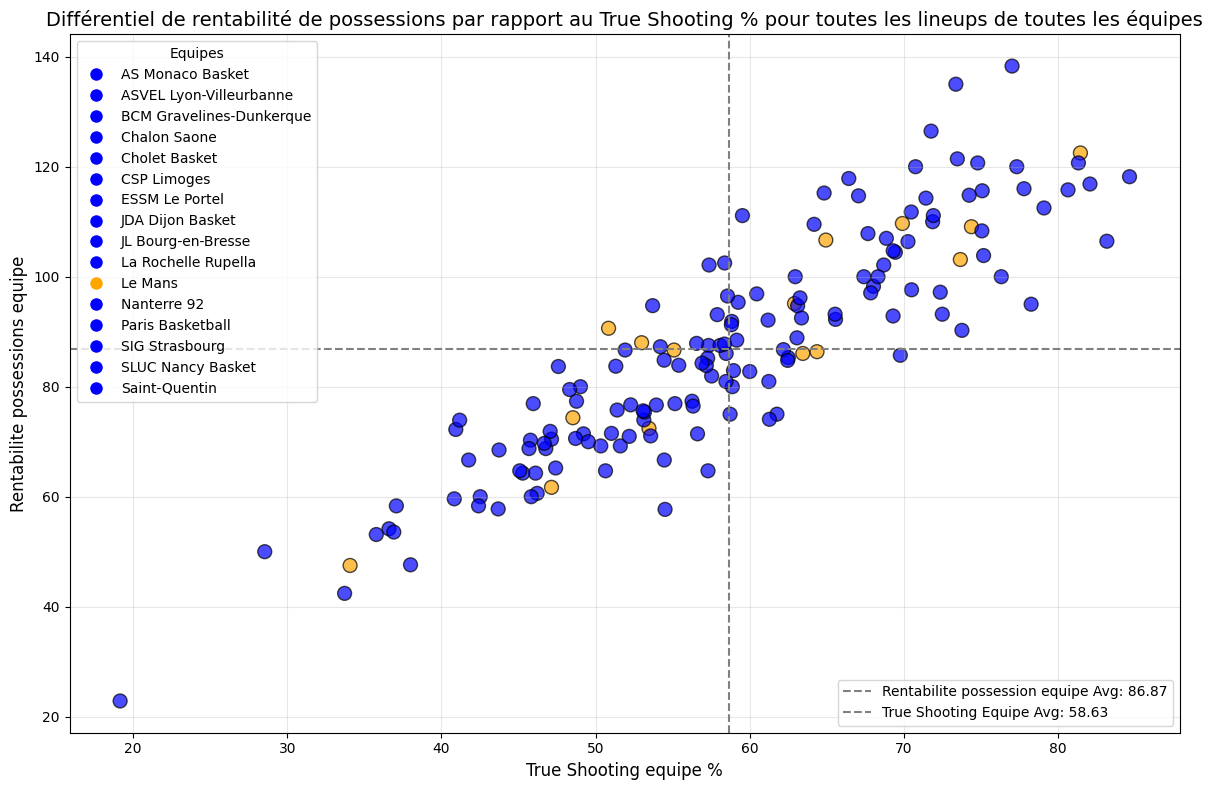

In [ ]:
# Création d'un scatter plot afin de constater la corrélation de chacune des lineups des équipes
# entre le True Shooting % équipe et le différentiel de rentabilité de possessions
# en mettant en avant les lineups du Mans par rapport aux lineups des autres équipes

# Calcul des moyennes du True Shooting % des équipes et du Differentiel de rentabilité de possessions pour toutes les équipes
tse_avg = lineups_rentabilite['True_Shooting_equipe_%'].mean()
rpe_avg = lineups_rentabilite['Rentabilite_possessions_equipe'].mean()

# Definition d'un mapping de couleurs pour chacune des équipes
color_mapping = {
    'AS Monaco Basket': 'blue',
    'ASVEL Lyon-Villeurbanne': 'blue',
    'BCM Gravelines-Dunkerque': 'blue',
    'Chalon Saone': 'blue',
    'Cholet Basket': 'blue',
    'CSP Limoges': 'blue',
    'ESSM Le Portel': 'blue',
    'JDA Dijon Basket': 'blue',
    'JL Bourg-en-Bresse': 'blue',
    'La Rochelle Rupella': 'blue',
    'Le Mans': 'orange',
    'Nanterre 92': 'blue',
    'Paris Basketball': 'blue',
    'SIG Strasbourg': 'blue',
    'SLUC Nancy Basket': 'blue',
    'Saint-Quentin' : 'blue'
}
lineups_rentabilite['Color'] = lineups_rentabilite['Equipe'].map(color_mapping)

# Création du Scatter plot (nuage de points)
plt.figure(figsize=(12, 8))
plt.scatter(lineups_rentabilite['True_Shooting_equipe_%'], lineups_rentabilite['Rentabilite_possessions_equipe'], c=lineups_rentabilite['Color'], alpha=0.7, s=100, edgecolor='black')

# Création des références pour les lignes des moyennes
plt.axhline(y=rpe_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Rentabilite possession equipe Avg: {rpe_avg:.2f}')
plt.axvline(x=tse_avg, color='gray', linestyle='--', linewidth=1.5, label=f'True Shooting Equipe Avg: {tse_avg:.2f}')

# Création des titres et des labels
plt.xlabel('True Shooting equipe %', fontsize=12)
plt.ylabel('Rentabilite possessions equipe', fontsize=12)
plt.title('Différentiel de rentabilité de possessions par rapport au True Shooting % pour toutes les lineups de toutes les équipes', fontsize=14)

# Affichage d'une grille de fond
plt.grid(alpha=0.3)

# Positionnement de la légende dans le graphique
legend_labels = list(color_mapping.keys())
legend_colors = list(color_mapping.values())
position_legend = plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
             for color in legend_colors],
    labels=legend_labels, title='Equipes', loc='upper left'
)

# Ajout de la légende pour les lignes des moyennes
plt.legend(loc='lower right')
plt.gca().add_artist(position_legend)  # Add position legend back

# Affichage du graphique
plt.tight_layout()
plt.show()

**Explications :**

Nous passons ensuite à la corrélation entre deux autres metrics qu’on a calculé : la rentabilité par possessions et le True Shooting %. Là encore, on constate une certaine corrélation entre ces deux metrics.

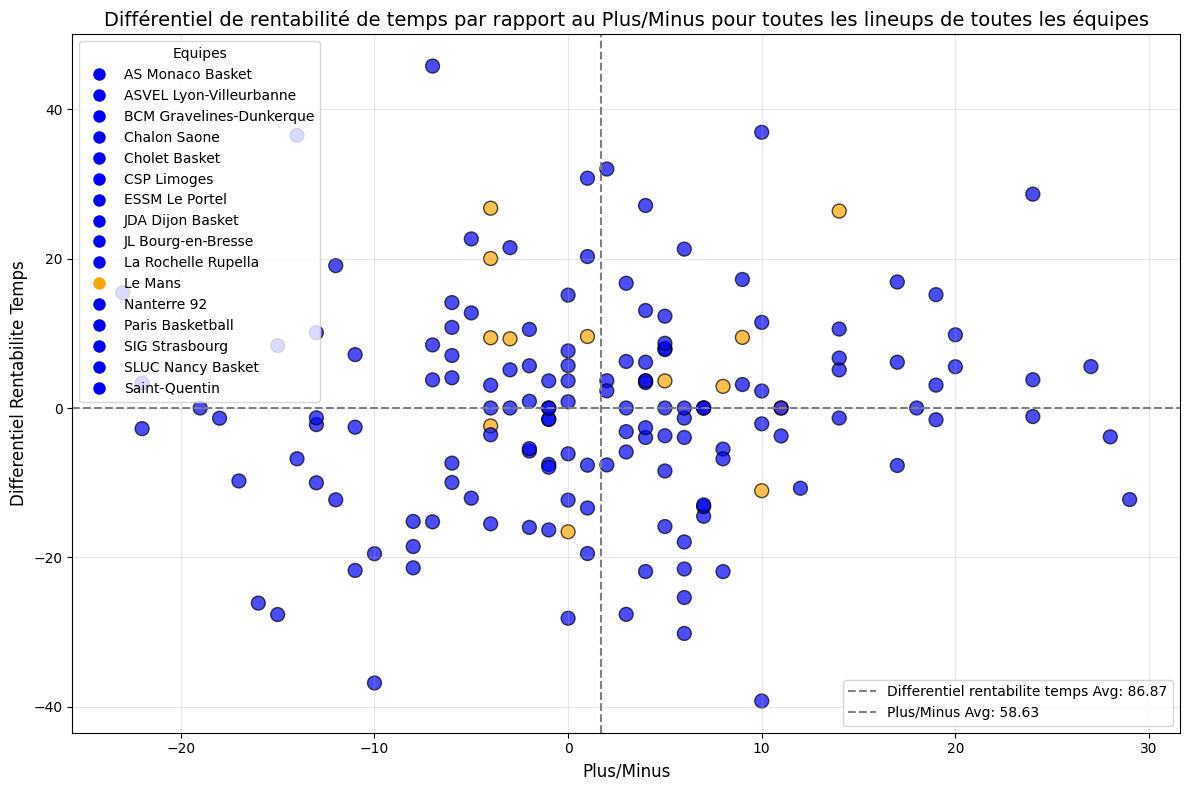

In [ ]:
# Création d'un scatter plot afin de constater la corrélation de chacune des lineups des équipes
# entre le Plus/Minus et le différentiel de rentabilité temps
# en mettant en avant les lineups du Mans par rapport aux lineups des autres équipes

# Calcul des moyennes du Plus/Minus et du Differentiel de rentabilité temps pour toutes les équipes
pm_avg = lineups_rentabilite['Plus/Minus'].mean()
drt_avg = lineups_rentabilite['Differentiel_rentabilite_temps'].mean()

# Definition d'un mapping de couleurs pour chacune des équipes
color_mapping = {
    'AS Monaco Basket': 'blue',
    'ASVEL Lyon-Villeurbanne': 'blue',
    'BCM Gravelines-Dunkerque': 'blue',
    'Chalon Saone': 'blue',
    'Cholet Basket': 'blue',
    'CSP Limoges': 'blue',
    'ESSM Le Portel': 'blue',
    'JDA Dijon Basket': 'blue',
    'JL Bourg-en-Bresse': 'blue',
    'La Rochelle Rupella': 'blue',
    'Le Mans': 'orange',
    'Nanterre 92': 'blue',
    'Paris Basketball': 'blue',
    'SIG Strasbourg': 'blue',
    'SLUC Nancy Basket': 'blue',
    'Saint-Quentin' : 'blue'
}
lineups_rentabilite['Color'] = lineups_rentabilite['Equipe'].map(color_mapping)

# Création du Scatter plot (nuage de points)
plt.figure(figsize=(12, 8))
plt.scatter(lineups_rentabilite['Plus/Minus'], lineups_rentabilite['Differentiel_rentabilite_temps'], c=lineups_rentabilite['Color'], alpha=0.7, s=100, edgecolor='black')

# Création des références pour les lignes des moyennes
plt.axhline(y=drt_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Differentiel rentabilite temps Avg: {rpe_avg:.2f}')
plt.axvline(x=pm_avg, color='gray', linestyle='--', linewidth=1.5, label=f'Plus/Minus Avg: {tse_avg:.2f}')

# Création des titres et des labels
plt.xlabel('Plus/Minus', fontsize=12)
plt.ylabel('Differentiel Rentabilite Temps', fontsize=12)
plt.title('Différentiel de rentabilité de temps par rapport au Plus/Minus pour toutes les lineups de toutes les équipes', fontsize=14)

# Affichage d'une grille de fond
plt.grid(alpha=0.3)

# Positionnement de la légende dans le graphique
legend_labels = list(color_mapping.keys())
legend_colors = list(color_mapping.values())
position_legend = plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
             for color in legend_colors],
    labels=legend_labels, title='Equipes', loc='upper left'
)

# Ajout de la légende pour les lignes des moyennes
plt.legend(loc='lower right')
plt.gca().add_artist(position_legend)

# Affichage du graphique
plt.tight_layout()
plt.show()

**Explications :**

Pour finir sur les nuages de point, on veut cette fois mettre en avant la corrélation possible entre le Plus/Minus et le différentiel de rentabilité par temps.
Néanmoins, on constate cette fois que les points sont bien plus éclatés et qu’on peut difficilement discerner une corrélation. Afin de confirmer nos intuitions, nous allons calculer les coefficients de corrélations.

In [ ]:
# Création d'une matrice de correlation de toutes les équipes permettant d'identifier les potentielles corrélations entre :
# le Plus/Minus, le Différentiel de rentabilité par possesions, le Différentiel de rentabilité temps et le Différentiel TS %

# Création d'un dataframe avec les données de toutes les lineups de toutes les équipes (depuis la table lineups_rentabilite)
# en ne gardant que les données que l'on souhaite utiliser pour la matrice de corrélation.
df_corr = lineups_rentabilite[['Plus/Minus','Differentiel_rentabilite_possessions','Differentiel_rentabilite_temps','Differentiel_True_Shooting_%']]
df_corr

Plus/Minus  Differentiel_rentabilite_possessions  \
0            -4                            -13.333333   
1            -3                            -16.517591   
2             9                             11.388889   
3            -4                             -8.141026   
4            11                             26.829268   
..          ...                                   ...   
153          28                             58.307692   
154          10                             24.292929   
155          -2                              9.893617   
156          -2                             -1.544402   
157           6                             29.545455   

     Differentiel_rentabilite_temps  Differentiel_True_Shooting_%  
0                          9.407153                    -11.734029  
1                          9.266409                    -17.072225  
2                          9.458128                     17.997691  
3                         -2.400000                     -4.974502  
4                          0.000000                     14.020544  
..                              ...                           ...  
153                       -3.864734                     36.806093  
154                       -2.116402                     22.229988  
155                      -15.984776                     21.045469  
156                       -5.442177                     12.838000  
157                      -17.937220                     21.815383  

[158 rows x 4 columns]

In [ ]:
# Création (méthode '.corr()') de la matrice de corrélation de toutes les équipes et stockage dans une variable
corrmat = df_corr.corr()

# Affichage de la matrice de corrélation de toutes les équipes
display(corrmat)

Plus/Minus  \
Plus/Minus                              1.000000   
Differentiel_rentabilite_possessions    0.805282   
Differentiel_rentabilite_temps          0.078322   
Differentiel_True_Shooting_%            0.715819   

                                      Differentiel_rentabilite_possessions  \
Plus/Minus                                                        0.805282   
Differentiel_rentabilite_possessions                              1.000000   
Differentiel_rentabilite_temps                                   -0.356272   
Differentiel_True_Shooting_%                                      0.899466   

                                      Differentiel_rentabilite_temps  \
Plus/Minus                                                  0.078322   
Differentiel_rentabilite_possessions                       -0.356272   
Differentiel_rentabilite_temps                              1.000000   
Differentiel_True_Shooting_%                               -0.269919   

                                      Differentiel_True_Shooting_%  
Plus/Minus                                                0.715819  
Differentiel_rentabilite_possessions                      0.899466  
Differentiel_rentabilite_temps                           -0.269919  
Differentiel_True_Shooting_%                              1.000000

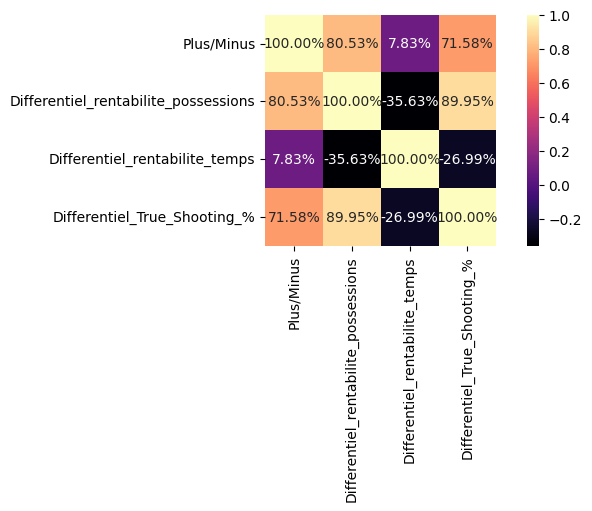

In [ ]:
# Le tupple renseigné dans le paramètre 'figsize=' de la méthode '.figure()' du package matplotlib permet de configurer les dimensions du graphiques.
plt.figure(figsize=(8, 3))

# Configuration et affichage de la heatmap
sns.heatmap(corrmat, annot=True, fmt='.2%', cmap='magma', square=True)
plt.show()

In [ ]:
# Création d'une matrice de correlation du Mans permettant d'identifier les potentielles corrélations entre :
# le Plus/Minus, le Différentiel de rentabilité par possesions, le Différentiel de rentabilité temps et le Différentiel TS %

# Création d'un dataframe avec toutes les données du dataframe lineups_rentabilite, mais seulement pour l'équipe du Mans
df_corr_lemans = lineups_rentabilite[lineups_rentabilite['Equipe'] == 'Le Mans']
# Mise à jour de ce dataframe pour ne garder que les données nécessaires à la matrice de corrélation
df_corr_lemans = df_corr_lemans[['Plus/Minus','Differentiel_rentabilite_possessions','Differentiel_rentabilite_temps','Differentiel_True_Shooting_%']]
df_corr_lemans

Plus/Minus  Differentiel_rentabilite_possessions  \
0           -4                            -13.333333   
1           -3                            -16.517591   
2            9                             11.388889   
3           -4                             -8.141026   
4           11                             26.829268   
5           -4                            -22.913257   
6           -4                            -29.166667   
7           10                             41.105991   
8            8                             22.479839   
9           14                             17.424242   
10           1                             -5.926724   
11           7                             23.333333   
12           0                             15.993266   
13           4                             13.000000   
14           5                             15.270936   

    Differentiel_rentabilite_temps  Differentiel_True_Shooting_%  
0                         9.407153                    -11.734029  
1                         9.266409                    -17.072225  
2                         9.458128                     17.997691  
3                        -2.400000                     -4.974502  
4                         0.000000                     14.020544  
5                        20.020855                    -21.382453  
6                        26.755853                    -27.226034  
7                       -11.072664                     26.485976  
8                         2.898551                     27.088434  
9                        26.373626                     15.744771  
10                        9.574468                    -10.669909  
11                        0.000000                      7.700633  
12                      -16.574586                     15.695111  
13                        3.630862                     -6.695185  
14                        3.630862                     16.697616

In [ ]:
# Création (méthode '.corr()') de la matrice de corrélation du Mans et stockage dans une variable
corrmat_lemans = df_corr_lemans.corr()

# Affichage de la matrice de corrélation du Mans
display(corrmat_lemans)

Plus/Minus  \
Plus/Minus                              1.000000   
Differentiel_rentabilite_possessions    0.856267   
Differentiel_rentabilite_temps         -0.127910   
Differentiel_True_Shooting_%            0.815691   

                                      Differentiel_rentabilite_possessions  \
Plus/Minus                                                        0.856267   
Differentiel_rentabilite_possessions                              1.000000   
Differentiel_rentabilite_temps                                   -0.599181   
Differentiel_True_Shooting_%                                      0.916629   

                                      Differentiel_rentabilite_temps  \
Plus/Minus                                                 -0.127910   
Differentiel_rentabilite_possessions                       -0.599181   
Differentiel_rentabilite_temps                              1.000000   
Differentiel_True_Shooting_%                               -0.534251   

                                      Differentiel_True_Shooting_%  
Plus/Minus                                                0.815691  
Differentiel_rentabilite_possessions                      0.916629  
Differentiel_rentabilite_temps                           -0.534251  
Differentiel_True_Shooting_%                              1.000000

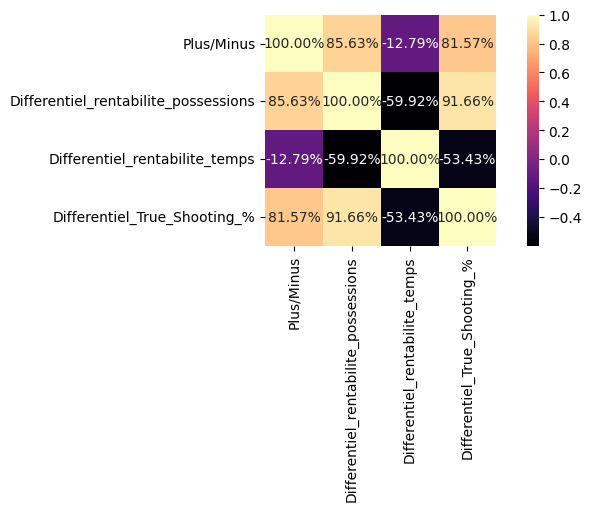

In [ ]:
# Le tupple renseigné dans le paramètre 'figsize=' de la méthode '.figure()' du package matplotlib permet de configurer les dimensions du graphiques.
plt.figure(figsize=(8, 3))

# Configuration et affichage de la heatmap
sns.heatmap(corrmat_lemans, annot=True, fmt='.2%', cmap='magma', square=True)
plt.show()

**Explications :**

Après calcul des coefficients de corrélations entre nos metrics de rentabilité et le Plus/Minus, voici nos conclusions:
Le Plus/Minus et la rentabilité par possessions est très élevé (+0.8).
Le Plus/Minus et la rentabilité de temps est très faible, voire nulle (+0.1).
La rentabilité par possessions et le true shooting % est aussi très élevé (je sais plus le chiffre faut double check)
On constate les mêmes ordres de grandeur pour toutes les lineups de la ligue que pour celles de l’équipe du Mans.

# VIII. Export des DataFrames en CSV

In [ ]:
# Exporter les DataFrame en CSV

lineups_lemans.to_csv('lineups_lemans.csv', index=False, encoding='utf-8')
lineups_monaco.to_csv('lineups_monaco.csv', index=False, encoding='utf-8')
lineups_lyon.to_csv('lineups_lyon.csv', index=False, encoding='utf-8')
lineups_dunkerque.to_csv('lineups_dunkerque.csv', index=False, encoding='utf-8')
lineups_limoges.to_csv('lineups_limoges.csv', index=False, encoding='utf-8')
lineups_chalons.to_csv('lineups_chalons.csv', index=False, encoding='utf-8')
lineups_cholet.to_csv('lineups_cholet.csv', index=False, encoding='utf-8')
lineups_leportel.to_csv('lineups_leportel.csv', index=False, encoding='utf-8')
lineups_dijon.to_csv('lineups_dijon.csv', index=False, encoding='utf-8')
lineups_bourg.to_csv('lineups_bourg.csv', index=False, encoding='utf-8')
lineups_larochelle.to_csv('lineups_larochelle.csv', index=False, encoding='utf-8')
lineups_nanterre.to_csv('lineups_nanterre.csv', index=False, encoding='utf-8')
lineups_paris.to_csv('lineups_paris.csv', index=False, encoding='utf-8')
lineups_strasbourg.to_csv('lineups_strasbourg.csv', index=False, encoding='utf-8')
lineups_nancy.to_csv('lineups_nancy.csv', index=False, encoding='utf-8')
lineups_saintquentin.to_csv('lineups_saintquentin.csv', index=False, encoding='utf-8')
players.to_csv('players.csv', index=False, encoding='utf-8')
equipes.to_csv('equipes.csv', index=False, encoding='utf-8')
lineups_rentabilite.to_csv('lineups_rentabilite.csv', index=False, encoding='utf-8')

In [ ]:
equipes.to_csv('equipes.csv', index=False, encoding='utf-8')

# IX. Bonus Data Visualisation

Instalation des packages nécessaires (dash & flask-ngrok)

In [ ]:
!pip install dash
!pip install flask-ngrok

Import des packages nécessaires à la réalisation des bonus !

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from flask_ngrok import run_with_ngrok
import random
import ipywidgets as widgets
from IPython.display import display

Code pour la création du radar chart intéractif pour comparer des lineups entre elles !

Avec un tel outil, le coach pourrait identifier des lineups plus propice à performer en fonctions des forces et faiblesses des lineups adverses.

In [ ]:
# Initialisation de l'application Dash
app = dash.Dash(__name__)
run_with_ngrok(app)  # Configure l'application pour ngrok
app.title = "Basketball Lineups Radar"

# Layout de l'application
app.layout = html.Div([
    html.H1("Rentabilité offensive et défensive par lineup (Attaque & Défense)",
            style={"textAlign": "center", "fontFamily": "Arial, sans-serif"}),

    # Menu déroulant pour choisir les équipes
    html.Label("Choisissez une ou plusieurs équipes :", style={"fontSize": "18px", "fontFamily": "Arial, sans-serif"}),
    dcc.Dropdown(
        id="dropdown-equipe",
        options=[{"label": equipe, "value": equipe} for equipe in lineups_rentabilite["Equipe"].unique()],
        multi=True,
        placeholder="Sélectionnez une équipe",
        style={"width": "50%", "margin": "0 auto", "fontFamily": "Arial, sans-serif"}
    ),

    # Menu déroulant pour choisir les lineups (dépend de l'équipe choisie)
    html.Label("Choisissez une ou plusieurs lineups :", style={"fontSize": "18px", "fontFamily": "Arial, sans-serif"}),
    dcc.Dropdown(
        id="dropdown-lineup",
        multi=True,
        placeholder="Sélectionnez un lineup",
        style={"width": "50%", "margin": "0 auto", "fontFamily": "Arial, sans-serif"}
    ),

    # Affichage des lineups sélectionnés au-dessus du graphique
    html.Div(id="selected-lineups", style={"textAlign": "center", "fontSize": "20px", "fontFamily": "Arial, sans-serif"}),

    # Graphique radar
    dcc.Graph(id="radar-chart", style={"width": "80%", "margin": "0 auto"})
])

# Callback pour mettre à jour les lineups en fonction des équipes sélectionnées
@app.callback(
    Output("dropdown-lineup", "options"),
    Input("dropdown-equipe", "value")
)
def update_lineups_options(selected_equipes):
    if not selected_equipes:
        return []
    filtered_lineups_rentabilite = lineups_rentabilite[lineups_rentabilite["Equipe"].isin(selected_equipes)]
    return [{"label": lineup, "value": lineup} for lineup in filtered_lineups_rentabilite["Lineup"].unique()]

# Callback pour afficher les lineups sélectionnés
@app.callback(
    Output("selected-lineups", "children"),
    Input("dropdown-lineup", "value")
)
def display_selected_lineups(selected_lineups):
    if not selected_lineups:
        return "Aucun lineup sélectionné."
    return f"Lineups sélectionnés: {', '.join(selected_lineups)}"

# Callback pour générer le radar chart
@app.callback(
    Output("radar-chart", "figure"),
    [Input("dropdown-lineup", "value")]
)
def update_radar_chart(selected_lineups):
    if not selected_lineups:
        return go.Figure()

    # Filtrer les données selon les lineups sélectionnés
    filtered_lineups_rentabilite = lineups_rentabilite[lineups_rentabilite["Lineup"].isin(selected_lineups)]

    # Renommage des catégories pour l'affichage
    categories = [
        "Pts per poss (offense)",
        "Pts per poss (defense)",
        "Poss per game (offense)",
        "Poss per game (defense)",
        "TS% (offense)",
        "TS% (defense)"
    ]

    # Définir des couleurs uniques pour chaque lineup
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Exemple de couleurs, vous pouvez en ajouter d'autres
    random.shuffle(colors)

    # Initialiser le graphique radar
    fig = go.Figure()

    for idx, (_, row) in enumerate(filtered_lineups_rentabilite.iterrows()):
        values = [
            row["centile_Rentabilite_possessions_equipe"],
            row["centile_Rentabilite_possessions_opp"],
            row["centile_Rentabilite_temps_equipe"],
            row["centile_Rentabilite_temps_opp"],
            row["centile_True_Shooting_equipe_%"],
            row["centile_True_Shooting_opp_%"]
        ]
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill="toself",
            name=row["Lineup"],
            line=dict(color=colors[idx % len(colors)])  # Attribution d'une couleur unique à chaque lineup
        ))

    # Mise à jour de la mise en page
    fig.update_layout(
        title="Rentabilité offensive et défensive par lineup (Attaque & Défense)",
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 100], tickcolor="black"),
            angularaxis=dict(
                tickangle=0,  # Réduire l'angle pour les labels
                tickcolor="black",
                tickvals=[0, 1, 2, 3, 4, 5],
                ticktext=categories,
            )
        ),
        showlegend=True,
        plot_bgcolor="white",
        paper_bgcolor="white",
        font=dict(color="black", family="Arial, sans-serif"),
        title_font=dict(color="orange", size=24),
        margin=dict(t=100)  # Marges pour ajuster l'espace autour du graphique
    )

    return fig

# Lancer l'application avec ngrok
if __name__ == "__main__":
    app.run_server()


<IPython.core.display.Javascript object>


Code pour la création d'une heatmap intéractive en fonctions des adversaires du Mans.

Ce code permet de soutraire les rentabilité de chaque lineup en fonction de la moyennes des lineups du futur adversaire du Mans ! Avec un tel outil, le coach pourrait identifier des lineups plus propice à performer en amont d'un match.

In [ ]:
# Teams
team_name = "Le Mans"

# Filter le data frame sur Le Mans
team_le_mans = lineups_rentabilite[lineups_rentabilite["Equipe"] == team_name]

# On definie les metrics qu'on va utiliser pour anaylser la performance
offensive_stats = [
    "Rentabilite_possessions_equipe",
    "Rentabilite_temps_equipe",
    "True_Shooting_equipe_%",
]

defensive_stats = [
    "Rentabilite_possessions_opp",
    "Rentabilite_temps_opp",
    "True_Shooting_opp_%",
]

all_stats = offensive_stats + defensive_stats

# On renomme les colonnes grâce à un dictonnaire
rename_dict = {
    "Rentabilite_possessions_equipe": "Points par poss. (offense)",
    "Rentabilite_temps_equipe": "Poss par match (offense)",
    "True_Shooting_equipe_%": "TS% (offense)",
    "Rentabilite_possessions_opp": "Points par poss. (defense)",
    "Rentabilite_temps_opp": "Poss par match (defense)",
    "True_Shooting_opp_%": "TS% (defense)",
}

def calculate_matchup(team_lineups, opponent_lineups):
    """
    Calculate the matchup differences for each lineup vs. the opponent.
    For offensive stats, difference = lineup_offensive_stat - opponent_defensive_mean.
    For defensive stats, difference = lineup_defensive_stat - opponent_offensive_mean.
    """
    results = []
    for _, lineup in team_lineups.iterrows():
        # Create a combined identifier with Lineup name and Plus/Minus
        lineup_id = f"{lineup['Lineup']} ({lineup['Plus/Minus']})"
        row = {"Lineup": lineup_id}

        for stat in all_stats:
            if stat in offensive_stats:
                # Offensive stat: compare to opponent's defensive version
                opp_stat = stat.replace("equipe", "opp")
                opponent_stat_mean = opponent_lineups[opp_stat].mean()
                matchup_value = lineup[stat] - opponent_stat_mean
            else:
                # Defensive stat: compare to opponent's offensive version
                opp_stat = stat.replace("opp", "equipe")
                opponent_stat_mean = opponent_lineups[opp_stat].mean()
                matchup_value = lineup[stat] - opponent_stat_mean

            row[stat] = matchup_value
        results.append(row)
    return pd.DataFrame(results)

def plot_heatmap(df, title, ax):
    """
    Plot a heatmap with Lineup as the row index and stats as columns.
    Renames columns, separates offense and defense, and draws a line between them.
    """
    df = df.set_index("Lineup")
    numeric_df = df.select_dtypes(include=[np.number])

    # On renomme les colonnes
    numeric_df = numeric_df.rename(columns=rename_dict)

    # On défini l'ordre des colonnes
    ordered_columns = [
        "Points par poss. (offense)",
        "Poss par match (offense)",
        "TS% (offense)",
        "Points par poss. (defense)",
        "Poss par match (defense)",
        "TS% (defense)",
    ]

    ordered_columns = [col for col in ordered_columns if col in numeric_df.columns]
    numeric_df = numeric_df[ordered_columns]

    sns.heatmap(numeric_df, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, linewidths=.5, linecolor='black', ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Lineup")
    ax.set_xlabel("")

    # On rajoute une epaisseur sur la ligne entre les stats offensives et défensives
    num_offensive = len(offensive_stats)
    ax.axvline(x=num_offensive, color='black', linewidth=3)

    # Rotation des labels du x-axis
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

def update_heatmap(opponent_name):
    """
    Update the heatmap for the selected opponent and display the opponent's lineups as well.
    """
    # On filtre la data sur l'adversaire
    opponent = lineups_rentabilite[lineups_rentabilite["Equipe"] == opponent_name]

    # Creation du dataframe pour Le mans et l'adversaire
    best_le_mans = calculate_matchup(team_le_mans, opponent)
    best_opponent = calculate_matchup(opponent, team_le_mans)

    # Creation des heatmaps
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

    plot_heatmap(best_le_mans, f"Lineups for {team_name} vs. {opponent_name}", ax1)
    plot_heatmap(best_opponent, f"Lineups for {opponent_name} vs. {team_name}", ax2)

    plt.tight_layout()
    plt.show()

# Récupération d'une équipe unique
opponent_teams = lineups_rentabilite[lineups_rentabilite["Equipe"] != team_name]["Equipe"].unique()

# Creation du bouton dropdown
dropdown = widgets.Dropdown(
    options=opponent_teams,
    value=opponent_teams[0],  # default to the first opponent
    description='Opponent:',
    disabled=False,
)

# On affiche la heatmap
widgets.interactive(update_heatmap, opponent_name=dropdown)


interactive(children=(Dropdown(description='Opponent:', options=('JL Bourg-en-Bresse', 'Chalon Saone', 'Cholet…